<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/examples/experiments/RNN/ADMET_12_27_RNN_included.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [ ]:
from os import walk
import os
files = next(walk('/content/drive/MyDrive/ADMET/'), (None, None, []))[2]
for file in files:
    if isinstance(file, str):
        file_type = file.split('.')[-1]
        # print(file_type)
        if file_type == 'bin' or file_type == 'pth':
            os.remove(file)

In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu118/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet

! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.3/91.3 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

# CODE

In [ ]:
"""func_utils.py"""

import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
def make_path(path_name, verbose=True):
    import os
    if os.path.exists(path_name):
        if verbose: print('path:', path_name, 'already exists')
    else: os.makedirs(path_name); print('path:', path_name, 'is created')

from tdc import Oracle
qed = Oracle(name='QED')
sa = Oracle(name='SA')
def convert_with_qed_sa(train):
    smi_list = train['smiles'].tolist()
    smile_list = []
    qed_list = []
    sa_list = []
    for i, smi in tqdm(enumerate(smi_list), total=len(smi_list),
                       desc='cal QED/SA, delete invalid'):
        try:
            qed_ = qed(smi)
            sa_ = sa(smi)
            smile_list.append(smi)
            qed_list.append(qed_)
            sa_list.append(sa_)
        except: pass
    df = pd.DataFrame()
    df['smiles'] = pd.DataFrame(smile_list)
    df['qed'] = pd.DataFrame(qed_list)
    df['sa'] = pd.DataFrame(sa_list)
    df = df.reset_index(drop=True)
    return df

def get_min(d:dict):
    min_key = next(iter(d))

    # Iterate over the keys in the dictionary
    for key in d:
        # If the value of the current key > the value of max_key, update max_key
        if d[key] < d[min_key]:
            min_key = key
    return min_key, d[min_key]

def plot_loss(train_dict, test_dict, name='test', title_name=None):
    fig = plt.figure()
    plt.plot(list(train_dict.keys()), list(train_dict.values()), label='train')
    plt.plot(list(test_dict.keys()), list(test_dict.values()), label=name)
    argmin, min = get_min(test_dict)
    plt.plot(argmin, min, '*', label=f'min epoch {argmin}')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    if title_name == None: title_name = 'loss during training'
    plt.title(title_name)
    plt.legend()
    plt.show()

def plot_performance(list_of_dict, model_types, title=None): # loss dict or performance dict
    assert len(list_of_dict) == len(model_types)
    fig = plt.figure()
    for model_name, per in zip(model_types, list_of_dict):
        plt.plot(list(per.keys()), list(per.values()), label=model_name)
    plt.xlabel('epoch')
    plt.ylabel('performance')
    if title == None: title = 'Performance on valid set during training'
    plt.title(title)
    plt.legend()
    plt.show()

## TEST CODE
# a = {1: 0.2, 2: 0.3}
# b = {1: 0.2, 2: 0.5, 3: 0.8}
# plot_performance([a,b], ['MLP', 'GIN'])

In [ ]:
from scripts.eval_utils import *
from scripts.preprocess_mols import *
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score

device = 'cuda'
import sklearn.metrics as metrics

import numpy as np
from mycolorpy import colorlist as mcp
import matplotlib.pyplot as plt


def reg_evaluate(label_clean, preds_clean):
    mae = metrics.mean_absolute_error(label_clean, preds_clean)
    mse = metrics.mean_squared_error(label_clean, preds_clean)
    rmse = np.sqrt(mse) #mse**(0.5)
    r2 = metrics.r2_score(label_clean, preds_clean)

    print('  MAE     MSE     RMSE    R2')
    print("&%5.3f" % (mae), " &%5.3f" % (mse), " &%5.3f" % (rmse),
      " &%5.3f" % (r2))
    return r2, mae, rmse


def eval_dict(y_probs:dict, y_label:dict, names:list, IS_R, draw_fig=False,
              fig_title=None, fig_path=None):
    """
    Return a dictionary of name: performance
    IS_R == True: regression task, returns R2
    IS_R == False: classific task, returns accuracy
    """
    if isinstance(IS_R, list): task_list = IS_R
    else: task_list = [IS_R] * len(names)
    performances = {}
    for i, (name, IS_R) in enumerate(zip(names, task_list)):
        # IS_R = task_list[i]
        print('*'*15, name, '*'*15)
        # print('Regression task', IS_R)

        probs = y_probs[name]
        label = y_label[name]
        assert len(probs) == len(label)
        if IS_R == False: # classification task
            preds = get_preds(0.5, probs)
            cls_results = evaluate(label, preds, probs)
            performances[name] = cls_results[0] # append accuracy
        else: # regression task
            r2, mae, rmse = reg_evaluate(label, probs)
            performances[name] = r2
            if draw_fig:
                color = mcp.gen_color_normalized(cmap='viridis',
                                                data_arr=label)
                plt.scatter(label, probs, cmap='viridis', marker='.',
                            s=10, alpha=0.5, edgecolors='none', c=color)
                plt.xlabel(f'True {name}')
                plt.ylabel(f'Predicted {name}')
                if fig_title == None: title = f'{name} prediction on test set'
                else: title = f'{name} {fig_title}'
                plt.title(title)
                x0, xmax = plt.xlim()
                y0, ymax = plt.ylim()
                data_width = xmax - x0
                data_height = ymax - y0
                # print(x0, xmax, y0, ymax, data_width, data_height)
                r2   = f'R2:     {r2:.3f}'
                mae  = f'MAE:   {mae:.3f}'
                rmse = f'RMSE: {rmse:.3f}'
                plt.text(x0 + 0.1*data_width, y0 + data_height * 0.8/0.95, r2)
                plt.text(x0 + 0.1*data_width, y0 + data_height * 0.8,  mae)
                plt.text(x0 + 0.1*data_width, y0 + data_height * 0.8*0.95, rmse)
                if fig_path != None:
                    make_path(fig_path, False)
                    plt.savefig(f'{fig_path}/{title}.png', format='png',
                                transparent=False)
                plt.show()
                plt.cla()
                plt.clf()
                plt.close()
        print()
    return performances

# # TEST Classification
# b = evaluate([1, 0, 1], [1, 1, 1], [1, 0.6, 1])
# print(b[0])

# # TEST Regression
# reg_evaluate([2.3, 2.1], [3, 2])


### Architectures of Models
MLP architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, **config):
        super(Classifier, self).__init__()
        dims = [config['in_dim'], config['hid_dims'], config['out_dim']]
        self.dims = dims
        neurons = [config['in_dim'], *config['hid_dims']]
        linear_layers = [nn.Linear(neurons[i-1], neurons[i]) \
                         for i in range(1, len(neurons))]
        self.hidden = nn.ModuleList(linear_layers)
        self.final = nn.Linear(config['hid_dims'][-1], config['out_dim'])
        self.dropout = nn.Dropout(config['dropout'])

    def forward(self, x):
        for layer in self.hidden: x = F.relu(layer(x))
        x = self.dropout(x)
        x = self.final(x)
        return x

    def get_dim(self): return self.dims


AttentiveFP architecture

In [ ]:
import time
import pandas as pd
import dgl
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from dgllife.model import model_zoo
from dgllife.utils import smiles_to_bigraph
from dgllife.utils import EarlyStopping, Meter
from dgllife.utils import AttentiveFPAtomFeaturizer
from dgllife.utils import AttentiveFPBondFeaturizer
from dgllife.data import MoleculeCSVDataset
from dgllife.model.gnn import AttentiveFPGNN
from dgllife.model.readout import AttentiveFPReadout

def get_model_AT_10_17(names, n_layers, graph_feat_size, num_timesteps, dropout):
    atom_featurizer = AttentiveFPAtomFeaturizer(atom_data_field='hv')
    bond_featurizer = AttentiveFPBondFeaturizer(bond_data_field='he')
    n_feats_num = atom_featurizer.feat_size('hv')
    e_feats_num = bond_featurizer.feat_size('he')

    model = model_zoo.AttentiveFPPredictor(
            node_feat_size=n_feats_num, edge_feat_size=e_feats_num,
            num_layers=n_layers, num_timesteps=num_timesteps,
            graph_feat_size=graph_feat_size,
            n_tasks=len(names), dropout=dropout)
    return model

def AttentiveFP(**config):
    return get_model_AT_10_17(config['prop_names'], config['n_layers'],
            config['graph_feat_size'], config['num_timesteps'], config['dropout'])

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


GIN architecture

In [ ]:
# https://lifesci.dgl.ai/_modules/dgllife/model/pretrain.html


class GIN_MOD(nn.Module):
    """
    Reference: https://github.com/kexinhuang12345/DeepPurpose/blob/master/DeepPurpose/encoders.py#L392
    """
	## adapted from https://github.com/awslabs/dgl-lifesci/blob/2fbf5fd6aca92675b709b6f1c3bc3c6ad5434e96/examples/property_prediction/moleculenet/utils.py#L76
    def __init__(self, **config):
        super(GIN_MOD, self).__init__()
        self.gnn = load_pretrained(config['pretrain_model'])
        self.readout = AvgPooling()
        self.transform = nn.Linear(300, config['in_dim'])
        self.dropout = nn.Dropout(config['dropout'])
        self.hidden_dims = config['hid_dims']
        self.out_dim = config['out_dim']
        if len(self.hidden_dims) == 0:
            self.hidden = None
            self.final = nn.Linear(config['in_dim'], self.out_dim)
        else:
        # layer_size = len(self.hidden_dims)
            neurons = [config['in_dim'], *self.hidden_dims]
            linear_layers = [nn.Linear(neurons[i-1], neurons[i]) \
                                for i in range(1, len(neurons))]
            self.hidden = nn.ModuleList(linear_layers)
            self.final = nn.Linear(self.hidden_dims[-1], self.out_dim)

    def forward(self, bg):
        # bg = bg.to(device)
        node_feats = [
            bg.ndata.pop('atomic_number'),
            bg.ndata.pop('chirality_type')
        ]
        edge_feats = [
            bg.edata.pop('bond_type'),
            bg.edata.pop('bond_direction_type')
        ]
        node_feats = self.gnn(bg, node_feats, edge_feats)
        x = self.readout(bg, node_feats)
        x = self.transform(x)
        if self.hidden != None:
            for layer in self.hidden: x = F.leaky_relu(layer(x))
        x = self.dropout(x)
        return self.final(x)


In [ ]:
class RNN(nn.Module):
    def __init__(self, **config):
        super(RNN, self).__init__()
        self.vocab = config['vocab']
        n_vocab    = len(self.vocab)
        # vector     = torch.eye(n_vocab)
        self.bidir = config['Bidirect']
        self.device = config['device']
        self.GRU_dim = config['GRU_dim']
        self.num_layers = config['num_layers']
        self.c2i, self.i2c = get_c2i_i2c(self.vocab)
        self.x_emb = nn.Embedding(n_vocab, n_vocab, self.c2i['<pad>'])
        self.x_emb.weight.data.copy_(torch.eye(n_vocab).to(self.device))

        self.gru = nn.GRU(n_vocab, self.GRU_dim, num_layers = self.num_layers,
                          batch_first = True, dropout = config['dropout'],
                          bidirectional = self.bidir)
        self.hid_dim = self.GRU_dim * (2 if self.bidir else 1)
        self.fc = nn.Linear(self.hid_dim, self.GRU_dim)
        self.final = nn.Linear(self.GRU_dim, config['out_dim'])

    def forward(self, x):
        x = [self.x_emb(i_x) for i_x in x]
        x = nn.utils.rnn.pack_sequence(x)
        _, x = self.gru(x, None)
        x = x[-(1 + int(self.gru.bidirectional)):]
        x = torch.cat(x.split(1), dim=-1).squeeze(0)
        x = F.relu(self.fc(x))
        return self.final(x)


# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# names = ['a', 'b', 'c']

# dropout = 0.3
# IS_R = False
# batch_size = 128
# lr = 1e-4
# wd = 1e-5
# patience = 5
# scale_dict = None

# config_RNN = {'model_type': 'RNN',
#               'vocab': vocab,
#               'Bidirect': True,
#               'num_layers': 3,
#               'GRU_dim': 256,
#               'out_dim': len(names),
#               'prop_names': names,
#               'dropout': dropout,
#               'IS_R': IS_R,
#               'device': 'cuda',
#               'batch_size': batch_size,
#               'lr': lr*2, # due to the simplicity of MLP, use larger lr
#               'wd': wd,
#               'patience': patience,
#               'model_path': f'ckpt_RNN.pt',
#               'scale_dict': scale_dict}
# model = RNN(**config_RNN)
# model

## DATALOADER AND DATASET

In [ ]:
"""Dataset and dataloader for MLP"""

from torch.utils.data import DataLoader, Dataset
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem.MACCSkeys import GenMACCSKeys
import torch.nn.functional as F

m = Chem.MolFromSmiles
header = ['bit' + str(i) for i in range(167)]

def smile_list_to_MACCS(smi_list:list):
    MACCS_list = []
    for smi in smi_list:
        maccs = [float(i) for i in list(GenMACCSKeys(m(smi)).ToBitString())]
        MACCS_list.append(maccs)
    return MACCS_list

import torch
# def process(data):

#     # data = convert_with_qed_sa(data)
#     print('---> converting SMILES to MACCS...')
#     MACCS_list = smile_list_to_MACCS(data['Drug'].tolist())
#     data[header] = pd.DataFrame(MACCS_list)
#     print('---> FINISHED')
#     return data
def process(data_):
    data = data_.copy()
    # data = convert_with_qed_sa(data)
    print('---> converting SMILES to MACCS...')
    MACCS_list = smile_list_to_MACCS(data['Drug'].tolist())
    data[header] = pd.DataFrame(MACCS_list)
    print('---> FINISHED')
    return data

MASK = -100

class nn_dataset(Dataset):
    def __init__(self, df, prop_names, mask=MASK):
        super(nn_dataset, self).__init__()
        df = process(df) # calculating MACCS
        df = df.fillna(mask)
        self.df = df
        self.len = len(df)
        self.fp = self.df[header]
        if isinstance(prop_names, str): prop_names = [prop_names]
        self.props = self.df[prop_names]

    def __getitem__(self, idx):
        fp = torch.tensor(self.fp.iloc[idx], dtype=torch.float32)
        label = torch.tensor(self.props.iloc[idx], dtype=torch.float32)
        return fp, label

    def __len__(self): return self.len

    def get_df(self): return self.df

In [ ]:
"""Dataset and dataloader for Attentive FP"""


def collate_molgraphs(data):
    assert len(data[0]) in [3, 4], \
        'Expect the tuple to be of length 3 or 4, got {:d}'.format(len(data[0]))
    if len(data[0]) == 3:
        smiles, graphs, labels = map(list, zip(*data))
        masks = None
    else:
        smiles, graphs, labels, masks = map(list, zip(*data))

    bg = dgl.batch(graphs)
    bg.set_n_initializer(dgl.init.zero_initializer)
    bg.set_e_initializer(dgl.init.zero_initializer)
    labels = torch.stack(labels, dim=0)

    if masks is None:
        masks = torch.ones(labels.shape)
    else:
        masks = torch.stack(masks, dim=0)
        # masks = (labels == MASK).long()
    return smiles, bg, labels, masks

def get_AttentiveFP_dataset(df, name):
    atom_featurizer = AttentiveFPAtomFeaturizer(atom_data_field='hv')
    bond_featurizer = AttentiveFPBondFeaturizer(bond_data_field='he')
    time_string = time.strftime("%m_%d_%Y_%H:%M:%S", time.localtime())

    params = {'smiles_to_graph': smiles_to_bigraph,
            'node_featurizer': atom_featurizer,
            'edge_featurizer': bond_featurizer,
            'smiles_column': 'Drug',
            'cache_file_path': time_string+'.bin',
            'task_names': name, 'load': True, 'n_jobs': len(name)*2}
    graph_dataset = MoleculeCSVDataset(df, **params)
    return graph_dataset

def get_AttentiveFP_loader(df, name, **loader_params):
    dataset = get_AttentiveFP_dataset(df, name)
    loader_params['collate_fn'] = collate_molgraphs
    loader = DataLoader(dataset, **loader_params)
    return loader

In [ ]:
"""Dataset and dataloader for GIN pretrained model"""

from dgllife.model import load_pretrained
from dgl.nn.pytorch.glob import AvgPooling
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from functools import partial
import torch
from dgllife.utils import smiles_to_bigraph, PretrainAtomFeaturizer, PretrainBondFeaturizer

MASK = -100

class GIN_dataset(Dataset):
    def __init__(self, df, names, mask=MASK):
        df = df.fillna(mask)
        self.names = names
        self.df = df
        self.len = len(df)
        self.props = self.df[names]
        self.node_featurizer = PretrainAtomFeaturizer()
        self.edge_featurizer = PretrainBondFeaturizer()
        self.fc = partial(smiles_to_bigraph, add_self_loop=True)
    def __len__(self): return self.len
    def __getitem__(self, idx):
        v_d = self.df.iloc[idx]['Drug']
        v_d = self.fc(smiles=v_d, node_featurizer = self.node_featurizer,
                      edge_featurizer = self.edge_featurizer)
        label = torch.tensor(self.props.iloc[idx], dtype=torch.float32)
        return v_d, label

import dgl
def get_GIN_dataloader(datasets, **loader_params):
    def dgl_collate_func(data):
        x, labels = map(list, zip(*data))
        bg = dgl.batch(x)
        labels = torch.stack(labels, dim=0)
        bg.set_n_initializer(dgl.init.zero_initializer)
        bg.set_e_initializer(dgl.init.zero_initializer)
        return bg, labels
    loader_params['collate_fn'] = dgl_collate_func
    return DataLoader(datasets, **loader_params)

In [ ]:
vocab = get_vocab(valids, 'smiles')
c2i, i2c = get_c2i_i2c(vocab)
print(c2i)
ids = string2ids('BrCCCl', c2i)
print(ids)
ids2string(ids, c2i, i2c)
string2tensor('BrCCCl', c2i)

{'<pad>': 0, '<bos>': 1, '<eos>': 2, '<unk>': 3, '#': 4, '(': 5, ')': 6, '+': 7, '-': 8, '/': 9, '1': 10, '2': 11, '3': 12, '4': 13, '5': 14, '6': 15, '=': 16, '@': 17, 'Br': 18, 'C': 19, 'Cl': 20, 'F': 21, 'H': 22, 'I': 23, 'N': 24, 'O': 25, 'P': 26, 'S': 27, '[': 28, '\\': 29, ']': 30, 'c': 31, 'n': 32, 'o': 33, 's': 34}
[18, 19, 19, 20]


tensor([ 1, 18, 19, 19, 20,  2], device='cuda:0')

In [ ]:
import torch
import re
from tqdm import tqdm

_atoms = ['He', 'Li', 'Be', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'Cl', 'Ar',
          'Ca', 'Ti', 'Cr', 'Fe', 'Ni', 'Cu', 'Ga', 'Ge', 'As', 'Se',
          'Br', 'Kr', 'Rb', 'Sr', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh',
          'Pd', 'Ag', 'Cd', 'Sb', 'Te', 'Xe', 'Ba', 'La', 'Ce', 'Pr',
          'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Er', 'Tm', 'Yb',
          'Lu', 'Hf', 'Ta', 'Re', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb',
          'Bi', 'At', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'Pu', 'Am', 'Cm',
          'Bk', 'Cf', 'Es', 'Fm', 'Md', 'Lr', 'Rf', 'Db', 'Sg', 'Mt',
          'Ds', 'Rg', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']

ATOM_MAX_LEN = 120

def get_tokenizer_re(atoms):
    return re.compile('('+'|'.join(atoms)+r'|\%\d\d|.)')

_atoms_re = get_tokenizer_re(_atoms)

atoms = None # ['Cl', 'Br', 'Si']
def smiles_tokenizer(line, atoms=atoms):
    """
    Tokenizes SMILES string atom-wise using regular expressions. While this
    method is fast, it may lead to some mistakes: Sn may be considered as Tin
    or as Sulfur with Nitrogen in aromatic cycle. Because of this, you should
    specify a set of two-letter atoms explicitly.

    Parameters:
         atoms: set of two-letter atoms for tokenization
    """
    if atoms is not None:
        reg = get_tokenizer_re(atoms)
    else:
        reg = _atoms_re
    return reg.split(line)[1::2]
# smiles_tokenizer('CCCBrGd')  # => ['C', 'C', 'C', 'Br', 'Gd']


In [ ]:
"""Creating vocab for RNN"""

import torch
import selfies
# def get_vocab(train: pd.DataFrame, vocab_type='char'):
#     df = train.copy()
#     for col_smi in ['smiles', 'Drug', 'SMILES', 'Smiles', 'smile']:
#         if col_smi in df.columns: smiles = df[[col_smi]]; break
#     if vocab_type == 'char':
#         chars = set()
#         for string in smiles: chars.update(string) # create an alphabet set
#         all_sys =  ['<pad>', '<bos>', '<eos>', '<unk>'] + sorted(list(chars))

#     return all_sys
VOCAB_TYPES = ['char', 'smiles', 'selfies']
VOCAB_TYPE = 'smiles' # choose from VOCAB_TYPES

def get_vocab(train: pd.DataFrame, vocab_type=VOCAB_TYPE):
    df = train.copy()
    for col_smi in ['smiles', 'Drug', 'SMILES', 'Smiles', 'smile']:
        if col_smi in df.columns: smiles = list(df[col_smi]); break
    assert isinstance(smiles, list) == True
    assert len(df) == len(smiles)
    chars = set()
    for string in smiles:
        if vocab_type == 'char': chars.update(string) # create an alphabet set
        elif vocab_type == 'smiles': chars.update(smiles_tokenizer(string))

    alphabet = sorted(list(chars))
    all_sys =  ['<pad>', '<bos>', '<eos>', '<unk>'] + alphabet
    return all_sys

def get_c2i_i2c(all_sys): # input alphabet list
    c2i = {c: i for i, c in enumerate(all_sys)}
    i2c = {i: c for i, c in enumerate(all_sys)}
    return c2i, i2c

def char2id(char, c2i):
    if char not in c2i: return c2i['<unk>']
    else: return c2i[char]

def id2char(id, i2c, c2i):
    if id not in i2c: return i2c[c2i['<unk>']]
    else: return i2c[id]

def string2ids(string, c2i, add_bos=False, add_eos=False, vocab_type=VOCAB_TYPE):
    if vocab_type == 'char': ids = [char2id(c, c2i) for c in string]
    elif vocab_type == 'smiles':
        tokens = smiles_tokenizer(string)
        ids = [char2id(t, c2i) for t in tokens]
    if add_bos: ids = [c2i['<bos>']] + ids
    if add_eos: ids = ids + [c2i['<eos>']]
    return ids

def ids2string(ids, c2i, i2c, rem_bos=True, rem_eos=True):
    # print(ids)
    if isinstance(ids[0], list): ids = ids[0]
    if len(ids) == 0: return ''
    if rem_bos and ids[0] == c2i['<bos>']: ids = ids[1:]
    # delete <eos>
    if rem_eos:
        for i, id in enumerate(ids):
            # print(i, id)
            if id == c2i['<eos>']: ids = ids[:i]; break
    string = ''.join([id2char(id, i2c, c2i) for id in ids])
    return string

def string2tensor(string, c2i, device='cuda'):
    # c2i, i2c = get_c2i_i2c(vocab)
    ids = string2ids(string, c2i, add_bos=True, add_eos=True)
    tensor = torch.tensor(ids, dtype=torch.long, device=device)
    return tensor


# vocab = get_vocab(train)
# c2i, i2c = get_c2i_i2c(vocab)
# c2i, i2c
# char2id('(', c2i)

# id2char(5, i2c, c2i)

# string2ids('(fa', c2i)
# ids2string([9, 4, 5], c2i, i2c)
# string = 'CCO'
# string2tensor(string, vocab, device='cuda')

In [ ]:
l = list(valids['smiles'])
alp = set()
for i in l:
    t = smiles_tokenizer(i)
    alp.update(smiles_tokenizer(i))


In [ ]:
string2ids

['<pad>',
 '<bos>',
 '<eos>',
 '<unk>',
 '#',
 '(',
 ')',
 '+',
 '-',
 '/',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '=',
 '@',
 'Br',
 'C',
 'Cl',
 'F',
 'H',
 'I',
 'N',
 'O',
 'P',
 'S',
 '[',
 '\\',
 ']',
 'c',
 'n',
 'o',
 's']

In [ ]:
"""Dataset and loader for RNN"""
from torch.nn.utils.rnn import pack_sequence, pad_sequence
from torch.utils.data import DataLoader, Dataset

MASK = -100
class rnn_dataset(Dataset):
    def __init__(self, df, prop_names, vocab, device='cpu', mask=MASK):
        super(rnn_dataset, self).__init__()
        self.df = df.fillna(mask)
        self.device = device
        self.len = len(df)
        for col_smi in ['smiles', 'Drug', 'SMILES', 'Smiles', 'smile']:
            if col_smi in self.df.columns: self.smi = self.df[col_smi]; break
        self.props = self.df[prop_names]
        self.c2i, _ =  get_c2i_i2c(vocab)

    def __getitem__(self, idx):
        smi = self.smi[idx]
        tensor = string2tensor(smi, self.c2i, self.device)
        labels = torch.tensor(self.props.iloc[idx],
                              dtype=torch.float32).to(self.device)
        return [tensor, labels]

    def __len__(self): return self.len


def get_rnn_loader(train, names, vocab, **loader_params):
    df = train.copy()
    dataset = rnn_dataset(df, names, vocab)
    c2i, _ =  get_c2i_i2c(vocab)
    def my_collate(batch):
        data = [item[0] for item in batch]
        data = pad_sequence(data, batch_first=True, padding_value=c2i['<pad>'])
        targets = [item[1] for item in batch]
        targets = torch.stack(targets)
        return (data, targets)

    loader_params['collate_fn'] = my_collate
    loader = DataLoader(dataset, **loader_params)
    return loader


from tdc.generation import MolGen
import selfies as sf
from tqdm import tqdm
from torch.nn.utils.rnn import pack_sequence
from torch.utils.data import DataLoader

data = MolGen(name = 'ZINC')
split = data.get_split()
train = split['train']
valid = split['valid']
test = split['test']

len(train), len(valid), len(test)

valids = valid[:1000]
valids

# valids = convert_with_qed_sa(valids)
# d = rnn_dataset(valids, ['qed', 'sa'], vocab)
# d[1]
# string2tensor('CCCO', c2i, 'cpu')
# batch_size = 4
# param_t = {'batch_size': batch_size, 'shuffle': False,
#                'drop_last': False, 'num_workers': 0}
# loader = get_rnn_loader(valids, ['qed', 'sa'], vocab, **param_t)

# for i, j in loader:
#     print(i)
#     print(j)
#     break


Found local copy...
Loading...
Done!


smiles
0      C[C@@H](NC(=O)c1ccc(Br)cc1-n1cncn1)[C@@H]1CCOC1
1        Cc1nc(N[C@@H](C)c2ccccc2-n2cccn2)c2nc(C)oc2n1
2        CSc1ncc(C(=O)Nc2cccc(C(C)=O)c2)n1-c1ccc(F)cc1
3       COc1cc(C2=N/C(=C\c3ccc(C)o3)C(=O)O2)ccc1OC(F)F
4          Cc1cnc2c(c1)nc(SCC(=O)[O-])n2[C@@H](C)C1CC1
..                                                 ...
995  Cc1[nH]c(=O)c(C#N)c(C)c1CCC(=O)NC[C@@H](c1ccco...
996  C[NH+](C)[C@H]1CC[C@H](NC(=O)c2c[nH]c3cccc(Br)...
997  O=C(Nc1ccccc1)N1CCC[C@@H](C(=O)N2CCN(c3ccccc3C...
998  CC(=O)Nc1ccc(S(=O)(=O)NCC2CCN(C(=O)c3ccccc3F)C...
999            C=CCn1nc(SC[C@@H](O)CO)nc1-c1ccc(Br)cc1

[1000 rows x 1 columns]

# MODEL initialization, train epoch function

In [ ]:

def init_model(**config):
    """need incorporate all models here! """
    if config['model_type'] == 'MLP': model = Classifier(**config)
    elif config['model_type'] == 'GIN': model = GIN_MOD(**config) # need work config GIN out_dim
    elif config['model_type'] == 'AttentiveFP': model = AttentiveFP(**config)
    elif config['model_type'] == 'RNN': model = RNN(**config)
    return model

def get_loss_fn(IS_R):
    if IS_R: return nn.MSELoss(reduction='sum')
    else: return nn.BCEWithLogitsLoss(reduction='sum')

def get_train_fn(model_type):
    if model_type == 'MLP': return train_epoch_MLP
    elif model_type == 'GIN': return train_epoch_MLP
    elif model_type == 'AttentiveFP': return train_epoch_MLP
    elif model_type == 'RNN': return train_epoch_MLP

def get_eval_fn(model_type):
    if model_type == 'MLP': return train_epoch_MLP
    elif model_type == 'GIN': return train_epoch_MLP
    elif model_type == 'AttentiveFP': return train_epoch_MLP
    elif model_type == 'RNN': return train_epoch_MLP


def get_loader(df, names, params, model_type, vocab=None):
    print('--> preparing data loader for model type ', model_type)
    if model_type == 'MLP': return DataLoader(nn_dataset(df, names), **params)
    elif model_type == 'AttentiveFP':
        return get_AttentiveFP_loader(df, names, **params)

    elif model_type == 'GIN':
        return get_GIN_dataloader(GIN_dataset(df, names), **params)

    elif model_type == 'RNN':
        return get_rnn_loader(df, names, vocab, **params)

import time

def train_epoch_MLP(model, loader, IS_R, names, device,
                    epoch=None, optimizer=None, MASK=-100,
                    scale_dict=None, weight_loss=None):
    """
    param weight_loss: list, the weight of loss for different tasks
    """

    if optimizer==None: # no optimizer, either validation or test
        model.eval()    # model evaluation for either valid or test
        if epoch != None: train_type='Valid' # if epoch is inputted, its valid
        else: train_type = 'Test' # if no epoch information, its test
    else: model.train(); train_type='Train' # if optimizer inputted, its train

    if isinstance(IS_R, list): IS_R_list = IS_R
    else: IS_R_list = [IS_R] * len(names)

    if weight_loss == None: weight_loss = [1]*len(names)

    losses, y_probs, y_label = 0, {}, {}
    # y_probs = {}
    # y_label = {}
    for idx, batch_data in enumerate(loader):
        """
        len(batch_data) could determine which algorithm
        len(batch_data) == 2: MLP, GIN
        len(batch_data) == 4: AttentiveFP
        """
        if len(batch_data) == 2:  # MLP or GIN
            fp, labels = batch_data
            fp, labels = fp.to(device), labels.to(device)
            mask = labels == MASK
            pred = model(fp)
        elif len(batch_data) == 4: # attentiveFP
            smiles, bg, labels, masks = batch_data
            bg, labels, masks = bg.to(device), labels.to(device), masks.to(device)
            n_feats = bg.ndata.pop('hv').to(device)
            e_feats = bg.edata.pop('he').to(device)
            pred = model(bg, n_feats, e_feats)
            mask = masks < 1

        for j, (name, IS_R, w) in enumerate(zip(names, IS_R_list, weight_loss)):
            loss_func = get_loss_fn(IS_R)
            probs = pred[:, j][~mask[:, j]]
            label = labels[:, j][~mask[:, j]]
            if j == 0: loss  = loss_func(probs, label) * w
            else:      loss += loss_func(probs, label) * w
            if IS_R == False: probs = F.sigmoid(probs)

            if train_type != 'Train': # validation
                probs = probs.cpu().detach().numpy().tolist()
                label = label.cpu().detach().numpy().tolist()
                if scale_dict != None:
                    min_here = scale_dict[name][0]
                    max_here = scale_dict[name][1]
                    del_here = max_here - min_here
                    label = [l * del_here + min_here for l in label]
                    probs = [p * del_here + min_here for p in probs]

                if idx ==0: y_probs[name], y_label[name] = probs, label
                else:
                    y_probs[name] += probs
                    y_label[name] += label

        losses += loss.item()
        if optimizer != None:
            optimizer.zero_grad(); loss.backward(); optimizer.step()

    total_loss = losses / len(loader.dataset)
    if epoch != None: # train or valid
        print(f'Epoch:{epoch}, [{train_type}] Loss: {total_loss:.3f}')
    else: # test
        print(f'[{train_type}] Loss: {total_loss:.3f}')
        eval_dict(y_probs, y_label, names, IS_R_list, draw_fig=True)

    if train_type == 'Train': return total_loss
    else: return total_loss, y_probs, y_label


In [ ]:
from dgllife.utils import EarlyStopping, Meter
from tqdm import tqdm
import numpy as np
import torch
from torch.nn import Module

def count_parameters(model: Module):
    return sum(p.numel() for p in model.parameters())

class PRED:
    def __init__(self, **config):
        if 'device' in config: self.device = config['device']
        else:
            cuda = torch.cuda.is_available()
            if cuda: self.device = 'cuda'
            else:    self.device = 'cpu'

        self.prop_names = config['prop_names']
        self.config = config
        if 'scale_dict' not in config: self.scale_dict = None
        else: self.scale_dict = config['scale_dict']
        self.model_type = config['model_type']
        self.model = init_model(**config).to(self.device)
        print('Model type: ', self.model_type, end="")
        print(' | Model parameters: ', count_parameters(self.model))
        self.model_path = config['model_path']

        self.eval_fn = get_eval_fn(self.model_type)
        self.train_fn = get_train_fn(self.model_type)


        self.IS_R = config['IS_R'] # could be list, could be true/false
        self.optimizer = torch.optim.AdamW(self.model.parameters(),
                        lr=config['lr'], weight_decay=config['wd'])
        self.stopper = EarlyStopping(mode='lower', patience=config['patience'])

        self.min_loss = np.inf
        self.best_epoch = 0
        self.train_dict = {}
        self.valid_dict = {}
        self.times_list = []
        # self.perfo_dict = {}

    def load_model(self, path):
        con = self.config.copy()
        con['dropout'] = 0
        self.model = init_model(**con).to(self.device)
        print('load pretrained model from ', path)
        self.model.load_state_dict(torch.load(path, map_location=self.device))

    def get_runtime(self, verbose=True):
        if verbose:
            print(f'Train time: {np.mean(self.times_list):.3f}'
                  f'+/-{np.std(self.times_list):.3f} ms')
        return np.mean(self.times_list), np.std(self.times_list)

    def eval(self, loader, path=None, ver=False):
        print('#'*68)
        print('#'*30, 'CONFIG', '#'*30)
        print('#'*68)
        for i, j in self.config.items():
            print(i, ':', j)
        print('#'*68)

        if path != None: self.load_model(path)
        if ver:
            # print(f'Train time: {np.mean(self.times_list):.5f}'
            #       f'+/-{np.std(self.times_list):.5f} ms')
            print('Model parameters: ', count_parameters(self.model))
            self.get_runtime()
            print(f"best epoch: {self.best_epoch}, min loss: {self.min_loss:.4f}")
            plot_loss(self.train_dict, self.valid_dict, name='valid',
                      title_name= f'loss during training {self.model_type}')
        self.eval_fn(self.model, loader, self.IS_R, self.prop_names, self.device,
               epoch=None, optimizer=None, MASK=-100, scale_dict=self.scale_dict)

    def train(self, data_loader, val_loader, test_loader=None):
        if self.best_epoch != 0:
            self.model.load_state_dict(
                torch.load(self.model_path,map_location=self.device))
        # train_dict, valid_dict = {}, {}
        for epoch in range(500):
            t = time.time()
            score = self.train_fn(self.model, data_loader, self.IS_R,
                                  self.prop_names, self.device, epoch,
                                  self.optimizer, scale_dict=self.scale_dict)
            train_time = (time.time() - t) * 1000 / len(data_loader.dataset)
            self.times_list.append(train_time)
            val_score, probs, labels = self.train_fn(self.model, val_loader,
                                       self.IS_R, self.prop_names, self.device,
                                       epoch, scale_dict=self.scale_dict)
            self.train_dict[epoch] = score
            self.valid_dict[epoch] = val_score
            early_stop = self.stopper.step(val_score, self.model)
            if val_score < self.min_loss:
                print(f'\tSAVE MODEL: loss: {self.min_loss:.3f} -> '
                      f'{val_score:.3f} |',
                      f'runtime: {train_time:.3f} ms')
                self.min_loss = val_score; self.best_epoch = epoch
                torch.save(self.model.state_dict(), self.model_path)

            if epoch % 5 == 0 and epoch != 0:
                self.get_runtime()
                plot_loss(self.train_dict, self.valid_dict, name='valid',
                    title_name= f'loss during training {self.model_type}')
                eval_dict(probs, labels, self.prop_names, IS_R=self.IS_R)
            if early_stop: print('early stop'); break
        # print(f'Train time: {np.mean(self.times_list):.5f}'
        #       f'+/-{np.std(self.times_list):.5f} ms')
        print('Model parameters: ', count_parameters(self.model))
        self.get_runtime()
        print(f"best epoch: {self.best_epoch}, min loss: {self.min_loss:.4f}")
        plot_loss(self.train_dict, self.valid_dict, name='valid',
                  title_name= f'loss during training {self.model_type}')

        if test_loader != None: self.eval(test_loader, self.model_path)


### collect data functions

In [ ]:
from scripts.preprocess_mols import preprocess, rename_cols, clean_mol
from tdc.single_pred import ADME
from tdc.single_pred import Tox
from tdc.utils import retrieve_label_name_list
label_list = retrieve_label_name_list('herg_central')

def collect_data_10_17(names:list, clean_mol_=False):
    for i, name in enumerate(names):
        print('*'*15, name, '*'*15)
        if name in label_list:
            data = Tox(name='herg_central', label_name=name)
        else:
            try: data = ADME(name=name)
            except:
                try: data = Tox(name=name)
                except: print('cannot read data!'); break
            # data.label_distribution()
        split = data.get_split()
        train, valid, test = split['train'], split['valid'], split['test']
        if clean_mol_:
            train, valid, test = clean_mol(train), clean_mol(valid), clean_mol(test)

        train = rename_cols(train[['Drug', 'Y']], name)
        valid = rename_cols(valid[['Drug', 'Y']], name)
        test  = rename_cols(test[['Drug', 'Y']],  name)

        if i == 0: trains, valids, tests = train, valid, test
        else:
            trains = trains.merge(train, how='outer')
            valids = valids.merge(valid, how='outer')
            tests = tests.merge(test, how='outer')

    return trains, valids, tests

def collect_data_10_27(names:list, clean_mol_=False, verbose=False):
    if isinstance(names, str): names = [names]
    names_reg = ['Caco2_Wang', 'Lipophilicity_AstraZeneca',
                 'HydrationFreeEnergy_FreeSolv',
                 'Solubility_AqSolDB', 'LD50_Zhu'] # regression task
    names_cls = ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith',
                'CYP1A2_Veith', 'CYP2C9_Veith'] + \
                ['BBB_Martins', 'Bioavailability_Ma', 'Pgp_Broccatelli',
                 'HIA_Hou','PAMPA_NCATS'] + ['hERG_Karim', 'AMES'] # classify
    print('collect data for: ', names)
    label_list = retrieve_label_name_list('herg_central')
    for i, name in enumerate(names):
        if verbose: print('*'*15, name, '*'*15)
        if name in label_list: data = Tox(name='herg_central', label_name=name)
        elif name in names_reg + names_cls: data = ADME(name=name)
        else:
            try: data = Tox(name=name)
            except: print('cannot read data!'); return
            if verbose: data.label_distribution()
            # data.label_distribution()
        split = data.get_split()
        train, valid, test = split['train'], split['valid'], split['test']
        if clean_mol_:
            train, valid, test = clean_mol(train), clean_mol(valid), clean_mol(test)

        train = rename_cols(train[['Drug', 'Y']], name)
        valid = rename_cols(valid[['Drug', 'Y']], name)
        test  = rename_cols(test[['Drug', 'Y']],  name)

        if i == 0: trains, valids, tests = train.copy(), valid.copy(), test.copy()
        else:
            trains = trains.merge(train, how='outer')
            valids = valids.merge(valid, how='outer')
            tests = tests.merge(test, how='outer')

    return trains, valids, tests
# trains, valids, tests = collect_data_10_27(names_reg[0])

In [ ]:

import pandas as pd
# def count_(df:pd.DataFrame):
#     for col in df.columns:
#         if col != 'Drug':
#             try:
#                 ones = df[col].value_counts()[1]
#                 zero = df[col].value_counts()[0]
#             except: ones = 'Nan'; zero = 'Nan'
#             print(col, f'\t 0: {zero} | 1: {ones}')
#     print()

def scale(trains_, valids_, tests_):
    trains, valids, tests = trains_.copy(), valids_.copy(), tests_.copy()
    print('scaling train valid test data set for regression task ')
    dict_scale = {}
    for col in trains.columns:
        if col == 'Drug': pass
        else:
            # print(col)
            min_here = min(trains[col].min(), valids[col].min(), tests[col].min())
            max_here = max(trains[col].max(), valids[col].max(), tests[col].max())
            dict_scale[col] = [min_here, max_here]
            delta_here = max_here - min_here
            trains[col] = (trains[col] - min_here) / delta_here
            valids[col] = (valids[col] - min_here) / delta_here
            tests[col]  = (tests[col]  - min_here) / delta_here

    return trains, valids, tests, dict_scale

# config['prop_names'], config['batch_size'],
#                         config['model_type'], config['vocab']
# def get_multi_loader(trains, valids, tests, config):
# #                      names, batch_size,
# #                      model_type, vocab=None): # RNN need vocab to get loader
#     names = config['prop_names']
#     vocab = None if 'vocab' not in config else config['vocab']
#     batch_size = config['batch_size']
#     model_type = config['model_type']

#     print('---> loader for', names)
#     params_ = {'batch_size': batch_size, 'shuffle': True,
#                'drop_last': False, 'num_workers': 0}
#     param_t = {'batch_size': batch_size, 'shuffle': False,
#                'drop_last': False, 'num_workers': 0}
#     if model_type == 'RNN'and vocab == None:
#             df = pd.concat([trains, valids, tests], ignore_index=True, axis=0)
#             vocab = get_vocab(df)
#     train_loader = get_loader(trains, names, params_, model_type, vocab)
#     valid_loader = get_loader(valids, names, params_, model_type, vocab)
#     test_loader  = get_loader(tests,  names, param_t, model_type, vocab)
#     return train_loader, valid_loader, test_loader

# trains, valids, tests, dict_scale = scale(trains, valids, tests)

# batch_size = 64
# loader_params = {'batch_size': batch_size, 'shuffle': True}
# train_loader = get_loader(trains, names, loader_params, 'MLP')
# valid_loader = get_loader(valids, names, loader_params, 'MLP')

# test_params = {'batch_size': batch_size, 'shuffle': False}
# test_loader  = get_loader(tests,  names,  test_params,  'MLP')

# train_l, valid_l, test_l = get_multi_loader(trains, valids, tests, config)


In [ ]:

def collect_data_10_27(names:list, clean_mol_=False, verbose=False):
    if isinstance(names, str): names = [names]
    name_adme = ['Caco2_Wang', 'Lipophilicity_AstraZeneca',
                 'HydrationFreeEnergy_FreeSolv',
                 'Solubility_AqSolDB'] # regression task
    name_adme+= ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith',
                'CYP1A2_Veith', 'CYP2C9_Veith'] + \
                ['BBB_Martins', 'Bioavailability_Ma', 'Pgp_Broccatelli',
                 'HIA_Hou','PAMPA_NCATS'] # classify
    print('collect data for: ', names)
    label_list = retrieve_label_name_list('herg_central')
    for i, name in enumerate(names):
        if verbose: print('*'*15, name, '*'*15)
        if name in label_list: data = Tox(name='herg_central', label_name=name)
        elif name in name_adme: data = ADME(name=name)
        else:
            try: data = Tox(name=name)
            except: print('cannot read data!'); return
            if verbose: data.label_distribution()
            # data.label_distribution()
        split = data.get_split()
        train, valid, test = split['train'], split['valid'], split['test']
        if clean_mol_:
            train, valid, test = clean_mol(train), clean_mol(valid), clean_mol(test)

        train = rename_cols(train[['Drug', 'Y']], name)
        valid = rename_cols(valid[['Drug', 'Y']], name)
        test  = rename_cols(test[['Drug', 'Y']],  name)

        if i == 0: trains, valids, tests = train.copy(), valid.copy(), test.copy()
        else:
            trains = trains.merge(train, how='outer')
            valids = valids.merge(valid, how='outer')
            tests = tests.merge(test, how='outer')

    return trains, valids, tests
# trains, valids, tests = collect_data_10_27(names_reg[0])

def get_multi_loader(trains, valids, tests, config):
    names = config['prop_names']
    vocab = None if 'vocab' not in config else config['vocab']
    batch_size = config['batch_size']
    model_type = config['model_type']

    print('---> loader for', names)
    params_ = {'batch_size': batch_size, 'shuffle': True,
               'drop_last': False, 'num_workers': 0}
    param_t = {'batch_size': batch_size, 'shuffle': False,
               'drop_last': False, 'num_workers': 0}
    if model_type == 'RNN'and vocab == None:
        df = pd.concat([trains, valids, tests], ignore_index=True, axis=0)
        vocab = get_vocab(df)
    train_loader = get_loader(trains, names, params_, model_type, vocab)
    valid_loader = get_loader(valids, names, params_, model_type, vocab)
    test_loader  = get_loader(tests,  names, param_t, model_type, vocab)
    return train_loader, valid_loader, test_loader, vocab

In [ ]:
names_dict = {}
names_reg = ['Caco2_Wang', 'Lipophilicity_AstraZeneca',
         'HydrationFreeEnergy_FreeSolv', 'Solubility_AqSolDB', 'LD50_Zhu'] # regression task
names_cls = ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith',
             'CYP1A2_Veith', 'CYP2C9_Veith'] + \
            ['BBB_Martins', 'Bioavailability_Ma',
             'Pgp_Broccatelli', 'HIA_Hou','PAMPA_NCATS'] + \
            ['hERG_Karim', 'AMES']

for name in names_reg + names_cls:
    if name in names_reg:   names_dict[name] = True  # regression task
    elif name in names_cls: names_dict[name] = False # classification task

names_dict

{'Caco2_Wang': True,
 'Lipophilicity_AstraZeneca': True,
 'HydrationFreeEnergy_FreeSolv': True,
 'Solubility_AqSolDB': True,
 'LD50_Zhu': True,
 'CYP2C19_Veith': False,
 'CYP2D6_Veith': False,
 'CYP3A4_Veith': False,
 'CYP1A2_Veith': False,
 'CYP2C9_Veith': False,
 'BBB_Martins': False,
 'Bioavailability_Ma': False,
 'Pgp_Broccatelli': False,
 'HIA_Hou': False,
 'PAMPA_NCATS': False,
 'hERG_Karim': False,
 'AMES': False}

# Experiment

In [ ]:
# in_dim = 256
# hid_dims = [128, 64, 16]
# dropout = 0.1
# lr = 5e-4
# wd = 1e-5
# patience = 5 # stop if loss no decrease after epochs # patience
# batch_size = 128

# # special for AttentiveFP
# graph_feat_size = 300
# n_layers = 5
# num_timesteps = 1 # times of updating the graph representations with GRU

# # special for GIN: pretrain model types for selection:
# pre_models_GIN = ['gin_supervised_contextpred', 'gin_supervised_infomax',
#                      'gin_supervised_edgepred', 'gin_supervised_masking']
# model_num = 3 # choose from pre_models for GIN

# # special for RNN:
# VOCAB = None
# Bid = True
# GRU_num_layers = 3
# GRU_dim = 256

# dict_scale = None


# def get_config(model_type, names, pre_model_num=model_num, scale_dict=dict_scale):
#     """
#     Get config to initialize model
#         param model_type: str, ['MLP', 'AttentiveFP', 'GIN']
#         param names: list, task names
#         param scale_dict: dict,
#             if the task is regression, could scale label values
#                             {name: [value_min, value_max], ...}
#         param pre_model_num: int, [0, 1, 2, 3]
#             if model_type is 'GIN', 4 types of pretrained models to choose from
#     Returns config that could be used as PRED(**config)
#     """
#     pre_models_GIN = ['gin_supervised_contextpred', 'gin_supervised_infomax',
#                          'gin_supervised_edgepred', 'gin_supervised_masking']

#     # print(scale_dict)
#     IS_R = [names_dict[name] for name in names]
#     config_MLP = {'model_type': 'MLP',
#             'in_dim': 167,
#             'hid_dims': hid_dims,
#             'out_dim': len(names),
#             'prop_names': names,
#             'dropout': dropout,
#             'IS_R': IS_R,
#             'batch_size': batch_size,
#             'lr': lr*2, # due to the simplicity of MLP, use larger lr
#             'wd': wd,
#             'patience': patience,
#             'model_path': f'ckpt_MLP.pt',
#             'scale_dict': scale_dict}

#     config_ATF = {'model_type': 'AttentiveFP',
#             'graph_feat_size': graph_feat_size,
#             'num_timesteps': num_timesteps,
#             'n_layers': n_layers,
#             'out_dim': len(names),
#             'prop_names': names,
#             'dropout': dropout,
#             'IS_R': IS_R,
#             'batch_size': batch_size,
#             'lr': lr,
#             'wd': wd,
#             'patience': patience,
#             'model_path': 'ckpt_AT.pt',
#             'scale_dict': scale_dict}

#     config_GIN = {'model_type': 'GIN',
#             'pretrain_model': pre_models_GIN[pre_model_num],
#             'in_dim': in_dim,
#             'hid_dims': hid_dims,
#             'out_dim': len(names),
#             'prop_names': names,
#             'dropout': dropout,
#             'batch_size': batch_size,
#             'IS_R': IS_R,
#             'lr': lr,
#             'wd': wd,
#             'patience': patience,
#             'model_path': f'ckpt_GIN_{pre_models_GIN[pre_model_num]}.pt',
#             'scale_dict': scale_dict}

#     config_RNN = {'model_type': 'RNN',
#               'vocab': VOCAB,
#               'Bidirect': Bid,
#               'num_layers': GRU_num_layers,
#               'GRU_dim': GRU_dim,
#               'out_dim': len(names),
#               'prop_names': names,
#               'dropout': dropout,
#               'IS_R': IS_R,
#               'device': 'cuda',
#               'batch_size': batch_size,
#               'lr': lr,
#               'wd': wd,
#               'patience': patience,
#               'model_path': f'ckpt_RNN.pt',
#               'scale_dict': scale_dict}


#     if model_type == 'MLP':           con_MO = config_MLP
#     elif model_type == 'AttentiveFP': con_MO = config_ATF
#     elif model_type == 'GIN':         con_MO = config_GIN
#     elif model_type == 'RNN':         con_MO = config_RNN
#     else: print('Error !{MLP, AttentiveFP, GIN, RNN}'); return None
#     return con_MO
in_dim = 256
hid_dims = [128, 64, 16]
dropout = 0.1
lr = 5e-4
wd = 1e-5
patience = 20 # stop if loss no decrease after epochs # patience
verbose_frequency = 20 # print evaluation every # verbose_frequency epoch
batch_size = 128

# special for AttentiveFP
graph_feat_size = 300
n_layers = 5
num_timesteps = 1 # times of updating the graph representations with GRU

# special for GIN: pretrain model types for selection:
pre_models_GIN = ['gin_supervised_contextpred', 'gin_supervised_infomax',
                     'gin_supervised_edgepred', 'gin_supervised_masking']
pre_model_num = 3 # choose from pre_models for GIN

# special for RNN:
VOCAB = None
Bid = True
GRU_num_layers = 3
GRU_dim = 256

scale_dict = None


def get_config(model_type, names,
               pre_model_num=pre_model_num, scale_dict=scale_dict):
    """
    Get config to initialize model
        param model_type: str, ['MLP', 'AttentiveFP', 'GIN']
        param names: list, task names
        param scale_dict: dict,
            if the task is regression, could scale label values
                            {name: [value_min, value_max], ...}
        param pre_model_num: int, [0, 1, 2, 3]
            if model_type is 'GIN', 4 types of pretrained models to choose from
    Returns config that could be used as PRED(**config)
    """
    pre_models_GIN = ['gin_supervised_contextpred', 'gin_supervised_infomax',
                         'gin_supervised_edgepred', 'gin_supervised_masking']

    # print(scale_dict)
    if isinstance(names, str): names = [names]
    IS_R = [names_dict[name] for name in names]
    config_MLP = {'model_type': 'MLP',
            'in_dim': 167,
            'hid_dims': hid_dims,
            'out_dim': len(names),
            'prop_names': names,
            'dropout': dropout,
            'IS_R': IS_R,
            'batch_size': batch_size,
            'lr': lr*2, # due to the simplicity of MLP, use larger lr
            'wd': wd,
            'patience': patience,
            'verbose_freq': verbose_frequency,
            'model_path': f'ckpt_MLP.pt',
            'scale_dict': scale_dict}

    config_ATF = {'model_type': 'AttentiveFP',
            'graph_feat_size': graph_feat_size,
            'num_timesteps': num_timesteps,
            'n_layers': n_layers,
            'out_dim': len(names),
            'prop_names': names,
            'dropout': dropout,
            'IS_R': IS_R,
            'batch_size': batch_size,
            'lr': lr,
            'wd': wd,
            'patience': patience,
            'verbose_freq': verbose_frequency,
            'model_path': 'ckpt_AT.pt',
            'scale_dict': scale_dict}

    config_GIN = {'model_type': 'GIN',
            'pretrain_model': pre_models_GIN[pre_model_num],
            'in_dim': in_dim,
            'hid_dims': hid_dims,
            'out_dim': len(names),
            'prop_names': names,
            'dropout': dropout,
            'batch_size': batch_size,
            'IS_R': IS_R,
            'lr': lr,
            'wd': wd,
            'patience': patience,
            'verbose_freq': verbose_frequency,
            'model_path': f'ckpt_GIN_{pre_models_GIN[pre_model_num]}.pt',
            'scale_dict': scale_dict}

    config_RNN = {'model_type': 'RNN',
              'vocab': VOCAB,
              'Bidirect': Bid,
              'num_layers': GRU_num_layers,
              'GRU_dim': GRU_dim,
              'out_dim': len(names),
              'prop_names': names,
              'dropout': dropout,
              'IS_R': IS_R,
              'device': 'cuda',
              'batch_size': batch_size,
              'lr': lr,
              'wd': wd,
              'patience': patience,
              'verbose_freq': verbose_frequency,
              'model_path': f'ckpt_RNN.pt',
              'scale_dict': scale_dict}


    if model_type == 'MLP':           con_MO = config_MLP
    elif model_type == 'AttentiveFP': con_MO = config_ATF
    elif model_type == 'GIN':         con_MO = config_GIN
    elif model_type == 'RNN':         con_MO = config_RNN
    else: print('Error !{MLP, AttentiveFP, GIN, RNN}'); return None
    return con_MO


In [ ]:
# models = PRED(**config_RNN)
names = ['CYP2C19_Veith','CYP2D6_Veith', 'CYP3A4_Veith',
                    'CYP1A2_Veith', 'CYP2C9_Veith']

trains, valids, tests = collect_data_10_27(names)

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...


collect data for:  ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith', 'CYP1A2_Veith', 'CYP2C9_Veith']


Done!


In [ ]:
print(f'train: {len(trains)} | valid: {len(valids)} | test: {len(tests)} | '
      f'total: {len(trains) + len(valids) + len(tests)}')

model_types = ['MLP', 'AttentiveFP', 'GIN', 'RNN']
model_type = 'RNN'
print('VOCAB TYPE:', VOCAB_TYPE)

# config = get_config(model_type, names)
# for i, j in config.items():
#     print(i, ": ", j)
# train_l, valid_l, test_l = get_multi_loader(trains, valids, tests, config)
# models = PRED(**config); models.train(train_l, valid_l, test_l)

train: 15984 | valid: 5384 | test: 9240 | total: 30608
VOCAB TYPE: smiles


Found local copy...
Loading...


collect data for:  ['Caco2_Wang']


Done!


train: 637 | valid: 91 | test: 182 | total: 910
Alphabet: None



---> loader for ['Caco2_Wang']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 39




Model type:  RNN | Model parameters:  2954738
Epoch:0, [Train] Loss: 25.094
Epoch:0, [Valid] Loss: 16.486
	SAVE MODEL: loss: inf -> 16.486 | runtime: 3.284 ms
Epoch:1, [Train] Loss: 8.096
Epoch:1, [Valid] Loss: 3.368
	SAVE MODEL: loss: 16.486 -> 3.368 | runtime: 1.337 ms
Epoch:2, [Train] Loss: 3.609
Epoch:2, [Valid] Loss: 1.126
	SAVE MODEL: loss: 3.368 -> 1.126 | runtime: 1.321 ms
Epoch:3, [Train] Loss: 1.041
Epoch:3, [Valid] Loss: 1.315
EarlyStopping counter: 1 out of 20
Epoch:4, [Train] Loss: 1.528
Epoch:4, [Valid] Loss: 0.653
	SAVE MODEL: loss: 1.126 -> 0.653 | runtime: 1.273 ms
Epoch:5, [Train] Loss: 0.722
Epoch:5, [Valid] Loss: 0.815
EarlyStopping counter: 1 out of 20
Tra

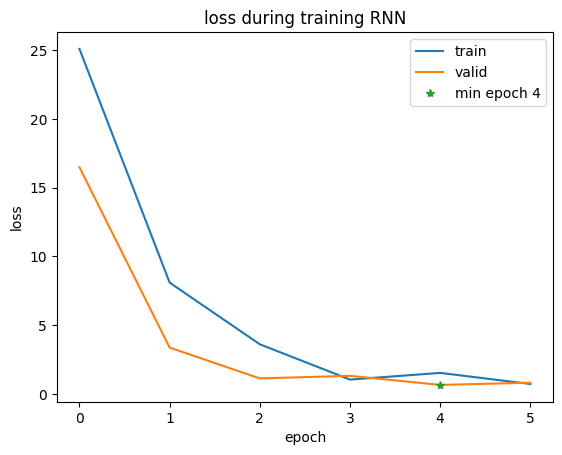

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.771  &0.815  &0.903  &-0.751

Epoch:6, [Train] Loss: 0.913
Epoch:6, [Valid] Loss: 0.710
EarlyStopping counter: 2 out of 20
Epoch:7, [Train] Loss: 0.668
Epoch:7, [Valid] Loss: 0.487
	SAVE MODEL: loss: 0.653 -> 0.487 | runtime: 1.354 ms
Epoch:8, [Train] Loss: 0.714
Epoch:8, [Valid] Loss: 0.500
EarlyStopping counter: 1 out of 20
Epoch:9, [Train] Loss: 0.638
Epoch:9, [Valid] Loss: 0.503
EarlyStopping counter: 2 out of 20
Epoch:10, [Train] Loss: 0.643
Epoch:10, [Valid] Loss: 0.560
EarlyStopping counter: 3 out of 20
Train time: 1.495+/-0.566 ms


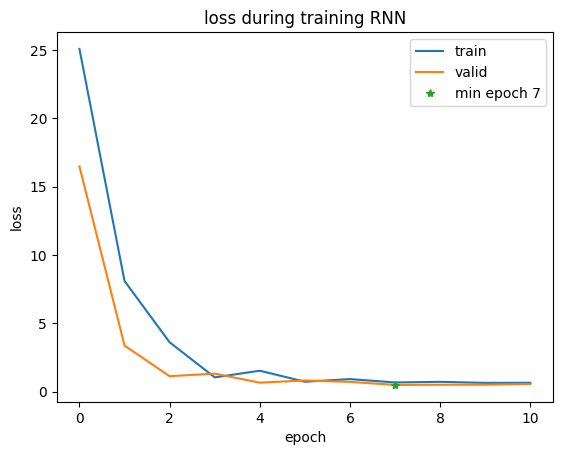

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.636  &0.560  &0.748  &-0.202

Epoch:11, [Train] Loss: 0.632
Epoch:11, [Valid] Loss: 0.472
	SAVE MODEL: loss: 0.487 -> 0.472 | runtime: 1.348 ms
Epoch:12, [Train] Loss: 0.621
Epoch:12, [Valid] Loss: 0.469
	SAVE MODEL: loss: 0.472 -> 0.469 | runtime: 1.284 ms
Epoch:13, [Train] Loss: 0.617
Epoch:13, [Valid] Loss: 0.484
EarlyStopping counter: 1 out of 20
Epoch:14, [Train] Loss: 0.616
Epoch:14, [Valid] Loss: 0.496
EarlyStopping counter: 2 out of 20
Epoch:15, [Train] Loss: 0.614
Epoch:15, [Valid] Loss: 0.474
EarlyStopping counter: 3 out of 20
Train time: 1.442+/-0.476 ms


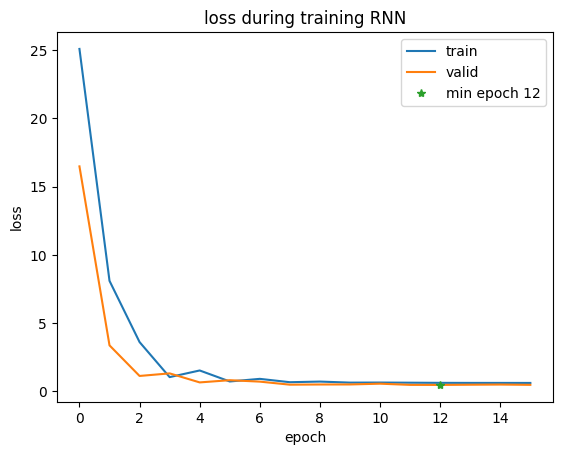

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.575  &0.474  &0.689  &-0.018

Epoch:16, [Train] Loss: 0.614
Epoch:16, [Valid] Loss: 0.474
EarlyStopping counter: 4 out of 20
Epoch:17, [Train] Loss: 0.614
Epoch:17, [Valid] Loss: 0.487
EarlyStopping counter: 5 out of 20
Epoch:18, [Train] Loss: 0.613
Epoch:18, [Valid] Loss: 0.477
EarlyStopping counter: 6 out of 20
Epoch:19, [Train] Loss: 0.610
Epoch:19, [Valid] Loss: 0.474
EarlyStopping counter: 7 out of 20
Epoch:20, [Train] Loss: 0.611
Epoch:20, [Valid] Loss: 0.480
EarlyStopping counter: 8 out of 20
Train time: 1.406+/-0.421 ms


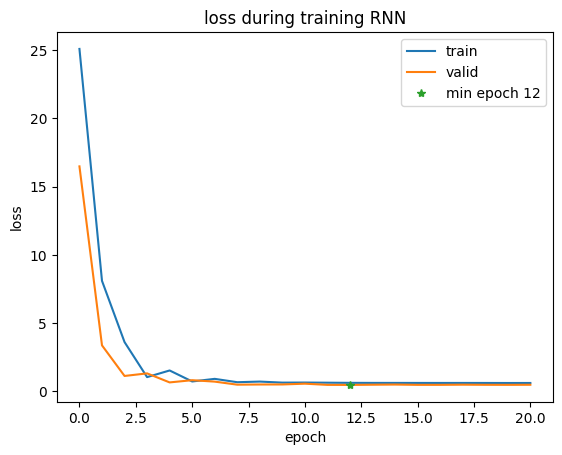

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.582  &0.480  &0.693  &-0.031

Epoch:21, [Train] Loss: 0.610
Epoch:21, [Valid] Loss: 0.480
EarlyStopping counter: 9 out of 20
Epoch:22, [Train] Loss: 0.610
Epoch:22, [Valid] Loss: 0.477
EarlyStopping counter: 10 out of 20
Epoch:23, [Train] Loss: 0.609
Epoch:23, [Valid] Loss: 0.475
EarlyStopping counter: 11 out of 20
Epoch:24, [Train] Loss: 0.610
Epoch:24, [Valid] Loss: 0.474
EarlyStopping counter: 12 out of 20
Epoch:25, [Train] Loss: 0.608
Epoch:25, [Valid] Loss: 0.476
EarlyStopping counter: 13 out of 20
Train time: 1.387+/-0.380 ms


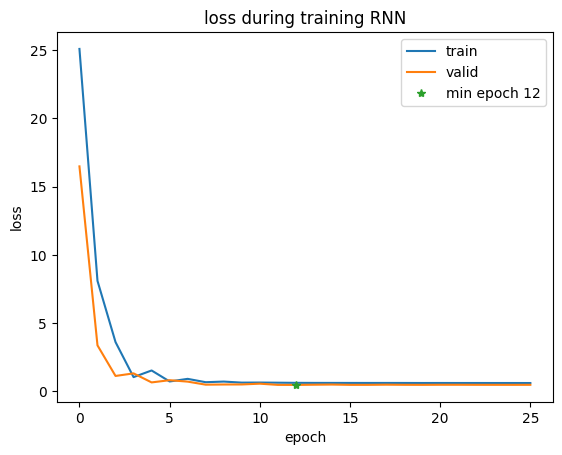

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.579  &0.476  &0.690  &-0.022

Epoch:26, [Train] Loss: 0.611
Epoch:26, [Valid] Loss: 0.478
EarlyStopping counter: 14 out of 20
Epoch:27, [Train] Loss: 0.607
Epoch:27, [Valid] Loss: 0.471
EarlyStopping counter: 15 out of 20
Epoch:28, [Train] Loss: 0.608
Epoch:28, [Valid] Loss: 0.468
	SAVE MODEL: loss: 0.469 -> 0.468 | runtime: 1.333 ms
Epoch:29, [Train] Loss: 0.606
Epoch:29, [Valid] Loss: 0.485
EarlyStopping counter: 1 out of 20
Epoch:30, [Train] Loss: 0.607
Epoch:30, [Valid] Loss: 0.474
EarlyStopping counter: 2 out of 20
Train time: 1.379+/-0.349 ms


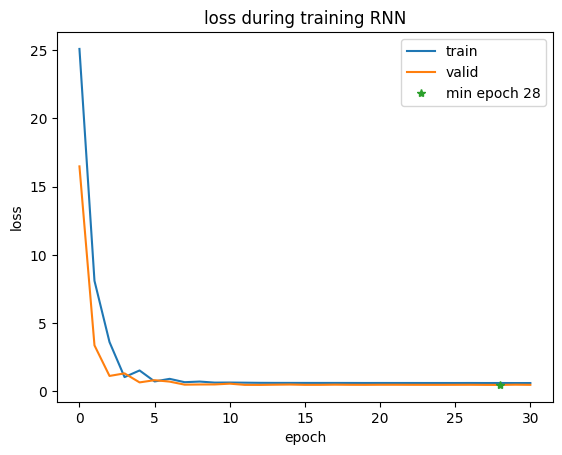

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.578  &0.474  &0.688  &-0.018

Epoch:31, [Train] Loss: 0.609
Epoch:31, [Valid] Loss: 0.467
	SAVE MODEL: loss: 0.468 -> 0.467 | runtime: 1.348 ms
Epoch:32, [Train] Loss: 0.605
Epoch:32, [Valid] Loss: 0.480
EarlyStopping counter: 1 out of 20
Epoch:33, [Train] Loss: 0.601
Epoch:33, [Valid] Loss: 0.466
	SAVE MODEL: loss: 0.467 -> 0.466 | runtime: 1.366 ms
Epoch:34, [Train] Loss: 0.601
Epoch:34, [Valid] Loss: 0.465
	SAVE MODEL: loss: 0.466 -> 0.465 | runtime: 1.312 ms
Epoch:35, [Train] Loss: 0.601
Epoch:35, [Valid] Loss: 0.477
EarlyStopping counter: 1 out of 20
Train time: 1.374+/-0.324 ms


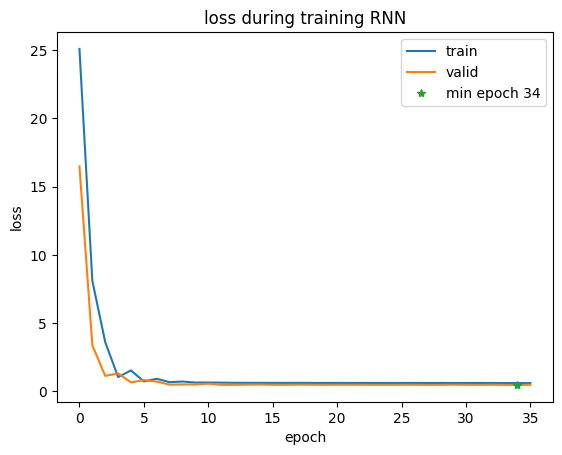

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.583  &0.477  &0.691  &-0.025

Epoch:36, [Train] Loss: 0.596
Epoch:36, [Valid] Loss: 0.462
	SAVE MODEL: loss: 0.465 -> 0.462 | runtime: 1.300 ms
Epoch:37, [Train] Loss: 0.594
Epoch:37, [Valid] Loss: 0.463
EarlyStopping counter: 1 out of 20
Epoch:38, [Train] Loss: 0.590
Epoch:38, [Valid] Loss: 0.468
EarlyStopping counter: 2 out of 20
Epoch:39, [Train] Loss: 0.585
Epoch:39, [Valid] Loss: 0.460
	SAVE MODEL: loss: 0.462 -> 0.460 | runtime: 1.369 ms
Epoch:40, [Train] Loss: 0.577
Epoch:40, [Valid] Loss: 0.457
	SAVE MODEL: loss: 0.460 -> 0.457 | runtime: 1.352 ms
Train time: 1.369+/-0.304 ms


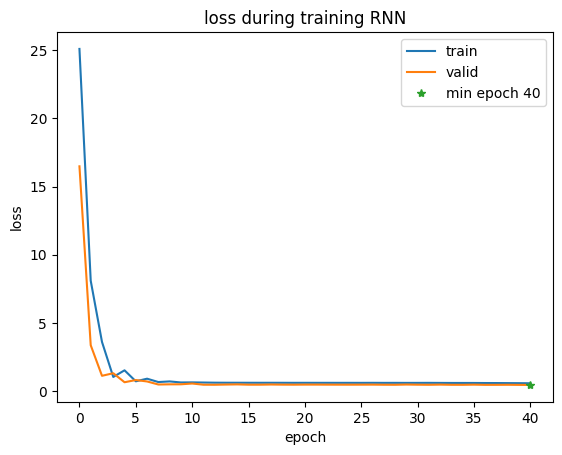

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.569  &0.457  &0.676  &0.019

Epoch:41, [Train] Loss: 0.571
Epoch:41, [Valid] Loss: 0.449
	SAVE MODEL: loss: 0.457 -> 0.449 | runtime: 1.391 ms
Epoch:42, [Train] Loss: 0.549
Epoch:42, [Valid] Loss: 0.443
	SAVE MODEL: loss: 0.449 -> 0.443 | runtime: 1.378 ms
Epoch:43, [Train] Loss: 0.513
Epoch:43, [Valid] Loss: 0.492
EarlyStopping counter: 1 out of 20
Epoch:44, [Train] Loss: 0.493
Epoch:44, [Valid] Loss: 0.429
	SAVE MODEL: loss: 0.443 -> 0.429 | runtime: 1.279 ms
Epoch:45, [Train] Loss: 0.480
Epoch:45, [Valid] Loss: 0.424
	SAVE MODEL: loss: 0.429 -> 0.424 | runtime: 1.371 ms
Train time: 1.368+/-0.288 ms


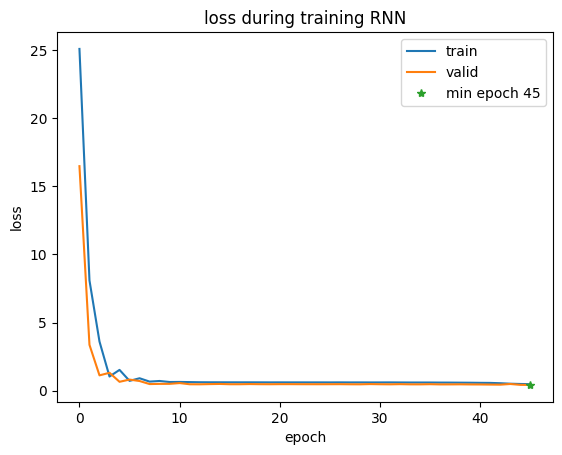

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.533  &0.424  &0.651  &0.090

Epoch:46, [Train] Loss: 0.469
Epoch:46, [Valid] Loss: 0.415
	SAVE MODEL: loss: 0.424 -> 0.415 | runtime: 1.398 ms
Epoch:47, [Train] Loss: 0.465
Epoch:47, [Valid] Loss: 0.413
	SAVE MODEL: loss: 0.415 -> 0.413 | runtime: 1.314 ms
Epoch:48, [Train] Loss: 0.471
Epoch:48, [Valid] Loss: 0.412
	SAVE MODEL: loss: 0.413 -> 0.412 | runtime: 1.343 ms
Epoch:49, [Train] Loss: 0.448
Epoch:49, [Valid] Loss: 0.391
	SAVE MODEL: loss: 0.412 -> 0.391 | runtime: 1.393 ms
Epoch:50, [Train] Loss: 0.439
Epoch:50, [Valid] Loss: 0.400
EarlyStopping counter: 1 out of 20
Train time: 1.367+/-0.273 ms


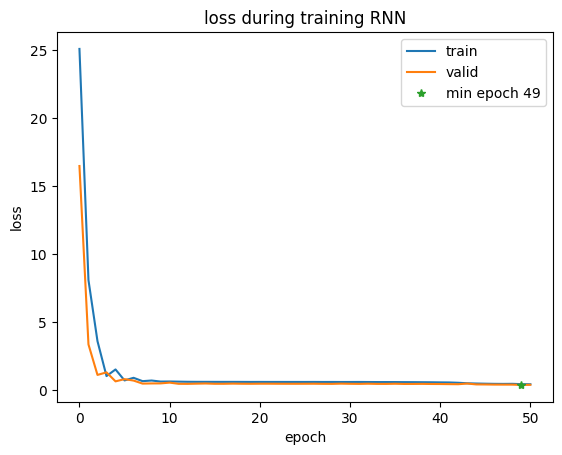

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.516  &0.400  &0.632  &0.141

Epoch:51, [Train] Loss: 0.427
Epoch:51, [Valid] Loss: 0.384
	SAVE MODEL: loss: 0.391 -> 0.384 | runtime: 1.329 ms
Epoch:52, [Train] Loss: 0.419
Epoch:52, [Valid] Loss: 0.362
	SAVE MODEL: loss: 0.384 -> 0.362 | runtime: 1.407 ms
Epoch:53, [Train] Loss: 0.395
Epoch:53, [Valid] Loss: 0.358
	SAVE MODEL: loss: 0.362 -> 0.358 | runtime: 1.362 ms
Epoch:54, [Train] Loss: 0.383
Epoch:54, [Valid] Loss: 0.333
	SAVE MODEL: loss: 0.358 -> 0.333 | runtime: 1.377 ms
Epoch:55, [Train] Loss: 0.399
Epoch:55, [Valid] Loss: 0.326
	SAVE MODEL: loss: 0.333 -> 0.326 | runtime: 1.369 ms
Train time: 1.367+/-0.261 ms


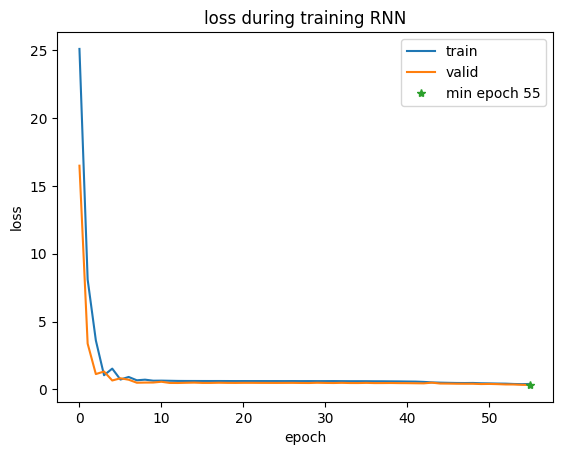

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.461  &0.326  &0.571  &0.300

Epoch:56, [Train] Loss: 0.382
Epoch:56, [Valid] Loss: 0.314
	SAVE MODEL: loss: 0.326 -> 0.314 | runtime: 1.397 ms
Epoch:57, [Train] Loss: 0.392
Epoch:57, [Valid] Loss: 0.329
EarlyStopping counter: 1 out of 20
Epoch:58, [Train] Loss: 0.365
Epoch:58, [Valid] Loss: 0.321
EarlyStopping counter: 2 out of 20
Epoch:59, [Train] Loss: 0.351
Epoch:59, [Valid] Loss: 0.317
EarlyStopping counter: 3 out of 20
Epoch:60, [Train] Loss: 0.338
Epoch:60, [Valid] Loss: 0.304
	SAVE MODEL: loss: 0.314 -> 0.304 | runtime: 1.422 ms
Train time: 1.370+/-0.250 ms


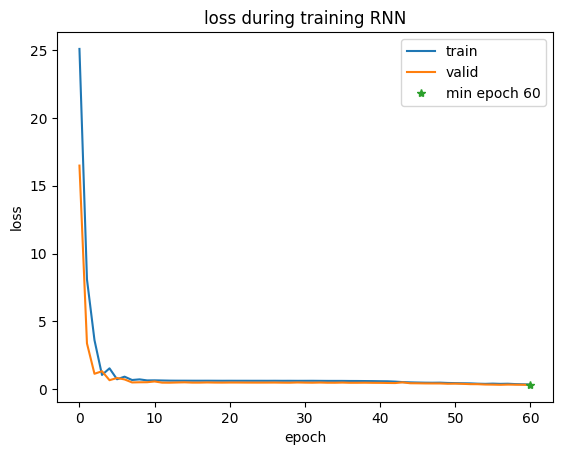

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.451  &0.304  &0.552  &0.347

Epoch:61, [Train] Loss: 0.369
Epoch:61, [Valid] Loss: 0.365
EarlyStopping counter: 1 out of 20
Epoch:62, [Train] Loss: 0.339
Epoch:62, [Valid] Loss: 0.285
	SAVE MODEL: loss: 0.304 -> 0.285 | runtime: 1.327 ms
Epoch:63, [Train] Loss: 0.326
Epoch:63, [Valid] Loss: 0.280
	SAVE MODEL: loss: 0.285 -> 0.280 | runtime: 1.376 ms
Epoch:64, [Train] Loss: 0.336
Epoch:64, [Valid] Loss: 0.307
EarlyStopping counter: 1 out of 20
Epoch:65, [Train] Loss: 0.325
Epoch:65, [Valid] Loss: 0.316
EarlyStopping counter: 2 out of 20
Train time: 1.370+/-0.241 ms


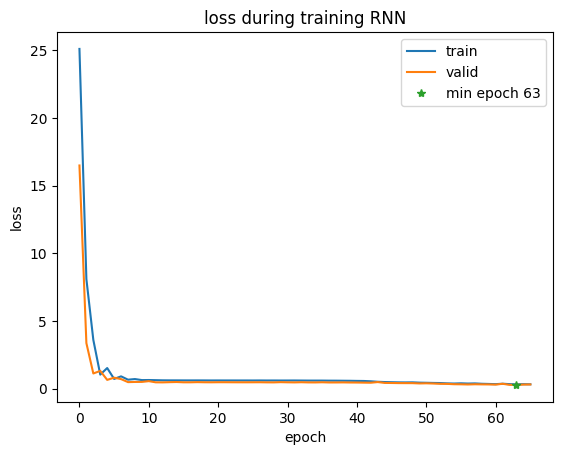

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.448  &0.316  &0.562  &0.321

Epoch:66, [Train] Loss: 0.320
Epoch:66, [Valid] Loss: 0.298
EarlyStopping counter: 3 out of 20
Epoch:67, [Train] Loss: 0.300
Epoch:67, [Valid] Loss: 0.279
	SAVE MODEL: loss: 0.280 -> 0.279 | runtime: 1.380 ms
Epoch:68, [Train] Loss: 0.292
Epoch:68, [Valid] Loss: 0.305
EarlyStopping counter: 1 out of 20
Epoch:69, [Train] Loss: 0.284
Epoch:69, [Valid] Loss: 0.269
	SAVE MODEL: loss: 0.279 -> 0.269 | runtime: 1.403 ms
Epoch:70, [Train] Loss: 0.283
Epoch:70, [Valid] Loss: 0.273
EarlyStopping counter: 1 out of 20
Train time: 1.371+/-0.232 ms


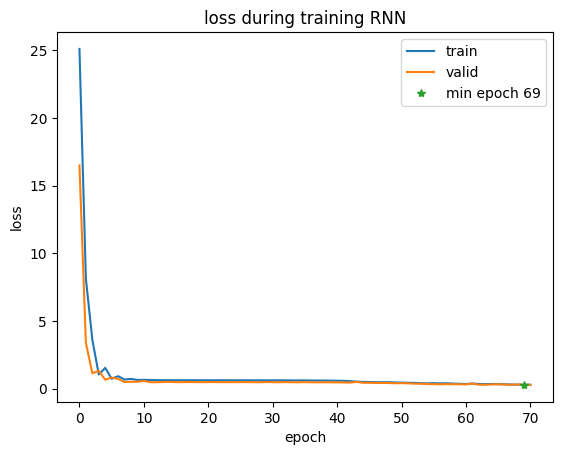

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.426  &0.273  &0.523  &0.413

Epoch:71, [Train] Loss: 0.298
Epoch:71, [Valid] Loss: 0.284
EarlyStopping counter: 2 out of 20
Epoch:72, [Train] Loss: 0.287
Epoch:72, [Valid] Loss: 0.316
EarlyStopping counter: 3 out of 20
Epoch:73, [Train] Loss: 0.288
Epoch:73, [Valid] Loss: 0.278
EarlyStopping counter: 4 out of 20
Epoch:74, [Train] Loss: 0.260
Epoch:74, [Valid] Loss: 0.284
EarlyStopping counter: 5 out of 20
Epoch:75, [Train] Loss: 0.273
Epoch:75, [Valid] Loss: 0.273
EarlyStopping counter: 6 out of 20
Train time: 1.374+/-0.225 ms


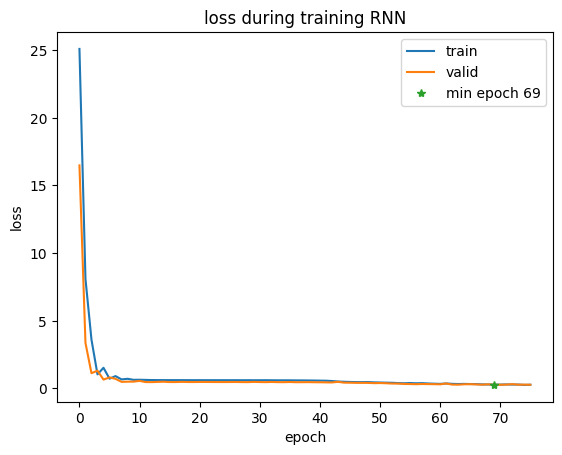

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.423  &0.273  &0.522  &0.414

Epoch:76, [Train] Loss: 0.250
Epoch:76, [Valid] Loss: 0.273
EarlyStopping counter: 7 out of 20
Epoch:77, [Train] Loss: 0.249
Epoch:77, [Valid] Loss: 0.272
EarlyStopping counter: 8 out of 20
Epoch:78, [Train] Loss: 0.243
Epoch:78, [Valid] Loss: 0.279
EarlyStopping counter: 9 out of 20
Epoch:79, [Train] Loss: 0.244
Epoch:79, [Valid] Loss: 0.282
EarlyStopping counter: 10 out of 20
Epoch:80, [Train] Loss: 0.240
Epoch:80, [Valid] Loss: 0.281
EarlyStopping counter: 11 out of 20
Train time: 1.375+/-0.218 ms


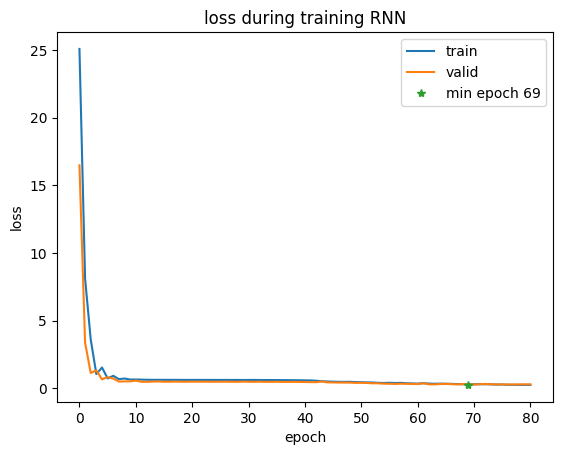

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.424  &0.281  &0.530  &0.396

Epoch:81, [Train] Loss: 0.235
Epoch:81, [Valid] Loss: 0.276
EarlyStopping counter: 12 out of 20
Epoch:82, [Train] Loss: 0.229
Epoch:82, [Valid] Loss: 0.283
EarlyStopping counter: 13 out of 20
Epoch:83, [Train] Loss: 0.245
Epoch:83, [Valid] Loss: 0.274
EarlyStopping counter: 14 out of 20
Epoch:84, [Train] Loss: 0.268
Epoch:84, [Valid] Loss: 0.292
EarlyStopping counter: 15 out of 20
Epoch:85, [Train] Loss: 0.253
Epoch:85, [Valid] Loss: 0.303
EarlyStopping counter: 16 out of 20
Train time: 1.375+/-0.212 ms


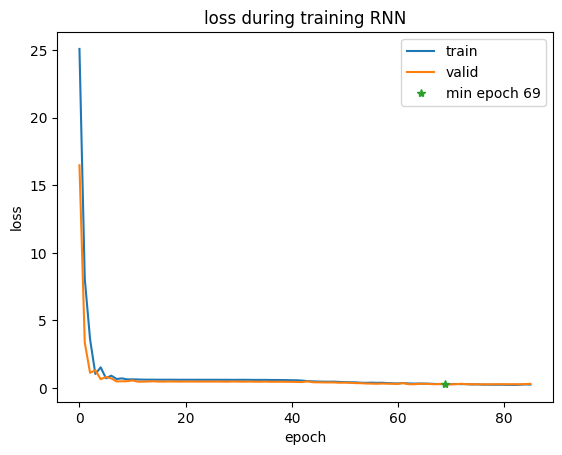

*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.439  &0.303  &0.551  &0.349

Epoch:86, [Train] Loss: 0.246
Epoch:86, [Valid] Loss: 0.288
EarlyStopping counter: 17 out of 20
Epoch:87, [Train] Loss: 0.244
Epoch:87, [Valid] Loss: 0.280
EarlyStopping counter: 18 out of 20
Epoch:88, [Train] Loss: 0.242
Epoch:88, [Valid] Loss: 0.329
EarlyStopping counter: 19 out of 20
Epoch:89, [Train] Loss: 0.265
Epoch:89, [Valid] Loss: 0.280
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2954738
Train time: 1.373+/-0.207 ms
best epoch: 69, min loss: 0.2686


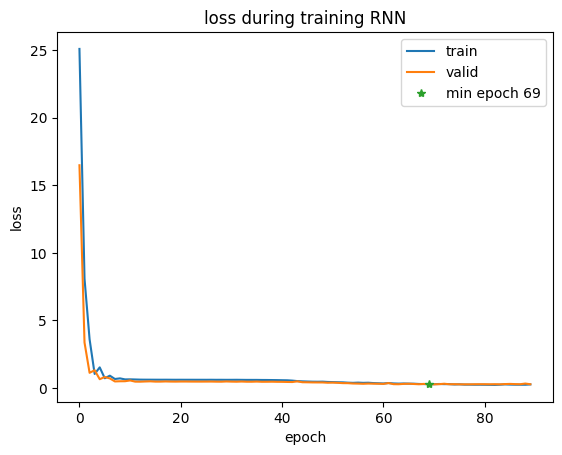

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '=', '@', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'Na', 'O', 'P', 'S', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['Caco2_Wang']
dropout : 0.1
IS_R : [True]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 0.401
*************** Caco2_Wang ***************
  MAE     MSE     RMSE    R2
&0.508  &0.401  &0.633  &0.369


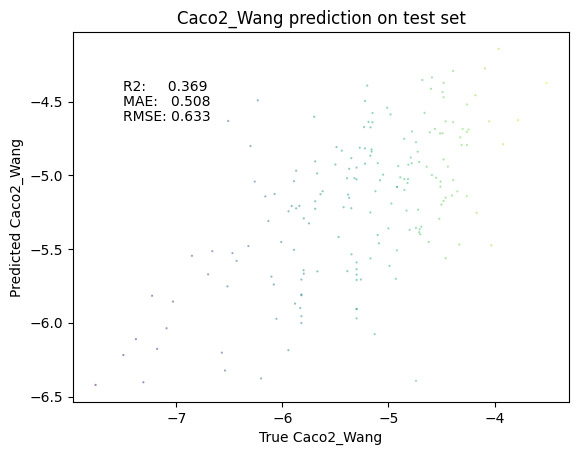

Found local copy...
Loading...



collect data for:  ['Lipophilicity_AstraZeneca']


Done!


train: 2940 | valid: 420 | test: 840 | total: 4200
Alphabet: None



---> loader for ['Lipophilicity_AstraZeneca']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 39




Model type:  RNN | Model parameters:  2954738
Epoch:0, [Train] Loss: 2.694
Epoch:0, [Valid] Loss: 1.584
	SAVE MODEL: loss: inf -> 1.584 | runtime: 0.833 ms
Epoch:1, [Train] Loss: 1.516
Epoch:1, [Valid] Loss: 1.454
	SAVE MODEL: loss: 1.584 -> 1.454 | runtime: 0.776 ms
Epoch:2, [Train] Loss: 1.441
Epoch:2, [Valid] Loss: 1.448
	SAVE MODEL: loss: 1.454 -> 1.448 | runtime: 0.837 ms
Epoch:3, [Train] Loss: 1.434
Epoch:3, [Valid] Loss: 1.451
EarlyStopping counter: 1 out of 20
Epoch:4, [Train] Loss: 1.429
Epoch:4, [Valid] Loss: 1.440
	SAVE MODEL: loss: 1.448 -> 1.440 | runtime: 0.826 ms
Epoch:5, [Train] Loss: 1.413
Epoch:5, [Valid] Loss: 1.428
	SAVE MODEL: loss: 1.440

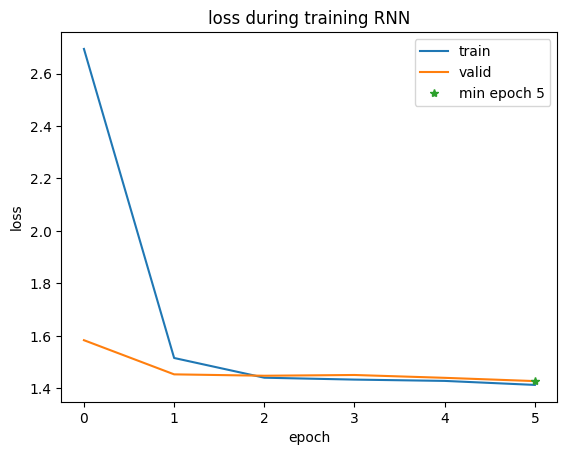

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.986  &1.428  &1.195  &0.006

Epoch:6, [Train] Loss: 1.387
Epoch:6, [Valid] Loss: 1.379
	SAVE MODEL: loss: 1.428 -> 1.379 | runtime: 0.833 ms
Epoch:7, [Train] Loss: 1.252
Epoch:7, [Valid] Loss: 1.229
	SAVE MODEL: loss: 1.379 -> 1.229 | runtime: 0.809 ms
Epoch:8, [Train] Loss: 1.214
Epoch:8, [Valid] Loss: 1.138
	SAVE MODEL: loss: 1.229 -> 1.138 | runtime: 0.807 ms
Epoch:9, [Train] Loss: 1.153
Epoch:9, [Valid] Loss: 1.128
	SAVE MODEL: loss: 1.138 -> 1.128 | runtime: 0.811 ms
Epoch:10, [Train] Loss: 1.192
Epoch:10, [Valid] Loss: 1.155
EarlyStopping counter: 1 out of 20
Train time: 0.817+/-0.016 ms


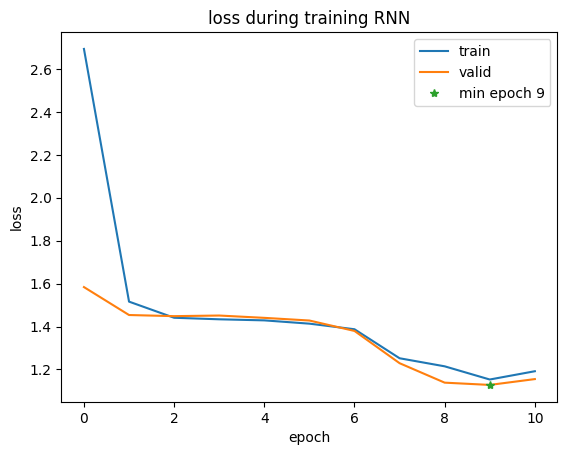

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.877  &1.155  &1.075  &0.196

Epoch:11, [Train] Loss: 1.127
Epoch:11, [Valid] Loss: 1.173
EarlyStopping counter: 2 out of 20
Epoch:12, [Train] Loss: 1.184
Epoch:12, [Valid] Loss: 1.162
EarlyStopping counter: 3 out of 20
Epoch:13, [Train] Loss: 1.117
Epoch:13, [Valid] Loss: 1.077
	SAVE MODEL: loss: 1.128 -> 1.077 | runtime: 0.763 ms
Epoch:14, [Train] Loss: 1.083
Epoch:14, [Valid] Loss: 1.073
	SAVE MODEL: loss: 1.077 -> 1.073 | runtime: 0.818 ms
Epoch:15, [Train] Loss: 1.099
Epoch:15, [Valid] Loss: 1.073
	SAVE MODEL: loss: 1.073 -> 1.073 | runtime: 0.784 ms
Train time: 0.811+/-0.020 ms


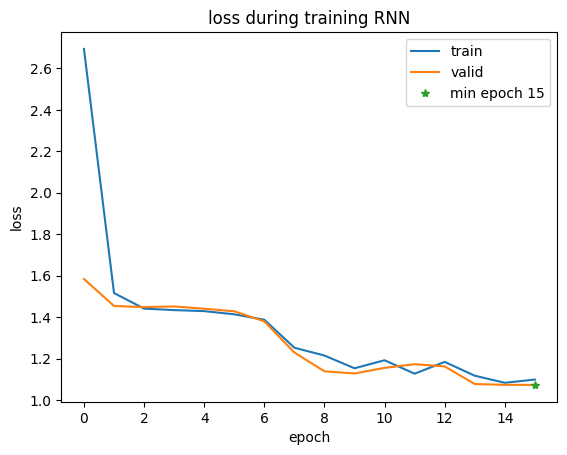

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.853  &1.073  &1.036  &0.254

Epoch:16, [Train] Loss: 1.093
Epoch:16, [Valid] Loss: 1.123
EarlyStopping counter: 1 out of 20
Epoch:17, [Train] Loss: 1.089
Epoch:17, [Valid] Loss: 1.105
EarlyStopping counter: 2 out of 20
Epoch:18, [Train] Loss: 1.064
Epoch:18, [Valid] Loss: 1.048
	SAVE MODEL: loss: 1.073 -> 1.048 | runtime: 0.804 ms
Epoch:19, [Train] Loss: 1.025
Epoch:19, [Valid] Loss: 0.992
	SAVE MODEL: loss: 1.048 -> 0.992 | runtime: 0.810 ms
Epoch:20, [Train] Loss: 0.997
Epoch:20, [Valid] Loss: 0.939
	SAVE MODEL: loss: 0.992 -> 0.939 | runtime: 0.823 ms
Train time: 0.813+/-0.018 ms


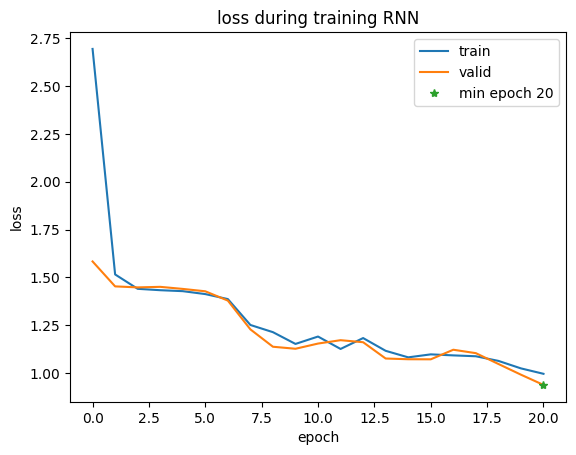

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.778  &0.939  &0.969  &0.347

Epoch:21, [Train] Loss: 1.025
Epoch:21, [Valid] Loss: 0.999
EarlyStopping counter: 1 out of 20
Epoch:22, [Train] Loss: 0.937
Epoch:22, [Valid] Loss: 0.909
	SAVE MODEL: loss: 0.939 -> 0.909 | runtime: 0.821 ms
Epoch:23, [Train] Loss: 0.896
Epoch:23, [Valid] Loss: 0.976
EarlyStopping counter: 1 out of 20
Epoch:24, [Train] Loss: 0.884
Epoch:24, [Valid] Loss: 0.901
	SAVE MODEL: loss: 0.909 -> 0.901 | runtime: 0.799 ms
Epoch:25, [Train] Loss: 0.852
Epoch:25, [Valid] Loss: 0.851
	SAVE MODEL: loss: 0.901 -> 0.851 | runtime: 0.812 ms
Train time: 0.813+/-0.017 ms


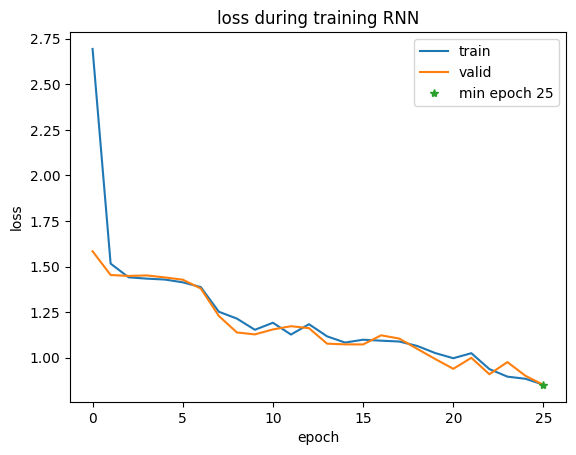

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.736  &0.851  &0.922  &0.408

Epoch:26, [Train] Loss: 0.835
Epoch:26, [Valid] Loss: 0.917
EarlyStopping counter: 1 out of 20
Epoch:27, [Train] Loss: 0.818
Epoch:27, [Valid] Loss: 0.795
	SAVE MODEL: loss: 0.851 -> 0.795 | runtime: 0.807 ms
Epoch:28, [Train] Loss: 0.767
Epoch:28, [Valid] Loss: 0.826
EarlyStopping counter: 1 out of 20
Epoch:29, [Train] Loss: 0.752
Epoch:29, [Valid] Loss: 0.751
	SAVE MODEL: loss: 0.795 -> 0.751 | runtime: 0.827 ms
Epoch:30, [Train] Loss: 0.734
Epoch:30, [Valid] Loss: 0.762
EarlyStopping counter: 1 out of 20
Train time: 0.813+/-0.016 ms


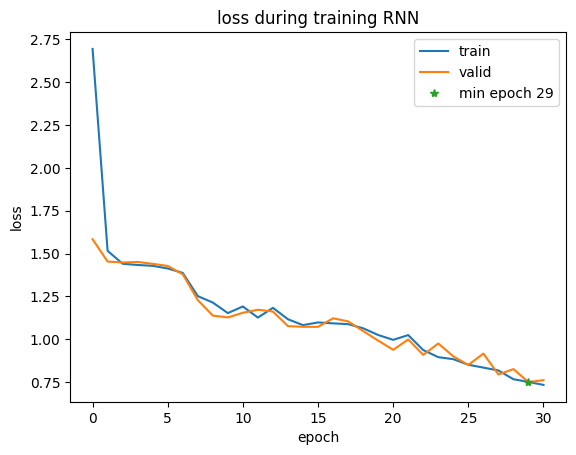

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.704  &0.762  &0.873  &0.470

Epoch:31, [Train] Loss: 0.709
Epoch:31, [Valid] Loss: 0.785
EarlyStopping counter: 2 out of 20
Epoch:32, [Train] Loss: 0.679
Epoch:32, [Valid] Loss: 0.753
EarlyStopping counter: 3 out of 20
Epoch:33, [Train] Loss: 0.631
Epoch:33, [Valid] Loss: 0.691
	SAVE MODEL: loss: 0.751 -> 0.691 | runtime: 0.841 ms
Epoch:34, [Train] Loss: 0.646
Epoch:34, [Valid] Loss: 0.731
EarlyStopping counter: 1 out of 20
Epoch:35, [Train] Loss: 0.623
Epoch:35, [Valid] Loss: 0.706
EarlyStopping counter: 2 out of 20
Train time: 0.814+/-0.016 ms


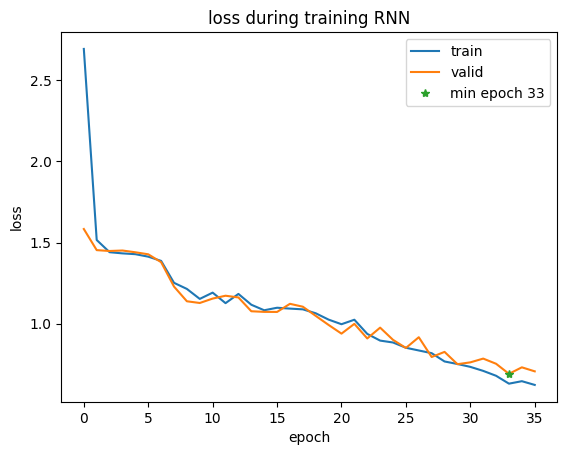

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.662  &0.706  &0.841  &0.508

Epoch:36, [Train] Loss: 0.576
Epoch:36, [Valid] Loss: 0.694
EarlyStopping counter: 3 out of 20
Epoch:37, [Train] Loss: 0.562
Epoch:37, [Valid] Loss: 0.677
	SAVE MODEL: loss: 0.691 -> 0.677 | runtime: 0.801 ms
Epoch:38, [Train] Loss: 0.539
Epoch:38, [Valid] Loss: 0.714
EarlyStopping counter: 1 out of 20
Epoch:39, [Train] Loss: 0.523
Epoch:39, [Valid] Loss: 0.663
	SAVE MODEL: loss: 0.677 -> 0.663 | runtime: 0.839 ms
Epoch:40, [Train] Loss: 0.486
Epoch:40, [Valid] Loss: 0.668
EarlyStopping counter: 1 out of 20
Train time: 0.816+/-0.016 ms


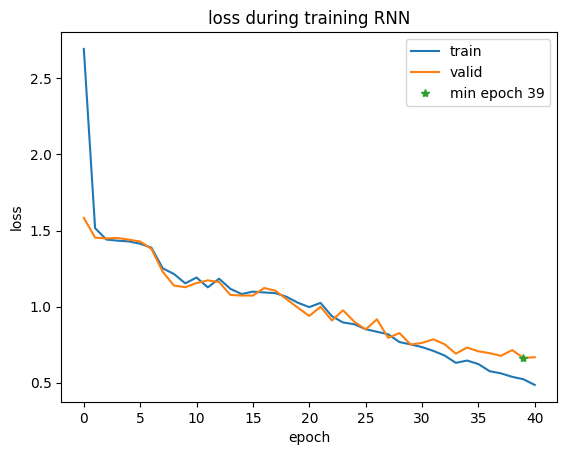

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.637  &0.668  &0.817  &0.535

Epoch:41, [Train] Loss: 0.503
Epoch:41, [Valid] Loss: 0.683
EarlyStopping counter: 2 out of 20
Epoch:42, [Train] Loss: 0.471
Epoch:42, [Valid] Loss: 0.766
EarlyStopping counter: 3 out of 20
Epoch:43, [Train] Loss: 0.447
Epoch:43, [Valid] Loss: 0.628
	SAVE MODEL: loss: 0.663 -> 0.628 | runtime: 0.820 ms
Epoch:44, [Train] Loss: 0.426
Epoch:44, [Valid] Loss: 0.640
EarlyStopping counter: 1 out of 20
Epoch:45, [Train] Loss: 0.387
Epoch:45, [Valid] Loss: 0.629
EarlyStopping counter: 2 out of 20
Train time: 0.817+/-0.016 ms


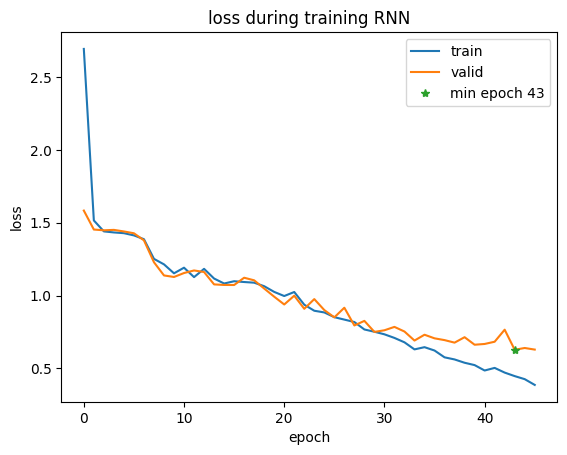

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.601  &0.629  &0.793  &0.562

Epoch:46, [Train] Loss: 0.400
Epoch:46, [Valid] Loss: 0.617
	SAVE MODEL: loss: 0.628 -> 0.617 | runtime: 0.818 ms
Epoch:47, [Train] Loss: 0.391
Epoch:47, [Valid] Loss: 0.614
	SAVE MODEL: loss: 0.617 -> 0.614 | runtime: 0.777 ms
Epoch:48, [Train] Loss: 0.351
Epoch:48, [Valid] Loss: 0.593
	SAVE MODEL: loss: 0.614 -> 0.593 | runtime: 0.789 ms
Epoch:49, [Train] Loss: 0.324
Epoch:49, [Valid] Loss: 0.608
EarlyStopping counter: 1 out of 20
Epoch:50, [Train] Loss: 0.301
Epoch:50, [Valid] Loss: 0.602
EarlyStopping counter: 2 out of 20
Train time: 0.817+/-0.017 ms


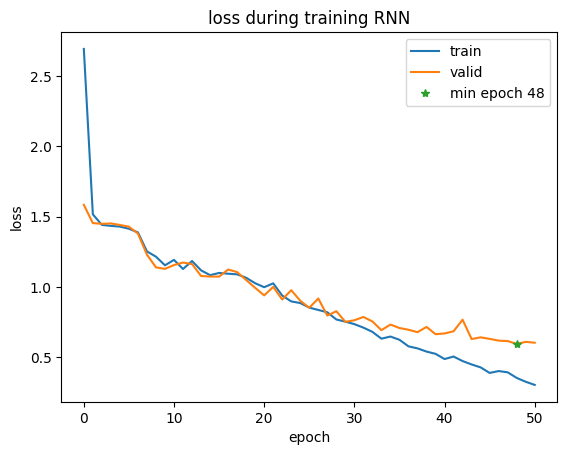

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.580  &0.602  &0.776  &0.581

Epoch:51, [Train] Loss: 0.322
Epoch:51, [Valid] Loss: 0.670
EarlyStopping counter: 3 out of 20
Epoch:52, [Train] Loss: 0.349
Epoch:52, [Valid] Loss: 0.567
	SAVE MODEL: loss: 0.593 -> 0.567 | runtime: 0.868 ms
Epoch:53, [Train] Loss: 0.273
Epoch:53, [Valid] Loss: 0.608
EarlyStopping counter: 1 out of 20
Epoch:54, [Train] Loss: 0.247
Epoch:54, [Valid] Loss: 0.594
EarlyStopping counter: 2 out of 20
Epoch:55, [Train] Loss: 0.239
Epoch:55, [Valid] Loss: 0.584
EarlyStopping counter: 3 out of 20
Train time: 0.819+/-0.018 ms


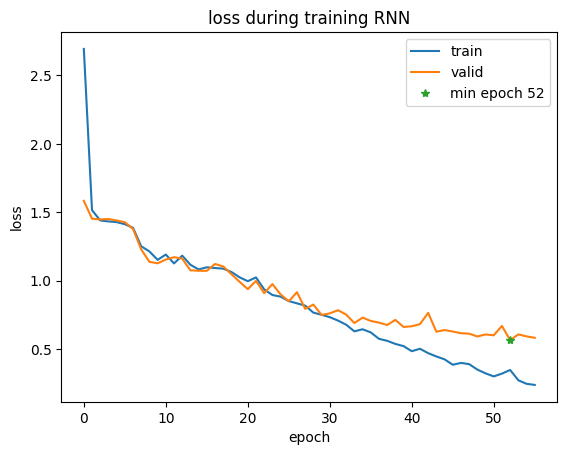

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.578  &0.584  &0.764  &0.594

Epoch:56, [Train] Loss: 0.220
Epoch:56, [Valid] Loss: 0.590
EarlyStopping counter: 4 out of 20
Epoch:57, [Train] Loss: 0.197
Epoch:57, [Valid] Loss: 0.593
EarlyStopping counter: 5 out of 20
Epoch:58, [Train] Loss: 0.189
Epoch:58, [Valid] Loss: 0.618
EarlyStopping counter: 6 out of 20
Epoch:59, [Train] Loss: 0.182
Epoch:59, [Valid] Loss: 0.601
EarlyStopping counter: 7 out of 20
Epoch:60, [Train] Loss: 0.184
Epoch:60, [Valid] Loss: 0.611
EarlyStopping counter: 8 out of 20
Train time: 0.818+/-0.018 ms


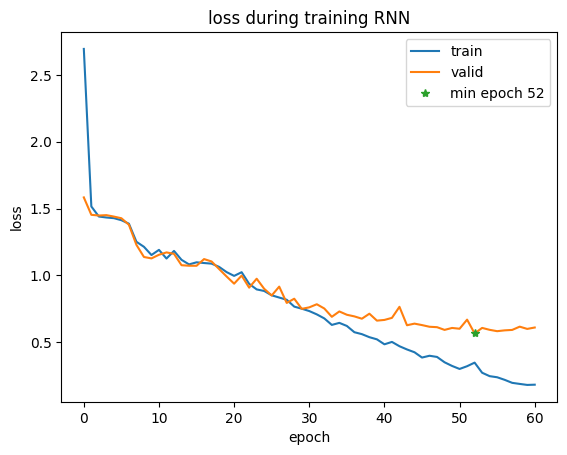

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.587  &0.611  &0.782  &0.575

Epoch:61, [Train] Loss: 0.156
Epoch:61, [Valid] Loss: 0.615
EarlyStopping counter: 9 out of 20
Epoch:62, [Train] Loss: 0.152
Epoch:62, [Valid] Loss: 0.588
EarlyStopping counter: 10 out of 20
Epoch:63, [Train] Loss: 0.165
Epoch:63, [Valid] Loss: 0.579
EarlyStopping counter: 11 out of 20
Epoch:64, [Train] Loss: 0.164
Epoch:64, [Valid] Loss: 0.602
EarlyStopping counter: 12 out of 20
Epoch:65, [Train] Loss: 0.139
Epoch:65, [Valid] Loss: 0.613
EarlyStopping counter: 13 out of 20
Train time: 0.819+/-0.018 ms


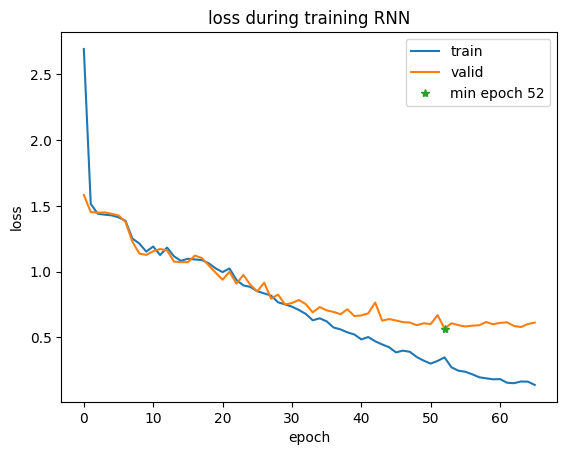

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.588  &0.613  &0.783  &0.574

Epoch:66, [Train] Loss: 0.116
Epoch:66, [Valid] Loss: 0.628
EarlyStopping counter: 14 out of 20
Epoch:67, [Train] Loss: 0.122
Epoch:67, [Valid] Loss: 0.637
EarlyStopping counter: 15 out of 20
Epoch:68, [Train] Loss: 0.112
Epoch:68, [Valid] Loss: 0.584
EarlyStopping counter: 16 out of 20
Epoch:69, [Train] Loss: 0.102
Epoch:69, [Valid] Loss: 0.615
EarlyStopping counter: 17 out of 20
Epoch:70, [Train] Loss: 0.095
Epoch:70, [Valid] Loss: 0.639
EarlyStopping counter: 18 out of 20
Train time: 0.819+/-0.018 ms


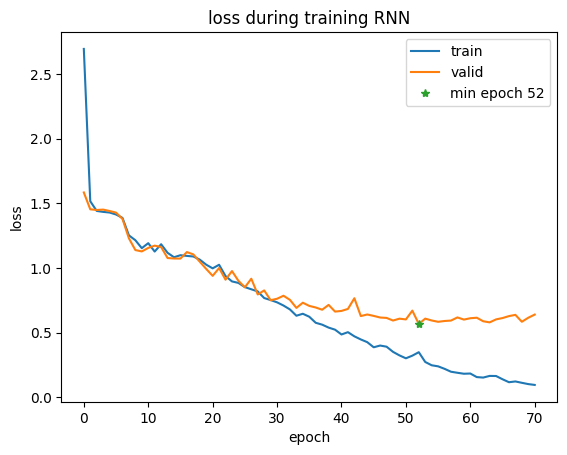

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.592  &0.639  &0.800  &0.555

Epoch:71, [Train] Loss: 0.085
Epoch:71, [Valid] Loss: 0.595
EarlyStopping counter: 19 out of 20
Epoch:72, [Train] Loss: 0.075
Epoch:72, [Valid] Loss: 0.611
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2954738
Train time: 0.820+/-0.017 ms
best epoch: 52, min loss: 0.5671


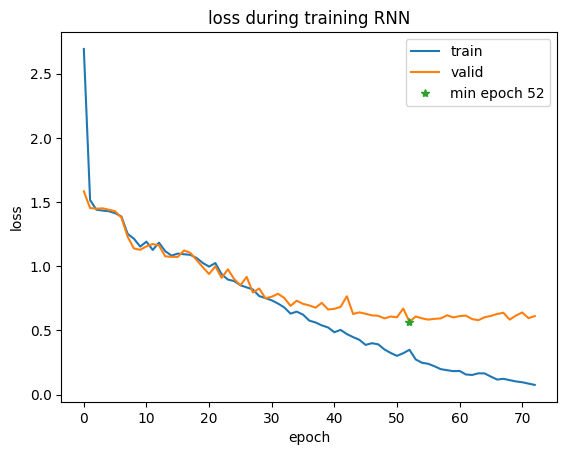

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '=', '@', 'B', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', 'Si', '[', '\\', ']', 'c', 'e', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['Lipophilicity_AstraZeneca']
dropout : 0.1
IS_R : [True]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 0.677
*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.627  &0.677  &0.823  &0.542


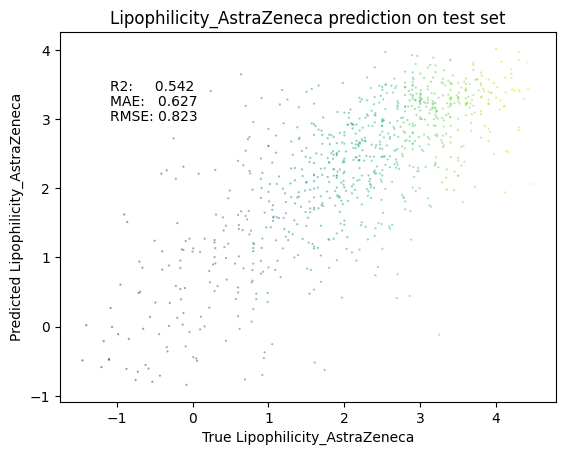

Found local copy...
Loading...



collect data for:  ['HydrationFreeEnergy_FreeSolv']


Done!


train: 450 | valid: 64 | test: 128 | total: 642
Alphabet: None



---> loader for ['HydrationFreeEnergy_FreeSolv']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 33




Model type:  RNN | Model parameters:  2945090
Epoch:0, [Train] Loss: 28.795
Epoch:0, [Valid] Loss: 24.579
	SAVE MODEL: loss: inf -> 24.579 | runtime: 0.427 ms
Epoch:1, [Train] Loss: 21.887
Epoch:1, [Valid] Loss: 12.079
	SAVE MODEL: loss: 24.579 -> 12.079 | runtime: 0.441 ms
Epoch:2, [Train] Loss: 15.886
Epoch:2, [Valid] Loss: 11.924
	SAVE MODEL: loss: 12.079 -> 11.924 | runtime: 0.403 ms
Epoch:3, [Train] Loss: 14.724
Epoch:3, [Valid] Loss: 12.851
EarlyStopping counter: 1 out of 20
Epoch:4, [Train] Loss: 14.941
Epoch:4, [Valid] Loss: 12.354
EarlyStopping counter: 2 out of 20
Epoch:5, [Train] Loss: 14.148
Epoch:5, [Valid] Loss: 11.249
	SAVE MODEL: loss: 11.924 

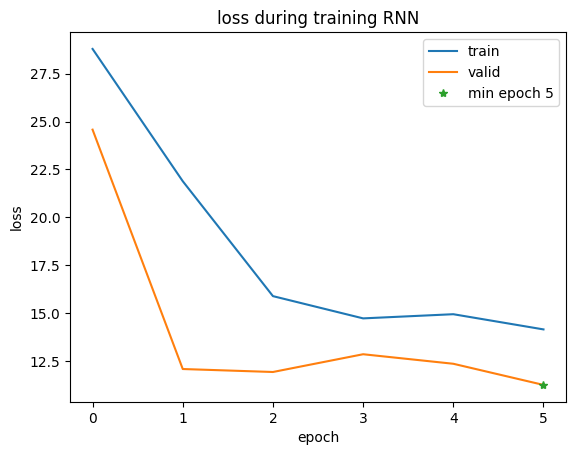

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&2.545  &11.249  &3.354  &0.046

Epoch:6, [Train] Loss: 13.931
Epoch:6, [Valid] Loss: 10.551
	SAVE MODEL: loss: 11.249 -> 10.551 | runtime: 0.431 ms
Epoch:7, [Train] Loss: 12.492
Epoch:7, [Valid] Loss: 10.202
	SAVE MODEL: loss: 10.551 -> 10.202 | runtime: 0.433 ms
Epoch:8, [Train] Loss: 11.511
Epoch:8, [Valid] Loss: 9.213
	SAVE MODEL: loss: 10.202 -> 9.213 | runtime: 0.406 ms
Epoch:9, [Train] Loss: 11.119
Epoch:9, [Valid] Loss: 8.742
	SAVE MODEL: loss: 9.213 -> 8.742 | runtime: 0.407 ms
Epoch:10, [Train] Loss: 10.296
Epoch:10, [Valid] Loss: 8.388
	SAVE MODEL: loss: 8.742 -> 8.388 | runtime: 0.433 ms
Train time: 0.425+/-0.014 ms


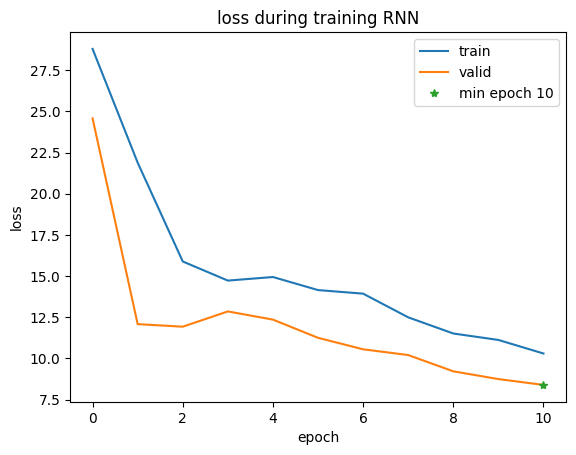

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&2.211  &8.388  &2.896  &0.289

Epoch:11, [Train] Loss: 9.736
Epoch:11, [Valid] Loss: 7.819
	SAVE MODEL: loss: 8.388 -> 7.819 | runtime: 0.415 ms
Epoch:12, [Train] Loss: 9.128
Epoch:12, [Valid] Loss: 7.235
	SAVE MODEL: loss: 7.819 -> 7.235 | runtime: 0.433 ms
Epoch:13, [Train] Loss: 8.018
Epoch:13, [Valid] Loss: 7.135
	SAVE MODEL: loss: 7.235 -> 7.135 | runtime: 0.440 ms
Epoch:14, [Train] Loss: 7.104
Epoch:14, [Valid] Loss: 6.561
	SAVE MODEL: loss: 7.135 -> 6.561 | runtime: 0.428 ms
Epoch:15, [Train] Loss: 6.671
Epoch:15, [Valid] Loss: 6.854
EarlyStopping counter: 1 out of 20
Train time: 0.425+/-0.013 ms


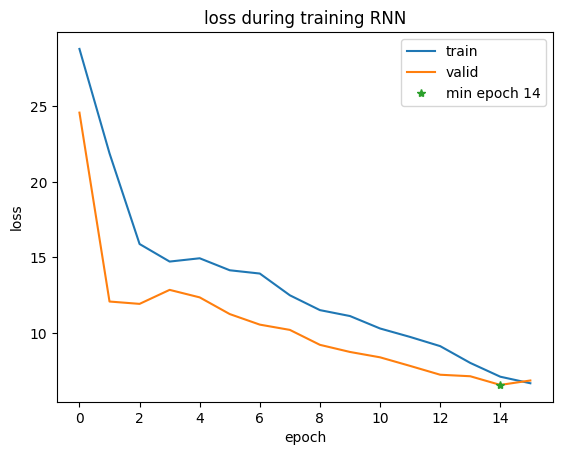

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&2.049  &6.854  &2.618  &0.419

Epoch:16, [Train] Loss: 6.328
Epoch:16, [Valid] Loss: 7.126
EarlyStopping counter: 2 out of 20
Epoch:17, [Train] Loss: 6.161
Epoch:17, [Valid] Loss: 6.382
	SAVE MODEL: loss: 6.561 -> 6.382 | runtime: 0.434 ms
Epoch:18, [Train] Loss: 5.769
Epoch:18, [Valid] Loss: 6.804
EarlyStopping counter: 1 out of 20
Epoch:19, [Train] Loss: 5.616
Epoch:19, [Valid] Loss: 5.519
	SAVE MODEL: loss: 6.382 -> 5.519 | runtime: 0.425 ms
Epoch:20, [Train] Loss: 5.290
Epoch:20, [Valid] Loss: 5.948
EarlyStopping counter: 1 out of 20
Train time: 0.425+/-0.012 ms


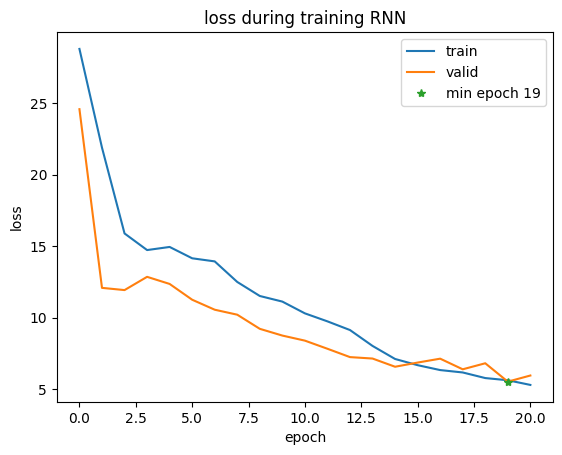

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.933  &5.948  &2.439  &0.496

Epoch:21, [Train] Loss: 4.981
Epoch:21, [Valid] Loss: 5.387
	SAVE MODEL: loss: 5.519 -> 5.387 | runtime: 0.433 ms
Epoch:22, [Train] Loss: 4.684
Epoch:22, [Valid] Loss: 5.459
EarlyStopping counter: 1 out of 20
Epoch:23, [Train] Loss: 4.635
Epoch:23, [Valid] Loss: 5.194
	SAVE MODEL: loss: 5.387 -> 5.194 | runtime: 0.436 ms
Epoch:24, [Train] Loss: 4.355
Epoch:24, [Valid] Loss: 5.751
EarlyStopping counter: 1 out of 20
Epoch:25, [Train] Loss: 4.534
Epoch:25, [Valid] Loss: 5.151
	SAVE MODEL: loss: 5.194 -> 5.151 | runtime: 0.396 ms
Train time: 0.423+/-0.013 ms


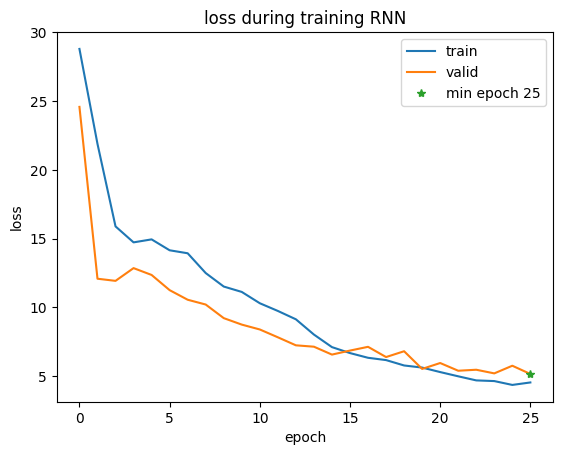

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.740  &5.151  &2.270  &0.563

Epoch:26, [Train] Loss: 3.979
Epoch:26, [Valid] Loss: 6.234
EarlyStopping counter: 1 out of 20
Epoch:27, [Train] Loss: 4.109
Epoch:27, [Valid] Loss: 5.420
EarlyStopping counter: 2 out of 20
Epoch:28, [Train] Loss: 3.702
Epoch:28, [Valid] Loss: 7.619
EarlyStopping counter: 3 out of 20
Epoch:29, [Train] Loss: 3.618
Epoch:29, [Valid] Loss: 4.690
	SAVE MODEL: loss: 5.151 -> 4.690 | runtime: 0.408 ms
Epoch:30, [Train] Loss: 3.610
Epoch:30, [Valid] Loss: 8.331
EarlyStopping counter: 1 out of 20
Train time: 0.423+/-0.013 ms


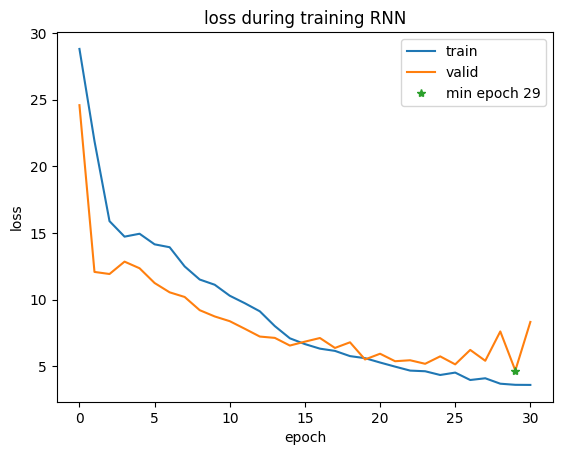

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&2.252  &8.331  &2.886  &0.293

Epoch:31, [Train] Loss: 3.327
Epoch:31, [Valid] Loss: 5.015
EarlyStopping counter: 2 out of 20
Epoch:32, [Train] Loss: 3.107
Epoch:32, [Valid] Loss: 5.630
EarlyStopping counter: 3 out of 20
Epoch:33, [Train] Loss: 2.846
Epoch:33, [Valid] Loss: 7.827
EarlyStopping counter: 4 out of 20
Epoch:34, [Train] Loss: 2.739
Epoch:34, [Valid] Loss: 4.429
	SAVE MODEL: loss: 4.690 -> 4.429 | runtime: 0.437 ms
Epoch:35, [Train] Loss: 2.716
Epoch:35, [Valid] Loss: 6.227
EarlyStopping counter: 1 out of 20
Train time: 0.424+/-0.014 ms


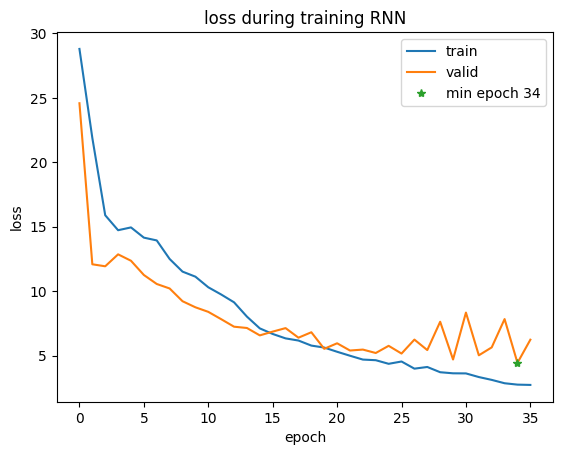

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.879  &6.227  &2.495  &0.472

Epoch:36, [Train] Loss: 2.586
Epoch:36, [Valid] Loss: 5.816
EarlyStopping counter: 2 out of 20
Epoch:37, [Train] Loss: 2.477
Epoch:37, [Valid] Loss: 5.734
EarlyStopping counter: 3 out of 20
Epoch:38, [Train] Loss: 2.325
Epoch:38, [Valid] Loss: 6.942
EarlyStopping counter: 4 out of 20
Epoch:39, [Train] Loss: 2.738
Epoch:39, [Valid] Loss: 4.078
	SAVE MODEL: loss: 4.429 -> 4.078 | runtime: 0.399 ms
Epoch:40, [Train] Loss: 2.936
Epoch:40, [Valid] Loss: 6.192
EarlyStopping counter: 1 out of 20
Train time: 0.425+/-0.014 ms


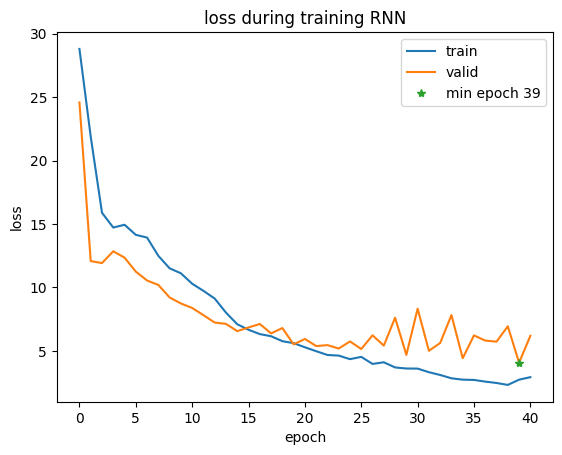

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.925  &6.192  &2.488  &0.475

Epoch:41, [Train] Loss: 2.518
Epoch:41, [Valid] Loss: 6.402
EarlyStopping counter: 2 out of 20
Epoch:42, [Train] Loss: 2.976
Epoch:42, [Valid] Loss: 5.680
EarlyStopping counter: 3 out of 20
Epoch:43, [Train] Loss: 2.491
Epoch:43, [Valid] Loss: 8.204
EarlyStopping counter: 4 out of 20
Epoch:44, [Train] Loss: 2.652
Epoch:44, [Valid] Loss: 4.730
EarlyStopping counter: 5 out of 20
Epoch:45, [Train] Loss: 2.389
Epoch:45, [Valid] Loss: 5.884
EarlyStopping counter: 6 out of 20
Train time: 0.425+/-0.014 ms


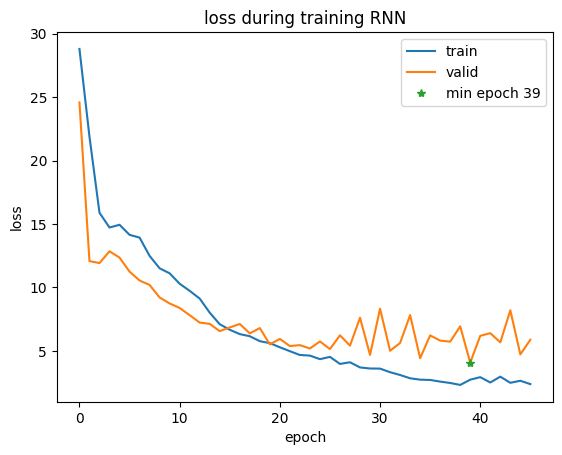

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.824  &5.884  &2.426  &0.501

Epoch:46, [Train] Loss: 2.509
Epoch:46, [Valid] Loss: 4.973
EarlyStopping counter: 7 out of 20
Epoch:47, [Train] Loss: 2.385
Epoch:47, [Valid] Loss: 5.587
EarlyStopping counter: 8 out of 20
Epoch:48, [Train] Loss: 2.289
Epoch:48, [Valid] Loss: 6.244
EarlyStopping counter: 9 out of 20
Epoch:49, [Train] Loss: 2.517
Epoch:49, [Valid] Loss: 4.757
EarlyStopping counter: 10 out of 20
Epoch:50, [Train] Loss: 2.157
Epoch:50, [Valid] Loss: 5.976
EarlyStopping counter: 11 out of 20
Train time: 0.425+/-0.015 ms


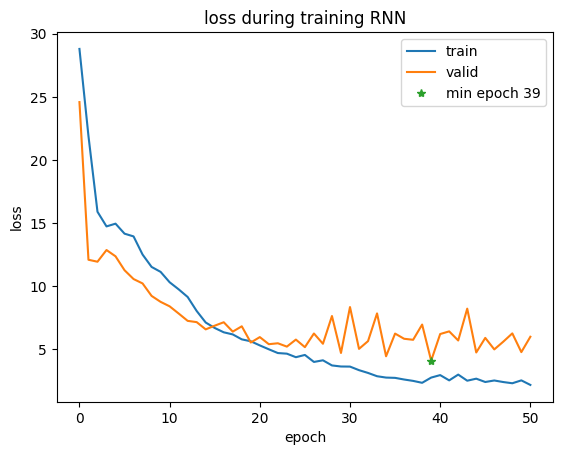

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.777  &5.976  &2.444  &0.493

Epoch:51, [Train] Loss: 2.075
Epoch:51, [Valid] Loss: 4.450
EarlyStopping counter: 12 out of 20
Epoch:52, [Train] Loss: 2.053
Epoch:52, [Valid] Loss: 5.150
EarlyStopping counter: 13 out of 20
Epoch:53, [Train] Loss: 2.006
Epoch:53, [Valid] Loss: 5.369
EarlyStopping counter: 14 out of 20
Epoch:54, [Train] Loss: 1.911
Epoch:54, [Valid] Loss: 4.956
EarlyStopping counter: 15 out of 20
Epoch:55, [Train] Loss: 1.836
Epoch:55, [Valid] Loss: 6.458
EarlyStopping counter: 16 out of 20
Train time: 0.425+/-0.016 ms


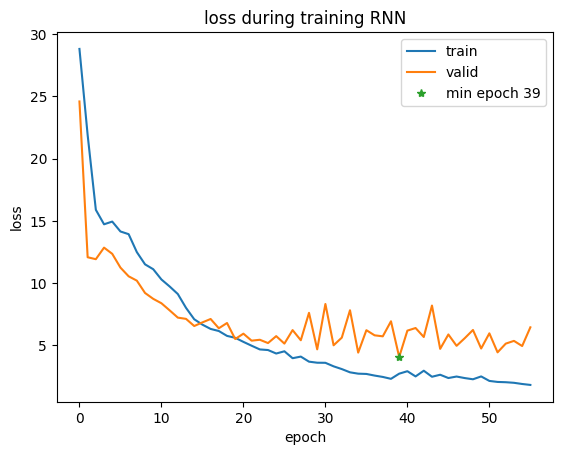

*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.831  &6.458  &2.541  &0.452

Epoch:56, [Train] Loss: 1.931
Epoch:56, [Valid] Loss: 4.924
EarlyStopping counter: 17 out of 20
Epoch:57, [Train] Loss: 2.038
Epoch:57, [Valid] Loss: 5.723
EarlyStopping counter: 18 out of 20
Epoch:58, [Train] Loss: 1.807
Epoch:58, [Valid] Loss: 4.838
EarlyStopping counter: 19 out of 20
Epoch:59, [Train] Loss: 1.770
Epoch:59, [Valid] Loss: 4.636
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2945090
Train time: 0.425+/-0.016 ms
best epoch: 39, min loss: 4.0778


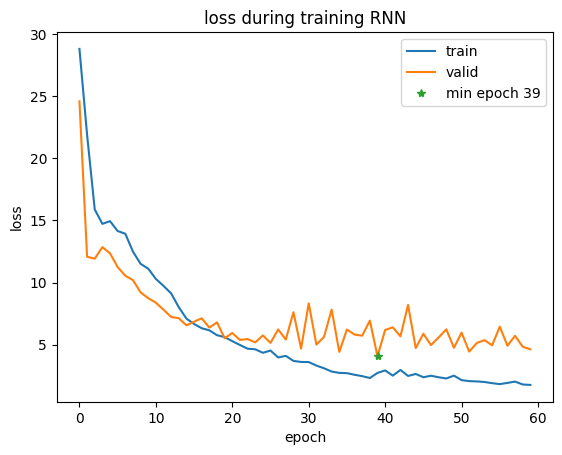

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '=', '@', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']', 'c', 'n', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['HydrationFreeEnergy_FreeSolv']
dropout : 0.1
IS_R : [True]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 3.664
*************** HydrationFreeEnergy_FreeSolv ***************
  MAE     MSE     RMSE    R2
&1.474  &3.664  &1.914  &0.776


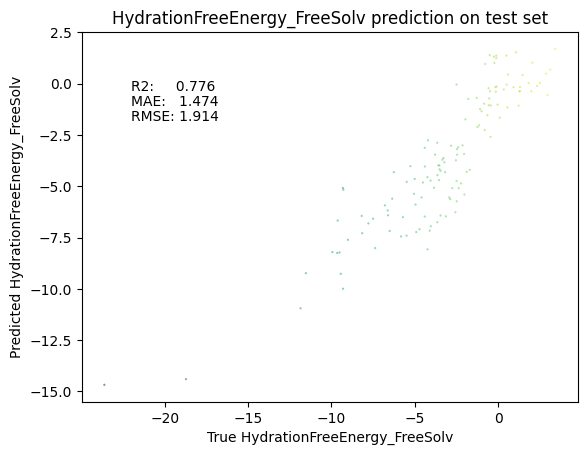

Found local copy...
Loading...



collect data for:  ['Solubility_AqSolDB']


Done!


train: 6988 | valid: 998 | test: 1996 | total: 9982
Alphabet: None



---> loader for ['Solubility_AqSolDB']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 92




Model type:  RNN | Model parameters:  3043089
Epoch:0, [Train] Loss: 6.145
Epoch:0, [Valid] Loss: 3.356
	SAVE MODEL: loss: inf -> 3.356 | runtime: 1.182 ms
Epoch:1, [Train] Loss: 3.058
Epoch:1, [Valid] Loss: 2.425
	SAVE MODEL: loss: 3.356 -> 2.425 | runtime: 1.226 ms
Epoch:2, [Train] Loss: 2.673
Epoch:2, [Valid] Loss: 2.408
	SAVE MODEL: loss: 2.425 -> 2.408 | runtime: 1.277 ms
Epoch:3, [Train] Loss: 2.524
Epoch:3, [Valid] Loss: 2.156
	SAVE MODEL: loss: 2.408 -> 2.156 | runtime: 1.265 ms
Epoch:4, [Train] Loss: 2.307
Epoch:4, [Valid] Loss: 2.712
EarlyStopping counter: 1 out of 20
Epoch:5, [Train] Loss: 2.219
Epoch:5, [Valid] Loss: 2.024
	SAVE MODEL: loss: 2.156 -> 2.

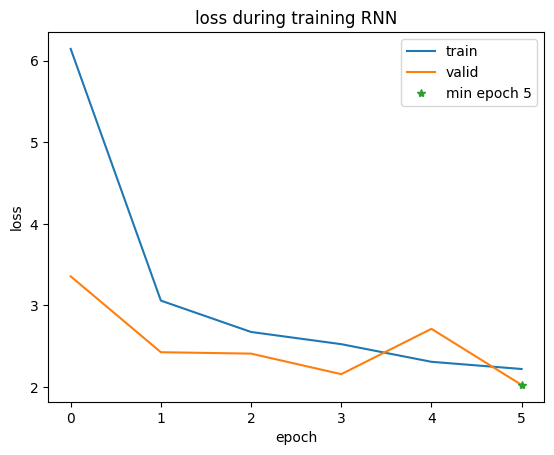

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.069  &2.024  &1.423  &0.619

Epoch:6, [Train] Loss: 1.930
Epoch:6, [Valid] Loss: 1.779
	SAVE MODEL: loss: 2.024 -> 1.779 | runtime: 1.271 ms
Epoch:7, [Train] Loss: 1.807
Epoch:7, [Valid] Loss: 1.584
	SAVE MODEL: loss: 1.779 -> 1.584 | runtime: 1.205 ms
Epoch:8, [Train] Loss: 1.780
Epoch:8, [Valid] Loss: 1.638
EarlyStopping counter: 1 out of 20
Epoch:9, [Train] Loss: 1.648
Epoch:9, [Valid] Loss: 1.652
EarlyStopping counter: 2 out of 20
Epoch:10, [Train] Loss: 1.616
Epoch:10, [Valid] Loss: 1.493
	SAVE MODEL: loss: 1.584 -> 1.493 | runtime: 1.250 ms
Train time: 1.241+/-0.029 ms


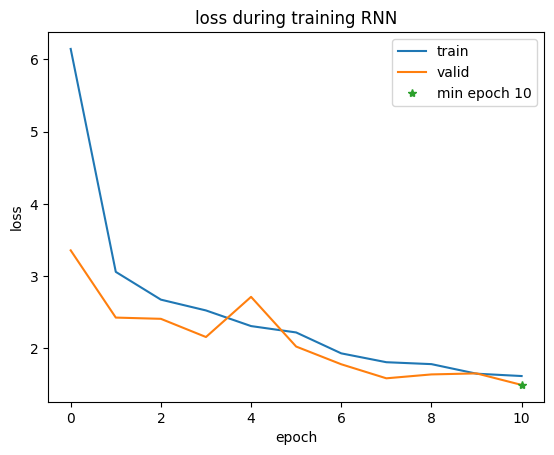

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.897  &1.493  &1.222  &0.719

Epoch:11, [Train] Loss: 1.536
Epoch:11, [Valid] Loss: 1.606
EarlyStopping counter: 1 out of 20
Epoch:12, [Train] Loss: 1.467
Epoch:12, [Valid] Loss: 1.540
EarlyStopping counter: 2 out of 20
Epoch:13, [Train] Loss: 1.461
Epoch:13, [Valid] Loss: 1.433
	SAVE MODEL: loss: 1.493 -> 1.433 | runtime: 1.215 ms
Epoch:14, [Train] Loss: 1.418
Epoch:14, [Valid] Loss: 1.522
EarlyStopping counter: 1 out of 20
Epoch:15, [Train] Loss: 1.338
Epoch:15, [Valid] Loss: 1.421
	SAVE MODEL: loss: 1.433 -> 1.421 | runtime: 1.240 ms
Train time: 1.242+/-0.027 ms


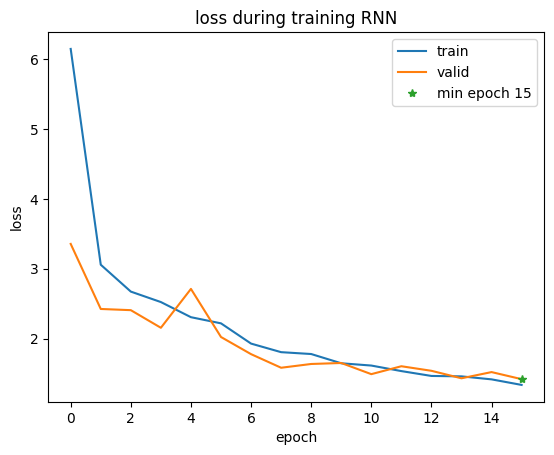

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.863  &1.421  &1.192  &0.732

Epoch:16, [Train] Loss: 1.308
Epoch:16, [Valid] Loss: 1.634
EarlyStopping counter: 1 out of 20
Epoch:17, [Train] Loss: 1.285
Epoch:17, [Valid] Loss: 1.445
EarlyStopping counter: 2 out of 20
Epoch:18, [Train] Loss: 1.207
Epoch:18, [Valid] Loss: 1.372
	SAVE MODEL: loss: 1.421 -> 1.372 | runtime: 1.217 ms
Epoch:19, [Train] Loss: 1.186
Epoch:19, [Valid] Loss: 1.362
	SAVE MODEL: loss: 1.372 -> 1.362 | runtime: 1.254 ms
Epoch:20, [Train] Loss: 1.174
Epoch:20, [Valid] Loss: 1.317
	SAVE MODEL: loss: 1.362 -> 1.317 | runtime: 1.256 ms
Train time: 1.243+/-0.024 ms


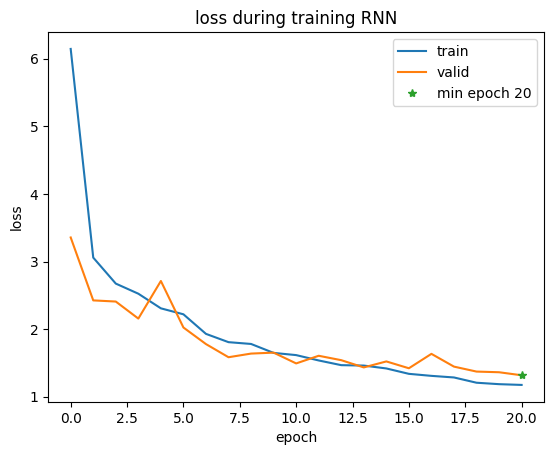

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.831  &1.317  &1.148  &0.752

Epoch:21, [Train] Loss: 1.128
Epoch:21, [Valid] Loss: 1.421
EarlyStopping counter: 1 out of 20
Epoch:22, [Train] Loss: 1.131
Epoch:22, [Valid] Loss: 1.276
	SAVE MODEL: loss: 1.317 -> 1.276 | runtime: 1.253 ms
Epoch:23, [Train] Loss: 1.054
Epoch:23, [Valid] Loss: 1.361
EarlyStopping counter: 1 out of 20
Epoch:24, [Train] Loss: 1.081
Epoch:24, [Valid] Loss: 1.347
EarlyStopping counter: 2 out of 20
Epoch:25, [Train] Loss: 1.000
Epoch:25, [Valid] Loss: 1.271
	SAVE MODEL: loss: 1.276 -> 1.271 | runtime: 1.235 ms
Train time: 1.243+/-0.022 ms


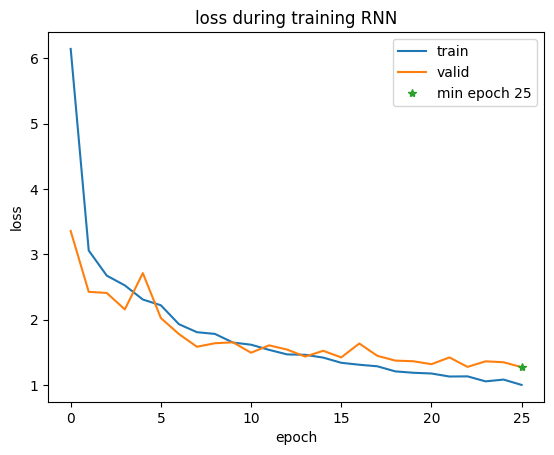

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.808  &1.271  &1.128  &0.760

Epoch:26, [Train] Loss: 0.948
Epoch:26, [Valid] Loss: 1.241
	SAVE MODEL: loss: 1.271 -> 1.241 | runtime: 1.223 ms
Epoch:27, [Train] Loss: 0.932
Epoch:27, [Valid] Loss: 1.387
EarlyStopping counter: 1 out of 20
Epoch:28, [Train] Loss: 0.914
Epoch:28, [Valid] Loss: 1.343
EarlyStopping counter: 2 out of 20
Epoch:29, [Train] Loss: 0.875
Epoch:29, [Valid] Loss: 1.341
EarlyStopping counter: 3 out of 20
Epoch:30, [Train] Loss: 0.836
Epoch:30, [Valid] Loss: 1.329
EarlyStopping counter: 4 out of 20
Train time: 1.241+/-0.022 ms


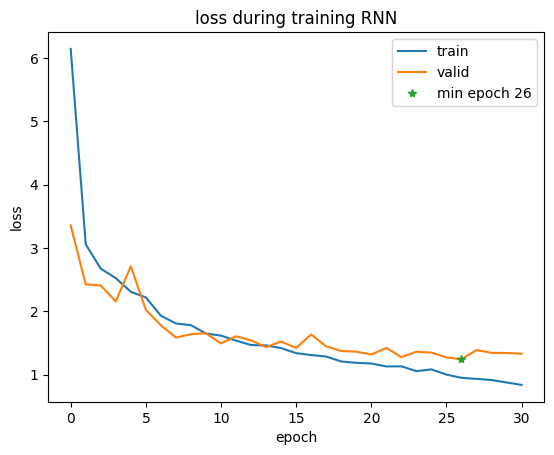

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.805  &1.329  &1.153  &0.750

Epoch:31, [Train] Loss: 0.807
Epoch:31, [Valid] Loss: 1.228
	SAVE MODEL: loss: 1.241 -> 1.228 | runtime: 1.230 ms
Epoch:32, [Train] Loss: 0.762
Epoch:32, [Valid] Loss: 1.334
EarlyStopping counter: 1 out of 20
Epoch:33, [Train] Loss: 0.760
Epoch:33, [Valid] Loss: 1.310
EarlyStopping counter: 2 out of 20
Epoch:34, [Train] Loss: 0.722
Epoch:34, [Valid] Loss: 1.220
	SAVE MODEL: loss: 1.228 -> 1.220 | runtime: 1.285 ms
Epoch:35, [Train] Loss: 0.678
Epoch:35, [Valid] Loss: 1.402
EarlyStopping counter: 1 out of 20
Train time: 1.243+/-0.024 ms


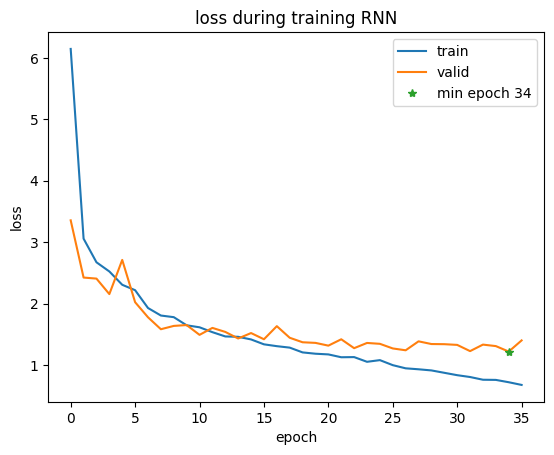

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.832  &1.402  &1.184  &0.736

Epoch:36, [Train] Loss: 0.666
Epoch:36, [Valid] Loss: 1.401
EarlyStopping counter: 2 out of 20
Epoch:37, [Train] Loss: 0.600
Epoch:37, [Valid] Loss: 1.286
EarlyStopping counter: 3 out of 20
Epoch:38, [Train] Loss: 0.576
Epoch:38, [Valid] Loss: 1.257
EarlyStopping counter: 4 out of 20
Epoch:39, [Train] Loss: 0.535
Epoch:39, [Valid] Loss: 1.317
EarlyStopping counter: 5 out of 20
Epoch:40, [Train] Loss: 0.508
Epoch:40, [Valid] Loss: 1.231
EarlyStopping counter: 6 out of 20
Train time: 1.243+/-0.023 ms


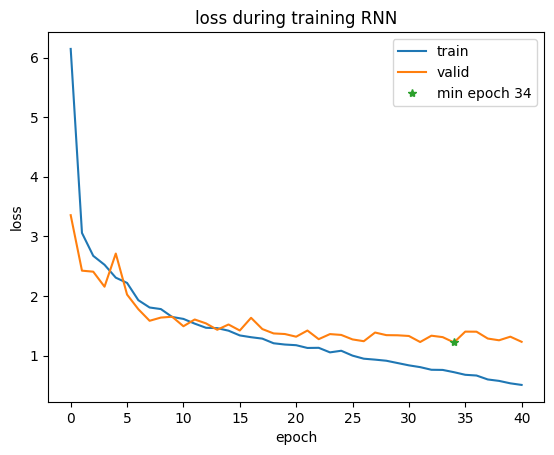

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.773  &1.231  &1.110  &0.768

Epoch:41, [Train] Loss: 0.501
Epoch:41, [Valid] Loss: 1.262
EarlyStopping counter: 7 out of 20
Epoch:42, [Train] Loss: 0.459
Epoch:42, [Valid] Loss: 1.362
EarlyStopping counter: 8 out of 20
Epoch:43, [Train] Loss: 0.442
Epoch:43, [Valid] Loss: 1.280
EarlyStopping counter: 9 out of 20
Epoch:44, [Train] Loss: 0.405
Epoch:44, [Valid] Loss: 1.270
EarlyStopping counter: 10 out of 20
Epoch:45, [Train] Loss: 0.365
Epoch:45, [Valid] Loss: 1.271
EarlyStopping counter: 11 out of 20
Train time: 1.243+/-0.023 ms


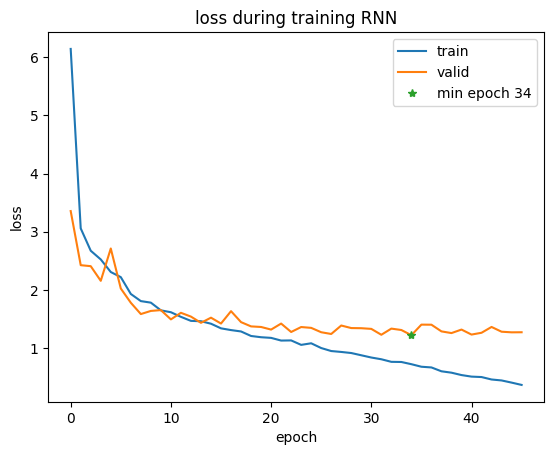

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.778  &1.271  &1.127  &0.760

Epoch:46, [Train] Loss: 0.341
Epoch:46, [Valid] Loss: 1.366
EarlyStopping counter: 12 out of 20
Epoch:47, [Train] Loss: 0.329
Epoch:47, [Valid] Loss: 1.342
EarlyStopping counter: 13 out of 20
Epoch:48, [Train] Loss: 0.297
Epoch:48, [Valid] Loss: 1.308
EarlyStopping counter: 14 out of 20
Epoch:49, [Train] Loss: 0.290
Epoch:49, [Valid] Loss: 1.320
EarlyStopping counter: 15 out of 20
Epoch:50, [Train] Loss: 0.281
Epoch:50, [Valid] Loss: 1.349
EarlyStopping counter: 16 out of 20
Train time: 1.243+/-0.022 ms


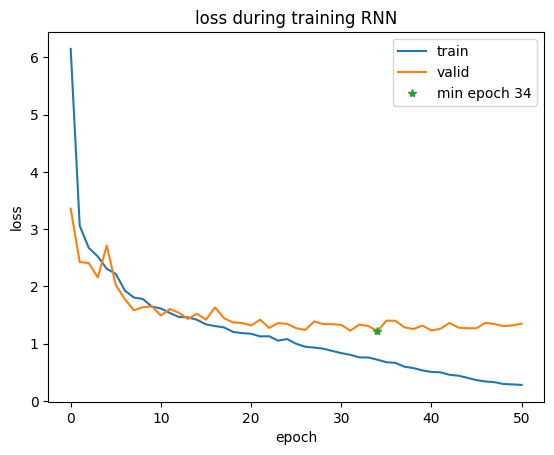

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.797  &1.349  &1.162  &0.746

Epoch:51, [Train] Loss: 0.264
Epoch:51, [Valid] Loss: 1.305
EarlyStopping counter: 17 out of 20
Epoch:52, [Train] Loss: 0.243
Epoch:52, [Valid] Loss: 1.368
EarlyStopping counter: 18 out of 20
Epoch:53, [Train] Loss: 0.234
Epoch:53, [Valid] Loss: 1.285
EarlyStopping counter: 19 out of 20
Epoch:54, [Train] Loss: 0.207
Epoch:54, [Valid] Loss: 1.324
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  3043089
Train time: 1.244+/-0.022 ms
best epoch: 34, min loss: 1.2205


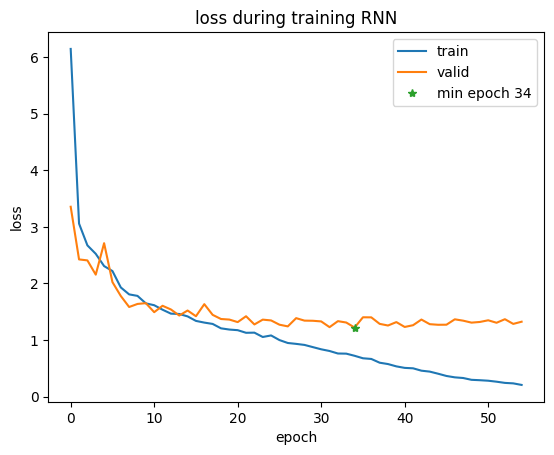

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Cr', 'Cu', 'Dy', 'F', 'Fe', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'I', 'Ir', 'K', 'La', 'Li', 'Lu', 'M', 'Mg', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ni', 'O', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Si', 'Sm', 'Sr', 'Ta', 'Te', 'Ti', 'V', 'W', 'Y', 'Z', 'Zr', '[', '\\', ']', 'c', 'e', 'n', 'o', 'p', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['Solubility_AqSolDB']
dropout : 0.1
IS_R : [True]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict :

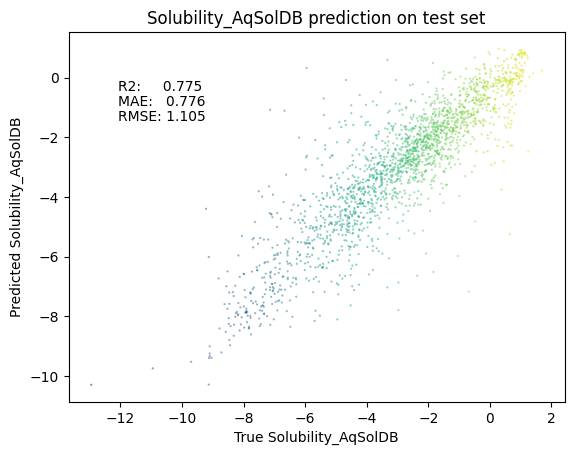

Found local copy...
Loading...



collect data for:  ['LD50_Zhu']


Done!


train: 5170 | valid: 738 | test: 1477 | total: 7385
Alphabet: None



---> loader for ['LD50_Zhu']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 35




Model type:  RNN | Model parameters:  2948298
Epoch:0, [Train] Loss: 1.655
Epoch:0, [Valid] Loss: 0.948
	SAVE MODEL: loss: inf -> 0.948 | runtime: 0.691 ms
Epoch:1, [Train] Loss: 0.855
Epoch:1, [Valid] Loss: 0.752
	SAVE MODEL: loss: 0.948 -> 0.752 | runtime: 0.709 ms
Epoch:2, [Train] Loss: 0.698
Epoch:2, [Valid] Loss: 0.721
	SAVE MODEL: loss: 0.752 -> 0.721 | runtime: 0.714 ms
Epoch:3, [Train] Loss: 0.675
Epoch:3, [Valid] Loss: 0.723
EarlyStopping counter: 1 out of 20
Epoch:4, [Train] Loss: 0.636
Epoch:4, [Valid] Loss: 0.671
	SAVE MODEL: loss: 0.721 -> 0.671 | runtime: 0.707 ms
Epoch:5, [Train] Loss: 0.635
Epoch:5, [Valid] Loss: 0.648
	SAVE MODEL: loss: 0.671 -> 0.648 | runt

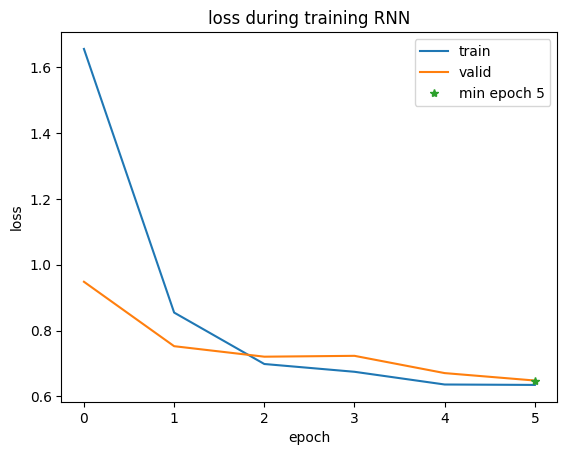

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.605  &0.648  &0.805  &0.323

Epoch:6, [Train] Loss: 0.615
Epoch:6, [Valid] Loss: 0.661
EarlyStopping counter: 1 out of 20
Epoch:7, [Train] Loss: 0.611
Epoch:7, [Valid] Loss: 0.635
	SAVE MODEL: loss: 0.648 -> 0.635 | runtime: 0.710 ms
Epoch:8, [Train] Loss: 0.614
Epoch:8, [Valid] Loss: 0.684
EarlyStopping counter: 1 out of 20
Epoch:9, [Train] Loss: 0.611
Epoch:9, [Valid] Loss: 0.660
EarlyStopping counter: 2 out of 20
Epoch:10, [Train] Loss: 0.605
Epoch:10, [Valid] Loss: 0.652
EarlyStopping counter: 3 out of 20
Train time: 0.706+/-0.008 ms


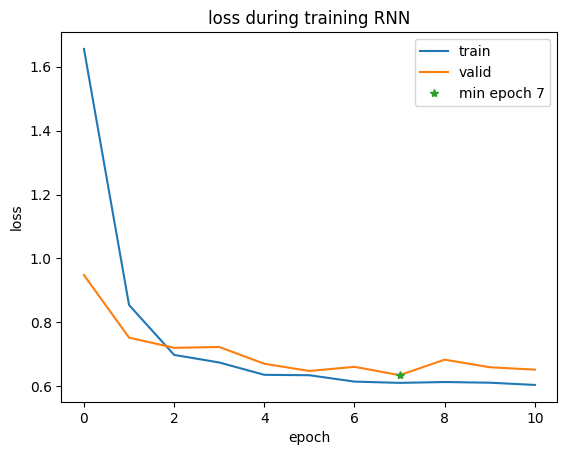

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.595  &0.652  &0.808  &0.318

Epoch:11, [Train] Loss: 0.604
Epoch:11, [Valid] Loss: 0.721
EarlyStopping counter: 4 out of 20
Epoch:12, [Train] Loss: 0.598
Epoch:12, [Valid] Loss: 0.671
EarlyStopping counter: 5 out of 20
Epoch:13, [Train] Loss: 0.595
Epoch:13, [Valid] Loss: 0.642
EarlyStopping counter: 6 out of 20
Epoch:14, [Train] Loss: 0.595
Epoch:14, [Valid] Loss: 0.606
	SAVE MODEL: loss: 0.635 -> 0.606 | runtime: 0.726 ms
Epoch:15, [Train] Loss: 0.575
Epoch:15, [Valid] Loss: 0.600
	SAVE MODEL: loss: 0.606 -> 0.600 | runtime: 0.699 ms
Train time: 0.710+/-0.011 ms


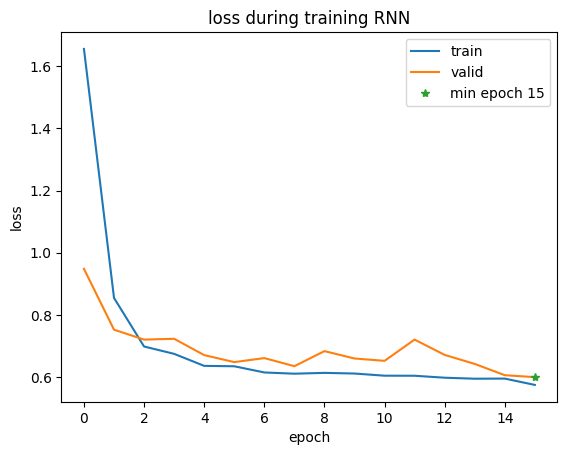

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.578  &0.600  &0.775  &0.373

Epoch:16, [Train] Loss: 0.574
Epoch:16, [Valid] Loss: 0.588
	SAVE MODEL: loss: 0.600 -> 0.588 | runtime: 0.708 ms
Epoch:17, [Train] Loss: 0.560
Epoch:17, [Valid] Loss: 0.622
EarlyStopping counter: 1 out of 20
Epoch:18, [Train] Loss: 0.574
Epoch:18, [Valid] Loss: 0.571
	SAVE MODEL: loss: 0.588 -> 0.571 | runtime: 0.710 ms
Epoch:19, [Train] Loss: 0.547
Epoch:19, [Valid] Loss: 0.578
EarlyStopping counter: 1 out of 20
Epoch:20, [Train] Loss: 0.553
Epoch:20, [Valid] Loss: 0.691
EarlyStopping counter: 2 out of 20
Train time: 0.709+/-0.011 ms


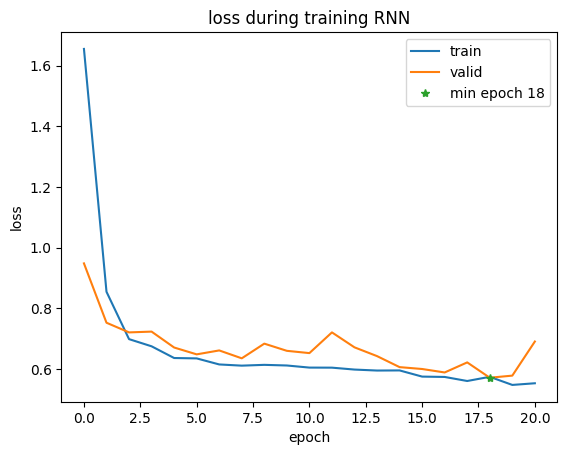

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.596  &0.691  &0.831  &0.278

Epoch:21, [Train] Loss: 0.539
Epoch:21, [Valid] Loss: 0.600
EarlyStopping counter: 3 out of 20
Epoch:22, [Train] Loss: 0.522
Epoch:22, [Valid] Loss: 0.562
	SAVE MODEL: loss: 0.571 -> 0.562 | runtime: 0.712 ms
Epoch:23, [Train] Loss: 0.523
Epoch:23, [Valid] Loss: 0.604
EarlyStopping counter: 1 out of 20
Epoch:24, [Train] Loss: 0.537
Epoch:24, [Valid] Loss: 0.570
EarlyStopping counter: 2 out of 20
Epoch:25, [Train] Loss: 0.510
Epoch:25, [Valid] Loss: 0.562
EarlyStopping counter: 3 out of 20
Train time: 0.710+/-0.011 ms


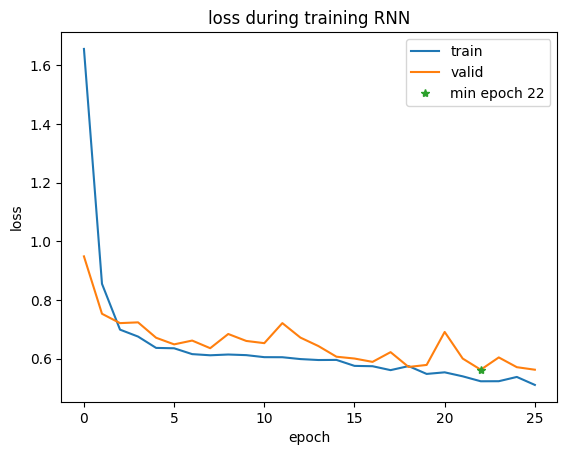

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.553  &0.562  &0.750  &0.413

Epoch:26, [Train] Loss: 0.499
Epoch:26, [Valid] Loss: 0.563
EarlyStopping counter: 4 out of 20
Epoch:27, [Train] Loss: 0.525
Epoch:27, [Valid] Loss: 0.576
EarlyStopping counter: 5 out of 20
Epoch:28, [Train] Loss: 0.518
Epoch:28, [Valid] Loss: 0.545
	SAVE MODEL: loss: 0.562 -> 0.545 | runtime: 0.712 ms
Epoch:29, [Train] Loss: 0.503
Epoch:29, [Valid] Loss: 0.543
	SAVE MODEL: loss: 0.545 -> 0.543 | runtime: 0.720 ms
Epoch:30, [Train] Loss: 0.486
Epoch:30, [Valid] Loss: 0.562
EarlyStopping counter: 1 out of 20
Train time: 0.712+/-0.012 ms


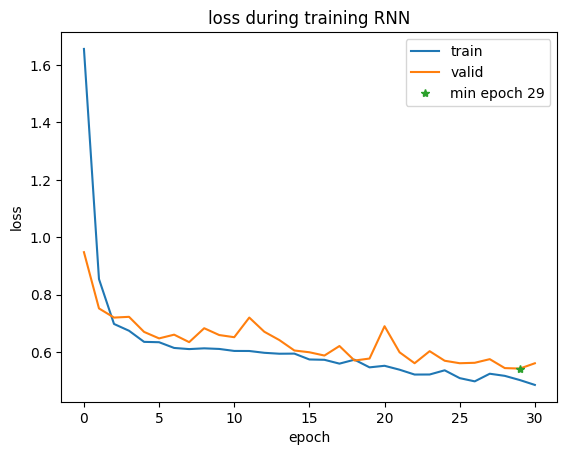

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.551  &0.562  &0.749  &0.413

Epoch:31, [Train] Loss: 0.482
Epoch:31, [Valid] Loss: 0.551
EarlyStopping counter: 2 out of 20
Epoch:32, [Train] Loss: 0.467
Epoch:32, [Valid] Loss: 0.541
	SAVE MODEL: loss: 0.543 -> 0.541 | runtime: 0.718 ms
Epoch:33, [Train] Loss: 0.475
Epoch:33, [Valid] Loss: 0.530
	SAVE MODEL: loss: 0.541 -> 0.530 | runtime: 0.739 ms
Epoch:34, [Train] Loss: 0.464
Epoch:34, [Valid] Loss: 0.527
	SAVE MODEL: loss: 0.530 -> 0.527 | runtime: 0.714 ms
Epoch:35, [Train] Loss: 0.443
Epoch:35, [Valid] Loss: 0.526
	SAVE MODEL: loss: 0.527 -> 0.526 | runtime: 0.726 ms
Train time: 0.713+/-0.012 ms


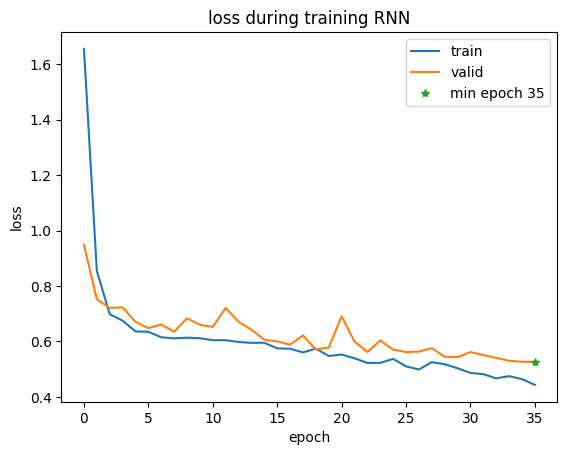

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.556  &0.526  &0.725  &0.450

Epoch:36, [Train] Loss: 0.440
Epoch:36, [Valid] Loss: 0.533
EarlyStopping counter: 1 out of 20
Epoch:37, [Train] Loss: 0.431
Epoch:37, [Valid] Loss: 0.580
EarlyStopping counter: 2 out of 20
Epoch:38, [Train] Loss: 0.426
Epoch:38, [Valid] Loss: 0.547
EarlyStopping counter: 3 out of 20
Epoch:39, [Train] Loss: 0.411
Epoch:39, [Valid] Loss: 0.545
EarlyStopping counter: 4 out of 20
Epoch:40, [Train] Loss: 0.411
Epoch:40, [Valid] Loss: 0.516
	SAVE MODEL: loss: 0.526 -> 0.516 | runtime: 0.709 ms
Train time: 0.713+/-0.012 ms


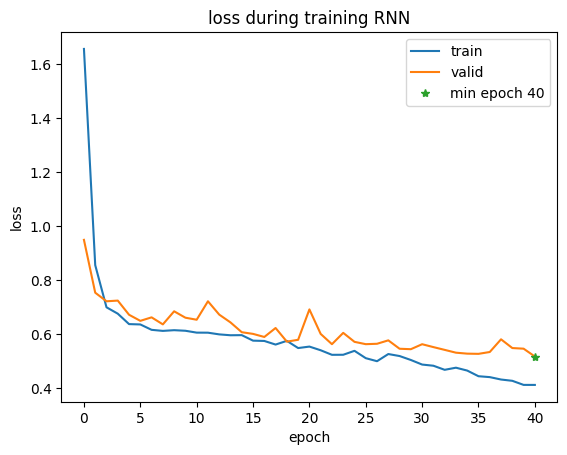

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.539  &0.516  &0.718  &0.461

Epoch:41, [Train] Loss: 0.394
Epoch:41, [Valid] Loss: 0.554
EarlyStopping counter: 1 out of 20
Epoch:42, [Train] Loss: 0.380
Epoch:42, [Valid] Loss: 0.537
EarlyStopping counter: 2 out of 20
Epoch:43, [Train] Loss: 0.370
Epoch:43, [Valid] Loss: 0.539
EarlyStopping counter: 3 out of 20
Epoch:44, [Train] Loss: 0.360
Epoch:44, [Valid] Loss: 0.504
	SAVE MODEL: loss: 0.516 -> 0.504 | runtime: 0.708 ms
Epoch:45, [Train] Loss: 0.350
Epoch:45, [Valid] Loss: 0.508
EarlyStopping counter: 1 out of 20
Train time: 0.714+/-0.012 ms


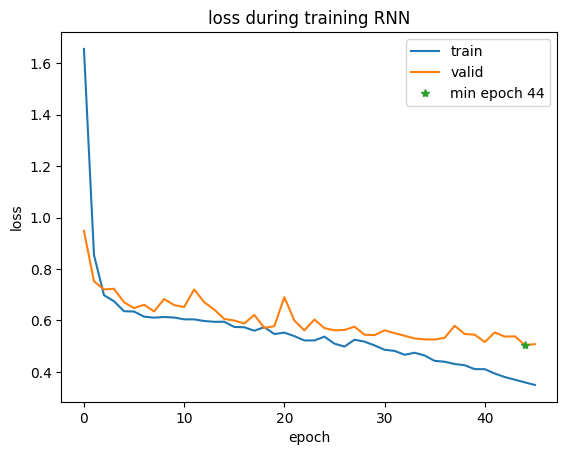

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.543  &0.508  &0.713  &0.469

Epoch:46, [Train] Loss: 0.323
Epoch:46, [Valid] Loss: 0.566
EarlyStopping counter: 2 out of 20
Epoch:47, [Train] Loss: 0.322
Epoch:47, [Valid] Loss: 0.578
EarlyStopping counter: 3 out of 20
Epoch:48, [Train] Loss: 0.317
Epoch:48, [Valid] Loss: 0.532
EarlyStopping counter: 4 out of 20
Epoch:49, [Train] Loss: 0.287
Epoch:49, [Valid] Loss: 0.509
EarlyStopping counter: 5 out of 20
Epoch:50, [Train] Loss: 0.271
Epoch:50, [Valid] Loss: 0.543
EarlyStopping counter: 6 out of 20
Train time: 0.714+/-0.011 ms


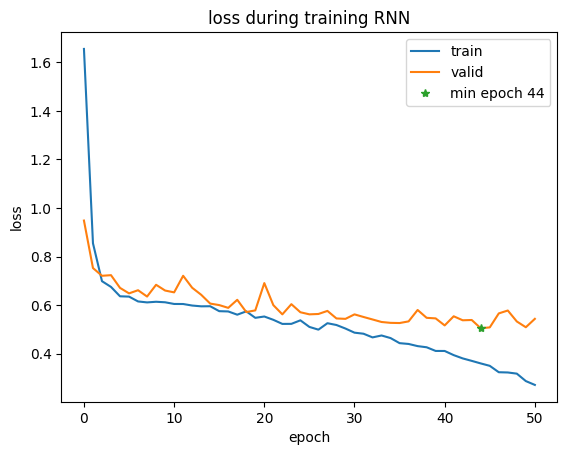

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.549  &0.543  &0.737  &0.432

Epoch:51, [Train] Loss: 0.249
Epoch:51, [Valid] Loss: 0.544
EarlyStopping counter: 7 out of 20
Epoch:52, [Train] Loss: 0.242
Epoch:52, [Valid] Loss: 0.590
EarlyStopping counter: 8 out of 20
Epoch:53, [Train] Loss: 0.233
Epoch:53, [Valid] Loss: 0.557
EarlyStopping counter: 9 out of 20
Epoch:54, [Train] Loss: 0.212
Epoch:54, [Valid] Loss: 0.541
EarlyStopping counter: 10 out of 20
Epoch:55, [Train] Loss: 0.210
Epoch:55, [Valid] Loss: 0.524
EarlyStopping counter: 11 out of 20
Train time: 0.713+/-0.011 ms


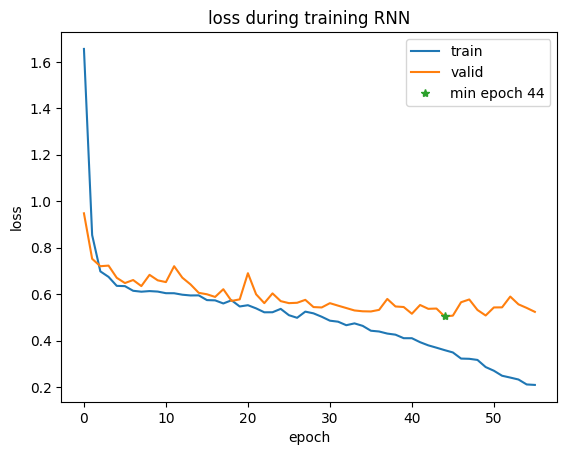

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.540  &0.524  &0.724  &0.452

Epoch:56, [Train] Loss: 0.190
Epoch:56, [Valid] Loss: 0.553
EarlyStopping counter: 12 out of 20
Epoch:57, [Train] Loss: 0.166
Epoch:57, [Valid] Loss: 0.521
EarlyStopping counter: 13 out of 20
Epoch:58, [Train] Loss: 0.153
Epoch:58, [Valid] Loss: 0.546
EarlyStopping counter: 14 out of 20
Epoch:59, [Train] Loss: 0.143
Epoch:59, [Valid] Loss: 0.555
EarlyStopping counter: 15 out of 20
Epoch:60, [Train] Loss: 0.136
Epoch:60, [Valid] Loss: 0.530
EarlyStopping counter: 16 out of 20
Train time: 0.713+/-0.011 ms


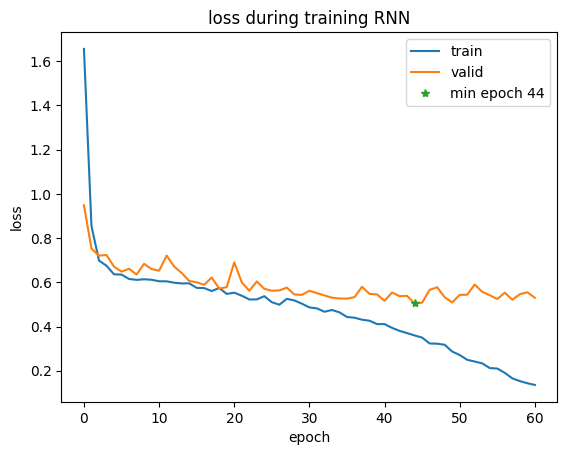

*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.542  &0.530  &0.728  &0.446

Epoch:61, [Train] Loss: 0.124
Epoch:61, [Valid] Loss: 0.525
EarlyStopping counter: 17 out of 20
Epoch:62, [Train] Loss: 0.111
Epoch:62, [Valid] Loss: 0.549
EarlyStopping counter: 18 out of 20
Epoch:63, [Train] Loss: 0.107
Epoch:63, [Valid] Loss: 0.516
EarlyStopping counter: 19 out of 20
Epoch:64, [Train] Loss: 0.101
Epoch:64, [Valid] Loss: 0.541
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2948298
Train time: 0.713+/-0.011 ms
best epoch: 44, min loss: 0.5045


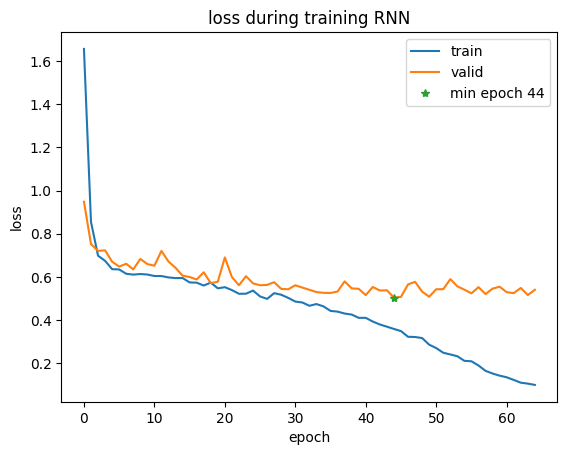

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '1', '2', '3', '4', '5', '6', '7', '8', '=', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', 'Si', '[', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['LD50_Zhu']
dropout : 0.1
IS_R : [True]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 0.441
*************** LD50_Zhu ***************
  MAE     MSE     RMSE    R2
&0.497  &0.441  &0.664  &0.506


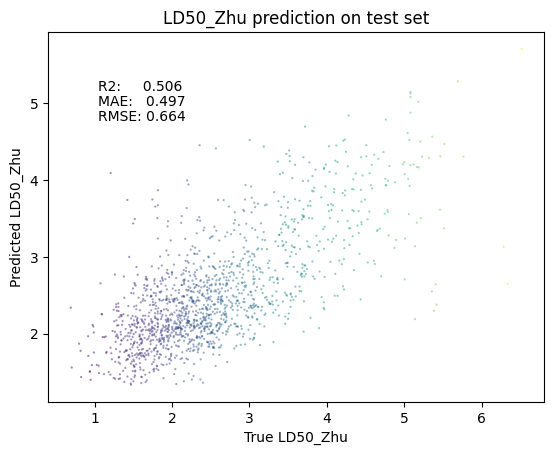

Found local copy...
Loading...
Done!



collect data for:  ['CYP2C19_Veith']
train: 8866 | valid: 1266 | test: 2533 | total: 12665
Alphabet: None



---> loader for ['CYP2C19_Veith']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 60




Model type:  RNN | Model parameters:  2989073
Epoch:0, [Train] Loss: 0.640
Epoch:0, [Valid] Loss: 0.626
	SAVE MODEL: loss: inf -> 0.626 | runtime: 1.152 ms
Epoch:1, [Train] Loss: 0.592
Epoch:1, [Valid] Loss: 0.566
	SAVE MODEL: loss: 0.626 -> 0.566 | runtime: 1.175 ms
Epoch:2, [Train] Loss: 0.564
Epoch:2, [Valid] Loss: 0.571
EarlyStopping counter: 1 out of 20
Epoch:3, [Train] Loss: 0.545
Epoch:3, [Valid] Loss: 0.558
	SAVE MODEL: loss: 0.566 -> 0.558 | runtime: 1.157 ms
Epoch:4, [Train] Loss: 0.537
Epoch:4, [Valid] Loss: 0.561
EarlyStopping counter: 1 out of 20
Epoch:5, [Train] Loss: 0.536
Epoch:5, [Valid] Loss: 0.542
	SAVE MODEL: l

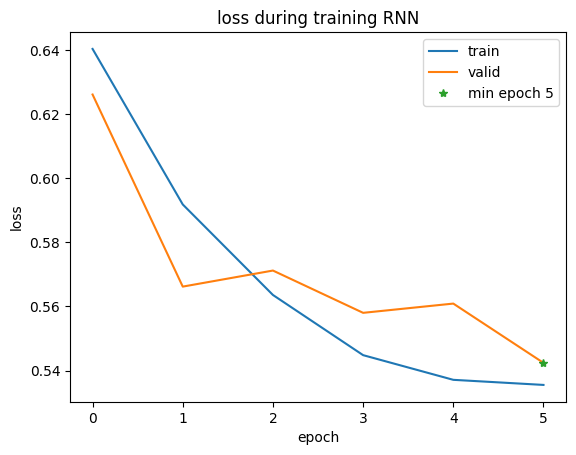

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.730  &  0.721  &          0.787  &     0.580  &0.862  &0.668 &0.818 &   0.464 &   0.770

Epoch:6, [Train] Loss: 0.536
Epoch:6, [Valid] Loss: 0.532
	SAVE MODEL: loss: 0.542 -> 0.532 | runtime: 1.170 ms
Epoch:7, [Train] Loss: 0.527
Epoch:7, [Valid] Loss: 0.532
EarlyStopping counter: 1 out of 20
Epoch:8, [Train] Loss: 0.509
Epoch:8, [Valid] Loss: 0.512
	SAVE MODEL: loss: 0.532 -> 0.512 | runtime: 1.177 ms
Epoch:9, [Train] Loss: 0.505
Epoch:9, [Valid] Loss: 0.536
EarlyStopping counter: 1 out of 20
Epoch:10, [Train] Loss: 0.493
Epoch:10, [Valid] Loss: 0.501
	SAVE MODEL: loss: 0.512 -> 0.501 | runtime: 1.175 ms
Train time: 1.166+/-0.010 ms


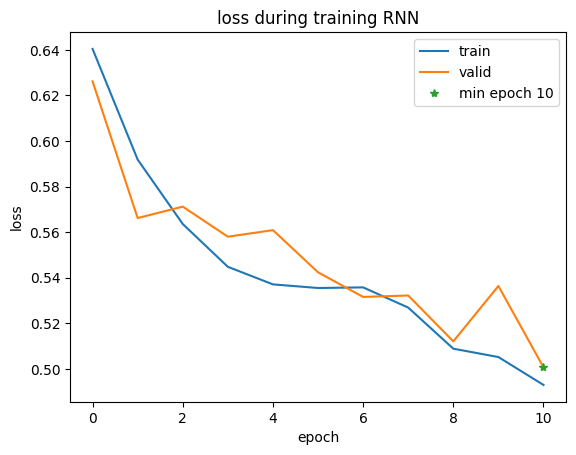

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.765  &  0.765  &          0.735  &     0.777  &0.753  &0.756 &0.839 &   0.530 &   0.800

Epoch:11, [Train] Loss: 0.482
Epoch:11, [Valid] Loss: 0.498
	SAVE MODEL: loss: 0.501 -> 0.498 | runtime: 1.174 ms
Epoch:12, [Train] Loss: 0.475
Epoch:12, [Valid] Loss: 0.486
	SAVE MODEL: loss: 0.498 -> 0.486 | runtime: 1.142 ms
Epoch:13, [Train] Loss: 0.469
Epoch:13, [Valid] Loss: 0.507
EarlyStopping counter: 1 out of 20
Epoch:14, [Train] Loss: 0.459
Epoch:14, [Valid] Loss: 0.503
EarlyStopping counter: 2 out of 20
Epoch:15, [Train] Loss: 0.446
Epoch:15, [Valid] Loss: 0.477
	SAVE MODEL: loss: 0.486 -> 0.477 | runtime: 1.152 ms
Train time: 1.164+/-0.015 ms


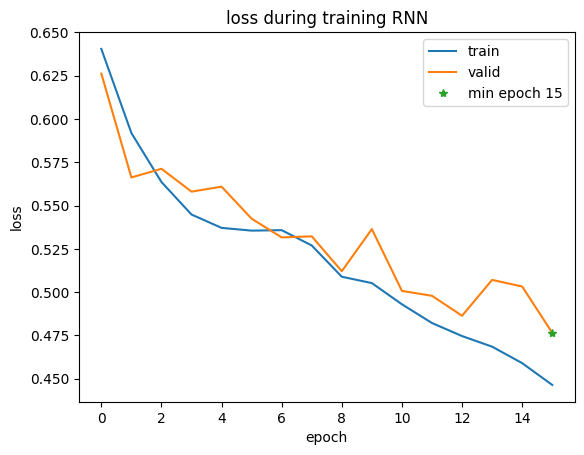

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.795  &  0.794  &          0.778  &     0.786  &0.802  &0.782 &0.855 &   0.588 &   0.820

Epoch:16, [Train] Loss: 0.439
Epoch:16, [Valid] Loss: 0.485
EarlyStopping counter: 1 out of 20
Epoch:17, [Train] Loss: 0.429
Epoch:17, [Valid] Loss: 0.500
EarlyStopping counter: 2 out of 20
Epoch:18, [Train] Loss: 0.422
Epoch:18, [Valid] Loss: 0.534
EarlyStopping counter: 3 out of 20
Epoch:19, [Train] Loss: 0.419
Epoch:19, [Valid] Loss: 0.470
	SAVE MODEL: loss: 0.477 -> 0.470 | runtime: 1.158 ms
Epoch:20, [Train] Loss: 0.410
Epoch:20, [Valid] Loss: 0.472
EarlyStopping counter: 1 out of 20
Train time: 1.162+/-0.014 ms


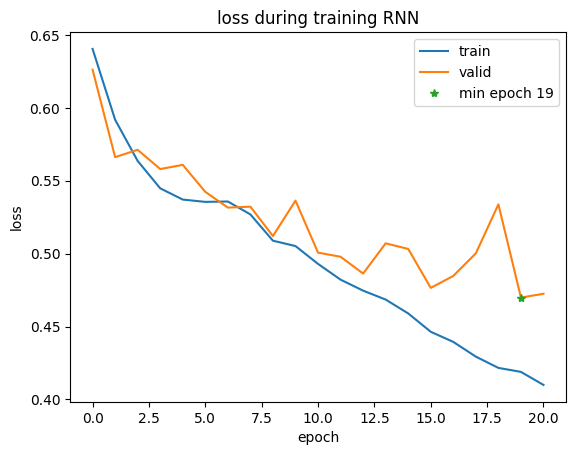

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.793  &  0.797  &          0.742  &     0.857  &0.737  &0.795 &0.865 &   0.594 &   0.830

Epoch:21, [Train] Loss: 0.398
Epoch:21, [Valid] Loss: 0.475
EarlyStopping counter: 2 out of 20
Epoch:22, [Train] Loss: 0.371
Epoch:22, [Valid] Loss: 0.467
	SAVE MODEL: loss: 0.470 -> 0.467 | runtime: 1.157 ms
Epoch:23, [Train] Loss: 0.358
Epoch:23, [Valid] Loss: 0.481
EarlyStopping counter: 1 out of 20
Epoch:24, [Train] Loss: 0.346
Epoch:24, [Valid] Loss: 0.478
EarlyStopping counter: 2 out of 20
Epoch:25, [Train] Loss: 0.330
Epoch:25, [Valid] Loss: 0.486
EarlyStopping counter: 3 out of 20
Train time: 1.160+/-0.014 ms


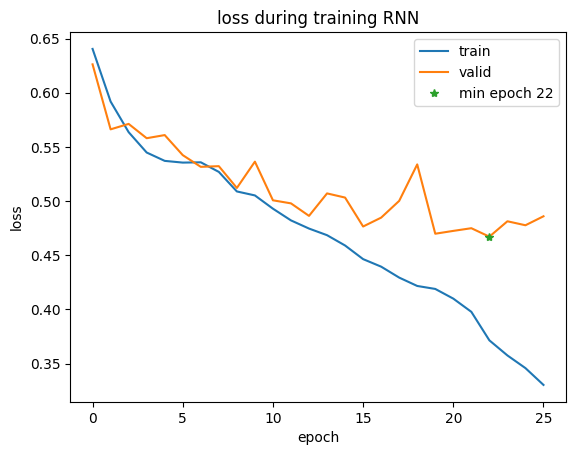

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.791  &  0.788  &          0.799  &     0.739  &0.837  &0.768 &0.865 &   0.579 &   0.837

Epoch:26, [Train] Loss: 0.314
Epoch:26, [Valid] Loss: 0.490
EarlyStopping counter: 4 out of 20
Epoch:27, [Train] Loss: 0.296
Epoch:27, [Valid] Loss: 0.515
EarlyStopping counter: 5 out of 20
Epoch:28, [Train] Loss: 0.282
Epoch:28, [Valid] Loss: 0.521
EarlyStopping counter: 6 out of 20
Epoch:29, [Train] Loss: 0.249
Epoch:29, [Valid] Loss: 0.592
EarlyStopping counter: 7 out of 20
Epoch:30, [Train] Loss: 0.223
Epoch:30, [Valid] Loss: 0.608
EarlyStopping counter: 8 out of 20
Train time: 1.159+/-0.015 ms


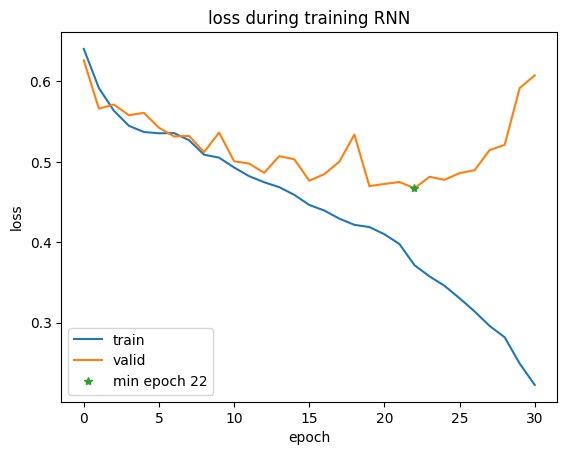

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.789  &  0.792  &          0.743  &     0.840  &0.744  &0.789 &0.852 &   0.584 &   0.810

Epoch:31, [Train] Loss: 0.197
Epoch:31, [Valid] Loss: 0.641
EarlyStopping counter: 9 out of 20
Epoch:32, [Train] Loss: 0.191
Epoch:32, [Valid] Loss: 0.649
EarlyStopping counter: 10 out of 20
Epoch:33, [Train] Loss: 0.169
Epoch:33, [Valid] Loss: 0.728
EarlyStopping counter: 11 out of 20
Epoch:34, [Train] Loss: 0.150
Epoch:34, [Valid] Loss: 0.790
EarlyStopping counter: 12 out of 20
Epoch:35, [Train] Loss: 0.117
Epoch:35, [Valid] Loss: 0.828
EarlyStopping counter: 13 out of 20
Train time: 1.160+/-0.015 ms


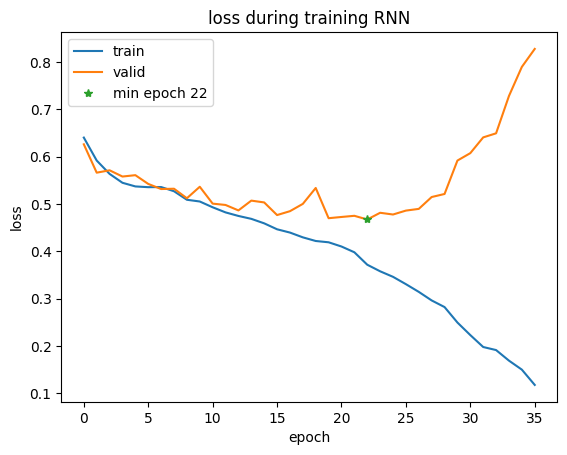

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.793  &  0.793  &          0.775  &     0.786  &0.799  &0.781 &0.856 &   0.585 &   0.815

Epoch:36, [Train] Loss: 0.116
Epoch:36, [Valid] Loss: 0.931
EarlyStopping counter: 14 out of 20
Epoch:37, [Train] Loss: 0.142
Epoch:37, [Valid] Loss: 0.794
EarlyStopping counter: 15 out of 20
Epoch:38, [Train] Loss: 0.092
Epoch:38, [Valid] Loss: 0.915
EarlyStopping counter: 16 out of 20
Epoch:39, [Train] Loss: 0.067
Epoch:39, [Valid] Loss: 1.001
EarlyStopping counter: 17 out of 20
Epoch:40, [Train] Loss: 0.090
Epoch:40, [Valid] Loss: 1.028
EarlyStopping counter: 18 out of 20
Train time: 1.161+/-0.015 ms


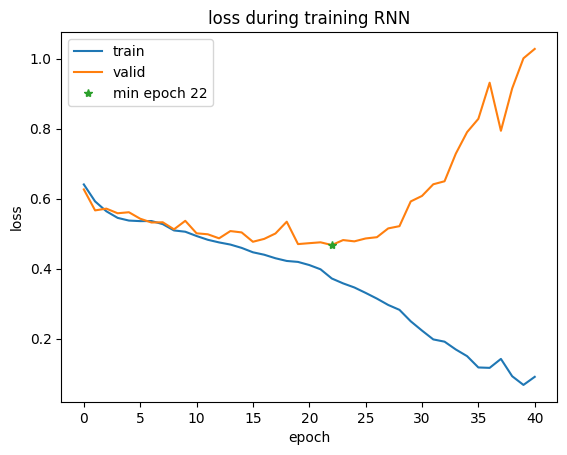

*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.749  &  0.742  &          0.788  &     0.634  &0.850  &0.703 &0.819 &   0.498 &   0.791

Epoch:41, [Train] Loss: 0.111
Epoch:41, [Valid] Loss: 0.900
EarlyStopping counter: 19 out of 20
Epoch:42, [Train] Loss: 0.069
Epoch:42, [Valid] Loss: 1.015
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2989073
Train time: 1.162+/-0.015 ms
best epoch: 22, min loss: 0.4672


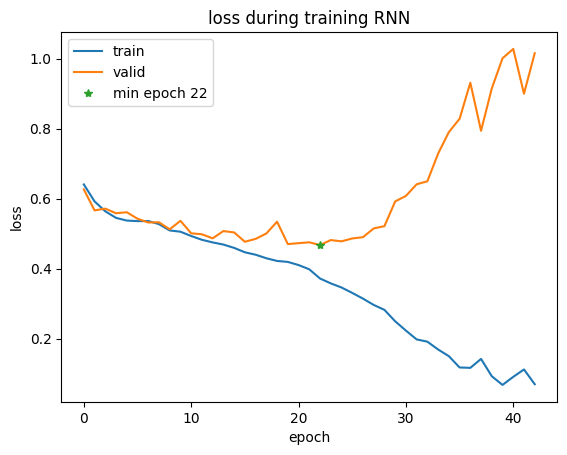

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '%10', '%11', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'As', 'B', 'Br', 'C', 'Ca', 'Cl', 'Cr', 'Cu', 'F', 'Fe', 'H', 'Hg', 'I', 'K', 'Li', 'M', 'N', 'Na', 'Ni', 'O', 'P', 'Pt', 'Ru', 'S', 'Sb', 'Se', 'Si', 'W', 'Z', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['CYP2C19_Veith']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...
Done!


[Test] Loss: 0.495
*************** CYP2C19_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.775  &  0.776  &          0.733  &     0.800  &0.753  &0.765 &0.847 &   0.551 &   0.799

collect data for:  ['CYP2D6_Veith']
train: 9191 | valid: 1313 | test: 2626 | total: 13130
Alphabet: None



---> loader for ['CYP2D6_Veith']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 61




Model type:  RNN | Model parameters:  2990730
Epoch:0, [Train] Loss: 0.488
Epoch:0, [Valid] Loss: 0.456
	SAVE MODEL: loss: inf -> 0.456 | runtime: 1.173 ms
Epoch:1, [Train] Loss: 0.422
Epoch:1, [Valid] Loss: 0.420
	SAVE MODEL: loss: 0.456 -> 0.420 | runtime: 1.165 ms
Epoch:2, [Train] Loss: 0.411
Epoch:2, [Valid] Loss: 0.424
EarlyStopping counter: 1 out of 20
Epoch:3, [Train] Loss: 0.413
Epoch

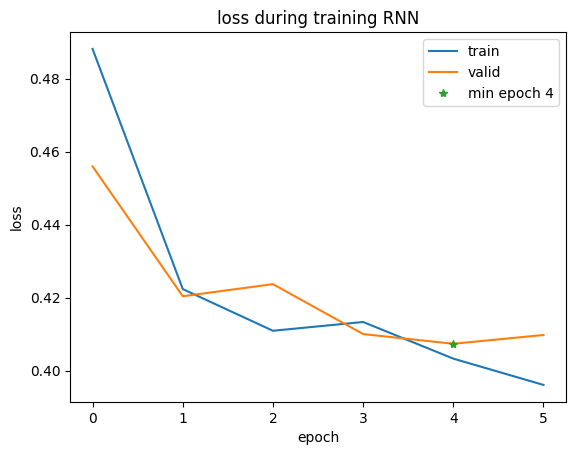

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.831  &  0.627  &          0.670  &     0.288  &0.965  &0.403 &0.778 &   0.361 &   0.523

Epoch:6, [Train] Loss: 0.395
Epoch:6, [Valid] Loss: 0.435
EarlyStopping counter: 2 out of 20
Epoch:7, [Train] Loss: 0.397
Epoch:7, [Valid] Loss: 0.399
	SAVE MODEL: loss: 0.407 -> 0.399 | runtime: 1.162 ms
Epoch:8, [Train] Loss: 0.390
Epoch:8, [Valid] Loss: 0.410
EarlyStopping counter: 1 out of 20
Epoch:9, [Train] Loss: 0.384
Epoch:9, [Valid] Loss: 0.402
EarlyStopping counter: 2 out of 20
Epoch:10, [Train] Loss: 0.380
Epoch:10, [Valid] Loss: 0.390
	SAVE MODEL: loss: 0.399 -> 0.390 | runtime: 1.172 ms
Train time: 1.168+/-0.011 ms


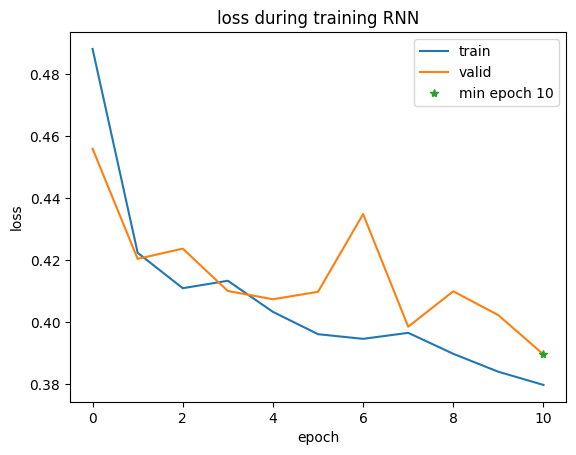

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.840  &  0.679  &          0.652  &     0.412  &0.946  &0.505 &0.806 &   0.431 &   0.583

Epoch:11, [Train] Loss: 0.377
Epoch:11, [Valid] Loss: 0.388
	SAVE MODEL: loss: 0.390 -> 0.388 | runtime: 1.113 ms
Epoch:12, [Train] Loss: 0.374
Epoch:12, [Valid] Loss: 0.384
	SAVE MODEL: loss: 0.388 -> 0.384 | runtime: 1.145 ms
Epoch:13, [Train] Loss: 0.373
Epoch:13, [Valid] Loss: 0.390
EarlyStopping counter: 1 out of 20
Epoch:14, [Train] Loss: 0.370
Epoch:14, [Valid] Loss: 0.386
EarlyStopping counter: 2 out of 20
Epoch:15, [Train] Loss: 0.364
Epoch:15, [Valid] Loss: 0.394
EarlyStopping counter: 3 out of 20
Train time: 1.161+/-0.018 ms


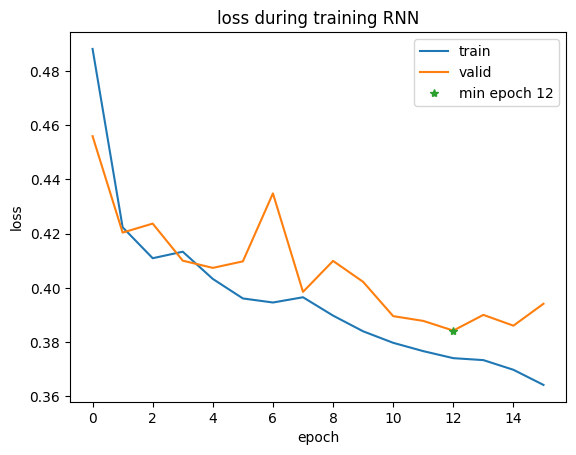

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.835  &  0.611  &          0.775  &     0.238  &0.983  &0.365 &0.810 &   0.369 &   0.588

Epoch:16, [Train] Loss: 0.363
Epoch:16, [Valid] Loss: 0.382
	SAVE MODEL: loss: 0.384 -> 0.382 | runtime: 1.161 ms
Epoch:17, [Train] Loss: 0.359
Epoch:17, [Valid] Loss: 0.382
EarlyStopping counter: 1 out of 20
Epoch:18, [Train] Loss: 0.356
Epoch:18, [Valid] Loss: 0.381
	SAVE MODEL: loss: 0.382 -> 0.381 | runtime: 1.164 ms
Epoch:19, [Train] Loss: 0.348
Epoch:19, [Valid] Loss: 0.379
	SAVE MODEL: loss: 0.381 -> 0.379 | runtime: 1.146 ms
Epoch:20, [Train] Loss: 0.347
Epoch:20, [Valid] Loss: 0.382
EarlyStopping counter: 1 out of 20
Train time: 1.160+/-0.016 ms


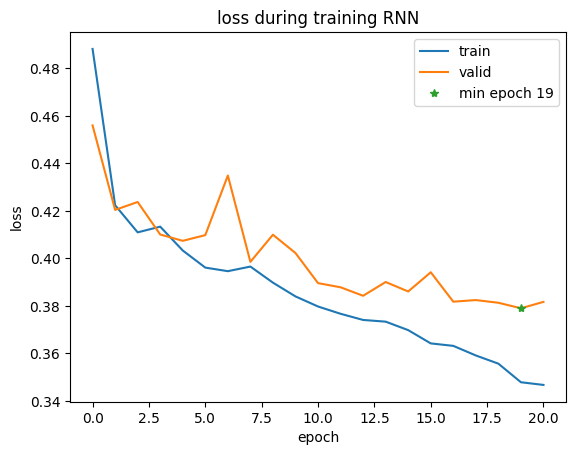

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.845  &  0.704  &          0.652  &     0.469  &0.938  &0.546 &0.823 &   0.465 &   0.601

Epoch:21, [Train] Loss: 0.334
Epoch:21, [Valid] Loss: 0.370
	SAVE MODEL: loss: 0.379 -> 0.370 | runtime: 1.157 ms
Epoch:22, [Train] Loss: 0.328
Epoch:22, [Valid] Loss: 0.383
EarlyStopping counter: 1 out of 20
Epoch:23, [Train] Loss: 0.324
Epoch:23, [Valid] Loss: 0.376
EarlyStopping counter: 2 out of 20
Epoch:24, [Train] Loss: 0.310
Epoch:24, [Valid] Loss: 0.372
EarlyStopping counter: 3 out of 20
Epoch:25, [Train] Loss: 0.309
Epoch:25, [Valid] Loss: 0.381
EarlyStopping counter: 4 out of 20
Train time: 1.161+/-0.015 ms


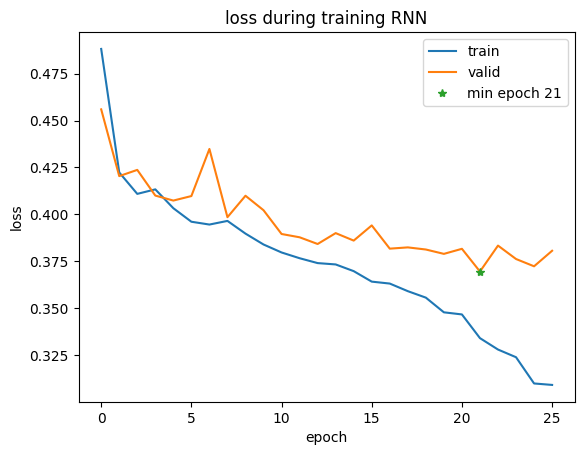

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.847  &  0.713  &          0.650  &     0.492  &0.934  &0.560 &0.836 &   0.476 &   0.611

Epoch:26, [Train] Loss: 0.287
Epoch:26, [Valid] Loss: 0.366
	SAVE MODEL: loss: 0.370 -> 0.366 | runtime: 1.167 ms
Epoch:27, [Train] Loss: 0.274
Epoch:27, [Valid] Loss: 0.380
EarlyStopping counter: 1 out of 20
Epoch:28, [Train] Loss: 0.265
Epoch:28, [Valid] Loss: 0.389
EarlyStopping counter: 2 out of 20
Epoch:29, [Train] Loss: 0.263
Epoch:29, [Valid] Loss: 0.429
EarlyStopping counter: 3 out of 20
Epoch:30, [Train] Loss: 0.238
Epoch:30, [Valid] Loss: 0.396
EarlyStopping counter: 4 out of 20
Train time: 1.160+/-0.016 ms


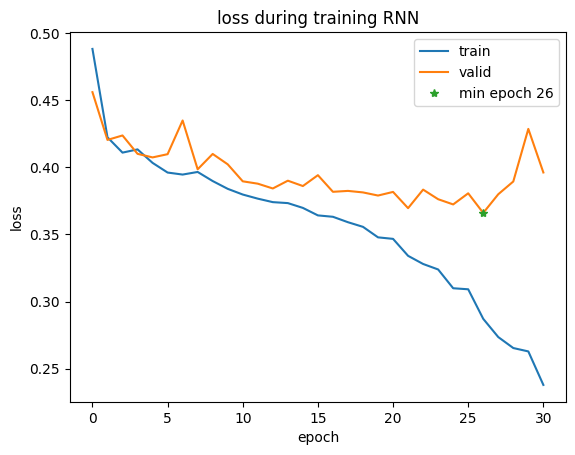

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.848  &  0.668  &          0.733  &     0.369  &0.967  &0.491 &0.816 &   0.447 &   0.608

Epoch:31, [Train] Loss: 0.213
Epoch:31, [Valid] Loss: 0.451
EarlyStopping counter: 5 out of 20
Epoch:32, [Train] Loss: 0.188
Epoch:32, [Valid] Loss: 0.472
EarlyStopping counter: 6 out of 20
Epoch:33, [Train] Loss: 0.175
Epoch:33, [Valid] Loss: 0.450
EarlyStopping counter: 7 out of 20
Epoch:34, [Train] Loss: 0.166
Epoch:34, [Valid] Loss: 0.472
EarlyStopping counter: 8 out of 20
Epoch:35, [Train] Loss: 0.136
Epoch:35, [Valid] Loss: 0.571
EarlyStopping counter: 9 out of 20
Train time: 1.160+/-0.015 ms


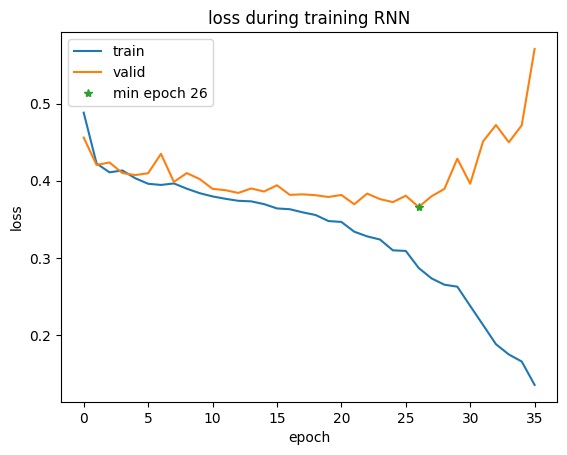

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.820  &  0.710  &          0.548  &     0.527  &0.893  &0.537 &0.800 &   0.426 &   0.576

Epoch:36, [Train] Loss: 0.127
Epoch:36, [Valid] Loss: 0.566
EarlyStopping counter: 10 out of 20
Epoch:37, [Train] Loss: 0.113
Epoch:37, [Valid] Loss: 0.585
EarlyStopping counter: 11 out of 20
Epoch:38, [Train] Loss: 0.101
Epoch:38, [Valid] Loss: 0.661
EarlyStopping counter: 12 out of 20
Epoch:39, [Train] Loss: 0.075
Epoch:39, [Valid] Loss: 0.700
EarlyStopping counter: 13 out of 20
Epoch:40, [Train] Loss: 0.073
Epoch:40, [Valid] Loss: 0.692
EarlyStopping counter: 14 out of 20
Train time: 1.159+/-0.014 ms


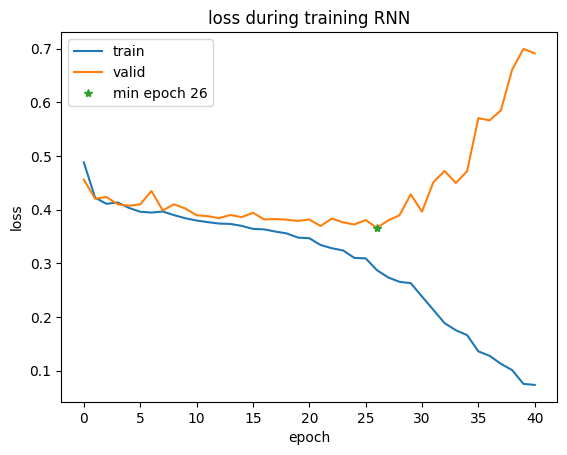

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.840  &  0.721  &          0.613  &     0.523  &0.918  &0.564 &0.819 &   0.469 &   0.601

Epoch:41, [Train] Loss: 0.074
Epoch:41, [Valid] Loss: 0.665
EarlyStopping counter: 15 out of 20
Epoch:42, [Train] Loss: 0.058
Epoch:42, [Valid] Loss: 0.714
EarlyStopping counter: 16 out of 20
Epoch:43, [Train] Loss: 0.060
Epoch:43, [Valid] Loss: 0.737
EarlyStopping counter: 17 out of 20
Epoch:44, [Train] Loss: 0.048
Epoch:44, [Valid] Loss: 0.787
EarlyStopping counter: 18 out of 20
Epoch:45, [Train] Loss: 0.036
Epoch:45, [Valid] Loss: 0.851
EarlyStopping counter: 19 out of 20
Train time: 1.159+/-0.014 ms


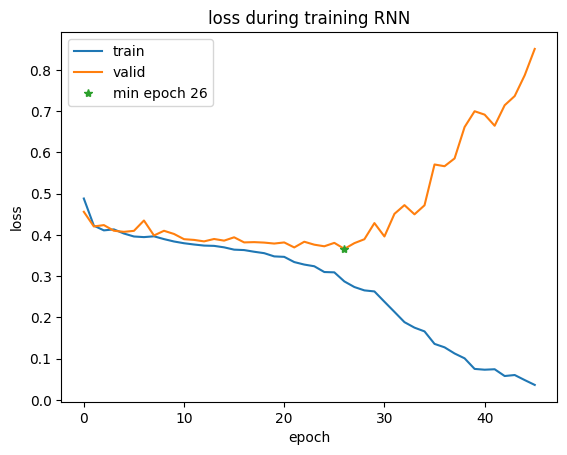

*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.834  &  0.705  &          0.598  &     0.492  &0.918  &0.540 &0.810 &   0.443 &   0.601

Epoch:46, [Train] Loss: 0.037
Epoch:46, [Valid] Loss: 0.844
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2990730
Train time: 1.159+/-0.014 ms
best epoch: 26, min loss: 0.3660


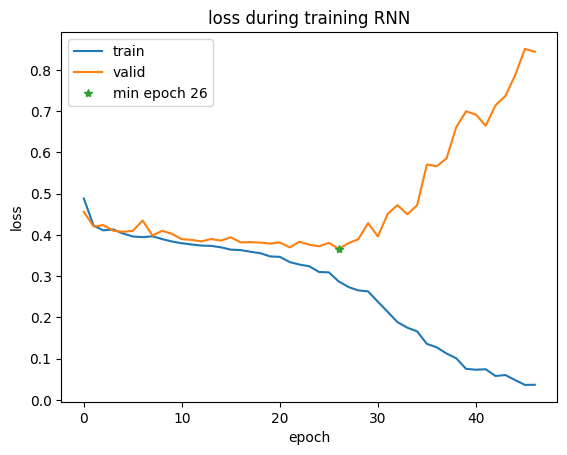

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '%10', '%11', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'As', 'B', 'Br', 'C', 'Ca', 'Cl', 'Cr', 'Cu', 'F', 'Fe', 'H', 'Hg', 'I', 'K', 'Li', 'M', 'N', 'Na', 'Ni', 'O', 'P', 'Pt', 'Ru', 'S', 'Sb', 'Se', 'Si', 'W', 'Z', '[', '\\', ']', 'c', 'e', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['CYP2D6_Veith']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...
Done!


[Test] Loss: 0.384
*************** CYP2D6_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.854  &  0.694  &          0.660  &     0.439  &0.949  &0.527 &0.809 &   0.458 &   0.582

collect data for:  ['CYP3A4_Veith']
train: 8629 | valid: 1233 | test: 2466 | total: 12328
Alphabet: None



---> loader for ['CYP3A4_Veith']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 60




Model type:  RNN | Model parameters:  2989073
Epoch:0, [Train] Loss: 0.660
Epoch:0, [Valid] Loss: 0.642
	SAVE MODEL: loss: inf -> 0.642 | runtime: 1.102 ms
Epoch:1, [Train] Loss: 0.596
Epoch:1, [Valid] Loss: 0.617
	SAVE MODEL: loss: 0.642 -> 0.617 | runtime: 1.104 ms
Epoch:2, [Train] Loss: 0.557
Epoch:2, [Valid] Loss: 0.594
	SAVE MODEL: loss: 0.617 -> 0.594 | runtime: 1.141 ms
Epoch:3, [Train]

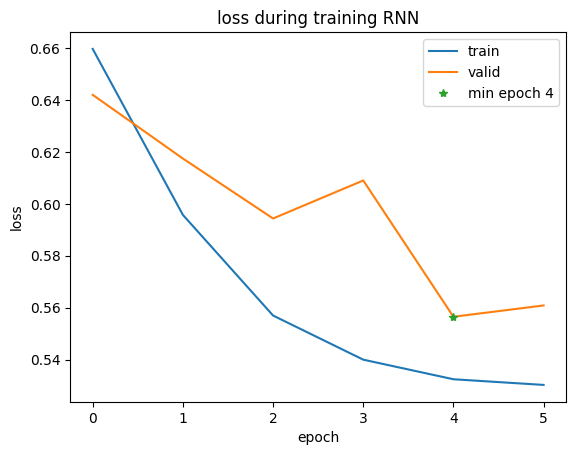

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.682  &  0.703  &          0.584  &     0.833  &0.573  &0.687 &0.778 &   0.409 &   0.672

Epoch:6, [Train] Loss: 0.521
Epoch:6, [Valid] Loss: 0.548
	SAVE MODEL: loss: 0.556 -> 0.548 | runtime: 1.094 ms
Epoch:7, [Train] Loss: 0.522
Epoch:7, [Valid] Loss: 0.584
EarlyStopping counter: 1 out of 20
Epoch:8, [Train] Loss: 0.516
Epoch:8, [Valid] Loss: 0.549
EarlyStopping counter: 2 out of 20
Epoch:9, [Train] Loss: 0.515
Epoch:9, [Valid] Loss: 0.553
EarlyStopping counter: 3 out of 20
Epoch:10, [Train] Loss: 0.505
Epoch:10, [Valid] Loss: 0.535
	SAVE MODEL: loss: 0.548 -> 0.535 | runtime: 1.112 ms
Train time: 1.114+/-0.013 ms


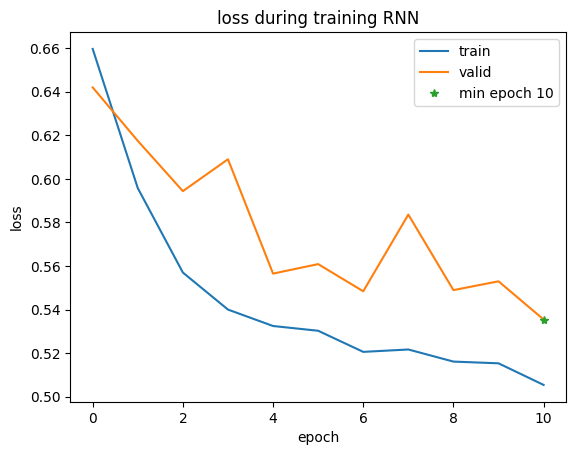

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.713  &  0.707  &          0.653  &     0.669  &0.745  &0.661 &0.796 &   0.412 &   0.711

Epoch:11, [Train] Loss: 0.498
Epoch:11, [Valid] Loss: 0.529
	SAVE MODEL: loss: 0.535 -> 0.529 | runtime: 1.098 ms
Epoch:12, [Train] Loss: 0.500
Epoch:12, [Valid] Loss: 0.534
EarlyStopping counter: 1 out of 20
Epoch:13, [Train] Loss: 0.490
Epoch:13, [Valid] Loss: 0.541
EarlyStopping counter: 2 out of 20
Epoch:14, [Train] Loss: 0.483
Epoch:14, [Valid] Loss: 0.529
EarlyStopping counter: 3 out of 20
Epoch:15, [Train] Loss: 0.488
Epoch:15, [Valid] Loss: 0.534
EarlyStopping counter: 4 out of 20
Train time: 1.110+/-0.014 ms


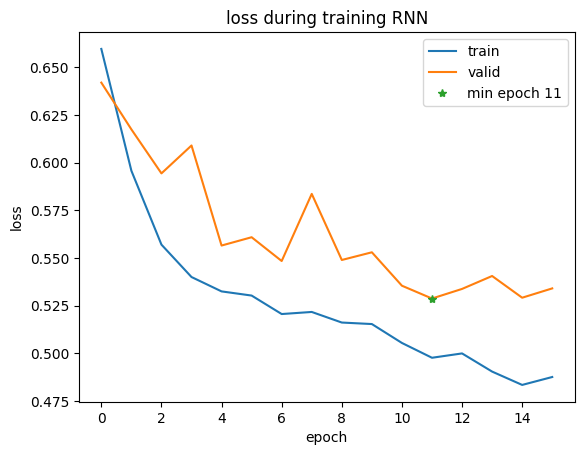

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.710  &  0.712  &          0.636  &     0.721  &0.703  &0.676 &0.800 &   0.419 &   0.722

Epoch:16, [Train] Loss: 0.478
Epoch:16, [Valid] Loss: 0.550
EarlyStopping counter: 5 out of 20
Epoch:17, [Train] Loss: 0.471
Epoch:17, [Valid] Loss: 0.523
	SAVE MODEL: loss: 0.529 -> 0.523 | runtime: 1.122 ms
Epoch:18, [Train] Loss: 0.469
Epoch:18, [Valid] Loss: 0.506
	SAVE MODEL: loss: 0.523 -> 0.506 | runtime: 1.108 ms
Epoch:19, [Train] Loss: 0.462
Epoch:19, [Valid] Loss: 0.562
EarlyStopping counter: 1 out of 20
Epoch:20, [Train] Loss: 0.458
Epoch:20, [Valid] Loss: 0.516
EarlyStopping counter: 2 out of 20
Train time: 1.110+/-0.014 ms


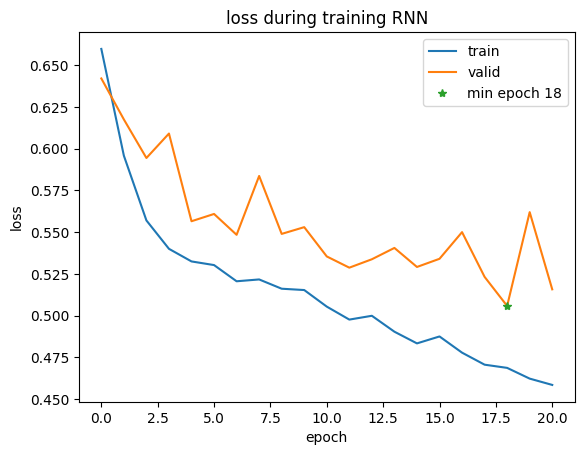

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.720  &  0.721  &          0.648  &     0.727  &0.715  &0.685 &0.814 &   0.437 &   0.753

Epoch:21, [Train] Loss: 0.443
Epoch:21, [Valid] Loss: 0.493
	SAVE MODEL: loss: 0.506 -> 0.493 | runtime: 1.089 ms
Epoch:22, [Train] Loss: 0.434
Epoch:22, [Valid] Loss: 0.515
EarlyStopping counter: 1 out of 20
Epoch:23, [Train] Loss: 0.429
Epoch:23, [Valid] Loss: 0.497
EarlyStopping counter: 2 out of 20
Epoch:24, [Train] Loss: 0.424
Epoch:24, [Valid] Loss: 0.496
EarlyStopping counter: 3 out of 20
Epoch:25, [Train] Loss: 0.414
Epoch:25, [Valid] Loss: 0.502
EarlyStopping counter: 4 out of 20
Train time: 1.108+/-0.015 ms


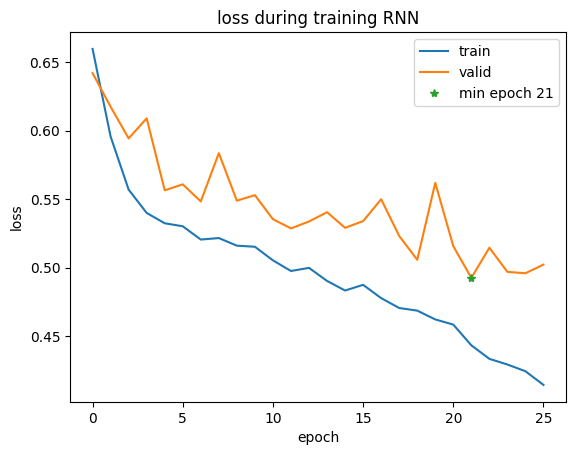

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.755  &  0.739  &          0.740  &     0.640  &0.838  &0.686 &0.833 &   0.490 &   0.779

Epoch:26, [Train] Loss: 0.407
Epoch:26, [Valid] Loss: 0.516
EarlyStopping counter: 5 out of 20
Epoch:27, [Train] Loss: 0.393
Epoch:27, [Valid] Loss: 0.514
EarlyStopping counter: 6 out of 20
Epoch:28, [Train] Loss: 0.376
Epoch:28, [Valid] Loss: 0.516
EarlyStopping counter: 7 out of 20
Epoch:29, [Train] Loss: 0.371
Epoch:29, [Valid] Loss: 0.513
EarlyStopping counter: 8 out of 20
Epoch:30, [Train] Loss: 0.340
Epoch:30, [Valid] Loss: 0.506
EarlyStopping counter: 9 out of 20
Train time: 1.109+/-0.014 ms


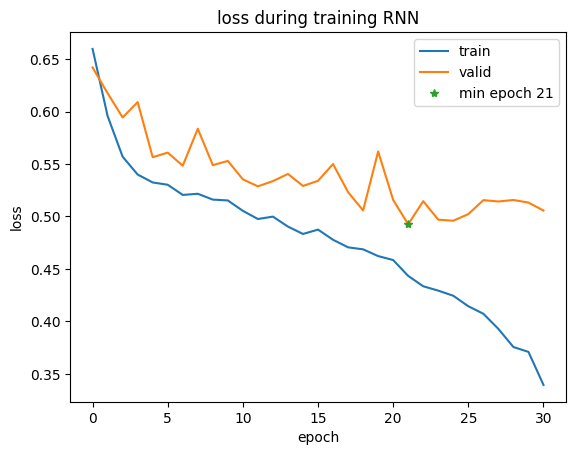

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.757  &  0.748  &          0.714  &     0.698  &0.799  &0.706 &0.836 &   0.499 &   0.783

Epoch:31, [Train] Loss: 0.326
Epoch:31, [Valid] Loss: 0.516
EarlyStopping counter: 10 out of 20
Epoch:32, [Train] Loss: 0.313
Epoch:32, [Valid] Loss: 0.570
EarlyStopping counter: 11 out of 20
Epoch:33, [Train] Loss: 0.294
Epoch:33, [Valid] Loss: 0.556
EarlyStopping counter: 12 out of 20
Epoch:34, [Train] Loss: 0.269
Epoch:34, [Valid] Loss: 0.554
EarlyStopping counter: 13 out of 20
Epoch:35, [Train] Loss: 0.251
Epoch:35, [Valid] Loss: 0.626
EarlyStopping counter: 14 out of 20
Train time: 1.110+/-0.014 ms


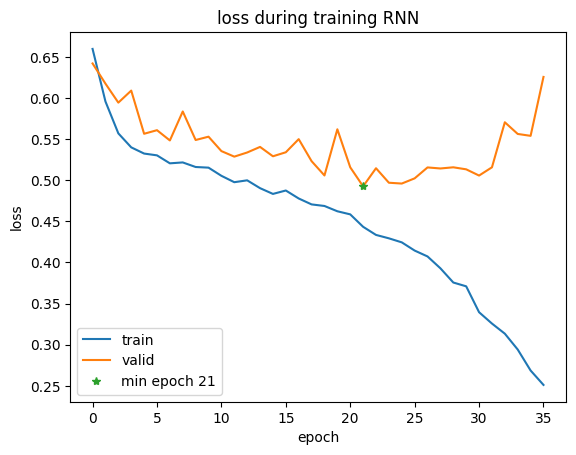

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.768  &  0.761  &          0.725  &     0.719  &0.803  &0.722 &0.838 &   0.523 &   0.780

Epoch:36, [Train] Loss: 0.231
Epoch:36, [Valid] Loss: 0.614
EarlyStopping counter: 15 out of 20
Epoch:37, [Train] Loss: 0.200
Epoch:37, [Valid] Loss: 0.704
EarlyStopping counter: 16 out of 20
Epoch:38, [Train] Loss: 0.172
Epoch:38, [Valid] Loss: 0.684
EarlyStopping counter: 17 out of 20
Epoch:39, [Train] Loss: 0.173
Epoch:39, [Valid] Loss: 0.738
EarlyStopping counter: 18 out of 20
Epoch:40, [Train] Loss: 0.147
Epoch:40, [Valid] Loss: 0.878
EarlyStopping counter: 19 out of 20
Train time: 1.111+/-0.013 ms


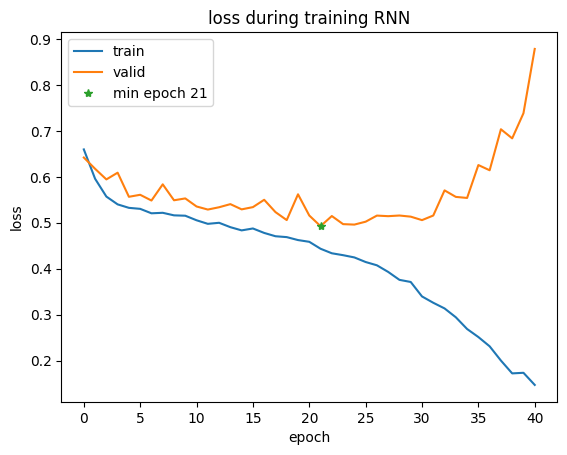

*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.751  &  0.733  &          0.740  &     0.624  &0.842  &0.677 &0.815 &   0.482 &   0.764

Epoch:41, [Train] Loss: 0.139
Epoch:41, [Valid] Loss: 0.899
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2989073
Train time: 1.111+/-0.013 ms
best epoch: 21, min loss: 0.4926


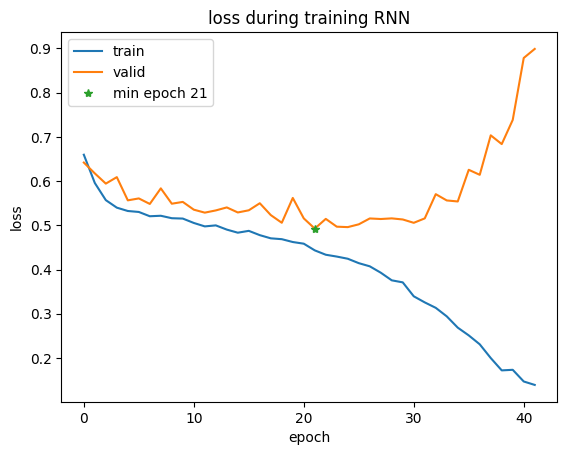

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '%10', '%11', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'As', 'B', 'Br', 'C', 'Ca', 'Cl', 'Cr', 'Cu', 'F', 'Fe', 'H', 'Hg', 'I', 'K', 'Li', 'M', 'N', 'Na', 'Ni', 'O', 'P', 'Pt', 'Ru', 'S', 'Sb', 'Se', 'Si', 'W', 'Z', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['CYP3A4_Veith']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...
Done!


[Test] Loss: 0.495
*************** CYP3A4_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.751  &  0.732  &          0.735  &     0.620  &0.843  &0.673 &0.833 &   0.479 &   0.771

collect data for:  ['CYP1A2_Veith']
train: 8805 | valid: 1258 | test: 2516 | total: 12579
Alphabet: None



---> loader for ['CYP1A2_Veith']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 60




Model type:  RNN | Model parameters:  2989073
Epoch:0, [Train] Loss: 0.566
Epoch:0, [Valid] Loss: 0.504
	SAVE MODEL: loss: inf -> 0.504 | runtime: 1.127 ms
Epoch:1, [Train] Loss: 0.513
Epoch:1, [Valid] Loss: 0.497
	SAVE MODEL: loss: 0.504 -> 0.497 | runtime: 1.109 ms
Epoch:2, [Train] Loss: 0.502
Epoch:2, [Valid] Loss: 0.513
EarlyStopping counter: 1 out of 20
Epoch:3, [Train] Loss: 0.486
Epoch:

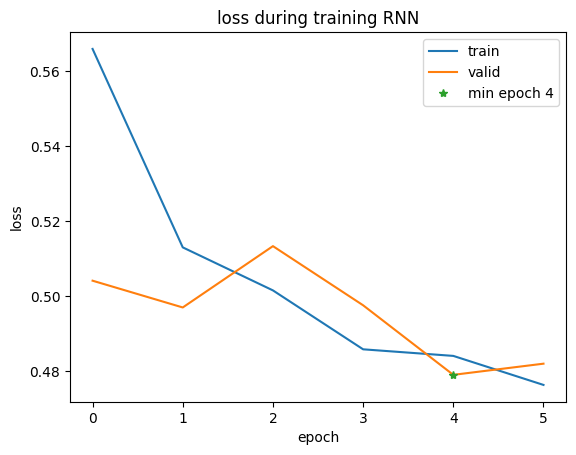

*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.762  &  0.754  &          0.792  &     0.656  &0.852  &0.718 &0.855 &   0.521 &   0.827

Epoch:6, [Train] Loss: 0.476
Epoch:6, [Valid] Loss: 0.476
	SAVE MODEL: loss: 0.479 -> 0.476 | runtime: 1.141 ms
Epoch:7, [Train] Loss: 0.470
Epoch:7, [Valid] Loss: 0.468
	SAVE MODEL: loss: 0.476 -> 0.468 | runtime: 1.121 ms
Epoch:8, [Train] Loss: 0.459
Epoch:8, [Valid] Loss: 0.496
EarlyStopping counter: 1 out of 20
Epoch:9, [Train] Loss: 0.456
Epoch:9, [Valid] Loss: 0.450
	SAVE MODEL: loss: 0.468 -> 0.450 | runtime: 1.134 ms
Epoch:10, [Train] Loss: 0.436
Epoch:10, [Valid] Loss: 0.447
	SAVE MODEL: loss: 0.450 -> 0.447 | runtime: 1.115 ms
Train time: 1.127+/-0.011 ms


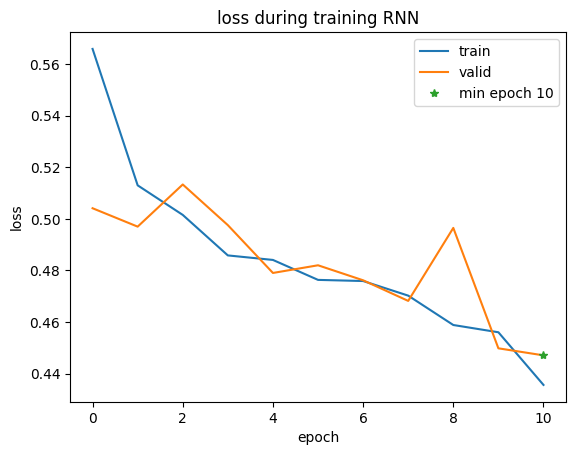

*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.788  &  0.783  &          0.797  &     0.725  &0.842  &0.759 &0.874 &   0.572 &   0.844

Epoch:11, [Train] Loss: 0.431
Epoch:11, [Valid] Loss: 0.437
	SAVE MODEL: loss: 0.447 -> 0.437 | runtime: 1.101 ms
Epoch:12, [Train] Loss: 0.418
Epoch:12, [Valid] Loss: 0.454
EarlyStopping counter: 1 out of 20
Epoch:13, [Train] Loss: 0.412
Epoch:13, [Valid] Loss: 0.436
	SAVE MODEL: loss: 0.437 -> 0.436 | runtime: 1.138 ms
Epoch:14, [Train] Loss: 0.401
Epoch:14, [Valid] Loss: 0.429
	SAVE MODEL: loss: 0.436 -> 0.429 | runtime: 1.119 ms
Epoch:15, [Train] Loss: 0.398
Epoch:15, [Valid] Loss: 0.416
	SAVE MODEL: loss: 0.429 -> 0.416 | runtime: 1.154 ms
Train time: 1.126+/-0.015 ms


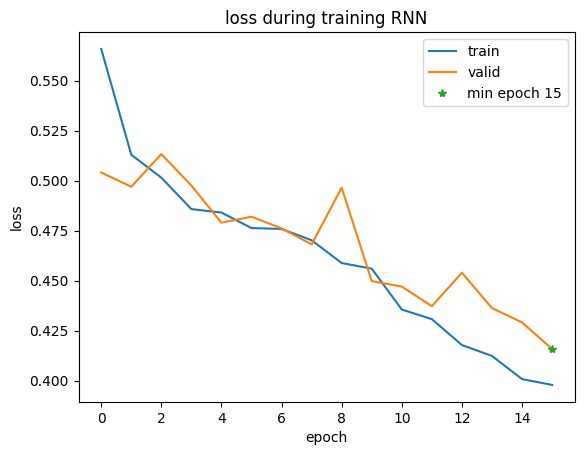

*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.805  &  0.805  &          0.784  &     0.799  &0.811  &0.791 &0.892 &   0.609 &   0.873

Epoch:16, [Train] Loss: 0.397
Epoch:16, [Valid] Loss: 0.412
	SAVE MODEL: loss: 0.416 -> 0.412 | runtime: 1.136 ms
Epoch:17, [Train] Loss: 0.380
Epoch:17, [Valid] Loss: 0.426
EarlyStopping counter: 1 out of 20
Epoch:18, [Train] Loss: 0.367
Epoch:18, [Valid] Loss: 0.410
	SAVE MODEL: loss: 0.412 -> 0.410 | runtime: 1.141 ms
Epoch:19, [Train] Loss: 0.357
Epoch:19, [Valid] Loss: 0.417
EarlyStopping counter: 1 out of 20
Epoch:20, [Train] Loss: 0.361
Epoch:20, [Valid] Loss: 0.415
EarlyStopping counter: 2 out of 20
Train time: 1.128+/-0.014 ms


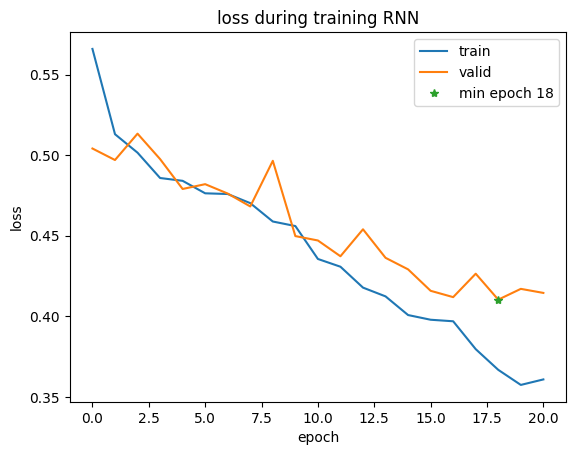

*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.816  &  0.818  &          0.773  &     0.850  &0.786  &0.810 &0.896 &   0.634 &   0.877

Epoch:21, [Train] Loss: 0.348
Epoch:21, [Valid] Loss: 0.414
EarlyStopping counter: 3 out of 20
Epoch:22, [Train] Loss: 0.333
Epoch:22, [Valid] Loss: 0.417
EarlyStopping counter: 4 out of 20
Epoch:23, [Train] Loss: 0.326
Epoch:23, [Valid] Loss: 0.437
EarlyStopping counter: 5 out of 20
Epoch:24, [Train] Loss: 0.304
Epoch:24, [Valid] Loss: 0.424
EarlyStopping counter: 6 out of 20
Epoch:25, [Train] Loss: 0.289
Epoch:25, [Valid] Loss: 0.451
EarlyStopping counter: 7 out of 20
Train time: 1.130+/-0.013 ms


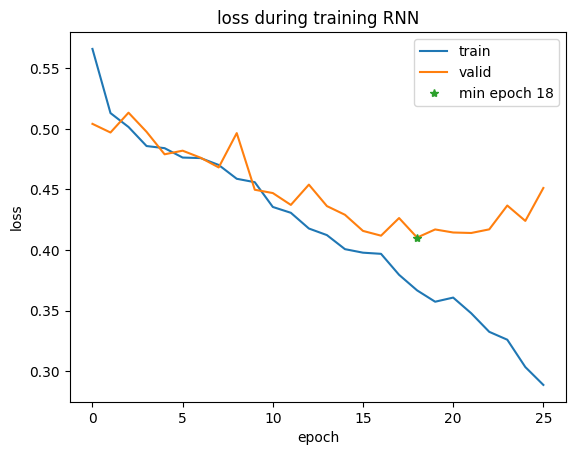

*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.831  &  0.827  &          0.854  &     0.766  &0.888  &0.808 &0.901 &   0.662 &   0.885

Epoch:26, [Train] Loss: 0.272
Epoch:26, [Valid] Loss: 0.451
EarlyStopping counter: 8 out of 20
Epoch:27, [Train] Loss: 0.258
Epoch:27, [Valid] Loss: 0.471
EarlyStopping counter: 9 out of 20
Epoch:28, [Train] Loss: 0.238
Epoch:28, [Valid] Loss: 0.469
EarlyStopping counter: 10 out of 20
Epoch:29, [Train] Loss: 0.229
Epoch:29, [Valid] Loss: 0.480
EarlyStopping counter: 11 out of 20
Epoch:30, [Train] Loss: 0.213
Epoch:30, [Valid] Loss: 0.507
EarlyStopping counter: 12 out of 20
Train time: 1.129+/-0.013 ms


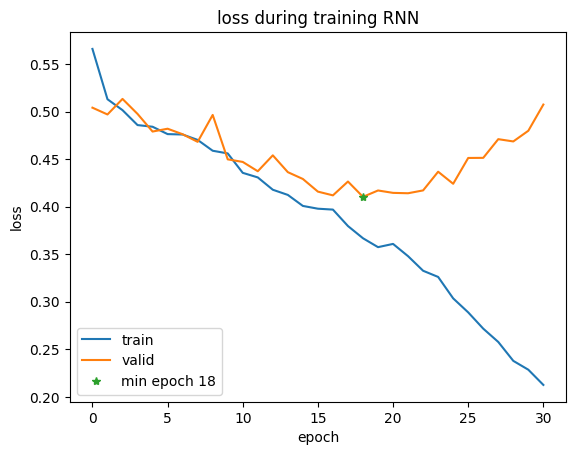

*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.820  &  0.821  &          0.789  &     0.835  &0.808  &0.811 &0.899 &   0.641 &   0.883

Epoch:31, [Train] Loss: 0.186
Epoch:31, [Valid] Loss: 0.524
EarlyStopping counter: 13 out of 20
Epoch:32, [Train] Loss: 0.161
Epoch:32, [Valid] Loss: 0.579
EarlyStopping counter: 14 out of 20
Epoch:33, [Train] Loss: 0.140
Epoch:33, [Valid] Loss: 0.593
EarlyStopping counter: 15 out of 20
Epoch:34, [Train] Loss: 0.130
Epoch:34, [Valid] Loss: 0.650
EarlyStopping counter: 16 out of 20
Epoch:35, [Train] Loss: 0.096
Epoch:35, [Valid] Loss: 0.767
EarlyStopping counter: 17 out of 20
Train time: 1.129+/-0.012 ms


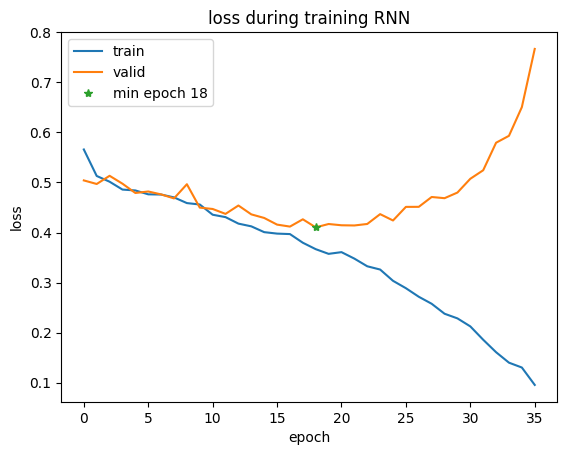

*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.841  &  0.839  &          0.837  &     0.814  &0.864  &0.825 &0.897 &   0.680 &   0.885

Epoch:36, [Train] Loss: 0.091
Epoch:36, [Valid] Loss: 0.642
EarlyStopping counter: 18 out of 20
Epoch:37, [Train] Loss: 0.078
Epoch:37, [Valid] Loss: 0.669
EarlyStopping counter: 19 out of 20
Epoch:38, [Train] Loss: 0.088
Epoch:38, [Valid] Loss: 0.707
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2989073
Train time: 1.128+/-0.012 ms
best epoch: 18, min loss: 0.4104


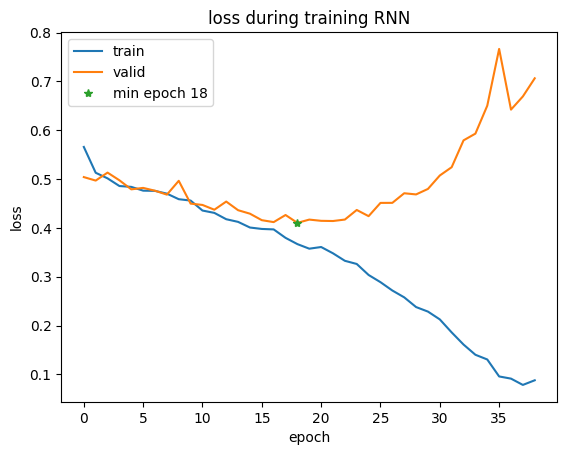

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '%10', '%11', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'As', 'B', 'Br', 'C', 'Ca', 'Cl', 'Cr', 'Cu', 'F', 'Fe', 'H', 'Hg', 'I', 'K', 'Li', 'M', 'N', 'Na', 'Ni', 'O', 'P', 'Pt', 'S', 'Sb', 'Se', 'Si', 'W', 'Z', '[', '\\', ']', 'c', 'e', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['CYP1A2_Veith']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...
Done!


[Test] Loss: 0.398
*************** CYP1A2_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.818  &  0.821  &          0.775  &     0.866  &0.776  &0.818 &0.905 &   0.642 &   0.894

collect data for:  ['CYP2C9_Veith']
train: 8465 | valid: 1209 | test: 2418 | total: 12092
Alphabet: None



---> loader for ['CYP2C9_Veith']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 59




Model type:  RNN | Model parameters:  2987418
Epoch:0, [Train] Loss: 0.624
Epoch:0, [Valid] Loss: 0.620
	SAVE MODEL: loss: inf -> 0.620 | runtime: 1.069 ms
Epoch:1, [Train] Loss: 0.562
Epoch:1, [Valid] Loss: 0.543
	SAVE MODEL: loss: 0.620 -> 0.543 | runtime: 1.082 ms
Epoch:2, [Train] Loss: 0.513
Epoch:2, [Valid] Loss: 0.524
	SAVE MODEL: loss: 0.543 -> 0.524 | runtime: 1.108 ms
Epoch:3, [Train]

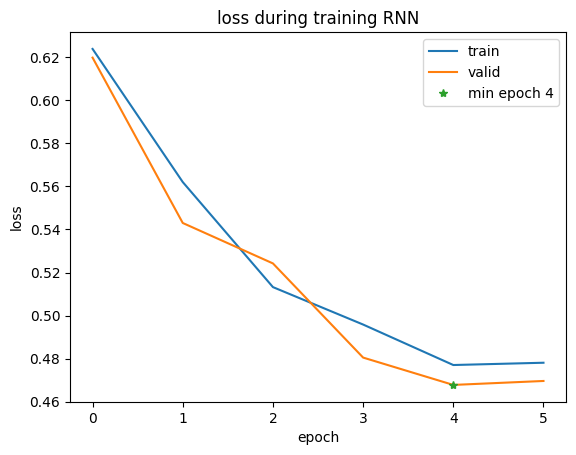

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.787  &  0.747  &          0.719  &     0.620  &0.874  &0.666 &0.840 &   0.514 &   0.720

Epoch:6, [Train] Loss: 0.468
Epoch:6, [Valid] Loss: 0.493
EarlyStopping counter: 2 out of 20
Epoch:7, [Train] Loss: 0.467
Epoch:7, [Valid] Loss: 0.464
	SAVE MODEL: loss: 0.468 -> 0.464 | runtime: 1.102 ms
Epoch:8, [Train] Loss: 0.459
Epoch:8, [Valid] Loss: 0.457
	SAVE MODEL: loss: 0.464 -> 0.457 | runtime: 1.072 ms
Epoch:9, [Train] Loss: 0.458
Epoch:9, [Valid] Loss: 0.460
EarlyStopping counter: 1 out of 20
Epoch:10, [Train] Loss: 0.454
Epoch:10, [Valid] Loss: 0.458
EarlyStopping counter: 2 out of 20
Train time: 1.089+/-0.017 ms


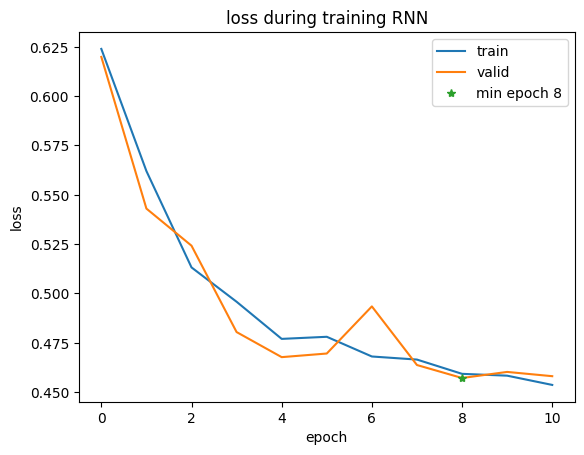

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.788  &  0.782  &          0.666  &     0.763  &0.802  &0.711 &0.852 &   0.548 &   0.736

Epoch:11, [Train] Loss: 0.441
Epoch:11, [Valid] Loss: 0.448
	SAVE MODEL: loss: 0.457 -> 0.448 | runtime: 1.124 ms
Epoch:12, [Train] Loss: 0.439
Epoch:12, [Valid] Loss: 0.448
EarlyStopping counter: 1 out of 20
Epoch:13, [Train] Loss: 0.456
Epoch:13, [Valid] Loss: 0.447
	SAVE MODEL: loss: 0.448 -> 0.447 | runtime: 1.125 ms
Epoch:14, [Train] Loss: 0.439
Epoch:14, [Valid] Loss: 0.459
EarlyStopping counter: 1 out of 20
Epoch:15, [Train] Loss: 0.429
Epoch:15, [Valid] Loss: 0.431
	SAVE MODEL: loss: 0.447 -> 0.431 | runtime: 1.099 ms
Train time: 1.096+/-0.019 ms


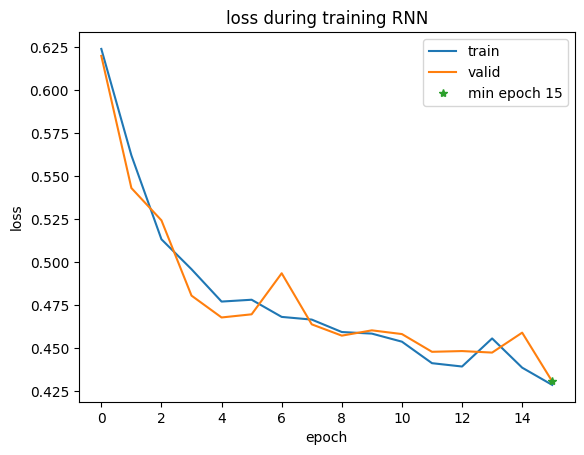

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.805  &  0.785  &          0.710  &     0.724  &0.847  &0.717 &0.866 &   0.568 &   0.758

Epoch:16, [Train] Loss: 0.417
Epoch:16, [Valid] Loss: 0.431
EarlyStopping counter: 1 out of 20
Epoch:17, [Train] Loss: 0.416
Epoch:17, [Valid] Loss: 0.449
EarlyStopping counter: 2 out of 20
Epoch:18, [Train] Loss: 0.410
Epoch:18, [Valid] Loss: 0.442
EarlyStopping counter: 3 out of 20
Epoch:19, [Train] Loss: 0.406
Epoch:19, [Valid] Loss: 0.430
	SAVE MODEL: loss: 0.431 -> 0.430 | runtime: 1.093 ms
Epoch:20, [Train] Loss: 0.397
Epoch:20, [Valid] Loss: 0.443
EarlyStopping counter: 1 out of 20
Train time: 1.097+/-0.017 ms


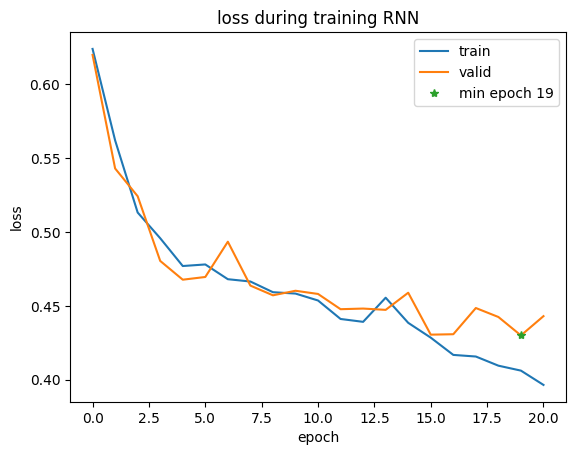

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.816  &  0.784  &          0.756  &     0.683  &0.886  &0.718 &0.868 &   0.584 &   0.764

Epoch:21, [Train] Loss: 0.388
Epoch:21, [Valid] Loss: 0.429
	SAVE MODEL: loss: 0.430 -> 0.429 | runtime: 1.076 ms
Epoch:22, [Train] Loss: 0.382
Epoch:22, [Valid] Loss: 0.425
	SAVE MODEL: loss: 0.429 -> 0.425 | runtime: 1.106 ms
Epoch:23, [Train] Loss: 0.376
Epoch:23, [Valid] Loss: 0.427
EarlyStopping counter: 1 out of 20
Epoch:24, [Train] Loss: 0.357
Epoch:24, [Valid] Loss: 0.427
EarlyStopping counter: 2 out of 20
Epoch:25, [Train] Loss: 0.352
Epoch:25, [Valid] Loss: 0.443
EarlyStopping counter: 3 out of 20
Train time: 1.097+/-0.017 ms


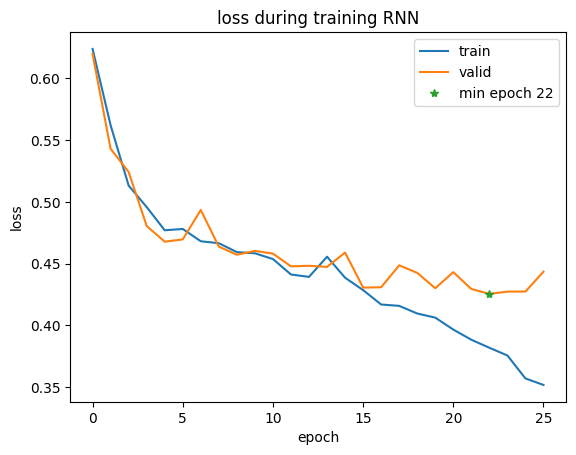

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.787  &  0.779  &          0.665  &     0.755  &0.803  &0.707 &0.864 &   0.543 &   0.746

Epoch:26, [Train] Loss: 0.350
Epoch:26, [Valid] Loss: 0.424
	SAVE MODEL: loss: 0.425 -> 0.424 | runtime: 1.094 ms
Epoch:27, [Train] Loss: 0.328
Epoch:27, [Valid] Loss: 0.435
EarlyStopping counter: 1 out of 20
Epoch:28, [Train] Loss: 0.315
Epoch:28, [Valid] Loss: 0.449
EarlyStopping counter: 2 out of 20
Epoch:29, [Train] Loss: 0.289
Epoch:29, [Valid] Loss: 0.472
EarlyStopping counter: 3 out of 20
Epoch:30, [Train] Loss: 0.283
Epoch:30, [Valid] Loss: 0.486
EarlyStopping counter: 4 out of 20
Train time: 1.096+/-0.016 ms


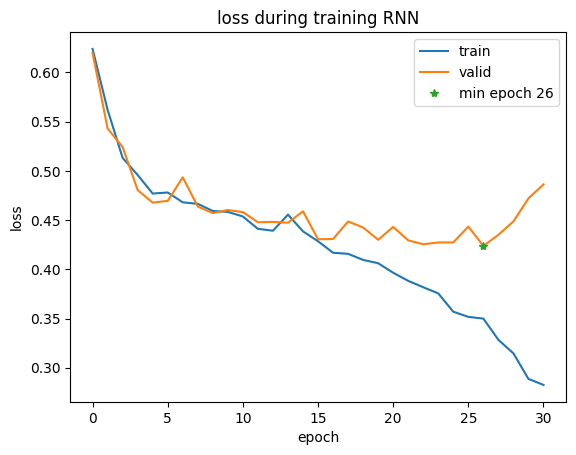

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.795  &  0.804  &          0.658  &     0.833  &0.775  &0.735 &0.875 &   0.582 &   0.754

Epoch:31, [Train] Loss: 0.265
Epoch:31, [Valid] Loss: 0.524
EarlyStopping counter: 5 out of 20
Epoch:32, [Train] Loss: 0.271
Epoch:32, [Valid] Loss: 0.482
EarlyStopping counter: 6 out of 20
Epoch:33, [Train] Loss: 0.241
Epoch:33, [Valid] Loss: 0.502
EarlyStopping counter: 7 out of 20
Epoch:34, [Train] Loss: 0.207
Epoch:34, [Valid] Loss: 0.528
EarlyStopping counter: 8 out of 20
Epoch:35, [Train] Loss: 0.213
Epoch:35, [Valid] Loss: 0.585
EarlyStopping counter: 9 out of 20
Train time: 1.096+/-0.016 ms


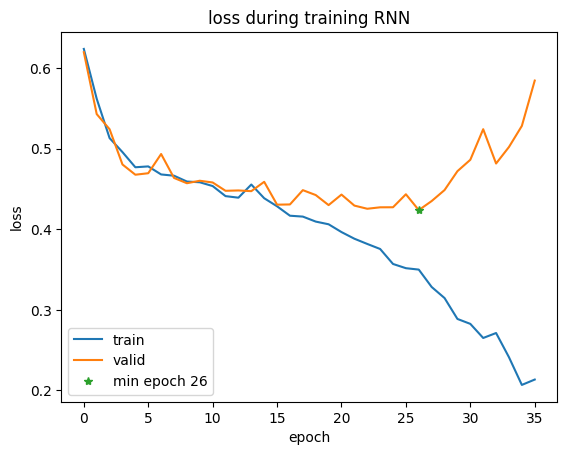

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.790  &  0.762  &          0.699  &     0.676  &0.849  &0.687 &0.858 &   0.529 &   0.742

Epoch:36, [Train] Loss: 0.179
Epoch:36, [Valid] Loss: 0.559
EarlyStopping counter: 10 out of 20
Epoch:37, [Train] Loss: 0.156
Epoch:37, [Valid] Loss: 0.612
EarlyStopping counter: 11 out of 20
Epoch:38, [Train] Loss: 0.134
Epoch:38, [Valid] Loss: 0.756
EarlyStopping counter: 12 out of 20
Epoch:39, [Train] Loss: 0.151
Epoch:39, [Valid] Loss: 0.673
EarlyStopping counter: 13 out of 20
Epoch:40, [Train] Loss: 0.118
Epoch:40, [Valid] Loss: 0.747
EarlyStopping counter: 14 out of 20
Train time: 1.098+/-0.016 ms


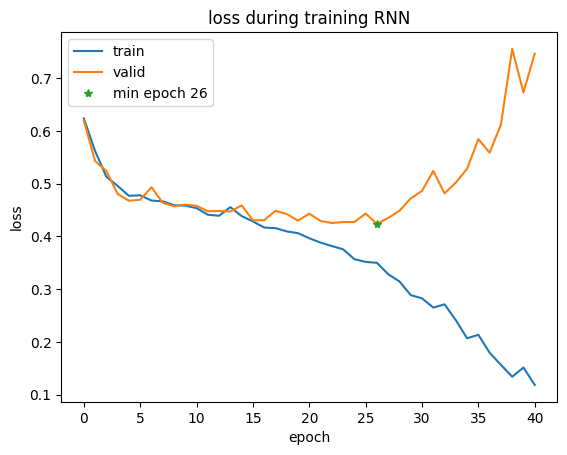

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.784  &  0.743  &          0.715  &     0.613  &0.873  &0.660 &0.848 &   0.506 &   0.740

Epoch:41, [Train] Loss: 0.106
Epoch:41, [Valid] Loss: 0.800
EarlyStopping counter: 15 out of 20
Epoch:42, [Train] Loss: 0.105
Epoch:42, [Valid] Loss: 0.768
EarlyStopping counter: 16 out of 20
Epoch:43, [Train] Loss: 0.087
Epoch:43, [Valid] Loss: 0.910
EarlyStopping counter: 17 out of 20
Epoch:44, [Train] Loss: 0.061
Epoch:44, [Valid] Loss: 0.976
EarlyStopping counter: 18 out of 20
Epoch:45, [Train] Loss: 0.078
Epoch:45, [Valid] Loss: 1.022
EarlyStopping counter: 19 out of 20
Train time: 1.097+/-0.016 ms


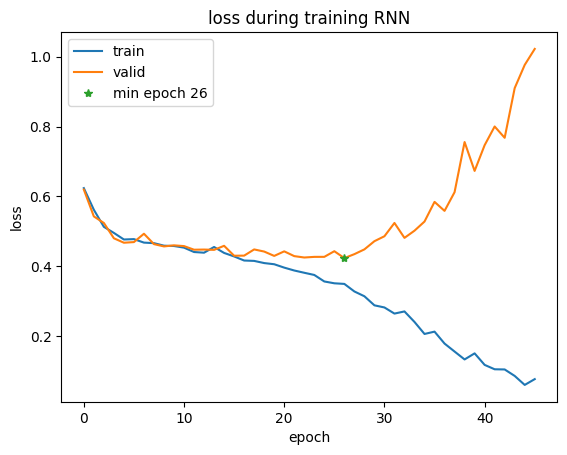

*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.791  &  0.740  &          0.750  &     0.581  &0.899  &0.655 &0.850 &   0.517 &   0.756

Epoch:46, [Train] Loss: 0.081
Epoch:46, [Valid] Loss: 0.934
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2987418
Train time: 1.097+/-0.016 ms
best epoch: 26, min loss: 0.4238


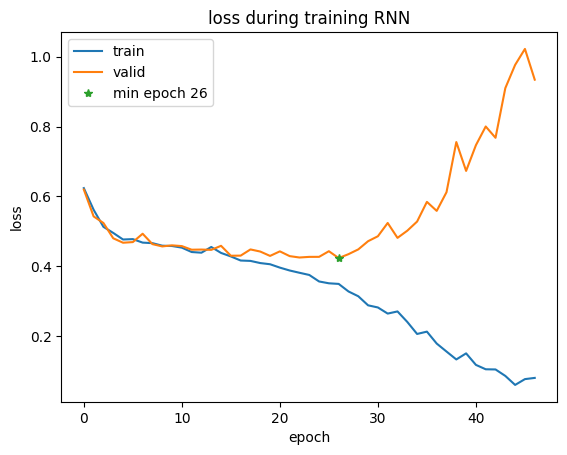

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '%10', '%11', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'As', 'B', 'Br', 'C', 'Ca', 'Cl', 'Cr', 'Cu', 'F', 'Fe', 'H', 'Hg', 'I', 'K', 'Li', 'M', 'N', 'Na', 'Ni', 'O', 'P', 'Pt', 'S', 'Sb', 'Se', 'Si', 'W', 'Z', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['CYP2C9_Veith']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...


[Test] Loss: 0.438
*************** CYP2C9_Veith ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.794  &  0.759  &          0.713  &     0.653  &0.866  &0.682 &0.863 &   0.531 &   0.741

collect data for:  ['BBB_Martins']


Done!


train: 1421 | valid: 203 | test: 406 | total: 2030
Alphabet: None



---> loader for ['BBB_Martins']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 41




Model type:  RNN | Model parameters:  2957970
Epoch:0, [Train] Loss: 0.595
Epoch:0, [Valid] Loss: 0.562
	SAVE MODEL: loss: inf -> 0.562 | runtime: 1.437 ms
Epoch:1, [Train] Loss: 0.545
Epoch:1, [Valid] Loss: 0.576
EarlyStopping counter: 1 out of 20
Epoch:2, [Train] Loss: 0.539
Epoch:2, [Valid] Loss: 0.560
	SAVE MODEL: loss: 0.562 -> 0.560 | runtime: 1.387 ms
Epoch:3, [Train] Loss: 0.532
Epoch:3, [Valid] Loss: 0.562
EarlyStopping counter: 1 out of 20
Epoch:4, [Train] Loss: 0.508
Epoch:4, [Valid] Loss: 0.700
EarlyStopping counter: 2 out of 20
Epoch:5, [Train] Loss: 0.573
Epoch:5, [Valid] Loss: 0.577
EarlyStopping counter: 3 out of 20
Train time: 1.430+/-0.029 ms


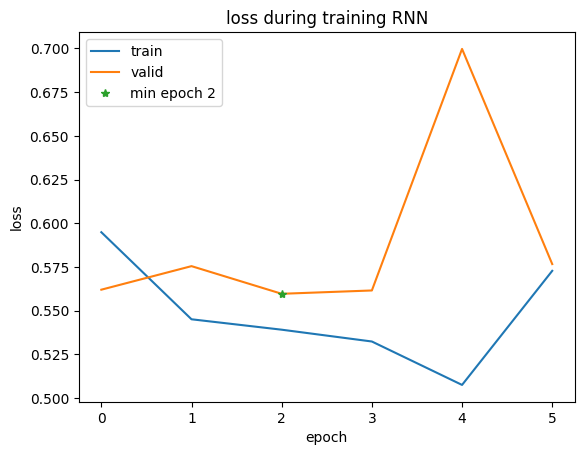

*************** BBB_Martins ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 152 51 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.749  &  0.500  &          0.749  &     1.000  &0.000  &0.856 &0.638 &  N/A &   0.795

Epoch:6, [Train] Loss: 0.536
Epoch:6, [Valid] Loss: 0.565
EarlyStopping counter: 4 out of 20
Epoch:7, [Train] Loss: 0.537
Epoch:7, [Valid] Loss: 0.573
EarlyStopping counter: 5 out of 20
Epoch:8, [Train] Loss: 0.534
Epoch:8, [Valid] Loss: 0.565
EarlyStopping counter: 6 out of 20
Epoch:9, [Train] Loss: 0.534
Epoch:9, [Valid] Loss: 0.557
	SAVE MODEL: loss: 0.560 -> 0.557 | runtime: 1.428 ms
Epoch:10, [Train] Loss: 0.536
Epoch:10, [Valid] Loss: 0.569
EarlyStopping counter: 1 out of 20
Train time: 1.432+/-0.029 ms


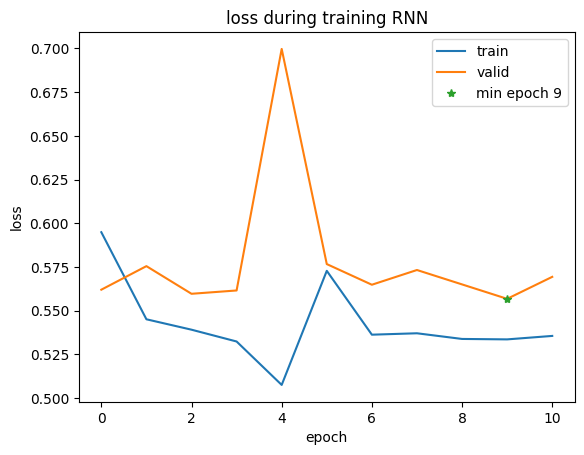

*************** BBB_Martins ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 152 51 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.749  &  0.500  &          0.749  &     1.000  &0.000  &0.856 &0.778 &  N/A &   0.887

Epoch:11, [Train] Loss: 0.536
Epoch:11, [Valid] Loss: 0.556
	SAVE MODEL: loss: 0.557 -> 0.556 | runtime: 1.427 ms
Epoch:12, [Train] Loss: 0.539
Epoch:12, [Valid] Loss: 0.561
EarlyStopping counter: 1 out of 20
Epoch:13, [Train] Loss: 0.530
Epoch:13, [Valid] Loss: 0.573
EarlyStopping counter: 2 out of 20
Epoch:14, [Train] Loss: 0.537
Epoch:14, [Valid] Loss: 0.546
	SAVE MODEL: loss: 0.556 -> 0.546 | runtime: 1.455 ms
Epoch:15, [Train] Loss: 0.529
Epoch:15, [Valid] Loss: 0.532
	SAVE MODEL: loss: 0.546 -> 0.532 | runtime: 1.372 ms
Train time: 1.429+/-0.031 ms


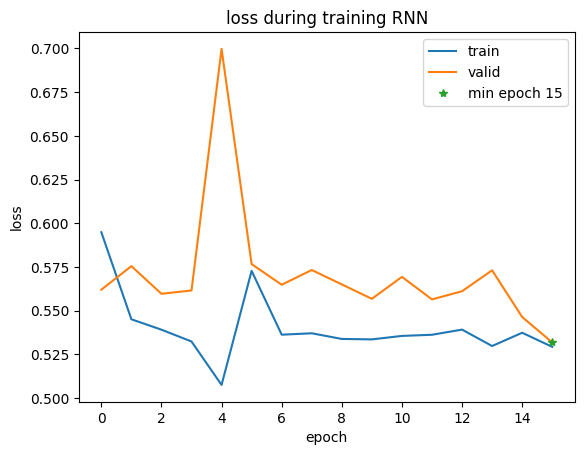

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.759  &  0.520  &          0.756  &     1.000  &0.039  &0.861 &0.818 &   0.172 &   0.921

Epoch:16, [Train] Loss: 0.487
Epoch:16, [Valid] Loss: 0.434
	SAVE MODEL: loss: 0.532 -> 0.434 | runtime: 1.433 ms
Epoch:17, [Train] Loss: 0.464
Epoch:17, [Valid] Loss: 0.450
EarlyStopping counter: 1 out of 20
Epoch:18, [Train] Loss: 0.444
Epoch:18, [Valid] Loss: 0.421
	SAVE MODEL: loss: 0.434 -> 0.421 | runtime: 1.409 ms
Epoch:19, [Train] Loss: 0.427
Epoch:19, [Valid] Loss: 0.405
	SAVE MODEL: loss: 0.421 -> 0.405 | runtime: 1.465 ms
Epoch:20, [Train] Loss: 0.416
Epoch:20, [Valid] Loss: 0.389
	SAVE MODEL: loss: 0.405 -> 0.389 | runtime: 1.454 ms
Train time: 1.430+/-0.029 ms


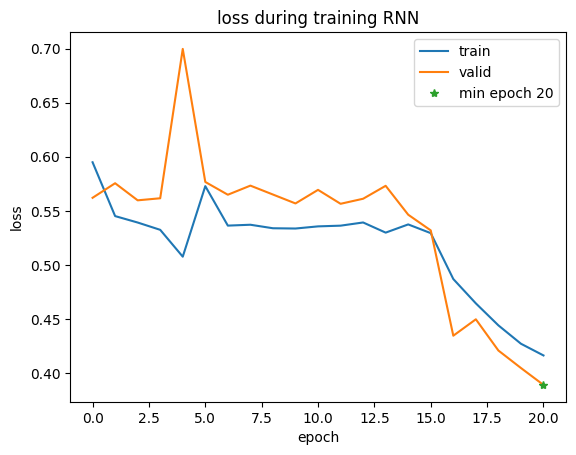

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.689  &          0.829  &     0.987  &0.392  &0.901 &0.885 &   0.529 &   0.950

Epoch:21, [Train] Loss: 0.404
Epoch:21, [Valid] Loss: 0.383
	SAVE MODEL: loss: 0.389 -> 0.383 | runtime: 1.386 ms
Epoch:22, [Train] Loss: 0.417
Epoch:22, [Valid] Loss: 0.474
EarlyStopping counter: 1 out of 20
Epoch:23, [Train] Loss: 0.436
Epoch:23, [Valid] Loss: 0.383
EarlyStopping counter: 2 out of 20
Epoch:24, [Train] Loss: 0.407
Epoch:24, [Valid] Loss: 0.376
	SAVE MODEL: loss: 0.383 -> 0.376 | runtime: 1.429 ms
Epoch:25, [Train] Loss: 0.395
Epoch:25, [Valid] Loss: 0.368
	SAVE MODEL: loss: 0.376 -> 0.368 | runtime: 1.425 ms
Train time: 1.428+/-0.027 ms


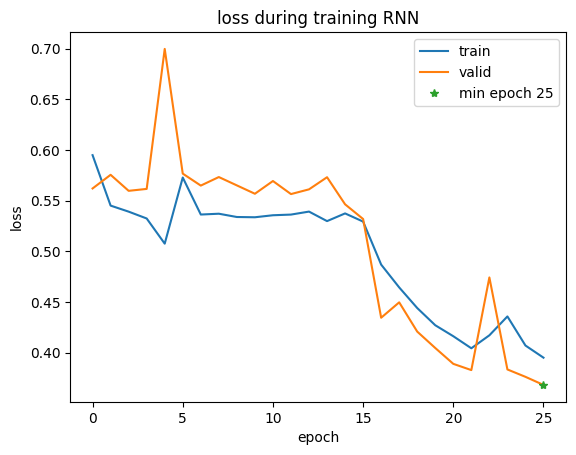

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.842  &  0.706  &          0.837  &     0.980  &0.431  &0.903 &0.892 &   0.543 &   0.955

Epoch:26, [Train] Loss: 0.380
Epoch:26, [Valid] Loss: 0.334
	SAVE MODEL: loss: 0.368 -> 0.334 | runtime: 1.370 ms
Epoch:27, [Train] Loss: 0.368
Epoch:27, [Valid] Loss: 0.370
EarlyStopping counter: 1 out of 20
Epoch:28, [Train] Loss: 0.380
Epoch:28, [Valid] Loss: 0.346
EarlyStopping counter: 2 out of 20
Epoch:29, [Train] Loss: 0.382
Epoch:29, [Valid] Loss: 0.338
EarlyStopping counter: 3 out of 20
Epoch:30, [Train] Loss: 0.364
Epoch:30, [Valid] Loss: 0.335
EarlyStopping counter: 4 out of 20
Train time: 1.426+/-0.028 ms


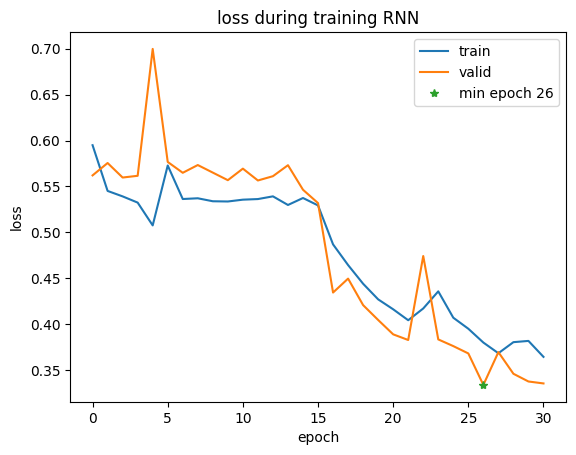

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.872  &  0.791  &          0.884  &     0.954  &0.627  &0.918 &0.896 &   0.640 &   0.957

Epoch:31, [Train] Loss: 0.376
Epoch:31, [Valid] Loss: 0.378
EarlyStopping counter: 5 out of 20
Epoch:32, [Train] Loss: 0.389
Epoch:32, [Valid] Loss: 0.342
EarlyStopping counter: 6 out of 20
Epoch:33, [Train] Loss: 0.364
Epoch:33, [Valid] Loss: 0.344
EarlyStopping counter: 7 out of 20
Epoch:34, [Train] Loss: 0.366
Epoch:34, [Valid] Loss: 0.338
EarlyStopping counter: 8 out of 20
Epoch:35, [Train] Loss: 0.354
Epoch:35, [Valid] Loss: 0.328
	SAVE MODEL: loss: 0.334 -> 0.328 | runtime: 1.497 ms
Train time: 1.425+/-0.032 ms


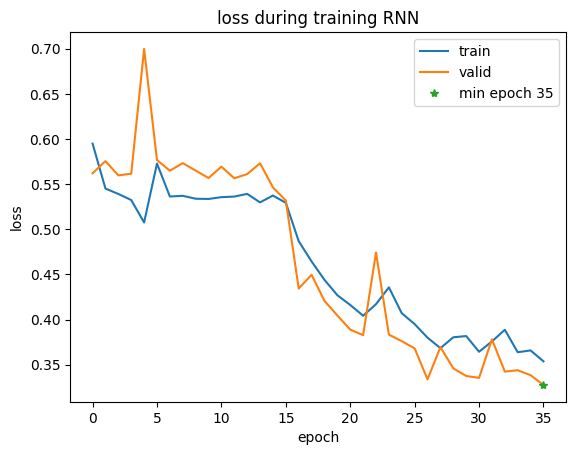

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.877  &  0.794  &          0.885  &     0.961  &0.627  &0.921 &0.890 &   0.654 &   0.953

Epoch:36, [Train] Loss: 0.357
Epoch:36, [Valid] Loss: 0.347
EarlyStopping counter: 1 out of 20
Epoch:37, [Train] Loss: 0.351
Epoch:37, [Valid] Loss: 0.363
EarlyStopping counter: 2 out of 20
Epoch:38, [Train] Loss: 0.355
Epoch:38, [Valid] Loss: 0.332
EarlyStopping counter: 3 out of 20
Epoch:39, [Train] Loss: 0.347
Epoch:39, [Valid] Loss: 0.347
EarlyStopping counter: 4 out of 20
Epoch:40, [Train] Loss: 0.346
Epoch:40, [Valid] Loss: 0.341
EarlyStopping counter: 5 out of 20
Train time: 1.422+/-0.036 ms


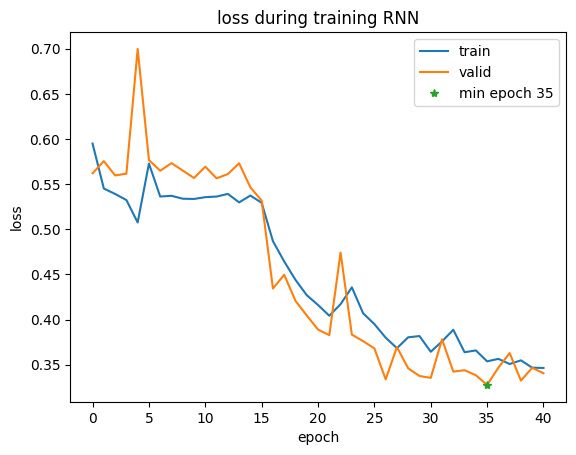

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.862  &  0.765  &          0.869  &     0.961  &0.569  &0.913 &0.890 &   0.608 &   0.952

Epoch:41, [Train] Loss: 0.340
Epoch:41, [Valid] Loss: 0.323
	SAVE MODEL: loss: 0.328 -> 0.323 | runtime: 1.448 ms
Epoch:42, [Train] Loss: 0.327
Epoch:42, [Valid] Loss: 0.352
EarlyStopping counter: 1 out of 20
Epoch:43, [Train] Loss: 0.328
Epoch:43, [Valid] Loss: 0.316
	SAVE MODEL: loss: 0.323 -> 0.316 | runtime: 1.447 ms
Epoch:44, [Train] Loss: 0.324
Epoch:44, [Valid] Loss: 0.354
EarlyStopping counter: 1 out of 20
Epoch:45, [Train] Loss: 0.349
Epoch:45, [Valid] Loss: 0.376
EarlyStopping counter: 2 out of 20
Train time: 1.424+/-0.035 ms


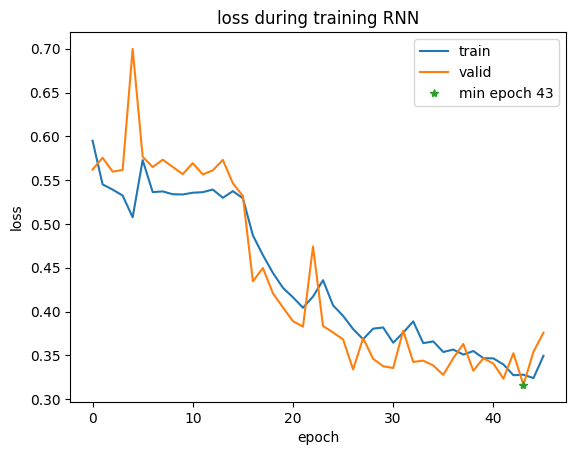

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.683  &          0.825  &     0.993  &0.373  &0.901 &0.892 &   0.533 &   0.951

Epoch:46, [Train] Loss: 0.342
Epoch:46, [Valid] Loss: 0.326
EarlyStopping counter: 3 out of 20
Epoch:47, [Train] Loss: 0.319
Epoch:47, [Valid] Loss: 0.368
EarlyStopping counter: 4 out of 20
Epoch:48, [Train] Loss: 0.329
Epoch:48, [Valid] Loss: 0.334
EarlyStopping counter: 5 out of 20
Epoch:49, [Train] Loss: 0.320
Epoch:49, [Valid] Loss: 0.312
	SAVE MODEL: loss: 0.316 -> 0.312 | runtime: 1.457 ms
Epoch:50, [Train] Loss: 0.317
Epoch:50, [Valid] Loss: 0.298
	SAVE MODEL: loss: 0.312 -> 0.298 | runtime: 1.367 ms
Train time: 1.424+/-0.035 ms


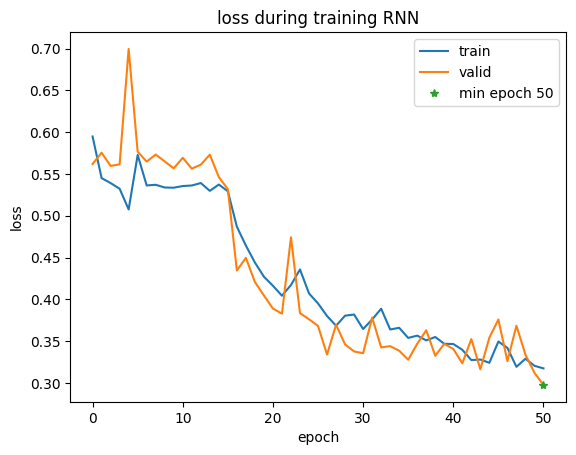

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.897  &  0.853  &          0.923  &     0.941  &0.765  &0.932 &0.895 &   0.720 &   0.942

Epoch:51, [Train] Loss: 0.306
Epoch:51, [Valid] Loss: 0.299
EarlyStopping counter: 1 out of 20
Epoch:52, [Train] Loss: 0.298
Epoch:52, [Valid] Loss: 0.290
	SAVE MODEL: loss: 0.298 -> 0.290 | runtime: 1.393 ms
Epoch:53, [Train] Loss: 0.298
Epoch:53, [Valid] Loss: 0.299
EarlyStopping counter: 1 out of 20
Epoch:54, [Train] Loss: 0.294
Epoch:54, [Valid] Loss: 0.313
EarlyStopping counter: 2 out of 20
Epoch:55, [Train] Loss: 0.288
Epoch:55, [Valid] Loss: 0.302
EarlyStopping counter: 3 out of 20
Train time: 1.424+/-0.034 ms


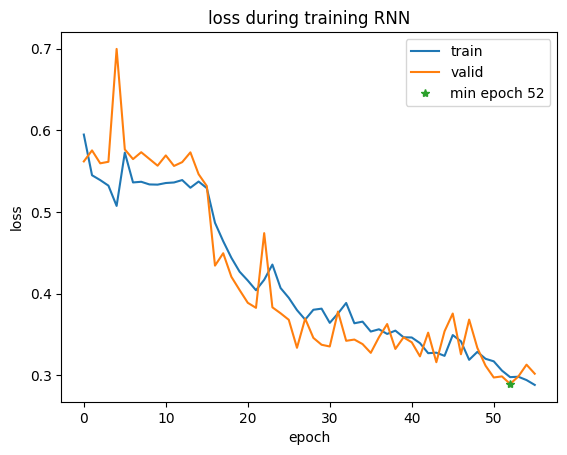

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.882  &  0.791  &          0.881  &     0.974  &0.608  &0.925 &0.904 &   0.668 &   0.947

Epoch:56, [Train] Loss: 0.294
Epoch:56, [Valid] Loss: 0.370
EarlyStopping counter: 4 out of 20
Epoch:57, [Train] Loss: 0.313
Epoch:57, [Valid] Loss: 0.336
EarlyStopping counter: 5 out of 20
Epoch:58, [Train] Loss: 0.287
Epoch:58, [Valid] Loss: 0.322
EarlyStopping counter: 6 out of 20
Epoch:59, [Train] Loss: 0.287
Epoch:59, [Valid] Loss: 0.302
EarlyStopping counter: 7 out of 20
Epoch:60, [Train] Loss: 0.269
Epoch:60, [Valid] Loss: 0.285
	SAVE MODEL: loss: 0.290 -> 0.285 | runtime: 1.407 ms
Train time: 1.423+/-0.034 ms


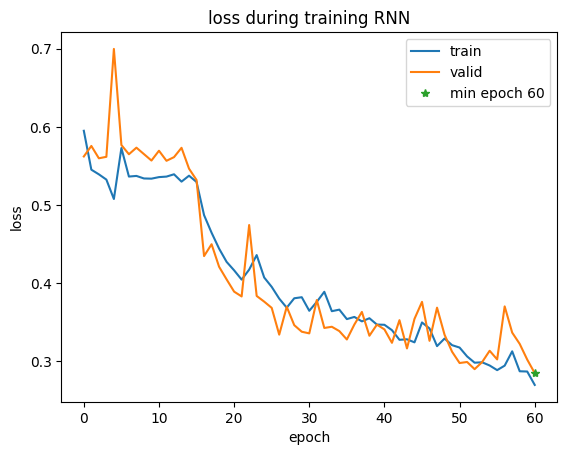

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.906  &  0.840  &          0.908  &     0.974  &0.706  &0.940 &0.906 &   0.741 &   0.950

Epoch:61, [Train] Loss: 0.254
Epoch:61, [Valid] Loss: 0.311
EarlyStopping counter: 1 out of 20
Epoch:62, [Train] Loss: 0.262
Epoch:62, [Valid] Loss: 0.295
EarlyStopping counter: 2 out of 20
Epoch:63, [Train] Loss: 0.257
Epoch:63, [Valid] Loss: 0.282
	SAVE MODEL: loss: 0.285 -> 0.282 | runtime: 1.463 ms
Epoch:64, [Train] Loss: 0.254
Epoch:64, [Valid] Loss: 0.293
EarlyStopping counter: 1 out of 20
Epoch:65, [Train] Loss: 0.254
Epoch:65, [Valid] Loss: 0.280
	SAVE MODEL: loss: 0.282 -> 0.280 | runtime: 1.337 ms
Train time: 1.422+/-0.035 ms


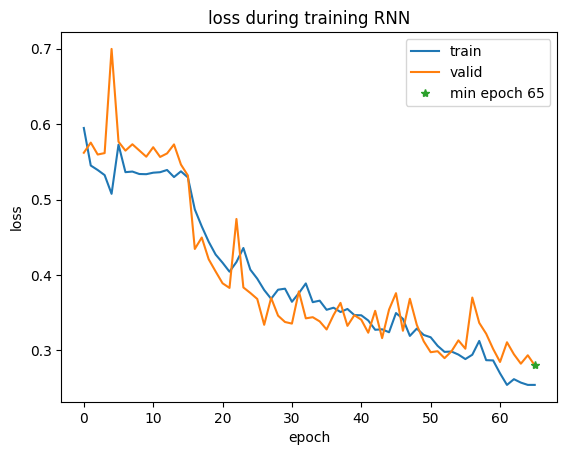

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.897  &  0.820  &          0.897  &     0.974  &0.667  &0.934 &0.905 &   0.712 &   0.952

Epoch:66, [Train] Loss: 0.240
Epoch:66, [Valid] Loss: 0.292
EarlyStopping counter: 1 out of 20
Epoch:67, [Train] Loss: 0.235
Epoch:67, [Valid] Loss: 0.304
EarlyStopping counter: 2 out of 20
Epoch:68, [Train] Loss: 0.238
Epoch:68, [Valid] Loss: 0.318
EarlyStopping counter: 3 out of 20
Epoch:69, [Train] Loss: 0.228
Epoch:69, [Valid] Loss: 0.324
EarlyStopping counter: 4 out of 20
Epoch:70, [Train] Loss: 0.237
Epoch:70, [Valid] Loss: 0.316
EarlyStopping counter: 5 out of 20
Train time: 1.420+/-0.035 ms


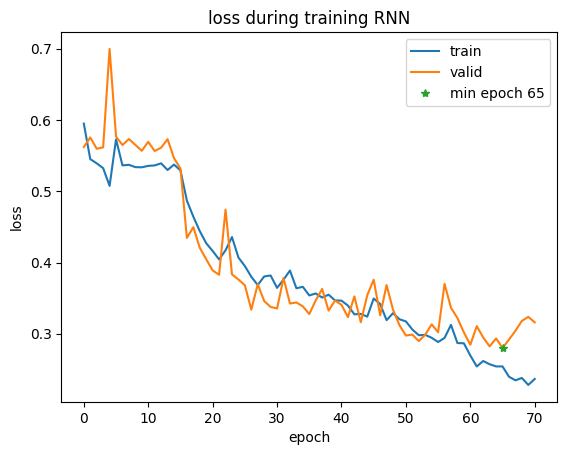

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.892  &  0.823  &          0.901  &     0.961  &0.686  &0.930 &0.905 &   0.699 &   0.957

Epoch:71, [Train] Loss: 0.216
Epoch:71, [Valid] Loss: 0.313
EarlyStopping counter: 6 out of 20
Epoch:72, [Train] Loss: 0.203
Epoch:72, [Valid] Loss: 0.315
EarlyStopping counter: 7 out of 20
Epoch:73, [Train] Loss: 0.206
Epoch:73, [Valid] Loss: 0.300
EarlyStopping counter: 8 out of 20
Epoch:74, [Train] Loss: 0.212
Epoch:74, [Valid] Loss: 0.317
EarlyStopping counter: 9 out of 20
Epoch:75, [Train] Loss: 0.225
Epoch:75, [Valid] Loss: 0.319
EarlyStopping counter: 10 out of 20
Train time: 1.418+/-0.035 ms


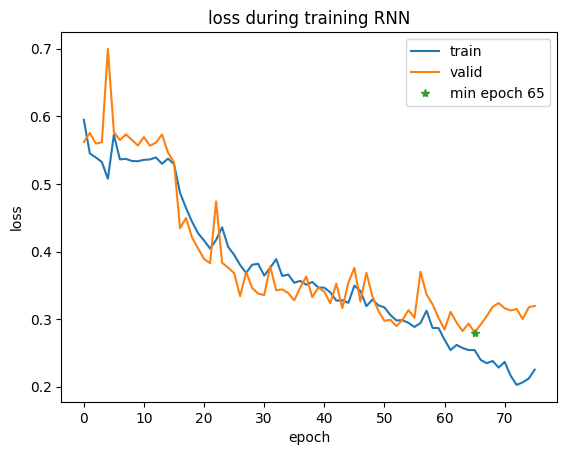

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.892  &  0.810  &          0.892  &     0.974  &0.647  &0.931 &0.905 &   0.697 &   0.958

Epoch:76, [Train] Loss: 0.202
Epoch:76, [Valid] Loss: 0.315
EarlyStopping counter: 11 out of 20
Epoch:77, [Train] Loss: 0.185
Epoch:77, [Valid] Loss: 0.321
EarlyStopping counter: 12 out of 20
Epoch:78, [Train] Loss: 0.182
Epoch:78, [Valid] Loss: 0.326
EarlyStopping counter: 13 out of 20
Epoch:79, [Train] Loss: 0.179
Epoch:79, [Valid] Loss: 0.388
EarlyStopping counter: 14 out of 20
Epoch:80, [Train] Loss: 0.206
Epoch:80, [Valid] Loss: 0.336
EarlyStopping counter: 15 out of 20
Train time: 1.419+/-0.035 ms


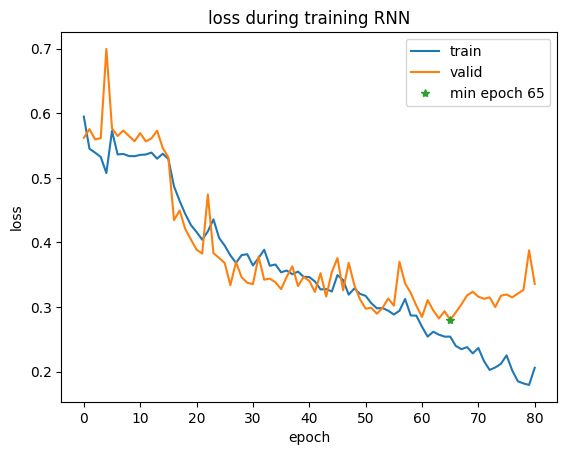

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.892  &  0.797  &          0.882  &     0.987  &0.608  &0.932 &0.889 &   0.699 &   0.954

Epoch:81, [Train] Loss: 0.189
Epoch:81, [Valid] Loss: 0.319
EarlyStopping counter: 16 out of 20
Epoch:82, [Train] Loss: 0.185
Epoch:82, [Valid] Loss: 0.360
EarlyStopping counter: 17 out of 20
Epoch:83, [Train] Loss: 0.170
Epoch:83, [Valid] Loss: 0.388
EarlyStopping counter: 18 out of 20
Epoch:84, [Train] Loss: 0.173
Epoch:84, [Valid] Loss: 0.359
EarlyStopping counter: 19 out of 20
Epoch:85, [Train] Loss: 0.183
Epoch:85, [Valid] Loss: 0.316
EarlyStopping counter: 20 out of 20
Train time: 1.420+/-0.036 ms


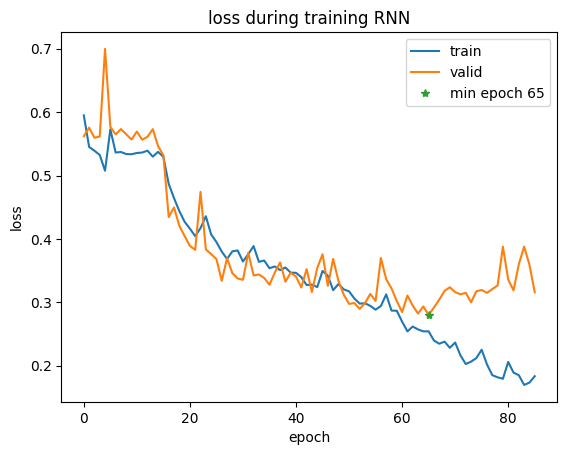

*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.892  &  0.830  &          0.906  &     0.954  &0.706  &0.929 &0.902 &   0.700 &   0.960

early stop
Model parameters:  2957970
Train time: 1.420+/-0.036 ms
best epoch: 65, min loss: 0.2801


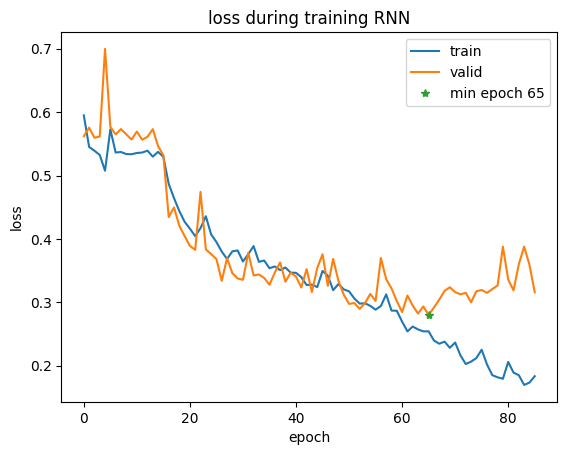

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '=', '@', 'B', 'Br', 'C', 'Ca', 'Cl', 'F', 'H', 'I', 'N', 'Na', 'O', 'P', 'S', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['BBB_Martins']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...


[Test] Loss: 0.445
*************** BBB_Martins ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.833  &  0.724  &          0.849  &     0.944  &0.505  &0.894 &0.855 &   0.520 &   0.940

collect data for:  ['Bioavailability_Ma']


Done!


train: 448 | valid: 64 | test: 128 | total: 640
Alphabet: None



---> loader for ['Bioavailability_Ma']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 40




Model type:  RNN | Model parameters:  2956353
Epoch:0, [Train] Loss: 0.648
Epoch:0, [Valid] Loss: 0.532
	SAVE MODEL: loss: inf -> 0.532 | runtime: 1.282 ms
Epoch:1, [Train] Loss: 0.550
Epoch:1, [Valid] Loss: 0.514
	SAVE MODEL: loss: 0.532 -> 0.514 | runtime: 1.274 ms
Epoch:2, [Train] Loss: 0.534
Epoch:2, [Valid] Loss: 0.517
EarlyStopping counter: 1 out of 20
Epoch:3, [Train] Loss: 0.533
Epoch:3, [Valid] Loss: 0.509
	SAVE MODEL: loss: 0.514 -> 0.509 | runtime: 1.255 ms
Epoch:4, [Train] Loss: 0.521
Epoch:4, [Valid] Loss: 0.502
	SAVE MODEL: loss: 0.509 -> 0.502 | runtime: 1.239 ms
Epoch:5, [Train] Loss: 0.528
Epoch:5, [Valid] Loss: 0.501
	SAVE MODEL: loss: 0.502 -> 0.501 

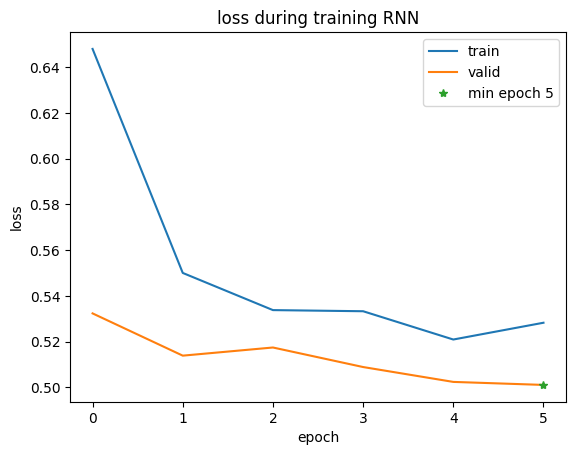

*************** Bioavailability_Ma ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 51 13 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.500  &          0.797  &     1.000  &0.000  &0.887 &0.612 &  N/A &   0.837

Epoch:6, [Train] Loss: 0.521
Epoch:6, [Valid] Loss: 0.507
EarlyStopping counter: 1 out of 20
Epoch:7, [Train] Loss: 0.522
Epoch:7, [Valid] Loss: 0.504
EarlyStopping counter: 2 out of 20
Epoch:8, [Train] Loss: 0.520
Epoch:8, [Valid] Loss: 0.498
	SAVE MODEL: loss: 0.501 -> 0.498 | runtime: 1.274 ms
Epoch:9, [Train] Loss: 0.516
Epoch:9, [Valid] Loss: 0.497
	SAVE MODEL: loss: 0.498 -> 0.497 | runtime: 1.265 ms
Epoch:10, [Train] Loss: 0.515
Epoch:10, [Valid] Loss: 0.496
	SAVE MODEL: loss: 0.497 -> 0.496 | runtime: 1.265 ms
Train time: 1.256+/-0.017 ms


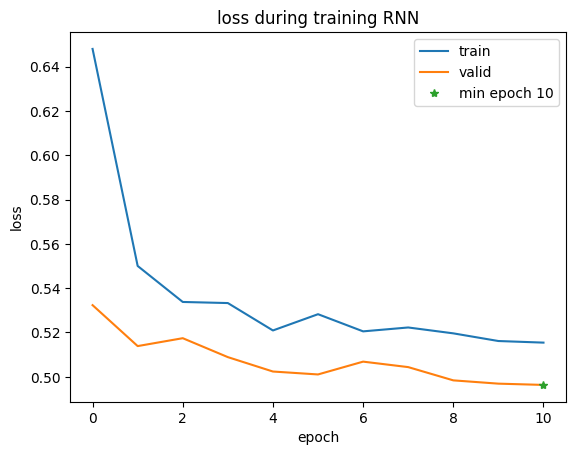

*************** Bioavailability_Ma ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 51 13 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.500  &          0.797  &     1.000  &0.000  &0.887 &0.633 &  N/A &   0.832

Epoch:11, [Train] Loss: 0.510
Epoch:11, [Valid] Loss: 0.487
	SAVE MODEL: loss: 0.496 -> 0.487 | runtime: 1.214 ms
Epoch:12, [Train] Loss: 0.509
Epoch:12, [Valid] Loss: 0.486
	SAVE MODEL: loss: 0.487 -> 0.486 | runtime: 1.272 ms
Epoch:13, [Train] Loss: 0.509
Epoch:13, [Valid] Loss: 0.480
	SAVE MODEL: loss: 0.486 -> 0.480 | runtime: 1.304 ms
Epoch:14, [Train] Loss: 0.499
Epoch:14, [Valid] Loss: 0.481
EarlyStopping counter: 1 out of 20
Epoch:15, [Train] Loss: 0.497
Epoch:15, [Valid] Loss: 0.471
	SAVE MODEL: loss: 0.480 -> 0.471 | runtime: 1.289 ms
Train time: 1.260+/-0.023 ms


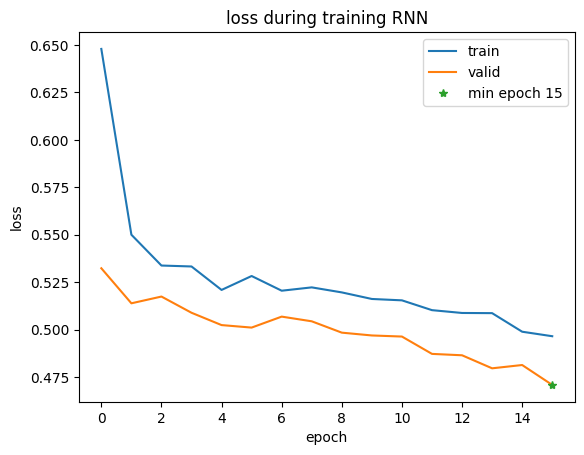

*************** Bioavailability_Ma ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 51 13 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.500  &          0.797  &     1.000  &0.000  &0.887 &0.644 &  N/A &   0.841

Epoch:16, [Train] Loss: 0.500
Epoch:16, [Valid] Loss: 0.470
	SAVE MODEL: loss: 0.471 -> 0.470 | runtime: 1.312 ms
Epoch:17, [Train] Loss: 0.492
Epoch:17, [Valid] Loss: 0.473
EarlyStopping counter: 1 out of 20
Epoch:18, [Train] Loss: 0.492
Epoch:18, [Valid] Loss: 0.465
	SAVE MODEL: loss: 0.470 -> 0.465 | runtime: 1.285 ms
Epoch:19, [Train] Loss: 0.543
Epoch:19, [Valid] Loss: 0.472
EarlyStopping counter: 1 out of 20
Epoch:20, [Train] Loss: 0.491
Epoch:20, [Valid] Loss: 0.486
EarlyStopping counter: 2 out of 20
Train time: 1.262+/-0.029 ms


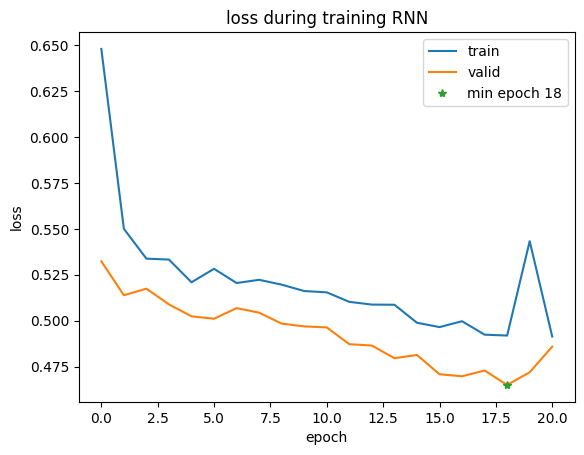

*************** Bioavailability_Ma ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 51 13 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.500  &          0.797  &     1.000  &0.000  &0.887 &0.665 &  N/A &   0.844

Epoch:21, [Train] Loss: 0.502
Epoch:21, [Valid] Loss: 0.488
EarlyStopping counter: 3 out of 20
Epoch:22, [Train] Loss: 0.498
Epoch:22, [Valid] Loss: 0.488
EarlyStopping counter: 4 out of 20
Epoch:23, [Train] Loss: 0.495
Epoch:23, [Valid] Loss: 0.489
EarlyStopping counter: 5 out of 20
Epoch:24, [Train] Loss: 0.492
Epoch:24, [Valid] Loss: 0.483
EarlyStopping counter: 6 out of 20
Epoch:25, [Train] Loss: 0.492
Epoch:25, [Valid] Loss: 0.479
EarlyStopping counter: 7 out of 20
Train time: 1.265+/-0.027 ms


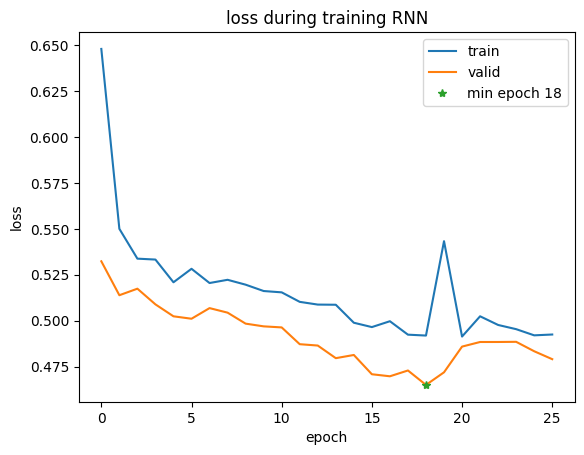

*************** Bioavailability_Ma ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 51 13 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.500  &          0.797  &     1.000  &0.000  &0.887 &0.646 &  N/A &   0.838

Epoch:26, [Train] Loss: 0.488
Epoch:26, [Valid] Loss: 0.478
EarlyStopping counter: 8 out of 20
Epoch:27, [Train] Loss: 0.489
Epoch:27, [Valid] Loss: 0.473
EarlyStopping counter: 9 out of 20
Epoch:28, [Train] Loss: 0.485
Epoch:28, [Valid] Loss: 0.469
EarlyStopping counter: 10 out of 20
Epoch:29, [Train] Loss: 0.482
Epoch:29, [Valid] Loss: 0.468
EarlyStopping counter: 11 out of 20
Epoch:30, [Train] Loss: 0.480
Epoch:30, [Valid] Loss: 0.467
EarlyStopping counter: 12 out of 20
Train time: 1.264+/-0.027 ms


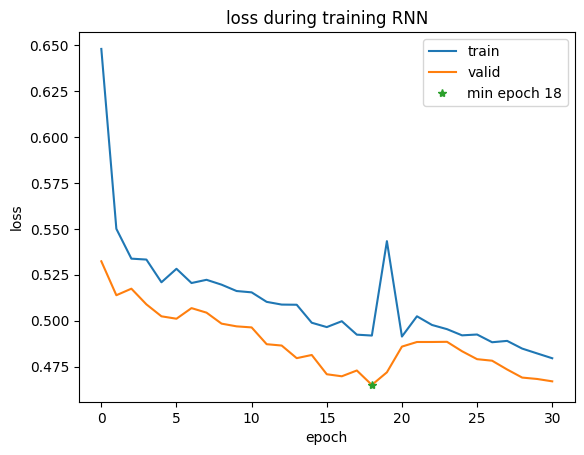

*************** Bioavailability_Ma ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 51 13 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.500  &          0.797  &     1.000  &0.000  &0.887 &0.649 &  N/A &   0.833

Epoch:31, [Train] Loss: 0.480
Epoch:31, [Valid] Loss: 0.459
	SAVE MODEL: loss: 0.465 -> 0.459 | runtime: 1.276 ms
Epoch:32, [Train] Loss: 0.471
Epoch:32, [Valid] Loss: 0.454
	SAVE MODEL: loss: 0.459 -> 0.454 | runtime: 1.253 ms
Epoch:33, [Train] Loss: 0.478
Epoch:33, [Valid] Loss: 0.466
EarlyStopping counter: 1 out of 20
Epoch:34, [Train] Loss: 0.476
Epoch:34, [Valid] Loss: 0.489
EarlyStopping counter: 2 out of 20
Epoch:35, [Train] Loss: 0.485
Epoch:35, [Valid] Loss: 0.468
EarlyStopping counter: 3 out of 20
Train time: 1.262+/-0.026 ms


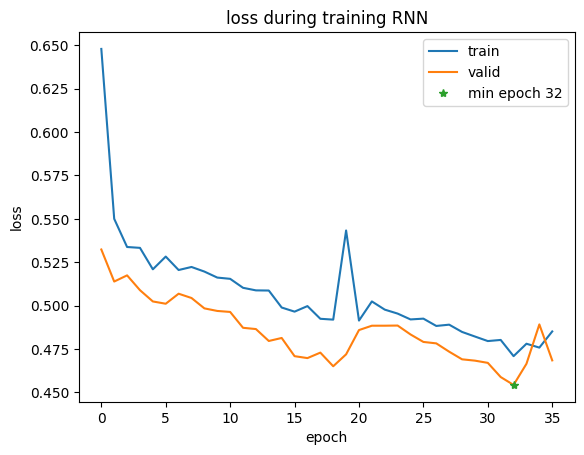

*************** Bioavailability_Ma ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.812  &  0.567  &          0.820  &     0.980  &0.154  &0.893 &0.655 &   0.256 &   0.839

Epoch:36, [Train] Loss: 0.480
Epoch:36, [Valid] Loss: 0.467
EarlyStopping counter: 4 out of 20
Epoch:37, [Train] Loss: 0.464
Epoch:37, [Valid] Loss: 0.464
EarlyStopping counter: 5 out of 20
Epoch:38, [Train] Loss: 0.463
Epoch:38, [Valid] Loss: 0.455
EarlyStopping counter: 6 out of 20
Epoch:39, [Train] Loss: 0.459
Epoch:39, [Valid] Loss: 0.455
EarlyStopping counter: 7 out of 20
Epoch:40, [Train] Loss: 0.458
Epoch:40, [Valid] Loss: 0.461
EarlyStopping counter: 8 out of 20
Train time: 1.262+/-0.030 ms


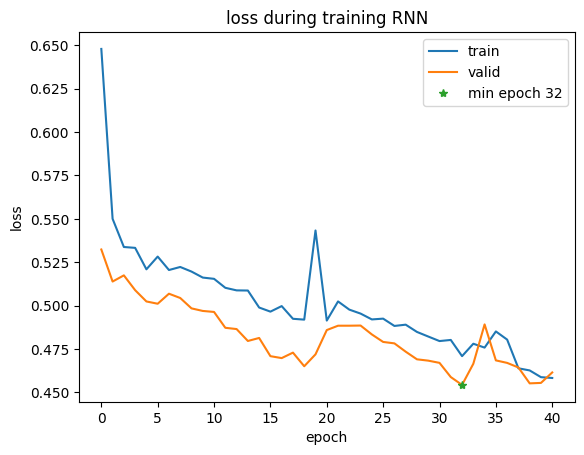

*************** Bioavailability_Ma ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.529  &          0.806  &     0.980  &0.077  &0.885 &0.659 &   0.133 &   0.846

Epoch:41, [Train] Loss: 0.450
Epoch:41, [Valid] Loss: 0.457
EarlyStopping counter: 9 out of 20
Epoch:42, [Train] Loss: 0.447
Epoch:42, [Valid] Loss: 0.438
	SAVE MODEL: loss: 0.454 -> 0.438 | runtime: 1.299 ms
Epoch:43, [Train] Loss: 0.445
Epoch:43, [Valid] Loss: 0.455
EarlyStopping counter: 1 out of 20
Epoch:44, [Train] Loss: 0.440
Epoch:44, [Valid] Loss: 0.458
EarlyStopping counter: 2 out of 20
Epoch:45, [Train] Loss: 0.436
Epoch:45, [Valid] Loss: 0.478
EarlyStopping counter: 3 out of 20
Train time: 1.264+/-0.030 ms


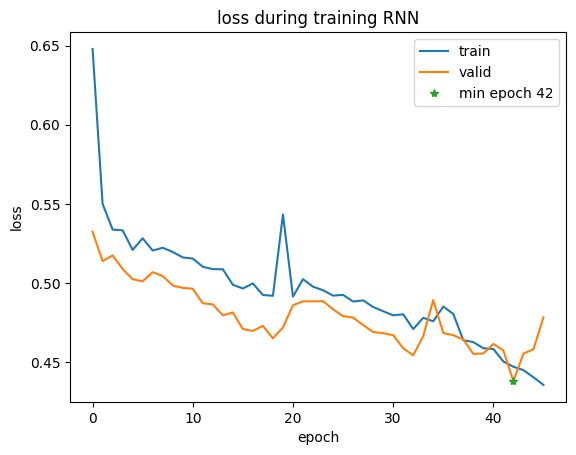

*************** Bioavailability_Ma ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.797  &  0.557  &          0.817  &     0.961  &0.154  &0.883 &0.649 &   0.191 &   0.869

Epoch:46, [Train] Loss: 0.440
Epoch:46, [Valid] Loss: 0.457
EarlyStopping counter: 4 out of 20
Epoch:47, [Train] Loss: 0.426
Epoch:47, [Valid] Loss: 0.462
EarlyStopping counter: 5 out of 20
Epoch:48, [Train] Loss: 0.425
Epoch:48, [Valid] Loss: 0.493
EarlyStopping counter: 6 out of 20
Epoch:49, [Train] Loss: 0.420
Epoch:49, [Valid] Loss: 0.464
EarlyStopping counter: 7 out of 20
Epoch:50, [Train] Loss: 0.416
Epoch:50, [Valid] Loss: 0.465
EarlyStopping counter: 8 out of 20
Train time: 1.261+/-0.033 ms


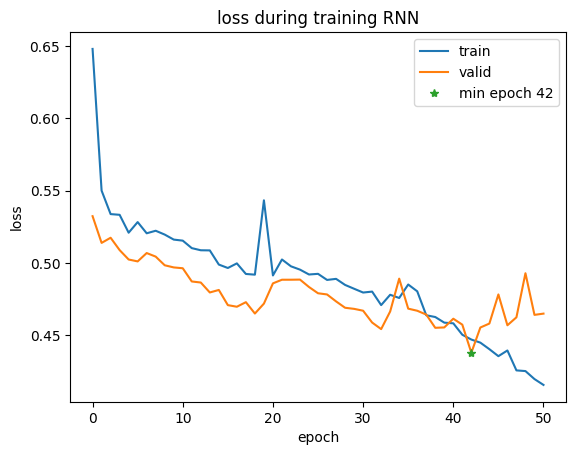

*************** Bioavailability_Ma ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.812  &  0.624  &          0.842  &     0.941  &0.308  &0.889 &0.676 &   0.321 &   0.876

Epoch:51, [Train] Loss: 0.407
Epoch:51, [Valid] Loss: 0.485
EarlyStopping counter: 9 out of 20
Epoch:52, [Train] Loss: 0.405
Epoch:52, [Valid] Loss: 0.490
EarlyStopping counter: 10 out of 20
Epoch:53, [Train] Loss: 0.401
Epoch:53, [Valid] Loss: 0.472
EarlyStopping counter: 11 out of 20
Epoch:54, [Train] Loss: 0.398
Epoch:54, [Valid] Loss: 0.469
EarlyStopping counter: 12 out of 20
Epoch:55, [Train] Loss: 0.394
Epoch:55, [Valid] Loss: 0.475
EarlyStopping counter: 13 out of 20
Train time: 1.262+/-0.033 ms


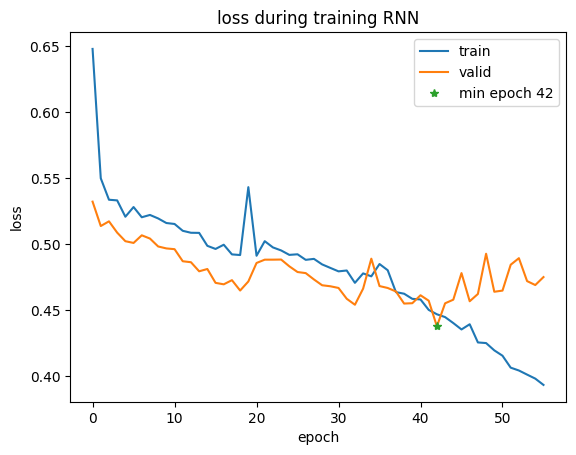

*************** Bioavailability_Ma ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.781  &  0.576  &          0.825  &     0.922  &0.231  &0.870 &0.706 &   0.196 &   0.884

Epoch:56, [Train] Loss: 0.386
Epoch:56, [Valid] Loss: 0.491
EarlyStopping counter: 14 out of 20
Epoch:57, [Train] Loss: 0.384
Epoch:57, [Valid] Loss: 0.546
EarlyStopping counter: 15 out of 20
Epoch:58, [Train] Loss: 0.396
Epoch:58, [Valid] Loss: 0.522
EarlyStopping counter: 16 out of 20
Epoch:59, [Train] Loss: 0.377
Epoch:59, [Valid] Loss: 0.522
EarlyStopping counter: 17 out of 20
Epoch:60, [Train] Loss: 0.364
Epoch:60, [Valid] Loss: 0.537
EarlyStopping counter: 18 out of 20
Train time: 1.264+/-0.032 ms


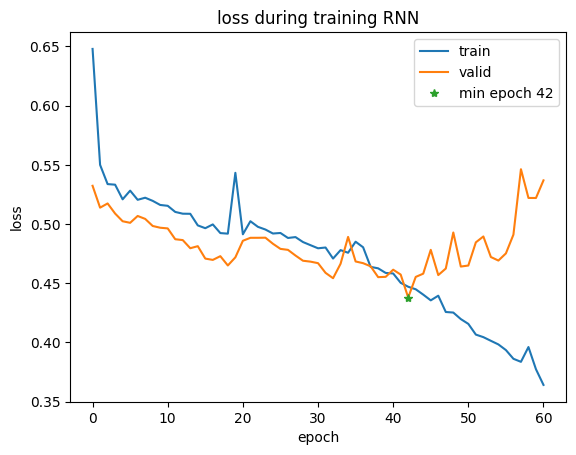

*************** Bioavailability_Ma ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.781  &  0.605  &          0.836  &     0.902  &0.308  &0.868 &0.653 &   0.243 &   0.872

Epoch:61, [Train] Loss: 0.374
Epoch:61, [Valid] Loss: 0.596
EarlyStopping counter: 19 out of 20
Epoch:62, [Train] Loss: 0.354
Epoch:62, [Valid] Loss: 0.528
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2956353
Train time: 1.265+/-0.033 ms
best epoch: 42, min loss: 0.4379


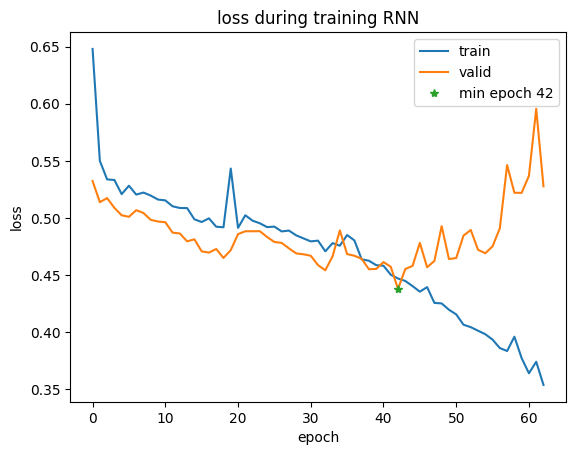

Found local copy...
Loading...


####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'Au', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['Bioavailability_Ma']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 0.669
*************** Bioavailability_Ma ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.695  &  0.570  &         

Done!


train: 852 | valid: 122 | test: 244 | total: 1218
Alphabet: None



---> loader for ['Pgp_Broccatelli']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 36




Model type:  RNN | Model parameters:  2949905
Epoch:0, [Train] Loss: 0.693
Epoch:0, [Valid] Loss: 0.690
	SAVE MODEL: loss: inf -> 0.690 | runtime: 0.956 ms
Epoch:1, [Train] Loss: 0.689
Epoch:1, [Valid] Loss: 0.686
	SAVE MODEL: loss: 0.690 -> 0.686 | runtime: 0.957 ms
Epoch:2, [Train] Loss: 0.678
Epoch:2, [Valid] Loss: 0.655
	SAVE MODEL: loss: 0.686 -> 0.655 | runtime: 0.952 ms
Epoch:3, [Train] Loss: 0.615
Epoch:3, [Valid] Loss: 0.565
	SAVE MODEL: loss: 0.655 -> 0.565 | runtime: 0.948 ms
Epoch:4, [Train] Loss: 0.554
Epoch:4, [Valid] Loss: 0.469
	SAVE MODEL: loss: 0.565 -> 0.469 | runtime: 0.937 ms
Epoch:5, [Train] Loss: 0.495
Epoch:5, [Valid] Loss: 0.436
	SAVE MODEL: los

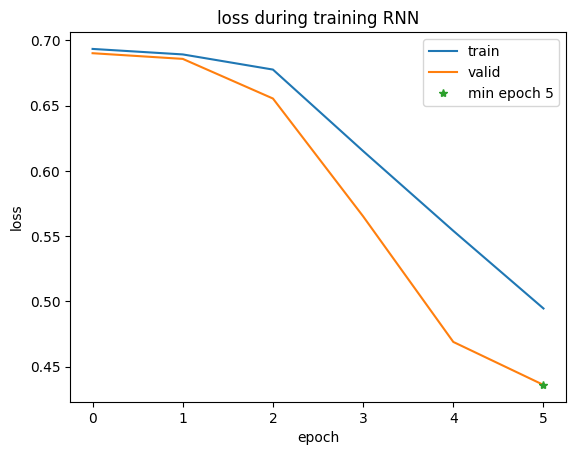

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.836  &  0.842  &          0.911  &     0.773  &0.911  &0.836 &0.874 &   0.683 &   0.907

Epoch:6, [Train] Loss: 0.439
Epoch:6, [Valid] Loss: 0.424
	SAVE MODEL: loss: 0.436 -> 0.424 | runtime: 0.886 ms
Epoch:7, [Train] Loss: 0.402
Epoch:7, [Valid] Loss: 0.416
	SAVE MODEL: loss: 0.424 -> 0.416 | runtime: 0.989 ms
Epoch:8, [Train] Loss: 0.364
Epoch:8, [Valid] Loss: 0.490
EarlyStopping counter: 1 out of 20
Epoch:9, [Train] Loss: 0.358
Epoch:9, [Valid] Loss: 0.441
EarlyStopping counter: 2 out of 20
Epoch:10, [Train] Loss: 0.363
Epoch:10, [Valid] Loss: 0.411
	SAVE MODEL: loss: 0.416 -> 0.411 | runtime: 0.959 ms
Train time: 0.952+/-0.025 ms


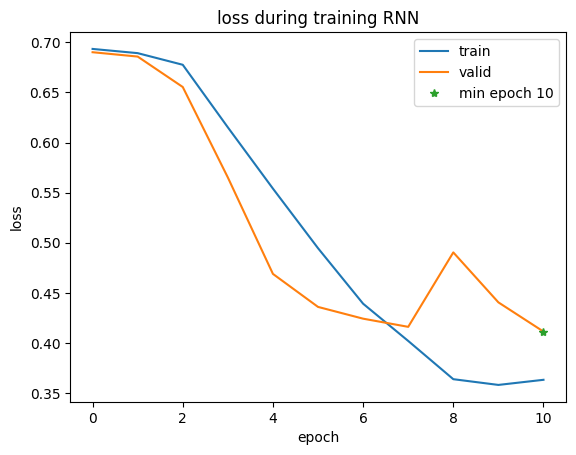

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.811  &  0.807  &          0.803  &     0.864  &0.750  &0.832 &0.899 &   0.620 &   0.922

Epoch:11, [Train] Loss: 0.343
Epoch:11, [Valid] Loss: 0.416
EarlyStopping counter: 1 out of 20
Epoch:12, [Train] Loss: 0.353
Epoch:12, [Valid] Loss: 0.447
EarlyStopping counter: 2 out of 20
Epoch:13, [Train] Loss: 0.377
Epoch:13, [Valid] Loss: 0.405
	SAVE MODEL: loss: 0.411 -> 0.405 | runtime: 0.941 ms
Epoch:14, [Train] Loss: 0.344
Epoch:14, [Valid] Loss: 0.421
EarlyStopping counter: 1 out of 20
Epoch:15, [Train] Loss: 0.323
Epoch:15, [Valid] Loss: 0.425
EarlyStopping counter: 2 out of 20
Train time: 0.952+/-0.025 ms


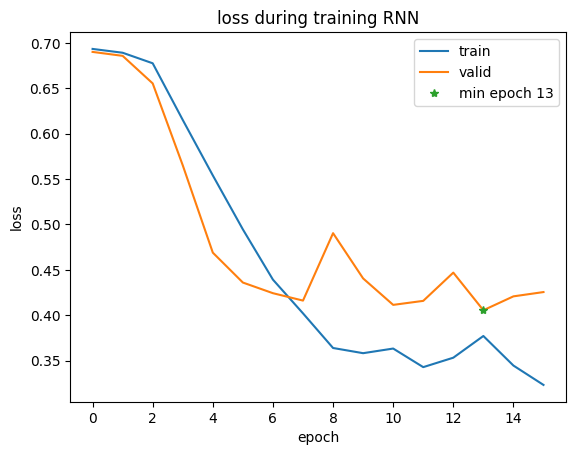

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.803  &  0.794  &          0.769  &     0.909  &0.679  &0.833 &0.902 &   0.610 &   0.923

Epoch:16, [Train] Loss: 0.318
Epoch:16, [Valid] Loss: 0.409
EarlyStopping counter: 3 out of 20
Epoch:17, [Train] Loss: 0.317
Epoch:17, [Valid] Loss: 0.410
EarlyStopping counter: 4 out of 20
Epoch:18, [Train] Loss: 0.311
Epoch:18, [Valid] Loss: 0.409
EarlyStopping counter: 5 out of 20
Epoch:19, [Train] Loss: 0.310
Epoch:19, [Valid] Loss: 0.415
EarlyStopping counter: 6 out of 20
Epoch:20, [Train] Loss: 0.312
Epoch:20, [Valid] Loss: 0.449
EarlyStopping counter: 7 out of 20
Train time: 0.948+/-0.027 ms


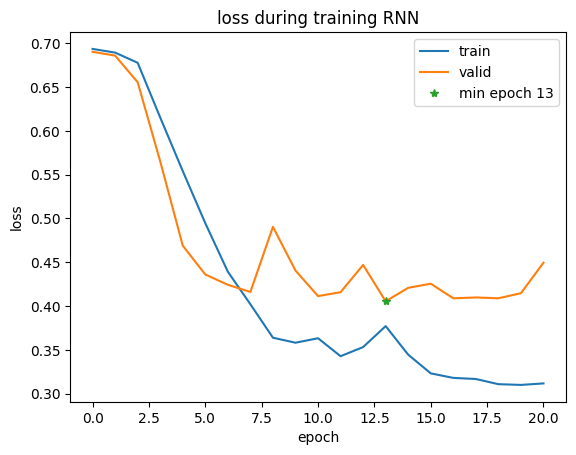

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.779  &  0.786  &          0.868  &     0.697  &0.875  &0.773 &0.899 &   0.575 &   0.918

Epoch:21, [Train] Loss: 0.312
Epoch:21, [Valid] Loss: 0.404
	SAVE MODEL: loss: 0.405 -> 0.404 | runtime: 0.976 ms
Epoch:22, [Train] Loss: 0.308
Epoch:22, [Valid] Loss: 0.406
EarlyStopping counter: 1 out of 20
Epoch:23, [Train] Loss: 0.296
Epoch:23, [Valid] Loss: 0.409
EarlyStopping counter: 2 out of 20
Epoch:24, [Train] Loss: 0.291
Epoch:24, [Valid] Loss: 0.440
EarlyStopping counter: 3 out of 20
Epoch:25, [Train] Loss: 0.295
Epoch:25, [Valid] Loss: 0.416
EarlyStopping counter: 4 out of 20
Train time: 0.950+/-0.026 ms


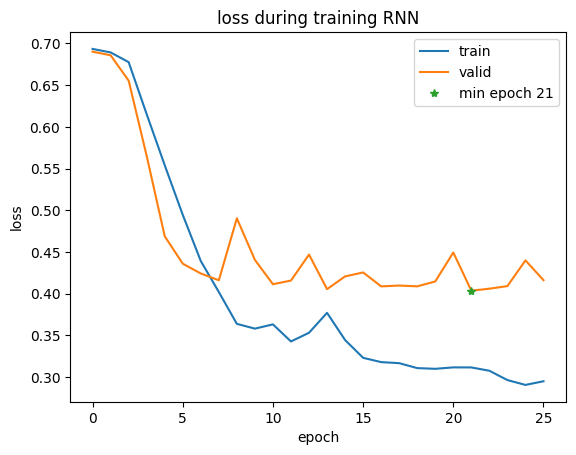

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.828  &  0.822  &          0.808  &     0.894  &0.750  &0.849 &0.900 &   0.655 &   0.918

Epoch:26, [Train] Loss: 0.297
Epoch:26, [Valid] Loss: 0.453
EarlyStopping counter: 5 out of 20
Epoch:27, [Train] Loss: 0.299
Epoch:27, [Valid] Loss: 0.449
EarlyStopping counter: 6 out of 20
Epoch:28, [Train] Loss: 0.288
Epoch:28, [Valid] Loss: 0.411
EarlyStopping counter: 7 out of 20
Epoch:29, [Train] Loss: 0.289
Epoch:29, [Valid] Loss: 0.397
	SAVE MODEL: loss: 0.404 -> 0.397 | runtime: 0.916 ms
Epoch:30, [Train] Loss: 0.290
Epoch:30, [Valid] Loss: 0.400
EarlyStopping counter: 1 out of 20
Train time: 0.950+/-0.026 ms


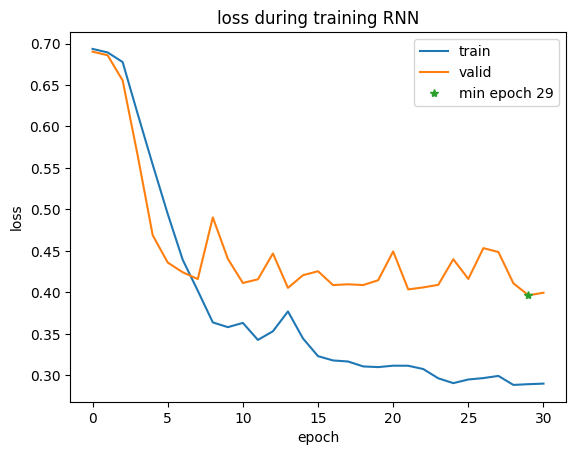

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.828  &  0.827  &          0.846  &     0.833  &0.821  &0.840 &0.903 &   0.654 &   0.917

Epoch:31, [Train] Loss: 0.282
Epoch:31, [Valid] Loss: 0.443
EarlyStopping counter: 2 out of 20
Epoch:32, [Train] Loss: 0.290
Epoch:32, [Valid] Loss: 0.596
EarlyStopping counter: 3 out of 20
Epoch:33, [Train] Loss: 0.364
Epoch:33, [Valid] Loss: 0.416
EarlyStopping counter: 4 out of 20
Epoch:34, [Train] Loss: 0.281
Epoch:34, [Valid] Loss: 0.492
EarlyStopping counter: 5 out of 20
Epoch:35, [Train] Loss: 0.293
Epoch:35, [Valid] Loss: 0.427
EarlyStopping counter: 6 out of 20
Train time: 0.948+/-0.025 ms


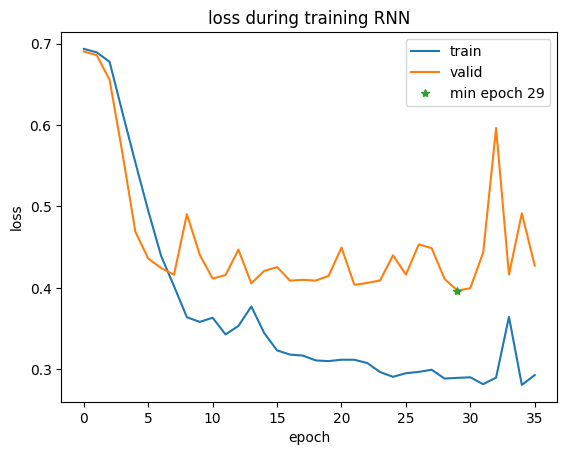

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.803  &  0.801  &          0.809  &     0.833  &0.768  &0.821 &0.897 &   0.603 &   0.909

Epoch:36, [Train] Loss: 0.284
Epoch:36, [Valid] Loss: 0.409
EarlyStopping counter: 7 out of 20
Epoch:37, [Train] Loss: 0.267
Epoch:37, [Valid] Loss: 0.449
EarlyStopping counter: 8 out of 20
Epoch:38, [Train] Loss: 0.279
Epoch:38, [Valid] Loss: 0.438
EarlyStopping counter: 9 out of 20
Epoch:39, [Train] Loss: 0.271
Epoch:39, [Valid] Loss: 0.416
EarlyStopping counter: 10 out of 20
Epoch:40, [Train] Loss: 0.266
Epoch:40, [Valid] Loss: 0.459
EarlyStopping counter: 11 out of 20
Train time: 0.950+/-0.026 ms


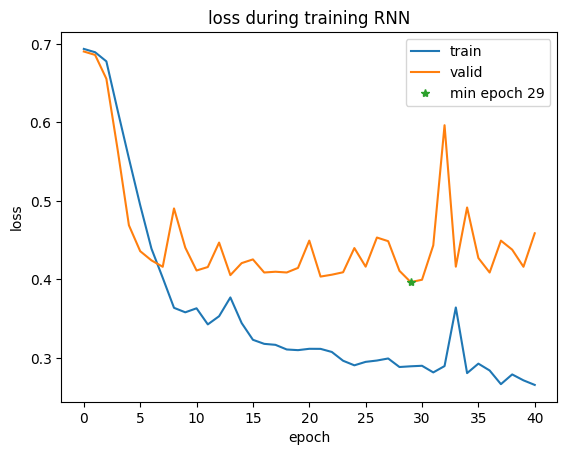

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.803  &  0.797  &          0.784  &     0.879  &0.714  &0.829 &0.898 &   0.605 &   0.912

Epoch:41, [Train] Loss: 0.270
Epoch:41, [Valid] Loss: 0.418
EarlyStopping counter: 12 out of 20
Epoch:42, [Train] Loss: 0.252
Epoch:42, [Valid] Loss: 0.439
EarlyStopping counter: 13 out of 20
Epoch:43, [Train] Loss: 0.230
Epoch:43, [Valid] Loss: 0.425
EarlyStopping counter: 14 out of 20
Epoch:44, [Train] Loss: 0.242
Epoch:44, [Valid] Loss: 0.401
EarlyStopping counter: 15 out of 20
Epoch:45, [Train] Loss: 0.214
Epoch:45, [Valid] Loss: 0.458
EarlyStopping counter: 16 out of 20
Train time: 0.950+/-0.026 ms


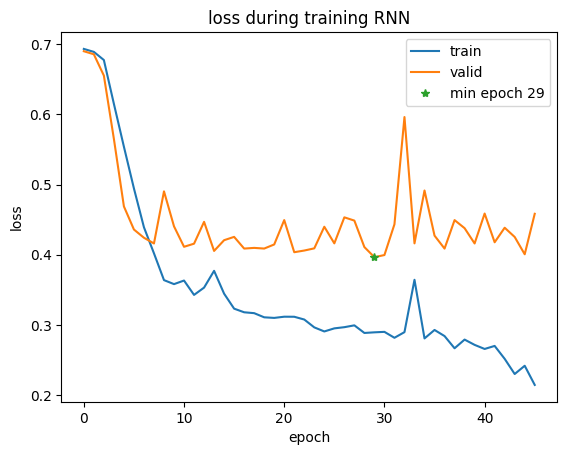

*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.803  &  0.798  &          0.792  &     0.864  &0.732  &0.826 &0.903 &   0.604 &   0.925

Epoch:46, [Train] Loss: 0.214
Epoch:46, [Valid] Loss: 0.461
EarlyStopping counter: 17 out of 20
Epoch:47, [Train] Loss: 0.201
Epoch:47, [Valid] Loss: 0.466
EarlyStopping counter: 18 out of 20
Epoch:48, [Train] Loss: 0.211
Epoch:48, [Valid] Loss: 0.509
EarlyStopping counter: 19 out of 20
Epoch:49, [Train] Loss: 0.188
Epoch:49, [Valid] Loss: 0.470
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2949905
Train time: 0.951+/-0.025 ms
best epoch: 29, min loss: 0.3965


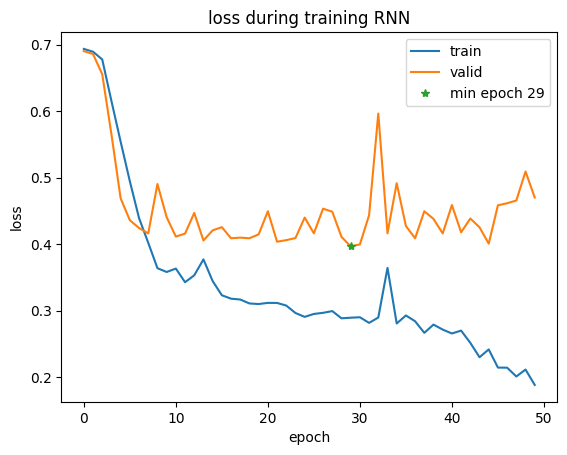

Found local copy...
Loading...


####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '7', '=', '@', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['Pgp_Broccatelli']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 0.405
*************** Pgp_Broccatelli ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.852  &  0.853  &          0.892  &     0.805  &0.901

Done!


train: 404 | valid: 58 | test: 116 | total: 578
Alphabet: None



---> loader for ['HIA_Hou']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 38




Model type:  RNN | Model parameters:  2953125
Epoch:0, [Train] Loss: 0.638
Epoch:0, [Valid] Loss: 0.467
	SAVE MODEL: loss: inf -> 0.467 | runtime: 1.458 ms
Epoch:1, [Train] Loss: 0.441
Epoch:1, [Valid] Loss: 0.354
	SAVE MODEL: loss: 0.467 -> 0.354 | runtime: 1.349 ms
Epoch:2, [Train] Loss: 0.426
Epoch:2, [Valid] Loss: 0.334
	SAVE MODEL: loss: 0.354 -> 0.334 | runtime: 1.442 ms
Epoch:3, [Train] Loss: 0.384
Epoch:3, [Valid] Loss: 0.361
EarlyStopping counter: 1 out of 20
Epoch:4, [Train] Loss: 0.396
Epoch:4, [Valid] Loss: 0.343
EarlyStopping counter: 2 out of 20
Epoch:5, [Train] Loss: 0.384
Epoch:5, [Valid] Loss: 0.333
	SAVE MODEL: loss: 0.334 -> 0.333 | runtime: 1.377 ms
Train time

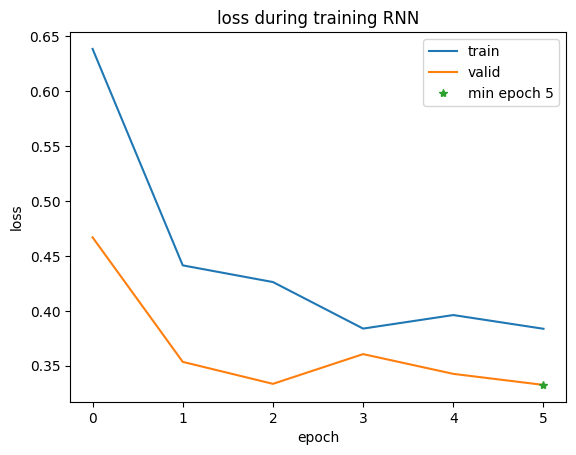

*************** HIA_Hou ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 52 6 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.897  &  0.500  &          0.897  &     1.000  &0.000  &0.945 &0.686 &  N/A &   0.951

Epoch:6, [Train] Loss: 0.388
Epoch:6, [Valid] Loss: 0.332
	SAVE MODEL: loss: 0.333 -> 0.332 | runtime: 1.215 ms
Epoch:7, [Train] Loss: 0.382
Epoch:7, [Valid] Loss: 0.340
EarlyStopping counter: 1 out of 20
Epoch:8, [Train] Loss: 0.380
Epoch:8, [Valid] Loss: 0.339
EarlyStopping counter: 2 out of 20
Epoch:9, [Train] Loss: 0.378
Epoch:9, [Valid] Loss: 0.331
	SAVE MODEL: loss: 0.332 -> 0.331 | runtime: 1.386 ms
Epoch:10, [Train] Loss: 0.377
Epoch:10, [Valid] Loss: 0.330
	SAVE MODEL: loss: 0.331 -> 0.330 | runtime: 1.399 ms
Train time: 1.387+/-0.066 ms


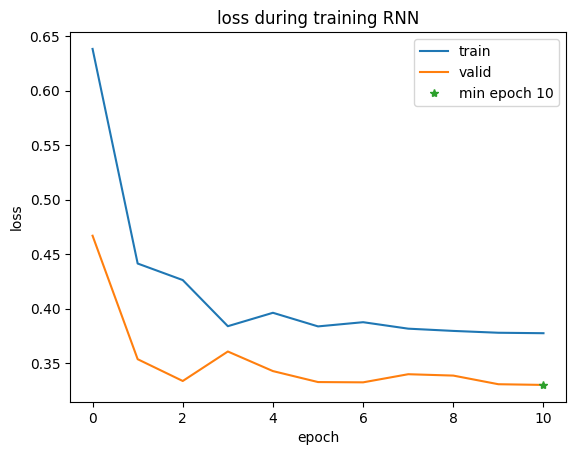

*************** HIA_Hou ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 52 6 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.897  &  0.500  &          0.897  &     1.000  &0.000  &0.945 &0.705 &  N/A &   0.951

Epoch:11, [Train] Loss: 0.366
Epoch:11, [Valid] Loss: 0.324
	SAVE MODEL: loss: 0.330 -> 0.324 | runtime: 1.370 ms
Epoch:12, [Train] Loss: 0.354
Epoch:12, [Valid] Loss: 0.304
	SAVE MODEL: loss: 0.324 -> 0.304 | runtime: 1.393 ms
Epoch:13, [Train] Loss: 0.340
Epoch:13, [Valid] Loss: 0.302
	SAVE MODEL: loss: 0.304 -> 0.302 | runtime: 1.415 ms
Epoch:14, [Train] Loss: 0.325
Epoch:14, [Valid] Loss: 0.293
	SAVE MODEL: loss: 0.302 -> 0.293 | runtime: 1.338 ms
Epoch:15, [Train] Loss: 0.307
Epoch:15, [Valid] Loss: 0.272
	SAVE MODEL: loss: 0.293 -> 0.272 | runtime: 1.297 ms
Train time: 1.380+/-0.061 ms


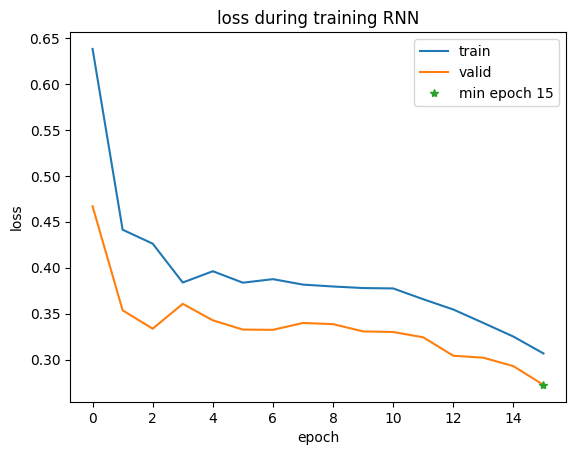

*************** HIA_Hou ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 52 6 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.897  &  0.500  &          0.897  &     1.000  &0.000  &0.945 &0.808 &  N/A &   0.967

Epoch:16, [Train] Loss: 0.299
Epoch:16, [Valid] Loss: 0.281
EarlyStopping counter: 1 out of 20
Epoch:17, [Train] Loss: 0.279
Epoch:17, [Valid] Loss: 0.249
	SAVE MODEL: loss: 0.272 -> 0.249 | runtime: 1.449 ms
Epoch:18, [Train] Loss: 0.273
Epoch:18, [Valid] Loss: 0.243
	SAVE MODEL: loss: 0.249 -> 0.243 | runtime: 1.321 ms
Epoch:19, [Train] Loss: 0.256
Epoch:19, [Valid] Loss: 0.246
EarlyStopping counter: 1 out of 20
Epoch:20, [Train] Loss: 0.261
Epoch:20, [Valid] Loss: 0.248
EarlyStopping counter: 2 out of 20
Train time: 1.388+/-0.060 ms


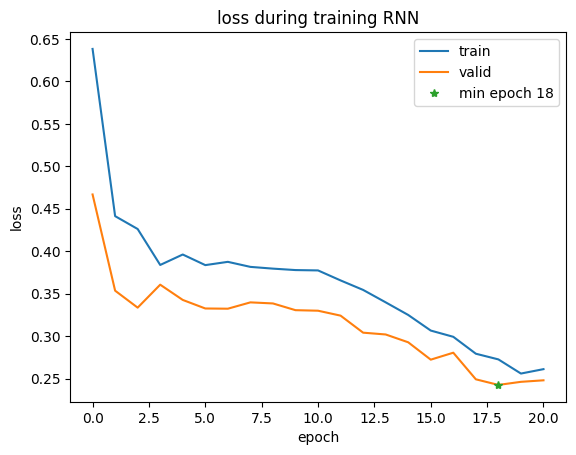

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.914  &  0.804  &          0.961  &     0.942  &0.667  &0.951 &0.837 &   0.569 &   0.974

Epoch:21, [Train] Loss: 0.248
Epoch:21, [Valid] Loss: 0.241
	SAVE MODEL: loss: 0.243 -> 0.241 | runtime: 1.413 ms
Epoch:22, [Train] Loss: 0.229
Epoch:22, [Valid] Loss: 0.235
	SAVE MODEL: loss: 0.241 -> 0.235 | runtime: 1.362 ms
Epoch:23, [Train] Loss: 0.232
Epoch:23, [Valid] Loss: 0.277
EarlyStopping counter: 1 out of 20
Epoch:24, [Train] Loss: 0.229
Epoch:24, [Valid] Loss: 0.278
EarlyStopping counter: 2 out of 20
Epoch:25, [Train] Loss: 0.228
Epoch:25, [Valid] Loss: 0.261
EarlyStopping counter: 3 out of 20
Train time: 1.384+/-0.060 ms


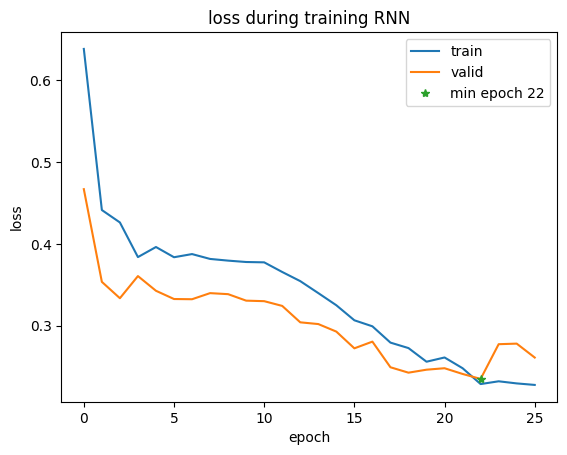

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.914  &  0.804  &          0.961  &     0.942  &0.667  &0.951 &0.821 &   0.569 &   0.975

Epoch:26, [Train] Loss: 0.215
Epoch:26, [Valid] Loss: 0.216
	SAVE MODEL: loss: 0.235 -> 0.216 | runtime: 1.432 ms
Epoch:27, [Train] Loss: 0.200
Epoch:27, [Valid] Loss: 0.278
EarlyStopping counter: 1 out of 20
Epoch:28, [Train] Loss: 0.204
Epoch:28, [Valid] Loss: 0.270
EarlyStopping counter: 2 out of 20
Epoch:29, [Train] Loss: 0.231
Epoch:29, [Valid] Loss: 0.241
EarlyStopping counter: 3 out of 20
Epoch:30, [Train] Loss: 0.195
Epoch:30, [Valid] Loss: 0.223
EarlyStopping counter: 4 out of 20
Train time: 1.383+/-0.057 ms


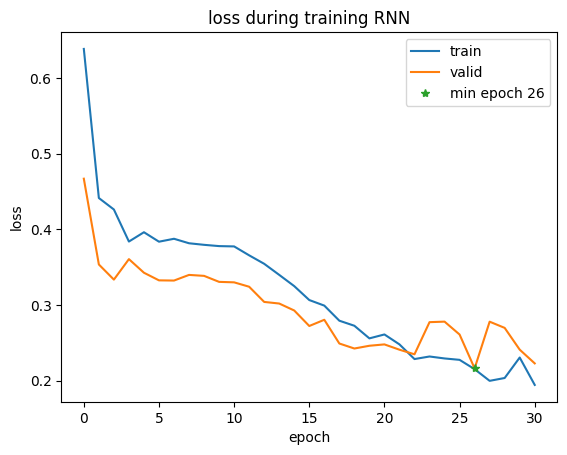

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.931  &  0.814  &          0.962  &     0.962  &0.667  &0.962 &0.865 &   0.628 &   0.982

Epoch:31, [Train] Loss: 0.171
Epoch:31, [Valid] Loss: 0.241
EarlyStopping counter: 5 out of 20
Epoch:32, [Train] Loss: 0.165
Epoch:32, [Valid] Loss: 0.252
EarlyStopping counter: 6 out of 20
Epoch:33, [Train] Loss: 0.161
Epoch:33, [Valid] Loss: 0.248
EarlyStopping counter: 7 out of 20
Epoch:34, [Train] Loss: 0.150
Epoch:34, [Valid] Loss: 0.246
EarlyStopping counter: 8 out of 20
Epoch:35, [Train] Loss: 0.138
Epoch:35, [Valid] Loss: 0.213
	SAVE MODEL: loss: 0.216 -> 0.213 | runtime: 1.359 ms
Train time: 1.386+/-0.054 ms


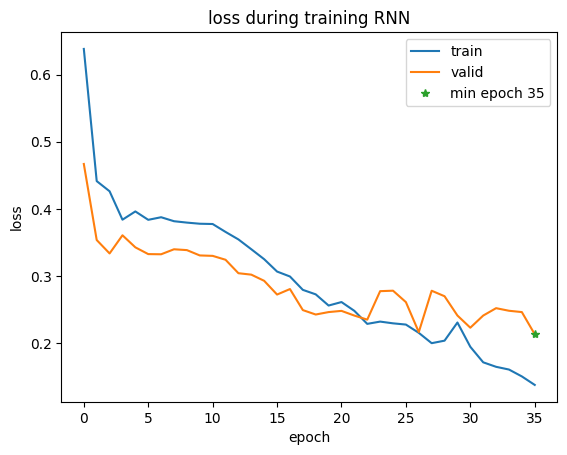

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.914  &  0.731  &          0.943  &     0.962  &0.500  &0.952 &0.901 &   0.501 &   0.987

Epoch:36, [Train] Loss: 0.146
Epoch:36, [Valid] Loss: 0.231
EarlyStopping counter: 1 out of 20
Epoch:37, [Train] Loss: 0.132
Epoch:37, [Valid] Loss: 0.227
EarlyStopping counter: 2 out of 20
Epoch:38, [Train] Loss: 0.118
Epoch:38, [Valid] Loss: 0.228
EarlyStopping counter: 3 out of 20
Epoch:39, [Train] Loss: 0.119
Epoch:39, [Valid] Loss: 0.268
EarlyStopping counter: 4 out of 20
Epoch:40, [Train] Loss: 0.114
Epoch:40, [Valid] Loss: 0.223
EarlyStopping counter: 5 out of 20
Train time: 1.387+/-0.053 ms


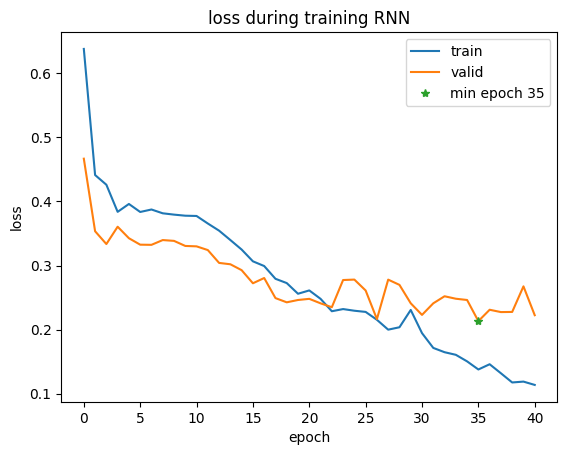

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.931  &  0.888  &          0.980  &     0.942  &0.833  &0.961 &0.910 &   0.685 &   0.987

Epoch:41, [Train] Loss: 0.125
Epoch:41, [Valid] Loss: 0.247
EarlyStopping counter: 6 out of 20
Epoch:42, [Train] Loss: 0.092
Epoch:42, [Valid] Loss: 0.256
EarlyStopping counter: 7 out of 20
Epoch:43, [Train] Loss: 0.087
Epoch:43, [Valid] Loss: 0.222
EarlyStopping counter: 8 out of 20
Epoch:44, [Train] Loss: 0.099
Epoch:44, [Valid] Loss: 0.236
EarlyStopping counter: 9 out of 20
Epoch:45, [Train] Loss: 0.076
Epoch:45, [Valid] Loss: 0.195
	SAVE MODEL: loss: 0.213 -> 0.195 | runtime: 1.424 ms
Train time: 1.393+/-0.054 ms


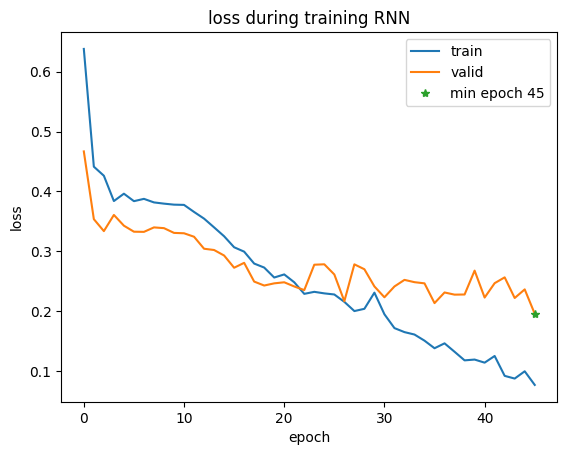

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.948  &  0.897  &          0.980  &     0.962  &0.833  &0.971 &0.913 &   0.743 &   0.988

Epoch:46, [Train] Loss: 0.073
Epoch:46, [Valid] Loss: 0.261
EarlyStopping counter: 1 out of 20
Epoch:47, [Train] Loss: 0.090
Epoch:47, [Valid] Loss: 0.228
EarlyStopping counter: 2 out of 20
Epoch:48, [Train] Loss: 0.074
Epoch:48, [Valid] Loss: 0.318
EarlyStopping counter: 3 out of 20
Epoch:49, [Train] Loss: 0.093
Epoch:49, [Valid] Loss: 0.281
EarlyStopping counter: 4 out of 20
Epoch:50, [Train] Loss: 0.125
Epoch:50, [Valid] Loss: 0.309
EarlyStopping counter: 5 out of 20
Train time: 1.397+/-0.053 ms


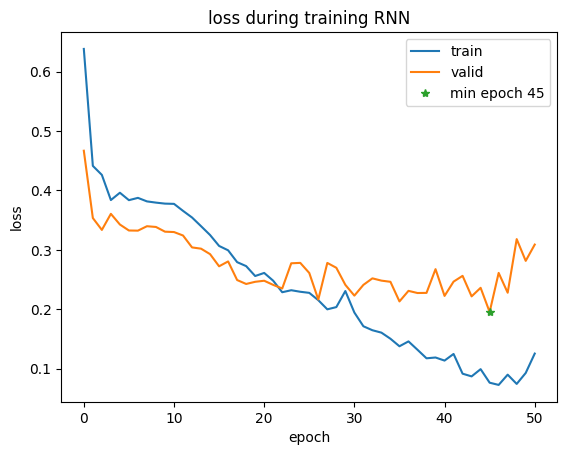

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.914  &  0.657  &          0.927  &     0.981  &0.333  &0.953 &0.910 &   0.432 &   0.988

Epoch:51, [Train] Loss: 0.137
Epoch:51, [Valid] Loss: 0.308
EarlyStopping counter: 6 out of 20
Epoch:52, [Train] Loss: 0.177
Epoch:52, [Valid] Loss: 0.558
EarlyStopping counter: 7 out of 20
Epoch:53, [Train] Loss: 0.321
Epoch:53, [Valid] Loss: 0.202
EarlyStopping counter: 8 out of 20
Epoch:54, [Train] Loss: 0.161
Epoch:54, [Valid] Loss: 0.214
EarlyStopping counter: 9 out of 20
Epoch:55, [Train] Loss: 0.111
Epoch:55, [Valid] Loss: 0.300
EarlyStopping counter: 10 out of 20
Train time: 1.400+/-0.052 ms


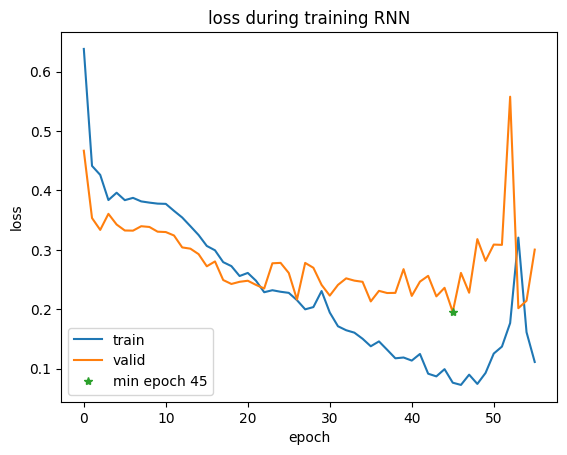

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.914  &  0.657  &          0.927  &     0.981  &0.333  &0.953 &0.936 &   0.432 &   0.992

Epoch:56, [Train] Loss: 0.126
Epoch:56, [Valid] Loss: 0.212
EarlyStopping counter: 11 out of 20
Epoch:57, [Train] Loss: 0.096
Epoch:57, [Valid] Loss: 0.170
	SAVE MODEL: loss: 0.195 -> 0.170 | runtime: 1.466 ms
Epoch:58, [Train] Loss: 0.093
Epoch:58, [Valid] Loss: 0.224
EarlyStopping counter: 1 out of 20
Epoch:59, [Train] Loss: 0.085
Epoch:59, [Valid] Loss: 0.250
EarlyStopping counter: 2 out of 20
Epoch:60, [Train] Loss: 0.075
Epoch:60, [Valid] Loss: 0.178
EarlyStopping counter: 3 out of 20
Train time: 1.400+/-0.052 ms


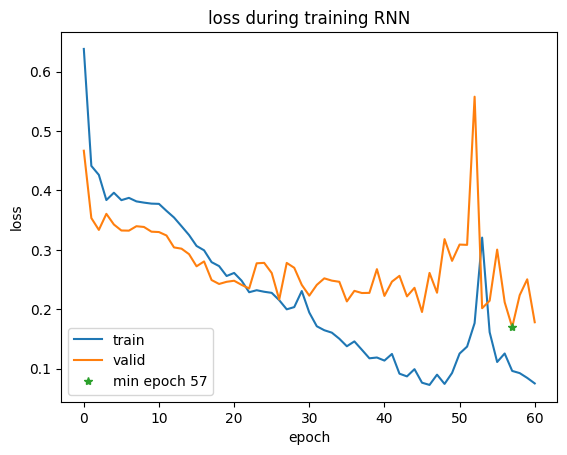

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.948  &  0.824  &          0.962  &     0.981  &0.667  &0.971 &0.936 &   0.703 &   0.992

Epoch:61, [Train] Loss: 0.060
Epoch:61, [Valid] Loss: 0.182
EarlyStopping counter: 4 out of 20
Epoch:62, [Train] Loss: 0.055
Epoch:62, [Valid] Loss: 0.131
	SAVE MODEL: loss: 0.170 -> 0.131 | runtime: 1.304 ms
Epoch:63, [Train] Loss: 0.053
Epoch:63, [Valid] Loss: 0.302
EarlyStopping counter: 1 out of 20
Epoch:64, [Train] Loss: 0.066
Epoch:64, [Valid] Loss: 0.148
EarlyStopping counter: 2 out of 20
Epoch:65, [Train] Loss: 0.057
Epoch:65, [Valid] Loss: 0.226
EarlyStopping counter: 3 out of 20
Train time: 1.400+/-0.052 ms


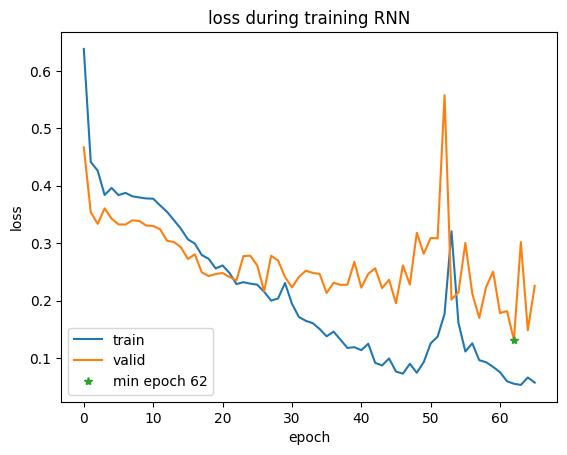

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.931  &  0.667  &          0.929  &     1.000  &0.333  &0.963 &0.942 &   0.556 &   0.993

Epoch:66, [Train] Loss: 0.079
Epoch:66, [Valid] Loss: 0.219
EarlyStopping counter: 4 out of 20
Epoch:67, [Train] Loss: 0.048
Epoch:67, [Valid] Loss: 0.230
EarlyStopping counter: 5 out of 20
Epoch:68, [Train] Loss: 0.040
Epoch:68, [Valid] Loss: 0.174
EarlyStopping counter: 6 out of 20
Epoch:69, [Train] Loss: 0.039
Epoch:69, [Valid] Loss: 0.179
EarlyStopping counter: 7 out of 20
Epoch:70, [Train] Loss: 0.027
Epoch:70, [Valid] Loss: 0.187
EarlyStopping counter: 8 out of 20
Train time: 1.400+/-0.051 ms


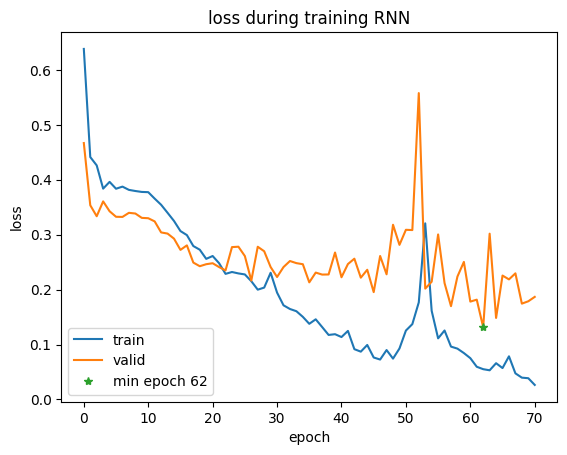

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.966  &  0.833  &          0.963  &     1.000  &0.667  &0.981 &0.920 &   0.801 &   0.988

Epoch:71, [Train] Loss: 0.022
Epoch:71, [Valid] Loss: 0.188
EarlyStopping counter: 9 out of 20
Epoch:72, [Train] Loss: 0.020
Epoch:72, [Valid] Loss: 0.179
EarlyStopping counter: 10 out of 20
Epoch:73, [Train] Loss: 0.014
Epoch:73, [Valid] Loss: 0.183
EarlyStopping counter: 11 out of 20
Epoch:74, [Train] Loss: 0.011
Epoch:74, [Valid] Loss: 0.185
EarlyStopping counter: 12 out of 20
Epoch:75, [Train] Loss: 0.008
Epoch:75, [Valid] Loss: 0.184
EarlyStopping counter: 13 out of 20
Train time: 1.399+/-0.050 ms


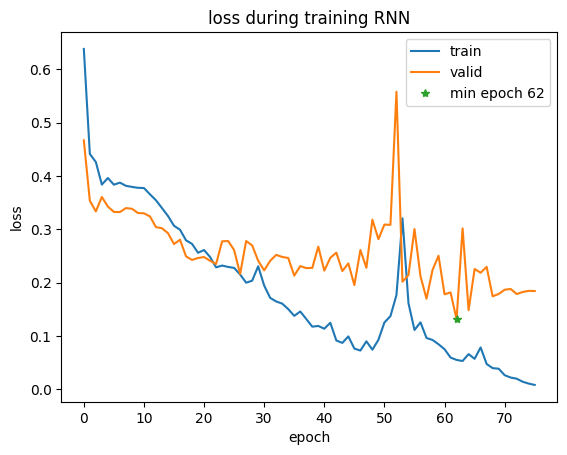

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.966  &  0.833  &          0.963  &     1.000  &0.667  &0.981 &0.946 &   0.801 &   0.993

Epoch:76, [Train] Loss: 0.007
Epoch:76, [Valid] Loss: 0.244
EarlyStopping counter: 14 out of 20
Epoch:77, [Train] Loss: 0.008
Epoch:77, [Valid] Loss: 0.186
EarlyStopping counter: 15 out of 20
Epoch:78, [Train] Loss: 0.006
Epoch:78, [Valid] Loss: 0.230
EarlyStopping counter: 16 out of 20
Epoch:79, [Train] Loss: 0.003
Epoch:79, [Valid] Loss: 0.364
EarlyStopping counter: 17 out of 20
Epoch:80, [Train] Loss: 0.044
Epoch:80, [Valid] Loss: 0.222
EarlyStopping counter: 18 out of 20
Train time: 1.402+/-0.050 ms


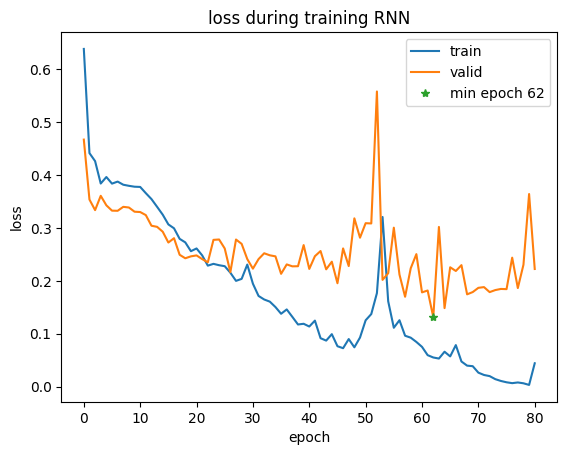

*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.966  &  0.907  &          0.981  &     0.981  &0.833  &0.981 &0.968 &   0.814 &   0.996

Epoch:81, [Train] Loss: 0.044
Epoch:81, [Valid] Loss: 0.600
EarlyStopping counter: 19 out of 20
Epoch:82, [Train] Loss: 0.099
Epoch:82, [Valid] Loss: 0.437
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2953125
Train time: 1.403+/-0.050 ms
best epoch: 62, min loss: 0.1314


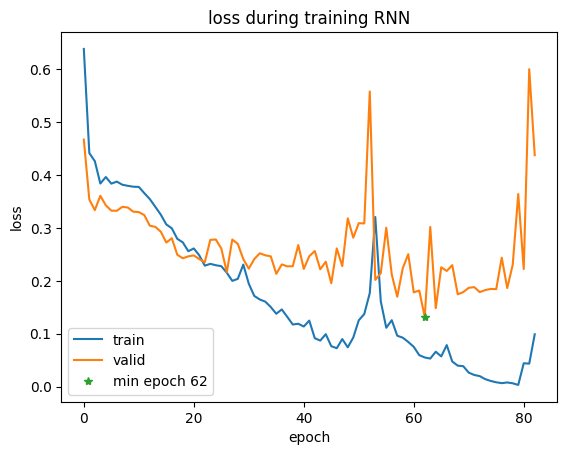

Found local copy...
Loading...


####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['HIA_Hou']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 0.226
*************** HIA_Hou ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.931  &  0.832  &          0.941  &     0.979  &0.684  &0.9

Done!


train: 1424 | valid: 203 | test: 407 | total: 2034
Alphabet: None



---> loader for ['PAMPA_NCATS']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 35




Model type:  RNN | Model parameters:  2948298
Epoch:0, [Train] Loss: 0.482
Epoch:0, [Valid] Loss: 0.443
	SAVE MODEL: loss: inf -> 0.443 | runtime: 0.956 ms
Epoch:1, [Train] Loss: 0.405
Epoch:1, [Valid] Loss: 0.446
EarlyStopping counter: 1 out of 20
Epoch:2, [Train] Loss: 0.406
Epoch:2, [Valid] Loss: 0.450
EarlyStopping counter: 2 out of 20
Epoch:3, [Train] Loss: 0.404
Epoch:3, [Valid] Loss: 0.449
EarlyStopping counter: 3 out of 20
Epoch:4, [Train] Loss: 0.404
Epoch:4, [Valid] Loss: 0.442
	SAVE MODEL: loss: 0.443 -> 0.442 | runtime: 0.898 ms
Epoch:5, [Train] Loss: 0.405
Epoch:5, [Valid] Loss: 0.447
EarlyStopping counter: 1 out of 20
Train time: 0.943+/-0.025 ms


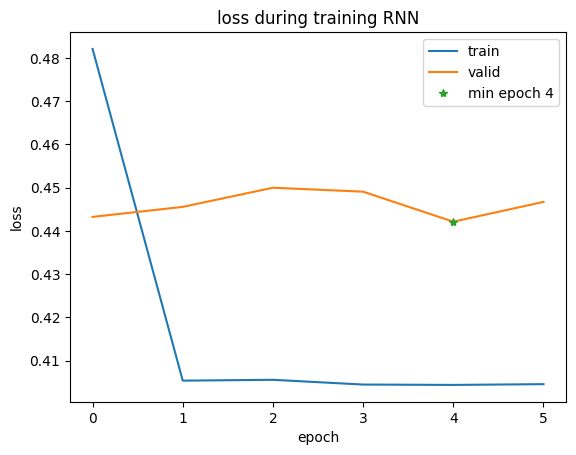

*************** PAMPA_NCATS ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 170 33 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.500  &          0.837  &     1.000  &0.000  &0.912 &0.598 &  N/A &   0.879

Epoch:6, [Train] Loss: 0.406
Epoch:6, [Valid] Loss: 0.448
EarlyStopping counter: 2 out of 20
Epoch:7, [Train] Loss: 0.400
Epoch:7, [Valid] Loss: 0.441
	SAVE MODEL: loss: 0.442 -> 0.441 | runtime: 0.950 ms
Epoch:8, [Train] Loss: 0.399
Epoch:8, [Valid] Loss: 0.437
	SAVE MODEL: loss: 0.441 -> 0.437 | runtime: 0.984 ms
Epoch:9, [Train] Loss: 0.404
Epoch:9, [Valid] Loss: 0.451
EarlyStopping counter: 1 out of 20
Epoch:10, [Train] Loss: 0.406
Epoch:10, [Valid] Loss: 0.452
EarlyStopping counter: 2 out of 20
Train time: 0.954+/-0.023 ms


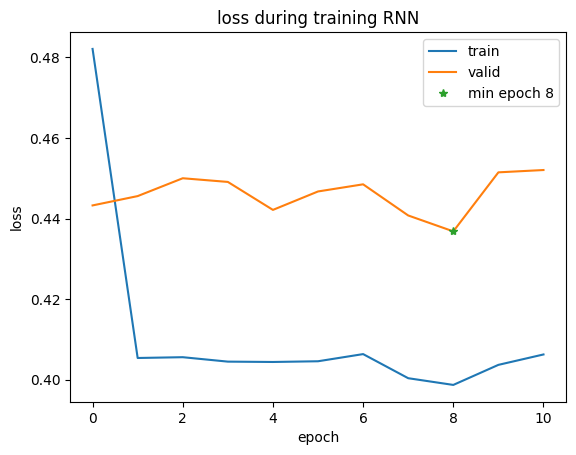

*************** PAMPA_NCATS ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 170 33 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.500  &          0.837  &     1.000  &0.000  &0.912 &0.598 &  N/A &   0.882

Epoch:11, [Train] Loss: 0.396
Epoch:11, [Valid] Loss: 0.440
EarlyStopping counter: 3 out of 20
Epoch:12, [Train] Loss: 0.391
Epoch:12, [Valid] Loss: 0.464
EarlyStopping counter: 4 out of 20
Epoch:13, [Train] Loss: 0.395
Epoch:13, [Valid] Loss: 0.437
EarlyStopping counter: 5 out of 20
Epoch:14, [Train] Loss: 0.392
Epoch:14, [Valid] Loss: 0.441
EarlyStopping counter: 6 out of 20
Epoch:15, [Train] Loss: 0.388
Epoch:15, [Valid] Loss: 0.442
EarlyStopping counter: 7 out of 20
Train time: 0.965+/-0.027 ms


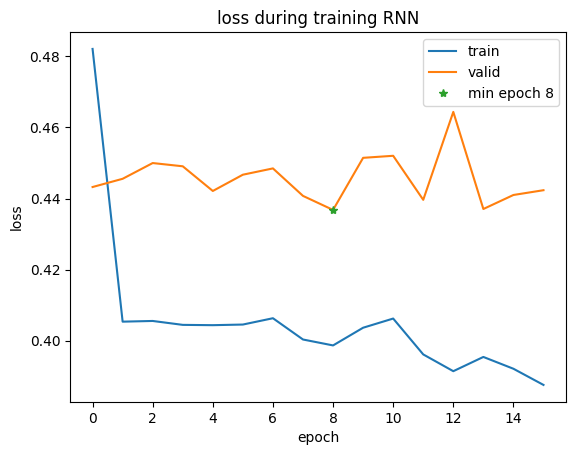

*************** PAMPA_NCATS ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.512  &          0.841  &     0.994  &0.030  &0.911 &0.595 &   0.091 &   0.868

Epoch:16, [Train] Loss: 0.389
Epoch:16, [Valid] Loss: 0.441
EarlyStopping counter: 8 out of 20
Epoch:17, [Train] Loss: 0.391
Epoch:17, [Valid] Loss: 0.445
EarlyStopping counter: 9 out of 20
Epoch:18, [Train] Loss: 0.390
Epoch:18, [Valid] Loss: 0.445
EarlyStopping counter: 10 out of 20
Epoch:19, [Train] Loss: 0.388
Epoch:19, [Valid] Loss: 0.439
EarlyStopping counter: 11 out of 20
Epoch:20, [Train] Loss: 0.387
Epoch:20, [Valid] Loss: 0.441
EarlyStopping counter: 12 out of 20
Train time: 0.964+/-0.028 ms


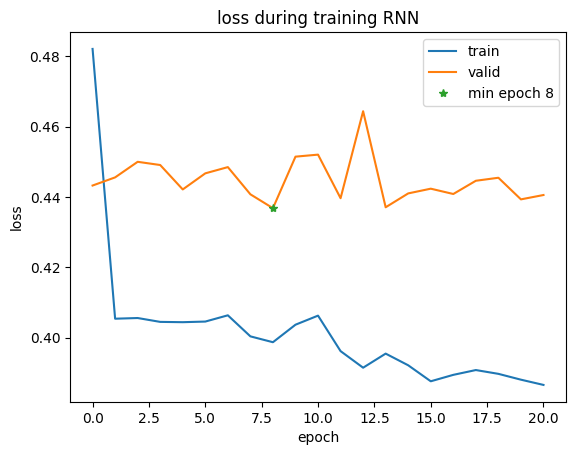

*************** PAMPA_NCATS ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 170 33 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.500  &          0.837  &     1.000  &0.000  &0.912 &0.573 &  N/A &   0.862

Epoch:21, [Train] Loss: 0.383
Epoch:21, [Valid] Loss: 0.450
EarlyStopping counter: 13 out of 20
Epoch:22, [Train] Loss: 0.379
Epoch:22, [Valid] Loss: 0.449
EarlyStopping counter: 14 out of 20
Epoch:23, [Train] Loss: 0.376
Epoch:23, [Valid] Loss: 0.444
EarlyStopping counter: 15 out of 20
Epoch:24, [Train] Loss: 0.375
Epoch:24, [Valid] Loss: 0.450
EarlyStopping counter: 16 out of 20
Epoch:25, [Train] Loss: 0.375
Epoch:25, [Valid] Loss: 0.429
	SAVE MODEL: loss: 0.437 -> 0.429 | runtime: 0.965 ms
Train time: 0.965+/-0.029 ms


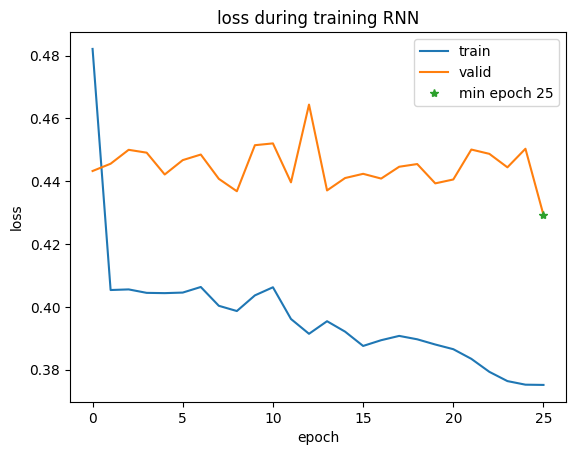

*************** PAMPA_NCATS ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 170 33 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.500  &          0.837  &     1.000  &0.000  &0.912 &0.589 &  N/A &   0.870

Epoch:26, [Train] Loss: 0.370
Epoch:26, [Valid] Loss: 0.453
EarlyStopping counter: 1 out of 20
Epoch:27, [Train] Loss: 0.375
Epoch:27, [Valid] Loss: 0.439
EarlyStopping counter: 2 out of 20
Epoch:28, [Train] Loss: 0.371
Epoch:28, [Valid] Loss: 0.419
	SAVE MODEL: loss: 0.429 -> 0.419 | runtime: 0.962 ms
Epoch:29, [Train] Loss: 0.372
Epoch:29, [Valid] Loss: 0.437
EarlyStopping counter: 1 out of 20
Epoch:30, [Train] Loss: 0.370
Epoch:30, [Valid] Loss: 0.466
EarlyStopping counter: 2 out of 20
Train time: 0.967+/-0.027 ms


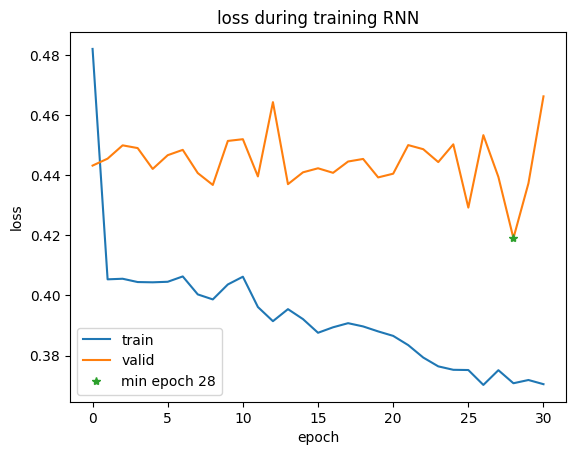

*************** PAMPA_NCATS ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.833  &  0.497  &          0.837  &     0.994  &0.000  &0.909 &0.607 &  -0.031 &   0.887

Epoch:31, [Train] Loss: 0.371
Epoch:31, [Valid] Loss: 0.438
EarlyStopping counter: 3 out of 20
Epoch:32, [Train] Loss: 0.360
Epoch:32, [Valid] Loss: 0.438
EarlyStopping counter: 4 out of 20
Epoch:33, [Train] Loss: 0.354
Epoch:33, [Valid] Loss: 0.438
EarlyStopping counter: 5 out of 20
Epoch:34, [Train] Loss: 0.349
Epoch:34, [Valid] Loss: 0.506
EarlyStopping counter: 6 out of 20
Epoch:35, [Train] Loss: 0.368
Epoch:35, [Valid] Loss: 0.447
EarlyStopping counter: 7 out of 20
Train time: 0.969+/-0.027 ms


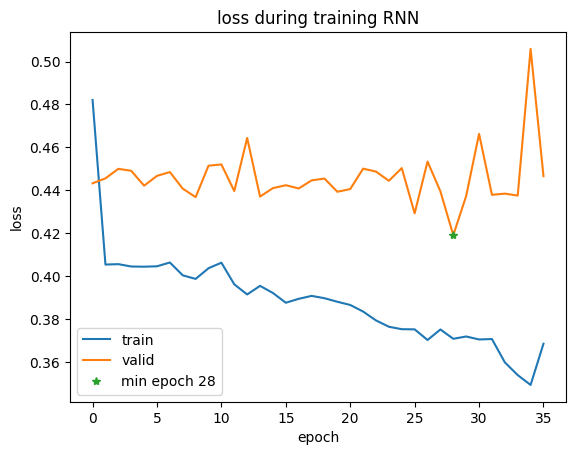

*************** PAMPA_NCATS ***************
equation for MCC is (TP*TN-FP*FN)*1.0/(math.sqrt(temp))
TP, FP, TN, FN 170 33 0 0
temp=0
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.837  &  0.500  &          0.837  &     1.000  &0.000  &0.912 &0.588 &  N/A &   0.880

Epoch:36, [Train] Loss: 0.358
Epoch:36, [Valid] Loss: 0.431
EarlyStopping counter: 8 out of 20
Epoch:37, [Train] Loss: 0.353
Epoch:37, [Valid] Loss: 0.440
EarlyStopping counter: 9 out of 20
Epoch:38, [Train] Loss: 0.350
Epoch:38, [Valid] Loss: 0.446
EarlyStopping counter: 10 out of 20
Epoch:39, [Train] Loss: 0.343
Epoch:39, [Valid] Loss: 0.480
EarlyStopping counter: 11 out of 20
Epoch:40, [Train] Loss: 0.338
Epoch:40, [Valid] Loss: 0.449
EarlyStopping counter: 12 out of 20
Train time: 0.971+/-0.026 ms


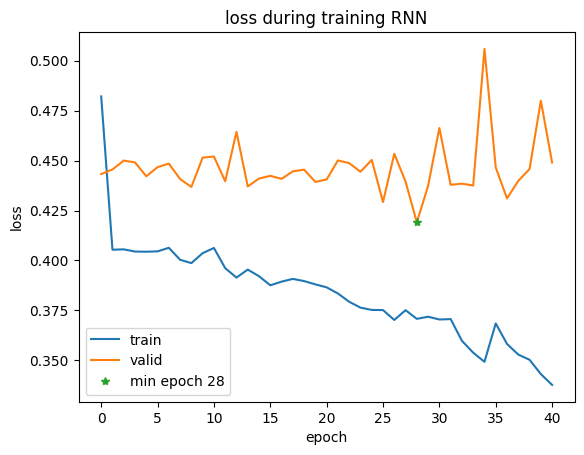

*************** PAMPA_NCATS ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.847  &  0.567  &          0.856  &     0.982  &0.152  &0.915 &0.606 &   0.254 &   0.885

Epoch:41, [Train] Loss: 0.343
Epoch:41, [Valid] Loss: 0.461
EarlyStopping counter: 13 out of 20
Epoch:42, [Train] Loss: 0.338
Epoch:42, [Valid] Loss: 0.466
EarlyStopping counter: 14 out of 20
Epoch:43, [Train] Loss: 0.323
Epoch:43, [Valid] Loss: 0.450
EarlyStopping counter: 15 out of 20
Epoch:44, [Train] Loss: 0.324
Epoch:44, [Valid] Loss: 0.475
EarlyStopping counter: 16 out of 20
Epoch:45, [Train] Loss: 0.338
Epoch:45, [Valid] Loss: 0.453
EarlyStopping counter: 17 out of 20
Train time: 0.970+/-0.026 ms


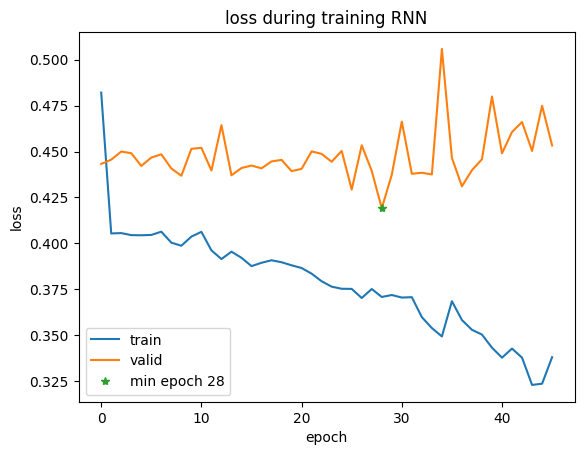

*************** PAMPA_NCATS ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.828  &  0.531  &          0.846  &     0.971  &0.091  &0.904 &0.616 &   0.117 &   0.891

Epoch:46, [Train] Loss: 0.319
Epoch:46, [Valid] Loss: 0.483
EarlyStopping counter: 18 out of 20
Epoch:47, [Train] Loss: 0.313
Epoch:47, [Valid] Loss: 0.477
EarlyStopping counter: 19 out of 20
Epoch:48, [Train] Loss: 0.310
Epoch:48, [Valid] Loss: 0.486
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2948298
Train time: 0.971+/-0.025 ms
best epoch: 28, min loss: 0.4191


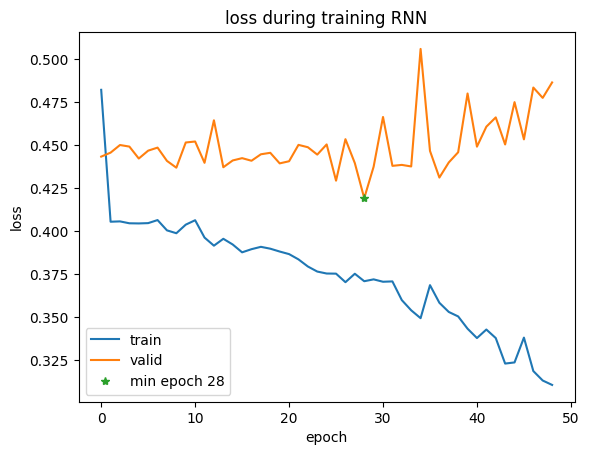

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '8', '=', '@', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'Na', 'O', 'P', 'S', '[', '\\', ']']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['PAMPA_NCATS']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...


[Test] Loss: 0.446
*************** PAMPA_NCATS ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.840  &  0.504  &          0.846  &     0.991  &0.016  &0.913 &0.526 &   0.026 &   0.855

collect data for:  ['hERG_Karim']


Done!


train: 9412 | valid: 1344 | test: 2689 | total: 13445
Alphabet: None



---> loader for ['hERG_Karim']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 42




Model type:  RNN | Model parameters:  2959589
Epoch:0, [Train] Loss: 0.691
Epoch:0, [Valid] Loss: 0.686
	SAVE MODEL: loss: inf -> 0.686 | runtime: 0.756 ms
Epoch:1, [Train] Loss: 0.657
Epoch:1, [Valid] Loss: 0.638
	SAVE MODEL: loss: 0.686 -> 0.638 | runtime: 0.762 ms
Epoch:2, [Train] Loss: 0.619
Epoch:2, [Valid] Loss: 0.606
	SAVE MODEL: loss: 0.638 -> 0.606 | runtime: 0.766 ms
Epoch:3, [Train] Loss: 0.615
Epoch:3, [Valid] Loss: 0.600
	SAVE MODEL: loss: 0.606 -> 0.600 | runtime: 0.756 ms
Epoch:4, [Train] Loss: 0.603
Epoch:4, [Valid] Loss: 0.604
EarlyStopping counter: 1 out of 20
Epoch:5, [Train] Loss: 0.598
Epoch:5, [Valid] Loss: 0.595
	SAVE MODEL: loss: 0.600 -> 0.595 | 

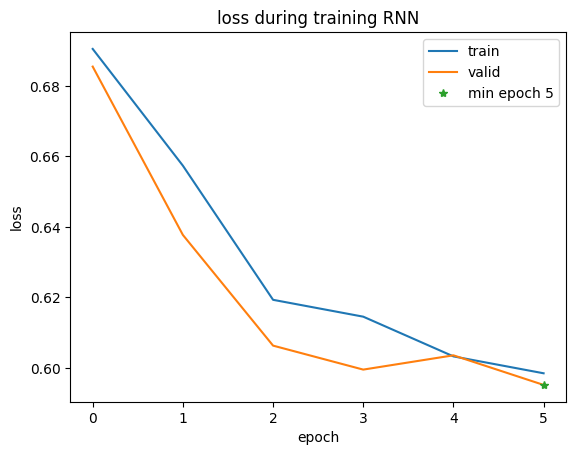

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.684  &  0.684  &          0.676  &     0.687  &0.681  &0.681 &0.751 &   0.368 &   0.734

Epoch:6, [Train] Loss: 0.593
Epoch:6, [Valid] Loss: 0.603
EarlyStopping counter: 1 out of 20
Epoch:7, [Train] Loss: 0.591
Epoch:7, [Valid] Loss: 0.602
EarlyStopping counter: 2 out of 20
Epoch:8, [Train] Loss: 0.585
Epoch:8, [Valid] Loss: 0.601
EarlyStopping counter: 3 out of 20
Epoch:9, [Train] Loss: 0.580
Epoch:9, [Valid] Loss: 0.591
	SAVE MODEL: loss: 0.595 -> 0.591 | runtime: 0.759 ms
Epoch:10, [Train] Loss: 0.572
Epoch:10, [Valid] Loss: 0.607
EarlyStopping counter: 1 out of 20
Train time: 0.763+/-0.004 ms


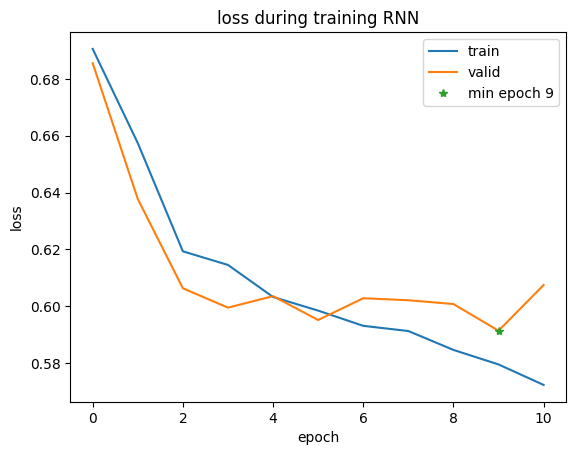

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.691  &  0.693  &          0.654  &     0.791  &0.594  &0.716 &0.767 &   0.393 &   0.761

Epoch:11, [Train] Loss: 0.561
Epoch:11, [Valid] Loss: 0.570
	SAVE MODEL: loss: 0.591 -> 0.570 | runtime: 0.769 ms
Epoch:12, [Train] Loss: 0.556
Epoch:12, [Valid] Loss: 0.564
	SAVE MODEL: loss: 0.570 -> 0.564 | runtime: 0.765 ms
Epoch:13, [Train] Loss: 0.545
Epoch:13, [Valid] Loss: 0.550
	SAVE MODEL: loss: 0.564 -> 0.550 | runtime: 0.761 ms
Epoch:14, [Train] Loss: 0.528
Epoch:14, [Valid] Loss: 0.547
	SAVE MODEL: loss: 0.550 -> 0.547 | runtime: 0.759 ms
Epoch:15, [Train] Loss: 0.515
Epoch:15, [Valid] Loss: 0.526
	SAVE MODEL: loss: 0.547 -> 0.526 | runtime: 0.759 ms
Train time: 0.763+/-0.004 ms


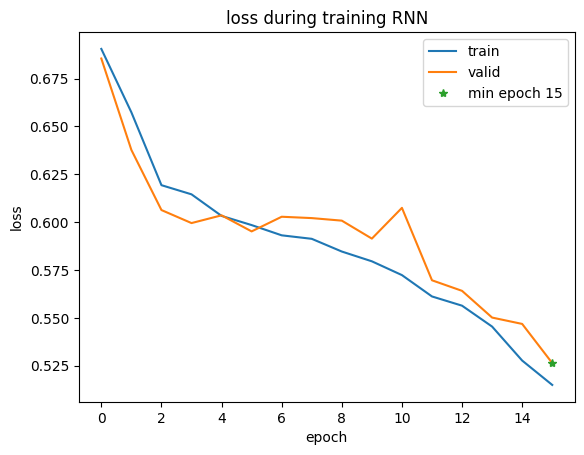

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.739  &  0.738  &          0.757  &     0.691  &0.785  &0.723 &0.811 &   0.479 &   0.816

Epoch:16, [Train] Loss: 0.503
Epoch:16, [Valid] Loss: 0.522
	SAVE MODEL: loss: 0.526 -> 0.522 | runtime: 0.759 ms
Epoch:17, [Train] Loss: 0.493
Epoch:17, [Valid] Loss: 0.570
EarlyStopping counter: 1 out of 20
Epoch:18, [Train] Loss: 0.473
Epoch:18, [Valid] Loss: 0.507
	SAVE MODEL: loss: 0.522 -> 0.507 | runtime: 0.766 ms
Epoch:19, [Train] Loss: 0.458
Epoch:19, [Valid] Loss: 0.526
EarlyStopping counter: 1 out of 20
Epoch:20, [Train] Loss: 0.439
Epoch:20, [Valid] Loss: 0.491
	SAVE MODEL: loss: 0.507 -> 0.491 | runtime: 0.766 ms
Train time: 0.763+/-0.004 ms


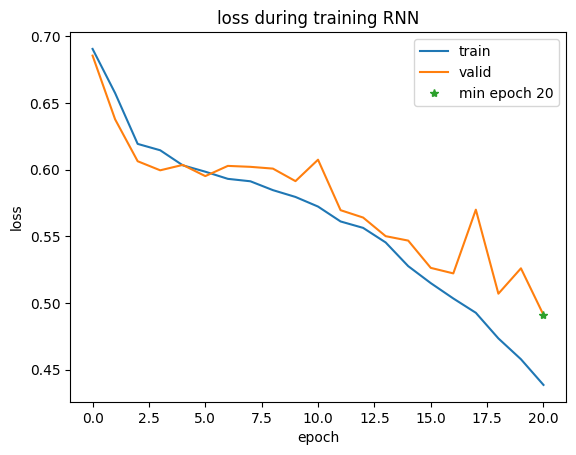

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.767  &  0.766  &          0.809  &     0.690  &0.842  &0.744 &0.848 &   0.539 &   0.848

Epoch:21, [Train] Loss: 0.415
Epoch:21, [Valid] Loss: 0.531
EarlyStopping counter: 1 out of 20
Epoch:22, [Train] Loss: 0.393
Epoch:22, [Valid] Loss: 0.495
EarlyStopping counter: 2 out of 20
Epoch:23, [Train] Loss: 0.369
Epoch:23, [Valid] Loss: 0.511
EarlyStopping counter: 3 out of 20
Epoch:24, [Train] Loss: 0.345
Epoch:24, [Valid] Loss: 0.528
EarlyStopping counter: 4 out of 20
Epoch:25, [Train] Loss: 0.330
Epoch:25, [Valid] Loss: 0.531
EarlyStopping counter: 5 out of 20
Train time: 0.763+/-0.004 ms


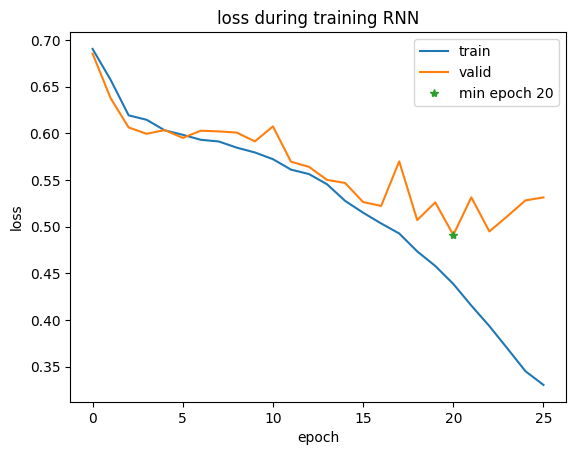

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.767  &  0.767  &          0.751  &     0.788  &0.747  &0.769 &0.847 &   0.535 &   0.852

Epoch:26, [Train] Loss: 0.313
Epoch:26, [Valid] Loss: 0.548
EarlyStopping counter: 6 out of 20
Epoch:27, [Train] Loss: 0.273
Epoch:27, [Valid] Loss: 0.529
EarlyStopping counter: 7 out of 20
Epoch:28, [Train] Loss: 0.249
Epoch:28, [Valid] Loss: 0.567
EarlyStopping counter: 8 out of 20
Epoch:29, [Train] Loss: 0.220
Epoch:29, [Valid] Loss: 0.570
EarlyStopping counter: 9 out of 20
Epoch:30, [Train] Loss: 0.190
Epoch:30, [Valid] Loss: 0.649
EarlyStopping counter: 10 out of 20
Train time: 0.763+/-0.005 ms


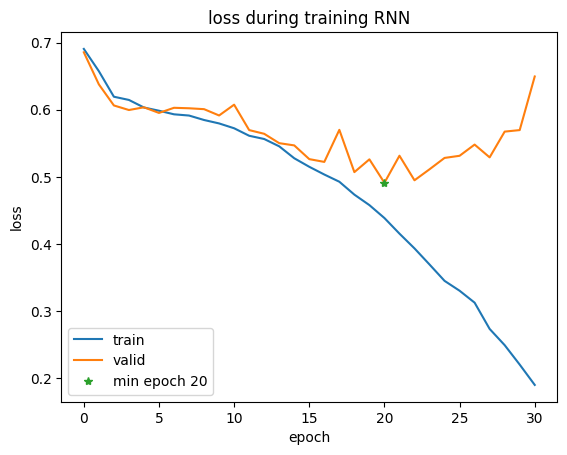

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.769  &  0.768  &          0.787  &     0.726  &0.810  &0.755 &0.849 &   0.538 &   0.846

Epoch:31, [Train] Loss: 0.181
Epoch:31, [Valid] Loss: 0.644
EarlyStopping counter: 11 out of 20
Epoch:32, [Train] Loss: 0.161
Epoch:32, [Valid] Loss: 0.673
EarlyStopping counter: 12 out of 20
Epoch:33, [Train] Loss: 0.145
Epoch:33, [Valid] Loss: 0.662
EarlyStopping counter: 13 out of 20
Epoch:34, [Train] Loss: 0.124
Epoch:34, [Valid] Loss: 0.710
EarlyStopping counter: 14 out of 20
Epoch:35, [Train] Loss: 0.120
Epoch:35, [Valid] Loss: 0.761
EarlyStopping counter: 15 out of 20
Train time: 0.764+/-0.005 ms


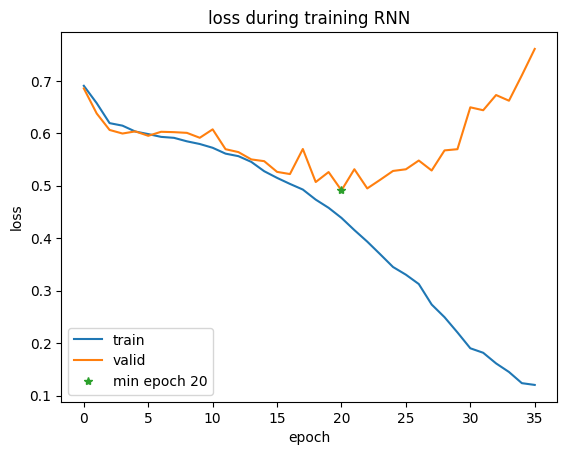

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.782  &  0.782  &          0.767  &     0.799  &0.766  &0.783 &0.871 &   0.565 &   0.867

Epoch:36, [Train] Loss: 0.108
Epoch:36, [Valid] Loss: 0.749
EarlyStopping counter: 16 out of 20
Epoch:37, [Train] Loss: 0.101
Epoch:37, [Valid] Loss: 0.745
EarlyStopping counter: 17 out of 20
Epoch:38, [Train] Loss: 0.103
Epoch:38, [Valid] Loss: 0.792
EarlyStopping counter: 18 out of 20
Epoch:39, [Train] Loss: 0.078
Epoch:39, [Valid] Loss: 0.864
EarlyStopping counter: 19 out of 20
Epoch:40, [Train] Loss: 0.071
Epoch:40, [Valid] Loss: 0.887
EarlyStopping counter: 20 out of 20
Train time: 0.764+/-0.005 ms


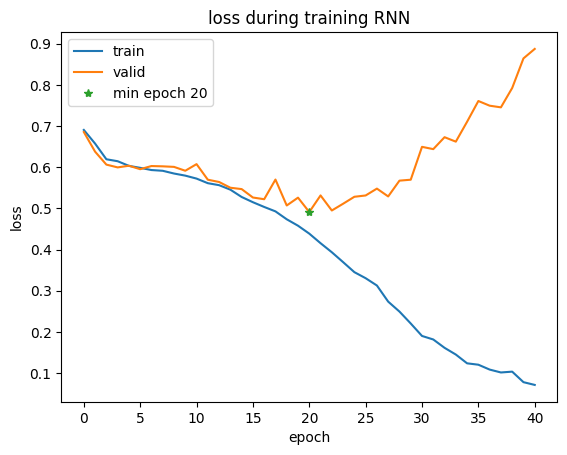

*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.784  &  0.785  &          0.767  &     0.806  &0.763  &0.786 &0.866 &   0.569 &   0.867

early stop
Model parameters:  2959589
Train time: 0.764+/-0.005 ms
best epoch: 20, min loss: 0.4911


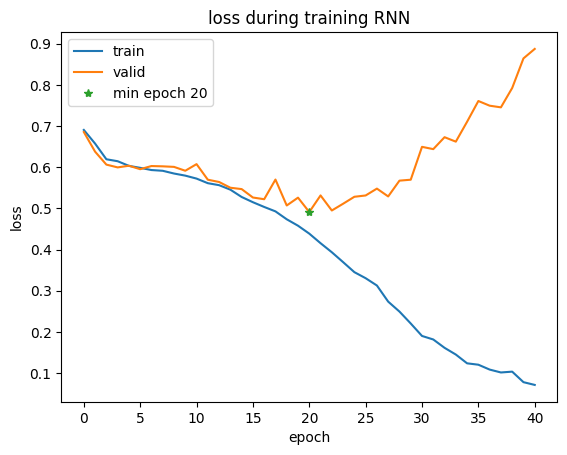

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '.', '/', '1', '2', '3', '4', '5', '6', '7', '=', '@', 'Au', 'B', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'Na', 'O', 'P', 'S', 'Si', '[', '\\', ']', 'c', 'e', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['hERG_Karim']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt


Found local copy...
Loading...


[Test] Loss: 0.476
*************** hERG_Karim ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.772  &  0.772  &          0.826  &     0.687  &0.856  &0.750 &0.859 &   0.551 &   0.863

collect data for:  ['AMES']


Done!


train: 5094 | valid: 728 | test: 1456 | total: 7278
Alphabet: None



---> loader for ['AMES']
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
--> preparing data loader for model type  RNN
RNN, no vocab provided, update vocab using dataset
updated vocab length: 37




Model type:  RNN | Model parameters:  2951514
Epoch:0, [Train] Loss: 0.662
Epoch:0, [Valid] Loss: 0.615
	SAVE MODEL: loss: inf -> 0.615 | runtime: 0.748 ms
Epoch:1, [Train] Loss: 0.617
Epoch:1, [Valid] Loss: 0.605
	SAVE MODEL: loss: 0.615 -> 0.605 | runtime: 0.731 ms
Epoch:2, [Train] Loss: 0.604
Epoch:2, [Valid] Loss: 0.600
	SAVE MODEL: loss: 0.605 -> 0.600 | runtime: 0.759 ms
Epoch:3, [Train] Loss: 0.596
Epoch:3, [Valid] Loss: 0.596
	SAVE MODEL: loss: 0.600 -> 0.596 | runtime: 0.746 ms
Epoch:4, [Train] Loss: 0.591
Epoch:4, [Valid] Loss: 0.603
EarlyStopping counter: 1 out of 20
Epoch:5, [Train] Loss: 0.585
Epoch:5, [Valid] Loss: 0.599
EarlyStopping counter: 2 out of 20
Train tim

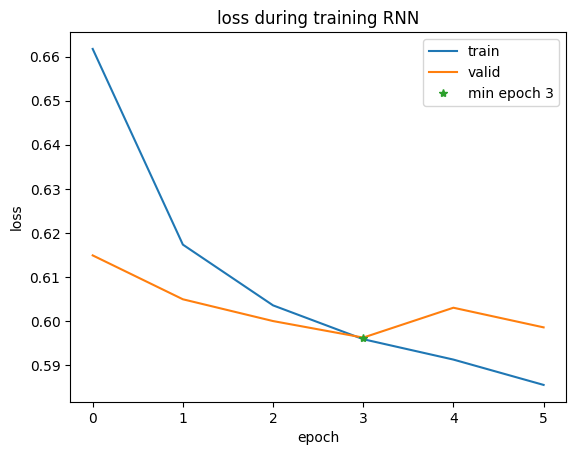

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.683  &  0.690  &          0.769  &     0.638  &0.743  &0.697 &0.755 &   0.377 &   0.784

Epoch:6, [Train] Loss: 0.582
Epoch:6, [Valid] Loss: 0.599
EarlyStopping counter: 3 out of 20
Epoch:7, [Train] Loss: 0.582
Epoch:7, [Valid] Loss: 0.592
	SAVE MODEL: loss: 0.596 -> 0.592 | runtime: 0.760 ms
Epoch:8, [Train] Loss: 0.571
Epoch:8, [Valid] Loss: 0.575
	SAVE MODEL: loss: 0.592 -> 0.575 | runtime: 0.735 ms
Epoch:9, [Train] Loss: 0.564
Epoch:9, [Valid] Loss: 0.568
	SAVE MODEL: loss: 0.575 -> 0.568 | runtime: 0.756 ms
Epoch:10, [Train] Loss: 0.563
Epoch:10, [Valid] Loss: 0.564
	SAVE MODEL: loss: 0.568 -> 0.564 | runtime: 0.756 ms
Train time: 0.751+/-0.010 ms


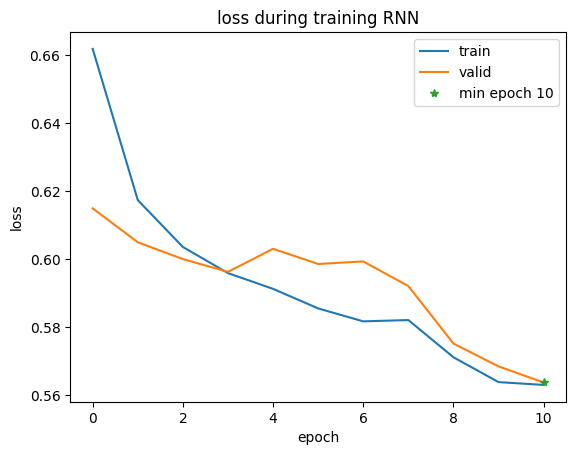

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.716  &  0.699  &          0.723  &     0.815  &0.582  &0.767 &0.777 &   0.411 &   0.793

Epoch:11, [Train] Loss: 0.551
Epoch:11, [Valid] Loss: 0.560
	SAVE MODEL: loss: 0.564 -> 0.560 | runtime: 0.736 ms
Epoch:12, [Train] Loss: 0.541
Epoch:12, [Valid] Loss: 0.542
	SAVE MODEL: loss: 0.560 -> 0.542 | runtime: 0.748 ms
Epoch:13, [Train] Loss: 0.539
Epoch:13, [Valid] Loss: 0.542
EarlyStopping counter: 1 out of 20
Epoch:14, [Train] Loss: 0.520
Epoch:14, [Valid] Loss: 0.528
	SAVE MODEL: loss: 0.542 -> 0.528 | runtime: 0.751 ms
Epoch:15, [Train] Loss: 0.510
Epoch:15, [Valid] Loss: 0.531
EarlyStopping counter: 1 out of 20
Train time: 0.750+/-0.009 ms


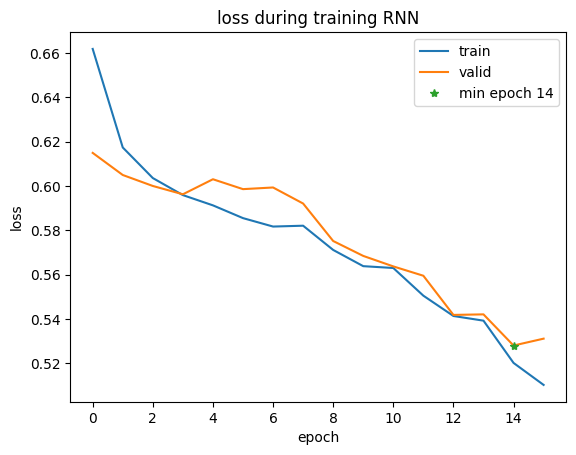

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.745  &  0.743  &          0.791  &     0.753  &0.733  &0.771 &0.812 &   0.483 &   0.828

Epoch:16, [Train] Loss: 0.501
Epoch:16, [Valid] Loss: 0.516
	SAVE MODEL: loss: 0.528 -> 0.516 | runtime: 0.750 ms
Epoch:17, [Train] Loss: 0.493
Epoch:17, [Valid] Loss: 0.517
EarlyStopping counter: 1 out of 20
Epoch:18, [Train] Loss: 0.489
Epoch:18, [Valid] Loss: 0.510
	SAVE MODEL: loss: 0.516 -> 0.510 | runtime: 0.751 ms
Epoch:19, [Train] Loss: 0.475
Epoch:19, [Valid] Loss: 0.494
	SAVE MODEL: loss: 0.510 -> 0.494 | runtime: 0.747 ms
Epoch:20, [Train] Loss: 0.459
Epoch:20, [Valid] Loss: 0.490
	SAVE MODEL: loss: 0.494 -> 0.490 | runtime: 0.751 ms
Train time: 0.750+/-0.008 ms


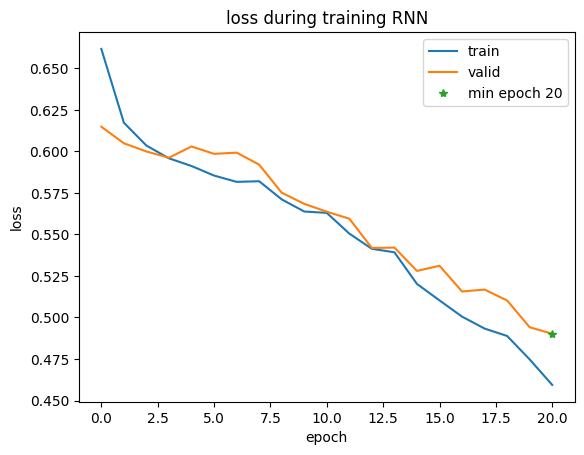

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.777  &  0.769  &          0.794  &     0.825  &0.714  &0.809 &0.842 &   0.543 &   0.866

Epoch:21, [Train] Loss: 0.447
Epoch:21, [Valid] Loss: 0.519
EarlyStopping counter: 1 out of 20
Epoch:22, [Train] Loss: 0.439
Epoch:22, [Valid] Loss: 0.499
EarlyStopping counter: 2 out of 20
Epoch:23, [Train] Loss: 0.421
Epoch:23, [Valid] Loss: 0.489
	SAVE MODEL: loss: 0.490 -> 0.489 | runtime: 0.767 ms
Epoch:24, [Train] Loss: 0.413
Epoch:24, [Valid] Loss: 0.490
EarlyStopping counter: 1 out of 20
Epoch:25, [Train] Loss: 0.399
Epoch:25, [Valid] Loss: 0.541
EarlyStopping counter: 2 out of 20
Train time: 0.750+/-0.008 ms


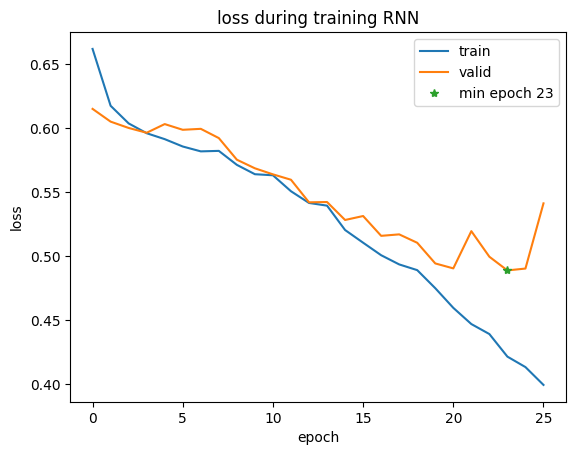

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.764  &  0.745  &          0.753  &     0.875  &0.614  &0.809 &0.836 &   0.513 &   0.863

Epoch:26, [Train] Loss: 0.373
Epoch:26, [Valid] Loss: 0.500
EarlyStopping counter: 3 out of 20
Epoch:27, [Train] Loss: 0.355
Epoch:27, [Valid] Loss: 0.518
EarlyStopping counter: 4 out of 20
Epoch:28, [Train] Loss: 0.338
Epoch:28, [Valid] Loss: 0.515
EarlyStopping counter: 5 out of 20
Epoch:29, [Train] Loss: 0.311
Epoch:29, [Valid] Loss: 0.540
EarlyStopping counter: 6 out of 20
Epoch:30, [Train] Loss: 0.292
Epoch:30, [Valid] Loss: 0.576
EarlyStopping counter: 7 out of 20
Train time: 0.751+/-0.009 ms


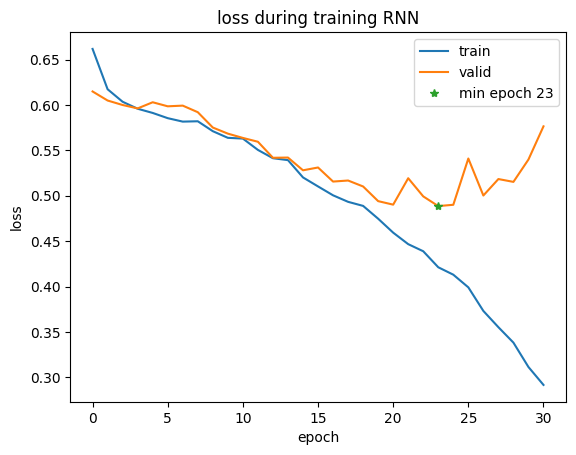

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.779  &  0.771  &          0.795  &     0.827  &0.714  &0.811 &0.849 &   0.546 &   0.878

Epoch:31, [Train] Loss: 0.275
Epoch:31, [Valid] Loss: 0.576
EarlyStopping counter: 8 out of 20
Epoch:32, [Train] Loss: 0.262
Epoch:32, [Valid] Loss: 0.568
EarlyStopping counter: 9 out of 20
Epoch:33, [Train] Loss: 0.253
Epoch:33, [Valid] Loss: 0.596
EarlyStopping counter: 10 out of 20
Epoch:34, [Train] Loss: 0.199
Epoch:34, [Valid] Loss: 0.686
EarlyStopping counter: 11 out of 20
Epoch:35, [Train] Loss: 0.200
Epoch:35, [Valid] Loss: 0.684
EarlyStopping counter: 12 out of 20
Train time: 0.752+/-0.009 ms


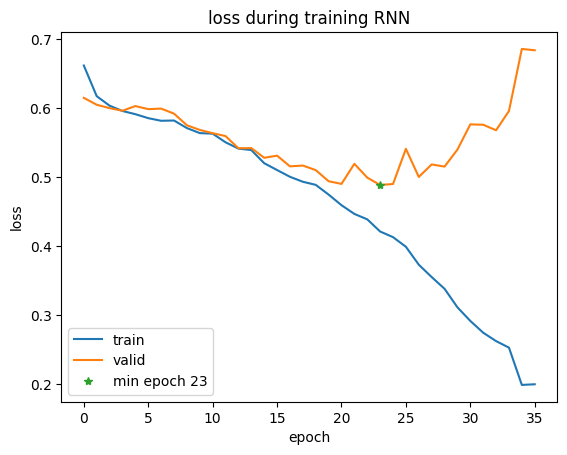

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.780  &  0.776  &          0.810  &     0.806  &0.746  &0.808 &0.839 &   0.551 &   0.855

Epoch:36, [Train] Loss: 0.175
Epoch:36, [Valid] Loss: 0.746
EarlyStopping counter: 13 out of 20
Epoch:37, [Train] Loss: 0.157
Epoch:37, [Valid] Loss: 0.723
EarlyStopping counter: 14 out of 20
Epoch:38, [Train] Loss: 0.161
Epoch:38, [Valid] Loss: 0.756
EarlyStopping counter: 15 out of 20
Epoch:39, [Train] Loss: 0.141
Epoch:39, [Valid] Loss: 0.890
EarlyStopping counter: 16 out of 20
Epoch:40, [Train] Loss: 0.126
Epoch:40, [Valid] Loss: 0.798
EarlyStopping counter: 17 out of 20
Train time: 0.751+/-0.009 ms


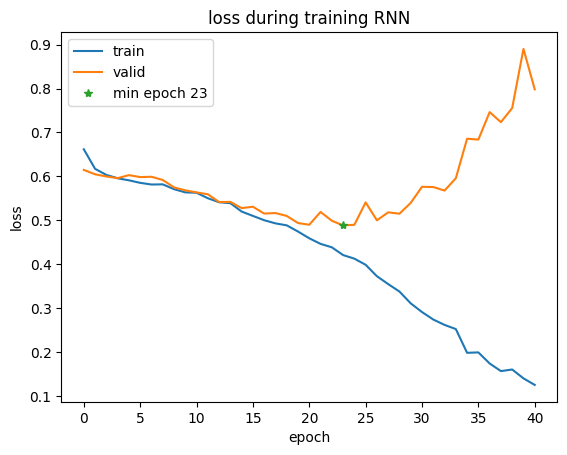

*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.783  &  0.778  &          0.809  &     0.813  &0.743  &0.811 &0.845 &   0.556 &   0.862

Epoch:41, [Train] Loss: 0.117
Epoch:41, [Valid] Loss: 0.876
EarlyStopping counter: 18 out of 20
Epoch:42, [Train] Loss: 0.097
Epoch:42, [Valid] Loss: 0.937
EarlyStopping counter: 19 out of 20
Epoch:43, [Train] Loss: 0.086
Epoch:43, [Valid] Loss: 0.924
EarlyStopping counter: 20 out of 20
early stop
Model parameters:  2951514
Train time: 0.751+/-0.008 ms
best epoch: 23, min loss: 0.4886


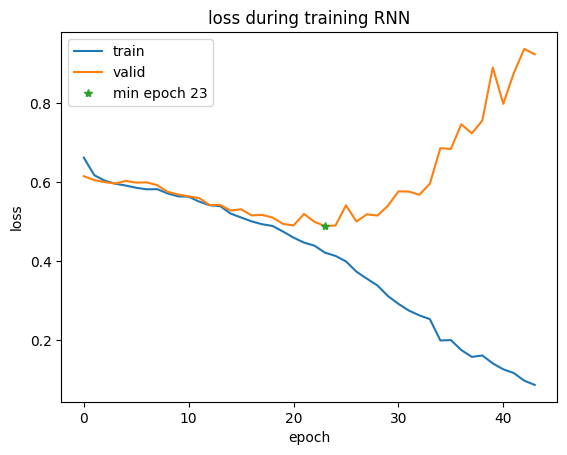

####################################################################
############################## CONFIG ##############################
####################################################################
model_type : RNN
vocab : ['<pad>', '<bos>', '<eos>', '<unk>', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '7', '8', '=', '@', 'Br', 'C', 'Cl', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']', 'c', 'n', 'o', 's']
Bidirect : True
num_layers : 3
GRU_dim : 256
out_dim : 1
prop_names : ['AMES']
dropout : 0.1
IS_R : [False]
device : cuda
batch_size : 128
lr : 0.0005
wd : 1e-05
patience : 20
verbose_freq : 20
model_path : ckpt_RNN.pt
scale_dict : None
####################################################################
load pretrained model from  ckpt_RNN.pt
[Test] Loss: 0.510
*************** AMES ***************
Accuracy, weighted accuracy, precision, recall/SE, SP,     F1,     AUC,     MCC,     AP
& 0.752  &  0.749  &          0.770  &     0.781  &0.717  &0.775 &0.831 &

In [ ]:
Models, Configs, Test_loaders = [], [], []
model_type = 'RNN'

for name in list(names_dict.keys()):
    # if name != 'LD50_Zhu': pass
    # else: print(name)
    names = [name]
    trains, valids, tests = collect_data_10_27(names)
    print(f'train: {len(trains)} | valid: {len(valids)} | test: {len(tests)} | '
          f'total: {len(trains) + len(valids) + len(tests)}')
    config = get_config(model_type, names)
    if config['vocab'] == None: print('Alphabet: None\n\n\n')
    train_l, valid_l, test_l, vocab = get_multi_loader(trains, valids, tests, config)
    if vocab != None and config['vocab'] == None:
        config['vocab'] = vocab
        print('RNN, no vocab provided, update vocab using dataset')
        print('updated vocab length:', len(vocab))
        print('\n\n\n')
    Configs.append(config); Test_loaders.append(test_l)
    models = PRED(**config)
    models.train(train_l, valid_l, test_l)
    Models.append(models)

In [ ]:
model_type = 'GIN'
models = PRED(**get_config(model_type, names))
models.model

In [ ]:
param_dict = {}


param_nums = {}
for i in range(5):
    config = get_config(model_type, names[:i+1])
    models = PRED(**config)
    param_nums[i+1] = count_parameters(models.model)
param_dict[model_type] = param_nums

In [ ]:
config_all, models_all, test_loads = [], [], []
names = ['CYP2C19_Veith','CYP2D6_Veith', 'CYP3A4_Veith',
                    'CYP1A2_Veith', 'CYP2C9_Veith']
for i in range(5):
    name = names[:i+1]
    print(f'\n# {len(name)} tasks: {name}')
    config = get_config(model_type, name)
    config['model_path'] = f'ckpt_{model_type}_task_{i+1}.pt'
    config_all.append(config)
    print(config)
    train_l, valid_l, test_l = get_multi_loader(trains, valids, tests, config)

    models = PRED(**config); models.train(train_l, valid_l, test_l)
    models_all.append(models); test_loads.append(test_l)

In [ ]:
print(model_type)
for i in range(len(config_all)):
    # if i %5 == 0: print(model_types[i//5])
    models, config, test_loader = models_all[i], config_all[i], test_loads[i]
    # models.eval(test_loader, config['model_path'], True)
    mean_time, std_time = models.get_runtime(verbose=False)
    # print(mean_time, std_time)
    print(f'\t{i%5}: {mean_time:.3f} $\pm$ {std_time:.3f}')

In [ ]:
param_dict = {}
for model_type in model_types:

    param_nums = {}
    for i in range(5):
        config = get_config(model_type, names[:i+1])
        models = PRED(**config)
        param_nums[i+1] = count_parameters(models.model)
    param_dict[model_type] = param_nums


In [ ]:
for i, j in param_dict.items():
    print(i)
    for m, n in j.items():
        print(f'\t {m}: {n} parameters')
    print()

### Train MO

#### Run time for GIN 1- 5 tasks

In [ ]:
names_metabolism = ['CYP2C19_Veith','CYP2D6_Veith', 'CYP3A4_Veith',
                    'CYP1A2_Veith', 'CYP2C9_Veith']
models_all = []
test_loads = []
config_all = []
trains, valids, tests = collect_data_10_17(names_metabolism)

print(f'train: {len(trains)} | valid: {len(valids)} | test: {len(tests)} | '
      f'total: {len(trains) + len(valids) + len(tests)}')

model_types = ['MLP', 'AttentiveFP', 'GIN']
for model_type in model_types:
    for i in range(5):
        names = names_metabolism[:i+1]
        print(f'\n# {len(names)} tasks: {names}')
        config = get_config(model_type, names)
        config['model_path'] = f'ckpt_{model_type}_task_{i+1}.pt'
        config_all.append(config)
        print(config)
        train_l, valid_l, test_l = get_multi_loader(trains, valids, tests,
        config['prop_names'], config['batch_size'], config['model_type'])

        models = PRED(**config); models.train(train_l, valid_l, test_l)
        models_all.append(models); test_loads.append(test_l)

In [ ]:
for i in range(len(config_all)):
    if i %5 == 0: print(model_types[i//5])
    models, config, test_loader = models_all[i], config_all[i], test_loads[i]
    # models.eval(test_loader, config['model_path'], True)
    mean_time, std_time = models.get_runtime(verbose=False)
    # print(mean_time, std_time)
    print(f'\t{i%5}: {mean_time:.3f} $\pm$ {std_time:.3f}')

### FINAL RESULTS

```
5 tasks maximum on metabolism, runtime comparison
MLP
	0: 0.207 $\pm$ 0.062
	1: 0.189 $\pm$ 0.004
	2: 0.201 $\pm$ 0.005
	3: 0.198 $\pm$ 0.004
	4: 0.205 $\pm$ 0.004
AttentiveFP
	0: 0.365 $\pm$ 0.050
	1: 0.384 $\pm$ 0.052
	2: 0.363 $\pm$ 0.019
	3: 0.392 $\pm$ 0.022
	4: 0.383 $\pm$ 0.019
GIN
	0: 2.586 $\pm$ 0.041
	1: 2.583 $\pm$ 0.031
	2: 2.602 $\pm$ 0.054
	3: 2.609 $\pm$ 0.055
	4: 2.630 $\pm$ 0.037
```

In [ ]:
# model_types = ['MLP', 'AttentiveFP', 'GIN']
# for i in range(15):
#     if i %5 == 0: print(model_types[i//5])
#     print(i%5, i//5)